# Data Analysis: Self-Report

In this notebook, we wil be reading in the UV and then analysing the data according to the following hypotheses:

- H1:Long form viewing is associated with greater Enjoyment than Short form viewing (our rationale is that emotional engagement and narrative development are enhanced in Long form (i.e., in narrative context), which may increase Enjoyment).
- H2:Long form viewing is associated with better Recall than Short form viewing (rationale = contextual information aids memory encoding and retrieval).
- H3:Participants who are more Familiar with a Title may report higher Enjoyment than participants who are less familiar (rationale = prior exposure may increase emotional engagement and understanding of the content)
- E1:Is there a positive relationship between Enjoyment and Recall?

In addition to testing the hypothesis, we will also be generating visualisations as graphs. We must conduct appropriate statistical tests, and display the results of these tests on the graph itself as subtext.

Our design was a 2 x 2 between-subjects factorial:
- Factor 1 = Format (short form versus long form)
- Factor 2 = Familiarity with Title (we used a scale and decided on treating Familiarity as a moderator). The scores used for this will be the Screening questionnaire familiarity
- Random factor / variable = Titles / Genres (we're not focusing on specific Title / Genre interactions. Our focus is on the Format effect).

The 3 Target titles that we are mainly interested in are:
- Mad Max
- The Town
- Abbot Elementary

Other titles which appear in the data are there for control, comparison or as distractors. Therefore, hypotheses will primarily be answered using data from the target titles.

## TO-DO
3. Remove outliers
6. Generate 

1. Simple Text
2. Simple Table
3. Respondent Numbers where possible
4. (optional) Scorecard



### Exploratory

1. Develop a difference score (long_form enjoyment - short_form enjoyment / recall), a look for relationships with demographics
2. Basic desiptives of population: What is unique about people who saw the long format of Mad Max, split by groups
3. Correlations between enjoyment subscales
4. Idiographic approach to open-ended

## Data Setup
We start by loading the unified view and preparing helpers for the column category inventory.

In [69]:
import csv
from numbers import Number
from pathlib import Path
from typing import Any, Callable, Dict, Iterable, List, Mapping, Sequence, Tuple

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib.pyplot import figure
from scipy import stats

from wbdlib import (
    COLOR_MAP,
    PlotDataExporter,
    _fmt_stat,
    assign_category,
    build_open_recall_structures,
    format_percent,
    format_p_value,
    one_tailed_p_from_paired_t,
    print_long_short_summary,
    register_boxplot_with_means,
    significance_label,
    to_percent_table,
    )

plt.rcParams['font.family'] = "Century Gothic"
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 10})

register_boxplot_with_means()

# Example of formatting
# for spine in ["top", "right"]:
#         ax.spines[spine].set_visible(False)
#     ax.grid(axis="y", linestyle="--", alpha=0.3)
#     plt.tight_layout()
#     plt.show()

In [70]:
import re

PROJECT_ROOT = Path.cwd().resolve()
if PROJECT_ROOT.name == "analysis":
    PROJECT_ROOT = PROJECT_ROOT.parent

RESULTS_PATH = PROJECT_ROOT / "results"
PLOT_EXPORT_ROOT = RESULTS_PATH / "plot_data_exports"
SELF_REPORT_PLOT_EXPORTER = PlotDataExporter(
    base_path=PLOT_EXPORT_ROOT,
    notebook_name="analysis_self-report",
    static_metadata={
        "notebook": "analysis_self-report",
        "source": "analysis_self-report.ipynb",
    },
)

UV_PATH = RESULTS_PATH / "uv_merged.csv"

uv = pd.read_csv(UV_PATH)
uv.columns = [re.sub(r"Abbot", "Abbott", col, flags=re.IGNORECASE) for col in uv.columns]
object_columns = uv.select_dtypes(include="object").columns
if len(object_columns) > 0:
    uv.loc[:, object_columns] = uv.loc[:, object_columns].apply(
        lambda series: series.str.replace(r"Abbot", "Abbott", regex=True, flags=re.IGNORECASE)
    )
uv.head()

source_file_x group_x  respondent date_study_x time_study_x  age_x  \
0   003_104.csv       A         104   10/16/2025     18:09:03     59   
1   002_106.csv       A         106   10/16/2025     19:35:05     30   
2   001_116.csv       A         116   10/18/2025     12:37:40     19   
3    006_14.csv       A          14   10/11/2025     09:32:42     33   
4     007_3.csv       A           3   10/10/2025     09:19:22     34   

  age_group_x gender_x                    ethnicity_x  \
0       44-59     Male                          White   
1       28-43     Male                          White   
2       18-27     Male                          White   
3       28-43     Male  Hispanic/Latino/Latina/Latinx   
4       28-43   Female                          White   

               income_group_x  ... Long_The Town_Post_Recall_OpenEndedSum  \
0    $60,000 or more per year  ...                                   70.0   
1    $60,000 or more per year  ...                                   55.0   
2  $35,000  $60,000 per year  ...                                    NaN   
3    $60,000 or more per year  ...                                   65.0   
4    $60,000 or more per year  ...                                   40.0   

   Short_Abbott Elementary_Post_Recall_OpenEndedSum  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   Short_Mad Max_Post_Recall_OpenEndedSum  \
0                                    20.0   
1                                    70.0   
2                                    55.0   
3                                    60.0   
4                                    65.0   

   Short_The Town_Post_Recall_OpenEndedSum  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  Long_Abbott Elementary_Post_Recall_OpenEndedKMS  \
0                                             NaN   
1                                             NaN   
2                                            70.0   
3                                             NaN   
4                                             NaN   

  Long_Mad Max_Post_Recall_OpenEndedKMS  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

  Long_The Town_Post_Recall_OpenEndedKMS  \
0                                   95.0   
1                                   90.0   
2                                    NaN   
3                                   75.0   
4                                   60.0   

  Short_Abbott Elementary_Post_Recall_OpenEndedKMS  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  Short_Mad Max_Post_Recall_OpenEndedKMS  \
0                                   30.0   
1                                   80.0   
2                                   70.0   
3                                   60.0   
4                                   80.0   

  Short_The Town_Post_Recall_OpenEndedKMS  
0                                     NaN  
1                                     NaN  
2                                     NaN  
3                                     NaN  
4                                     NaN  

[5 rows x 576 columns]

In [71]:
def _export_plot_bundle(
    *,
    section_label: str,
    part_label: str,
    title: str,
    frames: Sequence[Tuple[str, pd.DataFrame]],
    filename_suffix: str | None = None,
    metadata: Mapping[str, object] | None = None,
    folder_parts: Sequence[str] | None = None,
    exporter: PlotDataExporter | None = SELF_REPORT_PLOT_EXPORTER,
) -> None:
    """Export the provided frames to Excel if an exporter is configured."""

    if not exporter:
        return

    prepared: List[Tuple[str, pd.DataFrame]] = []
    for sheet_name, frame in frames:
        if frame is None or sheet_name is None:
            continue
        prepared.append((sheet_name, frame.reset_index(drop=True).copy()))

    if not prepared:
        return

    exporter(
        title=title,
        part=part_label,
        data_frames=prepared,
        section=section_label,
        filename_suffix=filename_suffix,
        metadata=metadata,
        folder_parts=list(folder_parts) if folder_parts else None,
    )

In [72]:
column_categories = [assign_category(column) for column in uv.columns]

column_category_df = pd.DataFrame({
    "header": uv.columns,
    "category": column_categories,
})

category_csv_path = PROJECT_ROOT / "results" / "uv_column_categories.csv"
column_category_df.to_csv(category_csv_path, index=False)

column_category_df["category"].value_counts().to_frame()

count
category           
other           171
recognition     161
enjoyment       154
familiarity      50
demographics     40

In [73]:
print(uv.group.value_counts().to_frame())
print(uv['Long Form'].value_counts().to_frame())

       count
group       
D         17
C         16
E         14
F         14
A         12
B         10
                   count
Long Form               
Abbott Elementary     30
The Town              29
Mad Max               24


## Hypothesis 1 – Format and Enjoyment
We evaluate whether long-form content drives greater enjoyment than short-form content using the unified view (`uv_merged.csv`). The workflow below:
- isolates the enjoyment composites and reshapes them into a tidy form;
- runs within-subject tests on respondents who experienced both formats (Part 1);
- fits title-level mixed-effects models that treat title as a random intercept (Part 2);
- expands the analysis to normalized enjoyment subscales; and
- inventories the question counts contributing to each subscale so we can interpret scaling differences.

Part 1 emphasises the normalized composites that put short and long forms on the same 0–1 scale. Part 2 retains the broader composite set to check whether title-level effects replicate across alternative scalings.

In [74]:
[col for col in uv.columns if "Enjoyment" in col][:20]

['Long_The Town_Survey_Enjoyment_E1',
 'Long_The Town_Survey_Enjoyment_E2',
 'Long_The Town_Survey_Enjoyment_E3',
 'Long_The Town_Survey_Enjoyment_E4',
 'Long_The Town_Survey_Enjoyment_E9',
 'Long_The Town_Survey_Enjoyment_E12',
 'Long_The Town_Survey_Enjoyment_E14',
 'Long_The Town_Survey_Enjoyment_E15',
 'Long_The Town_Survey_Enjoyment_E17',
 'Long_The Town_Survey_Enjoyment_E18',
 'Long_The Town_Survey_Enjoyment_E19',
 'Long_The Town_Survey_Enjoyment_E20',
 'Short_Mad Max_Survey_Enjoyment_E1',
 'Short_Mad Max_Survey_Enjoyment_E2',
 'Short_Mad Max_Survey_Enjoyment_E3',
 'Short_Mad Max_Survey_Enjoyment_E5',
 'Short_Mad Max_Survey_Enjoyment_E7',
 'Short_Mad Max_Survey_Enjoyment_E12',
 'Short_Mad Max_Survey_Enjoyment_E14',
 'Short_Mad Max_Survey_Enjoyment_E15']

In [75]:
[col for col in uv.columns if "EnjoymentComposite" in col]

['Long_The Town_Survey_EnjoymentComposite_Count',
 'Long_The Town_Survey_EnjoymentComposite_Sum',
 'Long_The Town_Survey_EnjoymentComposite_Corrected',
 'Long_The Town_Survey_EnjoymentComposite_Mean',
 'Long_The Town_Survey_EnjoymentComposite_Normalized',
 'Long_The Town_Survey_EnjoymentComposite_NormalizedCorrected',
 'Short_Mad Max_Survey_EnjoymentComposite_Count',
 'Short_Mad Max_Survey_EnjoymentComposite_Sum',
 'Short_Mad Max_Survey_EnjoymentComposite_Corrected',
 'Short_Mad Max_Survey_EnjoymentComposite_Mean',
 'Short_Mad Max_Survey_EnjoymentComposite_Normalized',
 'Short_Mad Max_Survey_EnjoymentComposite_NormalizedCorrected',
 'Long_Mad Max_Survey_EnjoymentComposite_Count',
 'Long_Mad Max_Survey_EnjoymentComposite_Sum',
 'Long_Mad Max_Survey_EnjoymentComposite_Corrected',
 'Long_Mad Max_Survey_EnjoymentComposite_Mean',
 'Long_Mad Max_Survey_EnjoymentComposite_Normalized',
 'Long_Mad Max_Survey_EnjoymentComposite_NormalizedCorrected',
 'Short_The Town_Survey_EnjoymentComposite_Cou

In [76]:
import re

ENJOYMENT_METRICS_ALL = [
    "EnjoymentComposite_Normalized",
    "EnjoymentComposite_NormalizedCorrected",
    "EnjoymentComposite_Sum",
    "EnjoymentComposite_Corrected",
    "EnjoymentComposite_Mean",
]
METRIC_LABELS = {
    "EnjoymentComposite_Normalized": "EnjoymentComposite_Normalised",
    "EnjoymentComposite_NormalizedCorrected": "EnjoymentComposite_NormalisedCorrected",
    "EnjoymentComposite_Sum": "EnjoymentComposite_Sum",
    "EnjoymentComposite_Corrected": "EnjoymentComposite_Corrected",
    "EnjoymentComposite_Mean": "EnjoymentComposite_Mean",
}
METRIC_YLABELS = {
    "EnjoymentComposite_Normalized": "Normalized Enjoyment Score",
    "EnjoymentComposite_NormalizedCorrected": "Normalized Enjoyment Score",
    "EnjoymentComposite_Sum": "Composite Enjoyment Sum",
    "EnjoymentComposite_Corrected": "Polarity-Corrected Sum",
    "EnjoymentComposite_Mean": "Average Enjoyment Score",
}
PART1_METRICS = [
    "EnjoymentComposite_Normalized",
    "EnjoymentComposite_NormalizedCorrected",
]
PART2_METRICS = [
    "EnjoymentComposite_Normalized",
    "EnjoymentComposite_NormalizedCorrected",
    "EnjoymentComposite_Sum",
    "EnjoymentComposite_Corrected",
    "EnjoymentComposite_Mean",
]
TARGET_TITLES = ["Mad Max", "The Town", "Abbott Elementary"]

id_column = "respondent_id" if "respondent_id" in uv.columns else uv.columns[0]

long_frames = []
for metric in ENJOYMENT_METRICS_ALL:
    metric_pattern = re.compile(rf"^(Long|Short)_(.+?)_Survey_{re.escape(metric)}$")
    metric_columns = [col for col in uv.columns if metric_pattern.match(col)]
    for column in metric_columns:
        form, title_token = metric_pattern.match(column).groups()
        title_clean = title_token.replace("_", " ").strip()
        frame = (
            uv[[id_column, column]]
            .rename(columns={column: "value"})
            .assign(form=form, title=title_clean, metric=metric)
)
        long_frames.append(frame)

if not long_frames:
    raise ValueError("No enjoyment columns matching the expected pattern were found in uv_merged.csv")

enjoyment_long = (
    pd.concat(long_frames, ignore_index=True)
    .dropna(subset=["value"])
)
enjoyment_long[id_column] = enjoyment_long[id_column].astype(str)
enjoyment_long["form"] = pd.Categorical(enjoyment_long["form"], categories=["Short", "Long"], ordered=True)

title_overview = enjoyment_long.groupby(["metric", "title", "form"], observed=True).size().rename("records").reset_index()
title_overview

metric              title   form  records
0             EnjoymentComposite_Corrected  Abbott Elementary  Short       30
1             EnjoymentComposite_Corrected  Abbott Elementary   Long       30
2             EnjoymentComposite_Corrected            Mad Max  Short       26
3             EnjoymentComposite_Corrected            Mad Max   Long       23
4             EnjoymentComposite_Corrected           The Town  Short       26
5             EnjoymentComposite_Corrected           The Town   Long       28
6                  EnjoymentComposite_Mean  Abbott Elementary  Short       30
7                  EnjoymentComposite_Mean  Abbott Elementary   Long       30
8                  EnjoymentComposite_Mean            Mad Max  Short       26
9                  EnjoymentComposite_Mean            Mad Max   Long       23
10                 EnjoymentComposite_Mean           The Town  Short       26
11                 EnjoymentComposite_Mean           The Town   Long       28
12           EnjoymentComposite_Normalized  Abbott Elementary  Short       30
13           EnjoymentComposite_Normalized  Abbott Elementary   Long       30
14           EnjoymentComposite_Normalized            Mad Max  Short       26
15           EnjoymentComposite_Normalized            Mad Max   Long       23
16           EnjoymentComposite_Normalized           The Town  Short       26
17           EnjoymentComposite_Normalized           The Town   Long       28
18  EnjoymentComposite_NormalizedCorrected  Abbott Elementary  Short       30
19  EnjoymentComposite_NormalizedCorrected  Abbott Elementary   Long       30
20  EnjoymentComposite_NormalizedCorrected            Mad Max  Short       26
21  EnjoymentComposite_NormalizedCorrected            Mad Max   Long       23
22  EnjoymentComposite_NormalizedCorrected           The Town  Short       26
23  EnjoymentComposite_NormalizedCorrected           The Town   Long       28
24                  EnjoymentComposite_Sum  Abbott Elementary  Short       30
25                  EnjoymentComposite_Sum  Abbott Elementary   Long       30
26                  EnjoymentComposite_Sum            Mad Max  Short       26
27                  EnjoymentComposite_Sum            Mad Max   Long       23
28                  EnjoymentComposite_Sum           The Town  Short       26
29                  EnjoymentComposite_Sum           The Town   Long       28

### Part 1: Normalized Within-Subject Comparison
For each enjoyment composite we average the Long and Short responses per respondent and run a paired, one-tailed t-test on the Long–Short difference (expecting Long > Short). Plots are restricted to the normalized variants so visual conclusions align to the per-item scaling.

Metric Long mean Short mean Difference  \
0           EnjoymentComposite_Normalised     65.5%      45.7%      19.8%   
1  EnjoymentComposite_NormalisedCorrected     68.1%      48.4%      19.7%   

   p (one-tailed)  n paired  
0    6.174864e-11        81  
1    1.579793e-08        81

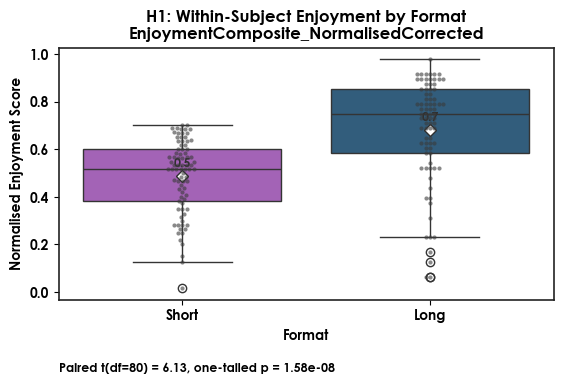

C:\Users\ashra\AppData\Local\Temp\ipykernel_12632\2233400763.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


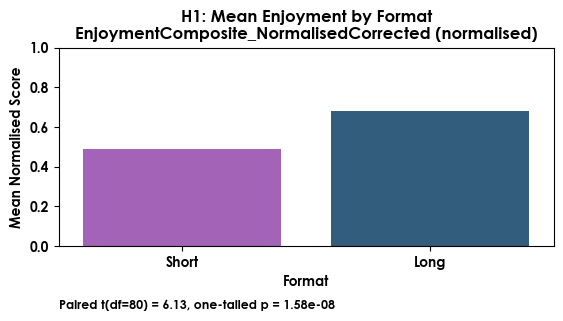

H1 Part 1 (EnjoymentComposite_NormalisedCorrected): Long form (68%) showed 20% greater than short form (48%) (p<0.001, n_pairs=81).


In [77]:
h1_part1_summary_rows = []
for metric in PART1_METRICS:
    metric_label = METRIC_LABELS[metric]
    metric_df = enjoyment_long.loc[enjoyment_long["metric"] == metric]
    respondent_means = (
        metric_df.groupby([id_column, "form"], observed=True)["value"].mean().unstack()
    )
    if respondent_means.empty or not {"Short", "Long"}.issubset(respondent_means.columns):
        continue
    long_scores = respondent_means["Long"]
    short_scores = respondent_means["Short"]
    long_mean = long_scores.mean()
    short_mean = short_scores.mean()
    diff = long_mean - short_mean
    try:
        t_stat, df_val, p_one, _paired = one_tailed_p_from_paired_t(long_scores, short_scores)
        n_paired = _paired.shape[0]
    except ValueError:
        p_one = np.nan
        n_paired = int(min(long_scores.notna().sum(), short_scores.notna().sum()))
    h1_part1_summary_rows.append({
        "Metric": metric_label,
        "Long mean": long_mean,
        "Short mean": short_mean,
        "Difference": diff,
        "p (one-tailed)": p_one,
        "n paired": n_paired,
    })
if h1_part1_summary_rows:
    h1_part1_summary = pd.DataFrame(h1_part1_summary_rows)
    _export_plot_bundle(
        section_label="Hypothesis 1 - Format and Enjoyment",
        part_label="Part 1 - Within-Subject",
        title="H1 Part 1 Within-Subject Summary",
        frames=[("summary", h1_part1_summary)],
        metadata={"metrics": PART1_METRICS},
    )
    display(to_percent_table(h1_part1_summary, ["Long mean", "Short mean", "Difference"], decimals=1))
    preferred_key = "EnjoymentComposite_NormalizedCorrected"
    preferred_label = METRIC_LABELS.get(preferred_key, preferred_key)
    preferred_row = next(
        (row for row in h1_part1_summary_rows if row["Metric"] == preferred_label),
        h1_part1_summary_rows[0],
    )
    preferred_subset = enjoyment_long.loc[enjoyment_long["metric"] == preferred_key]
    preferred_means = (
        preferred_subset.groupby([id_column, "form"], observed=True)["value"].mean().unstack()
    )
    if not preferred_means.empty and {"Short", "Long"}.issubset(preferred_means.columns):
        preferred_means = preferred_means.dropna(subset=["Short", "Long"])
        if not preferred_means.empty:
            (
                plot_t_stat,
                plot_df_val,
                plot_p_one,
                preferred_paired_table,
            ) = one_tailed_p_from_paired_t(
                preferred_means["Long"],
                preferred_means["Short"],
            )
            preferred_plot = preferred_paired_table.reset_index().melt(
                id_vars=id_column,
                value_vars=["Short", "Long"],
                var_name="form",
                value_name="value",
            )
            preferred_palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}
            paired_table_export = preferred_paired_table.reset_index()
            bar_data = (
                preferred_plot.groupby("form", observed=True)["value"].mean().reindex(["Short", "Long"]).reset_index()
            )
            annotation = f"Paired t(df={plot_df_val}) = {plot_t_stat:.2f}, one-tailed p = {plot_p_one:.3g}"
            box_title = f"H1: Within-Subject Enjoyment by Format\n{preferred_label}"
            bar_title = f"H1: Mean Enjoyment by Format\n{preferred_label} (normalised)"
            _export_plot_bundle(
                section_label="Hypothesis 1 - Format and Enjoyment",
                part_label="Part 1 - Within-Subject",
                title=box_title,
                frames=[
                    ("paired_responses", paired_table_export),
                    ("long_format_plot", preferred_plot),
                ],
                metadata={
                    "metric": preferred_label,
                    "paired_t_df": float(plot_df_val),
                    "paired_t_stat": float(plot_t_stat),
                    "paired_p_one": float(plot_p_one),
                    "n_pairs": int(preferred_paired_table.shape[0]),
                },
            )
            fig, ax = plt.subplots(figsize=(6, 4))
            fig.subplots_adjust(bottom=0.28, right=0.95)
            sns.boxplot(
                data=preferred_plot,
                x="form",
                y="value",
                order=["Short", "Long"],
                hue="form",
                palette=preferred_palette,
                dodge=False,
                legend=False,
                ax=ax,
            )
            sns.swarmplot(
                data=preferred_plot,
                x="form",
                y="value",
                order=["Short", "Long"],
                color="#3a3a3a",
                size=3,
                alpha=0.6,
                ax=ax,
            )
            ax.set_title(box_title)
            ax.set_xlabel("Format")
            ax.set_ylabel("Normalised Enjoyment Score")
            ax.text(0.0, -0.25, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
            plt.show()
            _export_plot_bundle(
                section_label="Hypothesis 1 - Format and Enjoyment",
                part_label="Part 1 - Within-Subject",
                title=bar_title,
                frames=[
                    ("format_means", bar_data),
                ],
                metadata={
                    "metric": preferred_label,
                    "paired_t_df": float(plot_df_val),
                    "paired_t_stat": float(plot_t_stat),
                    "paired_p_one": float(plot_p_one),
                    "n_pairs": int(preferred_paired_table.shape[0]),
                },
            )
            fig_bar, ax_bar = plt.subplots(figsize=(6, 3.2))
            fig_bar.subplots_adjust(bottom=0.26, right=0.95)
            sns.barplot(
                data=bar_data,
                x="form",
                y="value",
                order=["Short", "Long"],
                palette=[preferred_palette["Short"], preferred_palette["Long"]],
                ax=ax_bar,
            )
            ax_bar.set_ylim(0, 1.0)
            ax_bar.set_xlabel("Format")
            ax_bar.set_ylabel("Mean Normalised Score")
            ax_bar.set_title(bar_title)
            ax_bar.text(0.0, -0.27, annotation, transform=ax_bar.transAxes, ha="left", va="top", fontsize=9)
            plt.show()
    extra_items = []
    preferred_p = preferred_row.get("p (one-tailed)")
    if isinstance(preferred_p, Number) and np.isfinite(preferred_p):
        extra_items.append(format_p_value(preferred_p))
    n_paired_val = preferred_row.get("n paired")
    if isinstance(n_paired_val, Number) and np.isfinite(n_paired_val):
        extra_items.append(f"n_pairs={int(n_paired_val)}")
    extra_note = ", ".join(extra_items) if extra_items else None
    print_long_short_summary(
        label=f"H1 Part 1 ({preferred_row['Metric']})",
        long_mean=preferred_row["Long mean"],
        short_mean=preferred_row["Short mean"],
        extra_note=extra_note
    )
else:
    print("H1 Part 1 summary: Insufficient paired data to summarise.")

### Part 2: Mixed Models by Title
We restrict to the three target titles, convert format into a binary predictor, and fit mixed-effects models with title as a random intercept. The coefficient on `form_long` estimates the expected Long–Short lift while accounting for title-to-title variability. Visuals highlight each title’s distribution alongside the model summary.

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

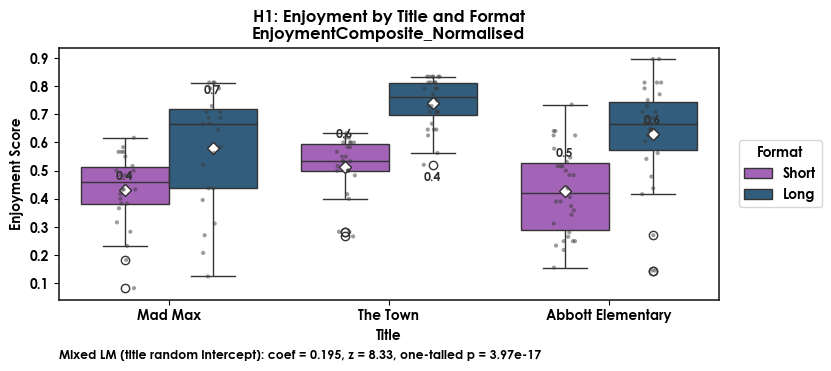

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

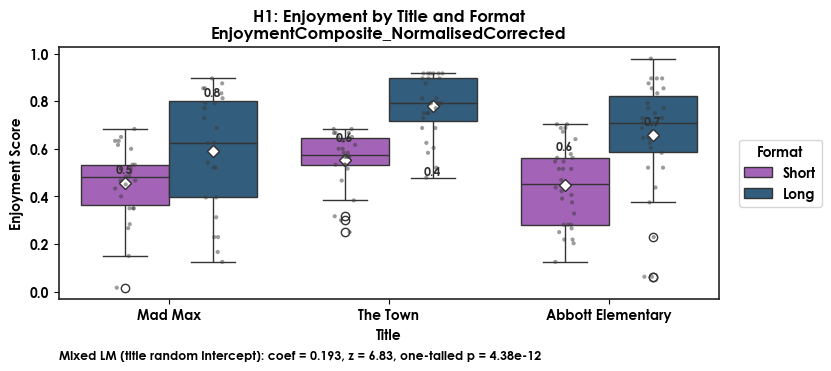

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

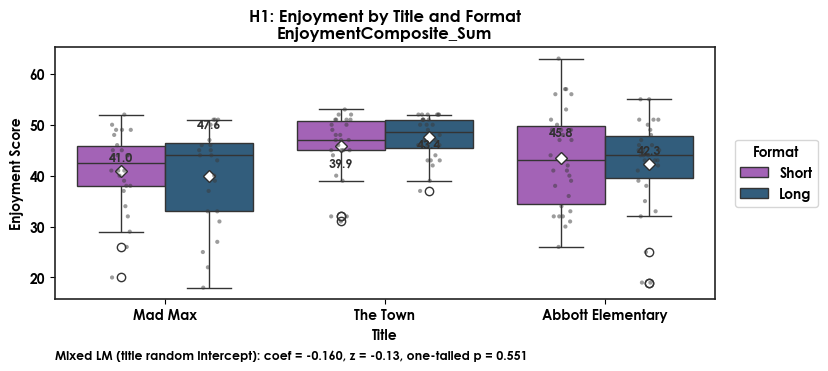

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

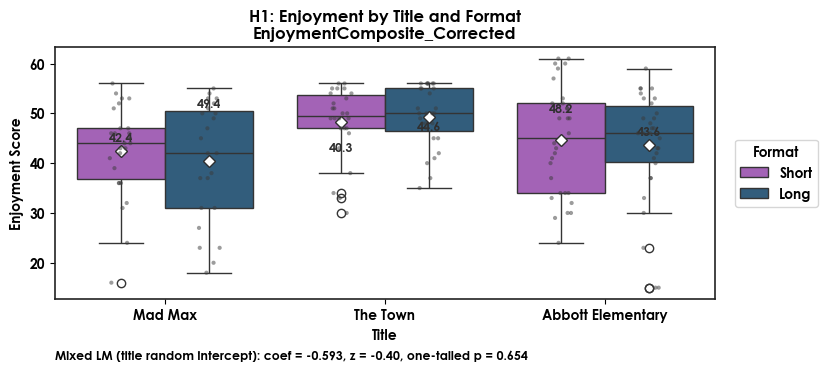

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

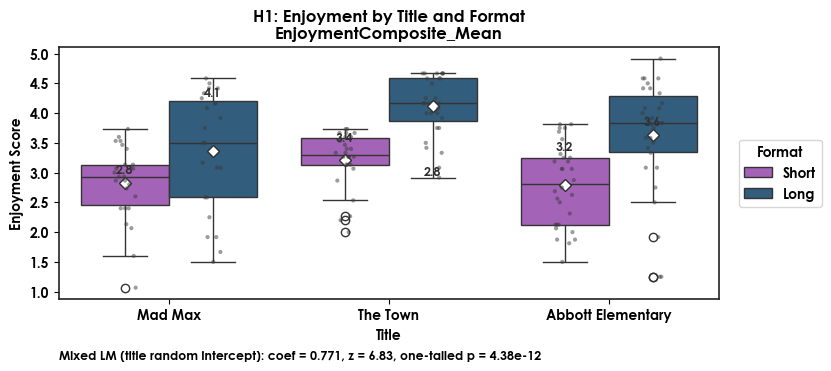

metric  coef_form_long   z_value  \
0           EnjoymentComposite_Normalised        0.194504  8.332174   
1  EnjoymentComposite_NormalisedCorrected        0.192784  6.825683   
2                  EnjoymentComposite_Sum       -0.160208 -0.127861   
3            EnjoymentComposite_Corrected       -0.592909 -0.395303   
4                 EnjoymentComposite_Mean        0.771137  6.825683   

   p_one_tailed  n_observations  titles_included  
0  3.968548e-17             163                3  
1  4.375408e-12             163                3  
2  5.508705e-01             163                3  
3  6.536902e-01             163                3  
4  4.375408e-12             163                3

In [78]:
between_subject_summaries = []
palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}

for metric in PART2_METRICS:
    metric_label = METRIC_LABELS[metric]
    subset = enjoyment_long.loc[
        (enjoyment_long["metric"] == metric)
        & enjoyment_long["title"].isin(TARGET_TITLES)
    ].copy()
    if subset.empty:
        print(f"No data available for {metric_label} when filtering to target titles.")
        continue
    subset["form_long"] = (subset["form"] == "Long").astype(int)
    try:
        mixed_model = smf.mixedlm("value ~ form_long", data=subset, groups=subset["title"])
        mixed_result = mixed_model.fit(reml=False, method="lbfgs", disp=False)
    except Exception as exc:
        print(f"Mixed model failed for {metric_label}: {exc}")
        continue
    coef = mixed_result.params.get("form_long", np.nan)
    se = mixed_result.bse.get("form_long", np.nan)
    z_val = coef / se if np.isfinite(se) and se != 0 else np.nan
    p_one = stats.norm.sf(z_val) if np.isfinite(z_val) else np.nan
    export_frames = [
        ("plot_source", subset.reset_index(drop=True)),
        (
            "mixed_model_stats",
            pd.DataFrame(
                [
                    {
                        "metric": metric_label,
                        "coef_form_long": coef,
                        "std_error": se,
                        "z_value": z_val,
                        "p_one_tailed": p_one,
                        "n_observations": subset.shape[0],
                        "titles_included": subset["title"].nunique(),
                    }
                ]
            ),
        ),
    ]
    chart_title = f"H1: Enjoyment by Title and Format\n{metric_label}"
    _export_plot_bundle(
        section_label="Hypothesis 1 - Format and Enjoyment",
        part_label="Part 2 - Mixed Models",
        title=chart_title,
        frames=export_frames,
        metadata={
            "metric": metric_label,
            "coef_form_long": float(coef),
            "z_value": float(z_val) if np.isfinite(z_val) else np.nan,
            "p_one_tailed": float(p_one) if np.isfinite(p_one) else np.nan,
        },
    )
    between_subject_summaries.append({
        "metric": metric_label,
        "coef_form_long": coef,
        "z_value": z_val,
        "p_one_tailed": p_one,
        "n_observations": subset.shape[0],
        "titles_included": subset["title"].nunique(),
    })
    fig, ax = plt.subplots(figsize=(8, 4))
    fig.subplots_adjust(bottom=0.22, right=0.78)
    sns.boxplot(data=subset, x="title", y="value", hue="form", palette=palette, order=TARGET_TITLES, hue_order=["Short", "Long"], ax=ax)
    sns.stripplot(data=subset, x="title", y="value", hue="form", palette={"Short": "#3a3a3a", "Long": "#3a3a3a"}, order=TARGET_TITLES, hue_order=["Short", "Long"], dodge=True, size=3, alpha=0.5, ax=ax, legend=False)
    ax.set_title(chart_title)
    ax.set_xlabel("Title")
    ax.set_ylabel("Enjoyment Score")
    annotation = f"Mixed LM (title random intercept): coef = {coef:.3f}, z = {z_val:.2f}, one-tailed p = {p_one:.3g}"
    ax.text(0.0, -0.2, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles[:2], labels[:2], title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
    plt.show()

between_subject_summary_df = pd.DataFrame(between_subject_summaries)
_export_plot_bundle(
    section_label="Hypothesis 1 - Format and Enjoyment",
    part_label="Part 2 - Mixed Models",
    title="H1 Part 2 Mixed Model Summary",
    frames=[("summary", between_subject_summary_df)],
    metadata={"metrics": PART2_METRICS},
)
between_subject_summary_df

In [79]:
metric_key = "EnjoymentComposite_NormalizedCorrected"
metric_label = METRIC_LABELS[metric_key]
subset = enjoyment_long.loc[
    (enjoyment_long["metric"] == metric_key)
    & enjoyment_long["title"].isin(TARGET_TITLES)
].copy()
if subset.empty:
    print("H1 Part 2 summary: No data available for target titles.")
else:
    p_lookup = next(
        (row for row in between_subject_summaries if row["metric"] == metric_label),
        {},
    )
    overall_p_value = p_lookup.get("p_one_tailed")
    title_rows = []
    for title in TARGET_TITLES:
        title_df = subset.loc[subset["title"] == title]
        if title_df.empty:
            continue
        long_vals = title_df.loc[title_df["form"] == "Long", "value"].dropna()
        short_vals = title_df.loc[title_df["form"] == "Short", "value"].dropna()
        if long_vals.empty or short_vals.empty:
            continue
        long_mean = long_vals.mean()
        short_mean = short_vals.mean()
        diff = long_mean - short_mean
        t_stat, p_two = stats.ttest_ind(long_vals, short_vals, equal_var=False, nan_policy="omit")
        if np.isnan(t_stat) or np.isnan(p_two):
            p_one = np.nan
        else:
            if t_stat >= 0:
                p_one = p_two / 2
            else:
                p_one = 1 - (p_two / 2)
        title_rows.append({
            "Title": title,
            "Long mean": long_mean,
            "Short mean": short_mean,
            "Difference": diff,
            "p (one-tailed, title)": p_one,
            "n Long": int(long_vals.count()),
            "n Short": int(short_vals.count()),
        })
    if not title_rows:
        print("H1 Part 2 summary: No target-title records after filtering.")
    else:
        h1_part2_title_summary = pd.DataFrame(title_rows)
        _export_plot_bundle(
            section_label="Hypothesis 1 - Format and Enjoyment",
            part_label="Part 2 - Title Summaries",
            title=f"H1 Part 2 Title Summary ({metric_label})",
            frames=[("title_summary", h1_part2_title_summary)],
            metadata={"metric": metric_label},
            filename_suffix="part2-title",
        )
        display(to_percent_table(h1_part2_title_summary, ["Long mean", "Short mean", "Difference"], decimals=1))
        for row in title_rows:
            overall_tag = None
            if overall_p_value is not None:
                if isinstance(overall_p_value, Number) and np.isfinite(overall_p_value):
                    overall_tag = f"overall mixed-model {format_p_value(overall_p_value)}"
            sample_note = f"n_long={row['n Long']}, n_short={row['n Short']}"
            extra = ", ".join(filter(None, [format_p_value(row.get("p (one-tailed, title)")), sample_note, overall_tag]))
            print_long_short_summary(
                label=f"H1 Part 2 – {row['Title']} ({metric_label})",
                long_mean=row["Long mean"],
                short_mean=row["Short mean"],
                extra_note=extra
            )
        overall_long = subset.loc[subset["form"] == "Long", "value"].mean()
        overall_short = subset.loc[subset["form"] == "Short", "value"].mean()
        overall_counts = {
            "n_long": int(subset.loc[subset["form"] == "Long", "value"].notna().sum()),
            "n_short": int(subset.loc[subset["form"] == "Short", "value"].notna().sum()),
        }
        sample_note = f"n_long={overall_counts['n_long']}, n_short={overall_counts['n_short']}"
        extra = ", ".join(filter(None, [format_p_value(overall_p_value), sample_note]))
        print_long_short_summary(
            label=f"H1 Part 2 (Overall {metric_label})",
            long_mean=overall_long,
            short_mean=overall_short,
            extra_note=extra
        )

Title Long mean Short mean Difference  p (one-tailed, title)  \
0            Mad Max     59.1%      45.7%      13.4%           1.722915e-02   
1           The Town     77.8%      55.3%      22.5%           7.742422e-09   
2  Abbott Elementary     65.8%      44.6%      21.2%           9.382024e-05   

   n Long  n Short  
0      23       26  
1      28       26  
2      30       30

H1 Part 2 – Mad Max (EnjoymentComposite_NormalisedCorrected): Long form (59%) showed 13% greater than short form (46%) (p=0.017, n_long=23, n_short=26, overall mixed-model p<0.001).
H1 Part 2 – The Town (EnjoymentComposite_NormalisedCorrected): Long form (78%) showed 23% greater than short form (55%) (p<0.001, n_long=28, n_short=26, overall mixed-model p<0.001).
H1 Part 2 – Abbott Elementary (EnjoymentComposite_NormalisedCorrected): Long form (66%) showed 21% greater than short form (45%) (p<0.001, n_long=30, n_short=30, overall mixed-model p<0.001).
H1 Part 2 (Overall EnjoymentComposite_NormalisedCorrected): Long form (68%) showed 20% greater than short form (48%) (p<0.001, n_long=81, n_short=82).


### Subscale Decomposition
To understand which facets of enjoyment shift with format, the next block reshapes the normalized subscale scores, reuses the paired t-test function for within-subject contrasts, and repeats the mixed-model checks at the title level. Each plot uses the normalized 0–1 scale for comparability across subscales.

In [80]:
ENJOYMENT_SUBSCALES = [
    "Nostalgia",
    "Confusion",
    "Evocative",
    "Entertainment",
    "Interest",
    "Connection",
    "Attention",
]
subscale_frames = []
for subscale in ENJOYMENT_SUBSCALES:
    subscale_pattern = re.compile(rf"^(Long|Short)_(.+?)_Survey_{re.escape(subscale)}_Normalized$")
    matched_columns = [col for col in uv.columns if subscale_pattern.match(col)]
    if not matched_columns:
        print(f"No normalized survey columns found for subscale {subscale}; skipping column build.")
        continue
    for column in matched_columns:
        form, title_token = subscale_pattern.match(column).groups()
        title_clean = title_token.replace("_", " ").strip()
        frame = (
            uv[[id_column, column]]
            .rename(columns={column: "value"})
            .assign(form=form, title=title_clean, subscale=subscale)
        )
        subscale_frames.append(frame)
if not subscale_frames:
    raise ValueError("No enjoyment subscale columns matching the expected pattern were found in uv_merged.csv")
subscale_long = (
    pd.concat(subscale_frames, ignore_index=True)
    .dropna(subset=["value"])
)
subscale_long[id_column] = subscale_long[id_column].astype(str)
subscale_long["form"] = pd.Categorical(subscale_long["form"], categories=["Short", "Long"], ordered=True)
subscale_long["subscale"] = pd.Categorical(subscale_long["subscale"], categories=ENJOYMENT_SUBSCALES, ordered=True)
subscale_title_overview = subscale_long.groupby(["subscale", "title", "form"], observed=True).size().rename("records").reset_index()
subscale_title_overview

subscale              title   form  records
0       Nostalgia  Abbott Elementary  Short       30
1       Nostalgia            Mad Max  Short       26
2       Nostalgia           The Town  Short       26
3       Confusion  Abbott Elementary  Short       30
4       Confusion  Abbott Elementary   Long       30
5       Confusion            Mad Max  Short       26
6       Confusion            Mad Max   Long       23
7       Confusion           The Town  Short       26
8       Confusion           The Town   Long       28
9       Evocative  Abbott Elementary  Short       30
10      Evocative  Abbott Elementary   Long       30
11      Evocative            Mad Max  Short       26
12      Evocative            Mad Max   Long       23
13      Evocative           The Town  Short       26
14      Evocative           The Town   Long       28
15  Entertainment  Abbott Elementary  Short       30
16  Entertainment  Abbott Elementary   Long       30
17  Entertainment            Mad Max  Short       26
18  Entertainment            Mad Max   Long       23
19  Entertainment           The Town  Short       26
20  Entertainment           The Town   Long       28
21       Interest  Abbott Elementary  Short       30
22       Interest  Abbott Elementary   Long       30
23       Interest            Mad Max  Short       26
24       Interest            Mad Max   Long       23
25       Interest           The Town  Short       26
26       Interest           The Town   Long       28
27     Connection  Abbott Elementary  Short       30
28     Connection  Abbott Elementary   Long       30
29     Connection            Mad Max  Short       26
30     Connection            Mad Max   Long       23
31     Connection           The Town  Short       26
32     Connection           The Town   Long       28
33      Attention  Abbott Elementary  Short       30
34      Attention  Abbott Elementary   Long       30
35      Attention            Mad Max  Short       26
36      Attention            Mad Max   Long       23
37      Attention           The Town  Short       26
38      Attention           The Town   Long       28

Nostalgia: requires both Short and Long format data for paired comparison; skipping.


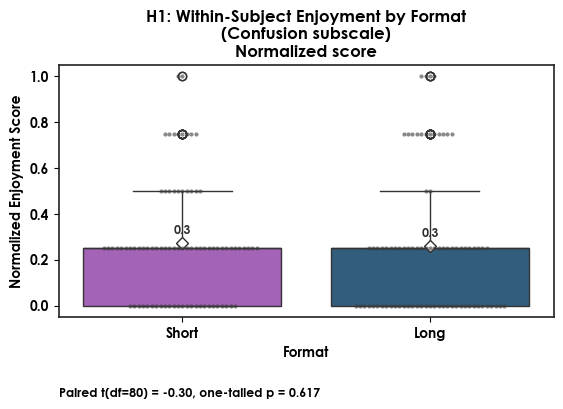

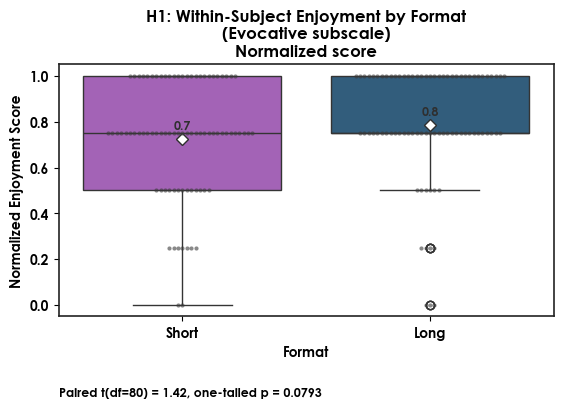

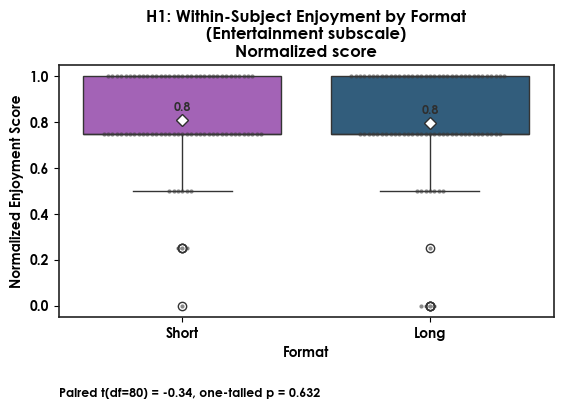

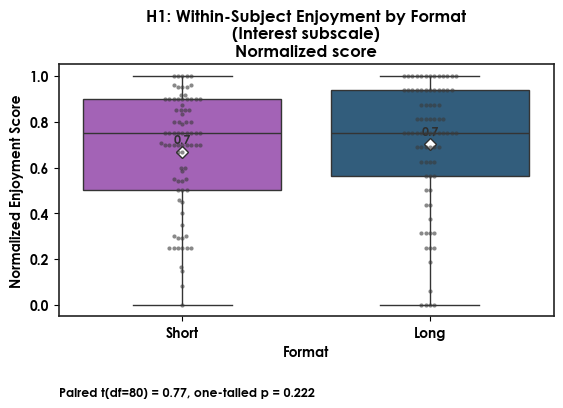

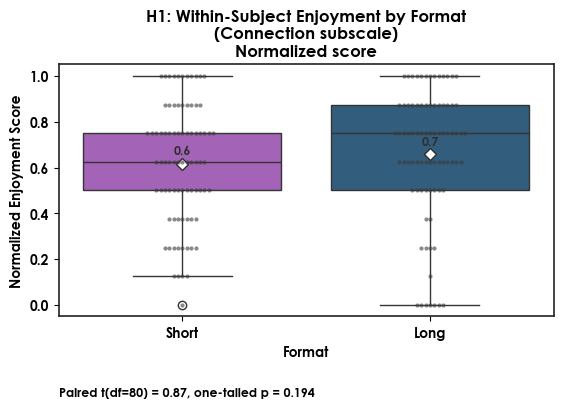

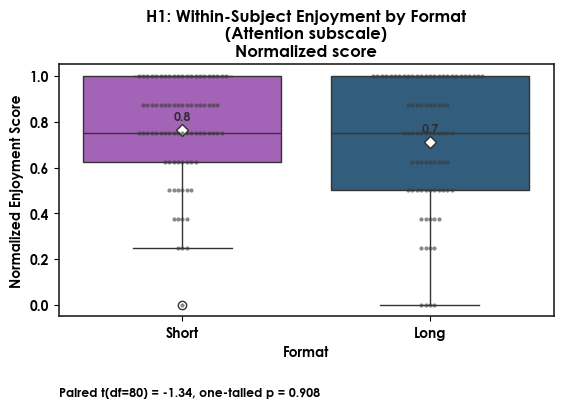

subscale  n_paired    t_stat  df  p_one_tailed
0      Confusion        81 -0.298122  80      0.616808
1      Evocative        81  1.423136  80      0.079292
2  Entertainment        81 -0.338637  80      0.632115
3       Interest        81  0.770105  80      0.221753
4     Connection        81  0.869230  80      0.193661
5      Attention        81 -1.340126  80      0.908001

In [81]:
subscale_within_subject_summaries = []
for subscale in ENJOYMENT_SUBSCALES:
    metric_df = subscale_long.loc[subscale_long["subscale"] == subscale]
    if metric_df.empty:
        print(f"{subscale}: no normalized survey data available; skipping within-subject analysis.")
        continue
    respondent_means = metric_df.groupby([id_column, "form"], observed=True)["value"].mean().unstack()
    if not {"Short", "Long"}.issubset(respondent_means.columns):
        print(f"{subscale}: requires both Short and Long format data for paired comparison; skipping.")
        continue
    try:
        t_stat, df_val, p_one, paired = one_tailed_p_from_paired_t(respondent_means["Long"], respondent_means["Short"])
    except ValueError as exc:
        print(f"{subscale}: {exc}")
        continue
    subscale_within_subject_summaries.append({
        "subscale": subscale,
        "n_paired": paired.shape[0],
        "t_stat": t_stat,
        "df": df_val,
        "p_one_tailed": p_one,
    })
    plot_data = paired.reset_index().melt(id_vars=id_column, value_vars=["Short", "Long"], var_name="form", value_name="value")
    palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}
    annotation = f"Paired t(df={df_val}) = {t_stat:.2f}, one-tailed p = {p_one:.3g}"
    chart_title = f"H1: Within-Subject Enjoyment by Format\n({subscale} subscale)\nNormalized score"
    _export_plot_bundle(
        section_label="Hypothesis 1 - Format and Enjoyment",
        part_label="Subscale Within-Subject",
        title=chart_title,
        frames=[
            ("paired_responses", paired.reset_index()),
            ("long_format_plot", plot_data),
        ],
        metadata={
            "subscale": subscale,
            "t_stat": float(t_stat),
            "df": float(df_val),
            "p_one_tailed": float(p_one) if np.isfinite(p_one) else np.nan,
            "n_paired": int(paired.shape[0]),
        },
    )
    fig, ax = plt.subplots(figsize=(6, 4))
    fig.subplots_adjust(bottom=0.3, right=0.95)
    sns.boxplot(data=plot_data, x="form", y="value", order=["Short", "Long"], hue="form", palette=palette, dodge=False, legend=False, ax=ax)
    sns.swarmplot(data=plot_data, x="form", y="value", order=["Short", "Long"], color="#3a3a3a", size=3, alpha=0.6, ax=ax)
    ax.set_title(chart_title)
    ax.set_xlabel("Format")
    ax.set_ylabel("Normalized Enjoyment Score")
    ax.text(0.0, -0.28, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
    plt.show()
subscale_within_subject_summary_df = pd.DataFrame(subscale_within_subject_summaries)
_export_plot_bundle(
    section_label="Hypothesis 1 - Format and Enjoyment",
    part_label="Subscale Within-Subject",
    title="H1 Subscale Within-Subject Summary",
    frames=[("summary", subscale_within_subject_summary_df)],
    metadata={"subscales": ENJOYMENT_SUBSCALES},
)
subscale_within_subject_summary_df

In [82]:
subscale_p_lookup = {row["subscale"]: row.get("p_one_tailed", np.nan) for row in subscale_within_subject_summaries} if 'subscale_within_subject_summaries' in globals() else {}
subscale_summary_rows = []
for subscale in ENJOYMENT_SUBSCALES:
    metric_df = subscale_long.loc[subscale_long["subscale"] == subscale]
    if metric_df.empty:
        continue
    respondent_means = metric_df.groupby([id_column, "form"], observed=True)["value"].mean().unstack()
    if respondent_means.empty or not {"Short", "Long"}.issubset(respondent_means.columns):
        continue
    long_mean = respondent_means["Long"].mean()
    short_mean = respondent_means["Short"].mean()
    diff = long_mean - short_mean
    p_val = subscale_p_lookup.get(subscale, np.nan)
    subscale_summary_rows.append({
        "Subscale": subscale,
        "Long mean": long_mean,
        "Short mean": short_mean,
        "Difference": diff,
        "p (one-tailed)": p_val,
        "n paired": respondent_means.dropna().shape[0],
    })
if subscale_summary_rows:
    subscale_summary = pd.DataFrame(subscale_summary_rows)
    display(to_percent_table(subscale_summary, ["Long mean", "Short mean", "Difference"], decimals=1))
    overall_long = subscale_long.loc[subscale_long["form"] == "Long", "value"].mean()
    overall_short = subscale_long.loc[subscale_long["form"] == "Short", "value"].mean()
    sample_items = []
    overall_long_count = subscale_long.loc[subscale_long["form"] == "Long", id_column].nunique()
    overall_short_count = subscale_long.loc[subscale_long["form"] == "Short", id_column].nunique()
    if overall_long_count:
        sample_items.append(f"n_long={int(overall_long_count)}")
    if overall_short_count:
        sample_items.append(f"n_short={int(overall_short_count)}")
    extra_items = [", ".join(sample_items) if sample_items else None, "aggregate of normalized subscale scores"]
    extra_note = ", ".join(item for item in extra_items if item) or None
    print_long_short_summary(
        label="H1 Subscales (within-subject, all titles)",
        long_mean=overall_long,
        short_mean=overall_short,
        extra_note=extra_note
    )
else:
    print("H1 subscale within-subject summary: No paired data available.")

Subscale Long mean Short mean Difference  p (one-tailed)  n paired
0      Confusion     25.9%      27.4%      -1.5%        0.616808        81
1      Evocative     78.7%      72.0%       6.8%        0.079292        81
2  Entertainment     79.6%      80.2%      -0.6%        0.632115        81
3       Interest     70.2%      66.3%       3.9%        0.221753        81
4     Connection     65.7%      61.3%       4.5%        0.193661        81
5      Attention     71.3%      76.1%      -4.8%        0.908001        81

H1 Subscales (within-subject, all titles): Long form (65%) showed 5% greater than short form (60%) (n_long=81, n_short=82, aggregate of normalized subscale scores).


Nostalgia: requires both formats for mixed model; skipping.


c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

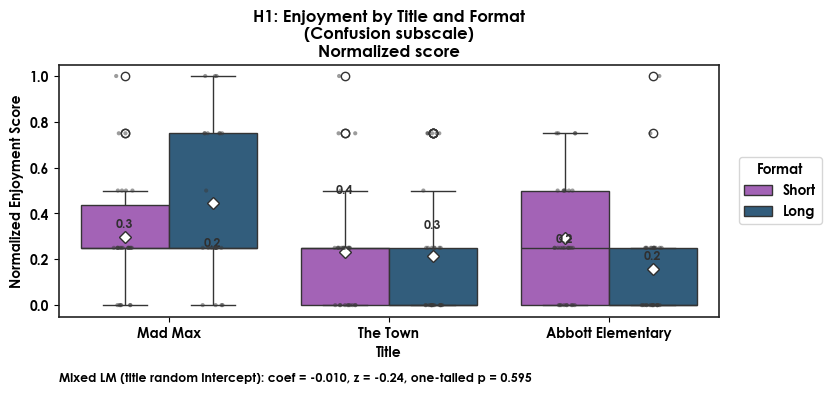

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

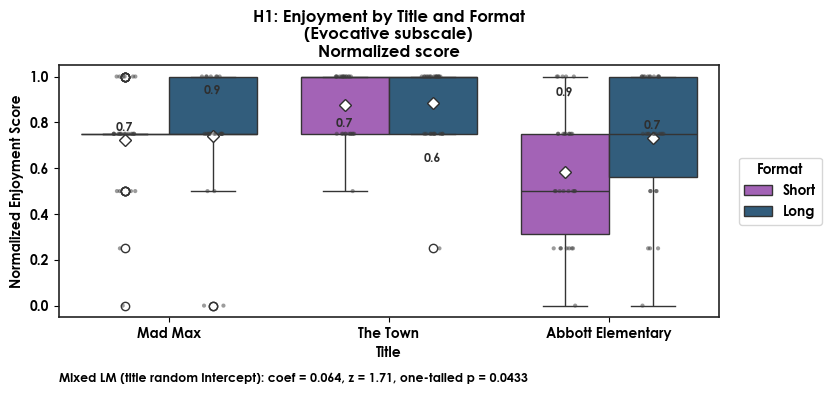

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

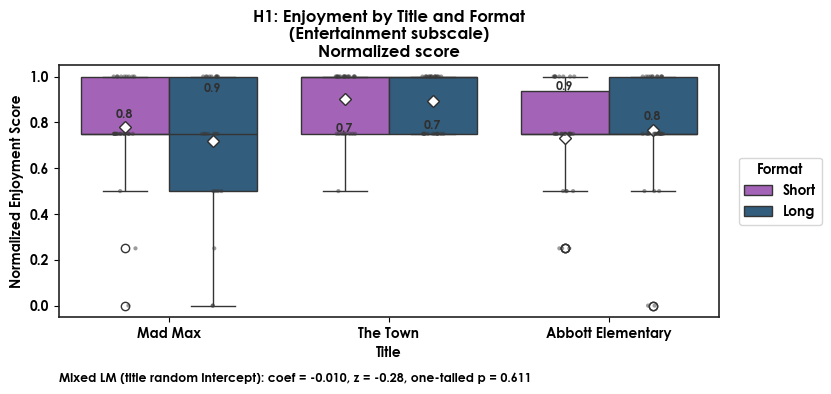

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

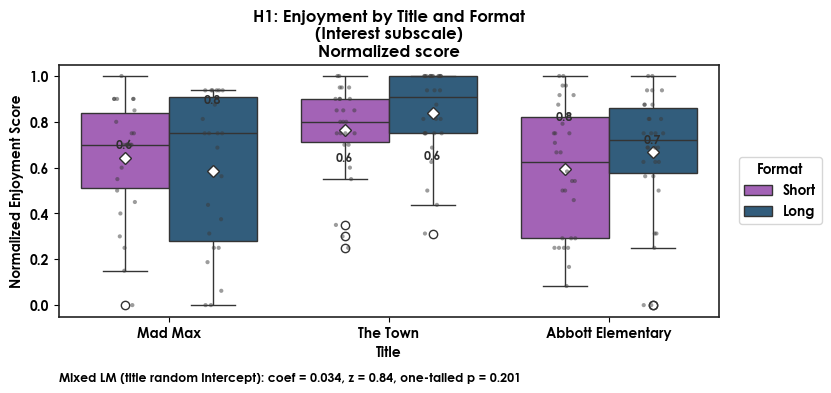

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

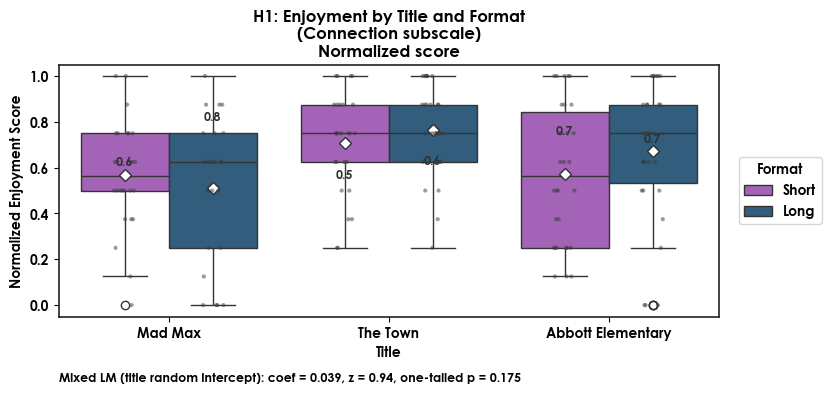

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

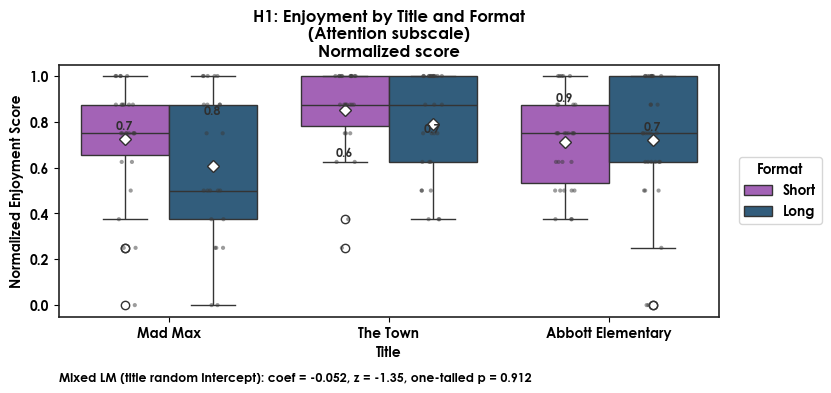

subscale  coef_form_long   z_value  p_one_tailed  n_observations  \
0      Confusion       -0.010353 -0.241576      0.595446             163   
1      Evocative        0.063653  1.713354      0.043324             163   
2  Entertainment       -0.009786 -0.280689      0.610526             163   
3       Interest        0.033529  0.837503      0.201155             163   
4     Connection        0.038714  0.935978      0.174642             163   
5      Attention       -0.052244 -1.350308      0.911541             163   

   titles_included  
0                3  
1                3  
2                3  
3                3  
4                3  
5                3

In [83]:
subscale_between_subject_summaries = []
palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}
for subscale in ENJOYMENT_SUBSCALES:
    subset = subscale_long.loc[
        (subscale_long["subscale"] == subscale)
        & (subscale_long["title"].isin(TARGET_TITLES))
    ].copy()
    if subset.empty:
        print(f"{subscale}: no normalized survey data available after filtering to target titles; skipping mixed model.")
        continue
    if subset["form"].nunique() < 2:
        print(f"{subscale}: requires both formats for mixed model; skipping.")
        continue
    subset["form_long"] = (subset["form"] == "Long").astype(int)
    try:
        mixed_model = smf.mixedlm("value ~ form_long", data=subset, groups=subset["title"])
        mixed_result = mixed_model.fit(reml=False, method="lbfgs", disp=False)
    except Exception as exc:
        print(f"Mixed model failed for {subscale} subscale: {exc}")
        continue
    coef = mixed_result.params.get("form_long", np.nan)
    se = mixed_result.bse.get("form_long", np.nan)
    z_val = coef / se if np.isfinite(se) and se != 0 else np.nan
    p_one = stats.norm.sf(z_val) if np.isfinite(z_val) else np.nan
    export_frames = [
        ("plot_source", subset.reset_index(drop=True)),
        (
            "mixed_model_stats",
            pd.DataFrame(
                [
                    {
                        "subscale": subscale,
                        "coef_form_long": coef,
                        "std_error": se,
                        "z_value": z_val,
                        "p_one_tailed": p_one,
                        "n_observations": subset.shape[0],
                        "titles_included": subset["title"].nunique(),
                    }
                ]
            ),
        ),
    ]
    chart_title = f"H1: Enjoyment by Title and Format\n({subscale} subscale)\nNormalized score"
    _export_plot_bundle(
        section_label="Hypothesis 1 - Format and Enjoyment",
        part_label="Subscale Mixed Models",
        title=chart_title,
        frames=export_frames,
        metadata={
            "subscale": subscale,
            "coef_form_long": float(coef),
            "z_value": float(z_val) if np.isfinite(z_val) else np.nan,
            "p_one_tailed": float(p_one) if np.isfinite(p_one) else np.nan,
        },
    )
    subscale_between_subject_summaries.append({
        "subscale": subscale,
        "coef_form_long": coef,
        "z_value": z_val,
        "p_one_tailed": p_one,
        "n_observations": subset.shape[0],
        "titles_included": subset["title"].nunique(),
    })
    fig, ax = plt.subplots(figsize=(8, 4))
    fig.subplots_adjust(bottom=0.24, right=0.78)
    sns.boxplot(data=subset, x="title", y="value", hue="form", palette=palette, order=TARGET_TITLES, hue_order=["Short", "Long"], ax=ax)
    sns.stripplot(data=subset, x="title", y="value", hue="form", palette={"Short": "#3a3a3a", "Long": "#3a3a3a"}, order=TARGET_TITLES, hue_order=["Short", "Long"], dodge=True, size=3, alpha=0.5, ax=ax, legend=False)
    ax.set_title(chart_title)
    ax.set_xlabel("Title")
    ax.set_ylabel("Normalized Enjoyment Score")
    annotation = f"Mixed LM (title random intercept): coef = {coef:.3f}, z = {z_val:.2f}, one-tailed p = {p_one:.3g}"
    ax.text(0.0, -0.22, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
    plt.show()
subscale_between_subject_summary_df = pd.DataFrame(subscale_between_subject_summaries)
_export_plot_bundle(
    section_label="Hypothesis 1 - Format and Enjoyment",
    part_label="Subscale Mixed Models",
    title="H1 Subscale Mixed Model Summary",
    frames=[("summary", subscale_between_subject_summary_df)],
    metadata={"subscales": ENJOYMENT_SUBSCALES},
)
subscale_between_subject_summary_df

In [84]:
between_lookup = {row["subscale"]: row for row in subscale_between_subject_summaries} if 'subscale_between_subject_summaries' in globals() else {}
subscale_between_rows = []
for subscale in ENJOYMENT_SUBSCALES:
    subset = subscale_long.loc[
        (subscale_long["subscale"] == subscale)
        & (subscale_long["title"].isin(TARGET_TITLES))
    ]
    if subset.empty:
        continue
    long_mean = subset.loc[subset["form"] == "Long", "value"].mean()
    short_mean = subset.loc[subset["form"] == "Short", "value"].mean()
    diff = long_mean - short_mean
    p_val = between_lookup.get(subscale, {}).get("p_one_tailed", np.nan)
    n_obs = subset.shape[0]
    subscale_between_rows.append({
        "Subscale": subscale,
        "Long mean": long_mean,
        "Short mean": short_mean,
        "Difference": diff,
        "p (one-tailed)": p_val,
        "n observations": n_obs,
    })
if subscale_between_rows:
    subscale_between_summary = pd.DataFrame(subscale_between_rows)
    display(to_percent_table(subscale_between_summary, ["Long mean", "Short mean", "Difference"], decimals=1))
    overall_long = subscale_long.loc[
        (subscale_long["form"] == "Long") & (subscale_long["title"].isin(TARGET_TITLES)),
        "value",
    ].mean()
    overall_short = subscale_long.loc[
        (subscale_long["form"] == "Short") & (subscale_long["title"].isin(TARGET_TITLES)),
        "value",
    ].mean()
    sample_items = []
    long_count = subscale_long.loc[
        (subscale_long["form"] == "Long") & (subscale_long["title"].isin(TARGET_TITLES)),
        id_column,
    ].nunique()
    short_count = subscale_long.loc[
        (subscale_long["form"] == "Short") & (subscale_long["title"].isin(TARGET_TITLES)),
        id_column,
    ].nunique()
    if long_count:
        sample_items.append(f"n_long={int(long_count)}")
    if short_count:
        sample_items.append(f"n_short={int(short_count)}")
    extra_items = [", ".join(sample_items) if sample_items else None, "title-level mixed model summaries"]
    extra_note = ", ".join(item for item in extra_items if item) or None
    print_long_short_summary(
        label="H1 Subscales (between-subject, target titles)",
        long_mean=overall_long,
        short_mean=overall_short,
        extra_note=extra_note
    )
else:
    print("H1 subscale between-subject summary: No data available for target titles.")

Subscale Long mean Short mean Difference  p (one-tailed)  \
0      Nostalgia        NA      36.0%         NA             NaN   
1      Confusion     25.9%      27.4%      -1.5%        0.595446   
2      Evocative     78.7%      72.0%       6.8%        0.043324   
3  Entertainment     79.6%      80.2%      -0.6%        0.610526   
4       Interest     70.2%      66.3%       3.9%        0.201155   
5     Connection     65.7%      61.3%       4.5%        0.174642   
6      Attention     71.3%      76.1%      -4.8%        0.911541   

   n observations  
0              82  
1             163  
2             163  
3             163  
4             163  
5             163  
6             163

H1 Subscales (between-subject, target titles): Long form (65%) showed 5% greater than short form (60%) (n_long=81, n_short=82, title-level mixed model summaries).


### Subscale Item Counts
Different subscales sometimes include varying numbers of questions per respondent. The table below inventories the observed counts so we can explain scaling differences (e.g., higher sums arising from more answered items).

In [85]:
subscale_item_counts = []
for subscale in ENJOYMENT_SUBSCALES:
    count_pattern = re.compile(rf"^(Long|Short)_(.+?)_Survey_{re.escape(subscale)}_Count$")
    matched_columns = [col for col in uv.columns if count_pattern.match(col)]
    observed_counts = set()
    for column in matched_columns:
        values = uv[column].dropna()
        values = values[values > 0]
        if values.empty:
            continue
        observed_counts.update(values.astype(int).tolist())
    if observed_counts:
        counts_sorted = sorted(observed_counts)
        subscale_item_counts.append({
            "subscale": subscale,
            "question_count": counts_sorted[-1],
            "all_observed_counts": ", ".join(str(count) for count in counts_sorted),
        })
    else:
        subscale_item_counts.append({
            "subscale": subscale,
            "question_count": np.nan,
            "all_observed_counts": "No data",
        })
subscale_item_table = pd.DataFrame(subscale_item_counts).sort_values("subscale").reset_index(drop=True)
subscale_item_table

subscale  question_count all_observed_counts
0      Attention               2                   2
1      Confusion               1                   1
2     Connection               2                   2
3  Entertainment               1                   1
4      Evocative               1                   1
5       Interest               6             4, 5, 6
6      Nostalgia               1                   1

## Hypothesis 2 - Format and Recall
:We test whether long-form presentations yield stronger post-recognition performance than short-form presentations for the three target titles. Stage 3 composites are normalised to a 0–1 scale prior to analysis so that formats share a comparable envelope, and results are surfaced through both distributional plots and mean-level bar charts, mirroring the H1 workflow.

### Part 1: Normalized Within-Subject Comparison
We extract the `Long_key_Post_Recognition_Mean` and `Short_key_Post_Recognition_Mean` composites, rescale them to a shared 0–1 envelope, and apply the paired, one-tailed t-test used in H1 (expecting Long > Short). Visuals include the familiar box/swarn layout plus a companion mean-only bar chart so the normalised uplift is easy to reference in summaries.

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


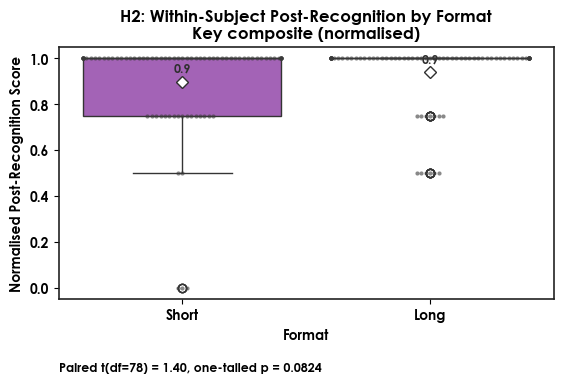

C:\Users\ashra\AppData\Local\Temp\ipykernel_12632\3230230711.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x="form", y="value", order=["Short", "Long"], palette=[palette["Short"], palette["Long"]], ax=ax_bar)


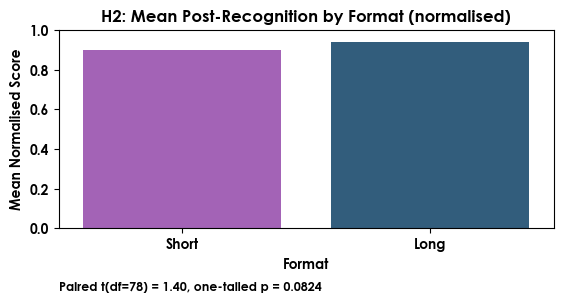

(    form  mean_normalised  std_normalised   n
 0   Long         0.939873        0.145527  79
 1  Short         0.898734        0.217500  79,
                             metric  n_paired    t_stat  df  p_one_tailed  \
 0  Post_Recognition_Key_Normalised        79  1.402244  78      0.082405   
 
    mean_long  mean_short  
 0   0.939873    0.898734  )

In [86]:
RECOGNITION_METRICS = {
    "Long": "Long_key_Post_Recognition_Mean",
    "Short": "Short_key_Post_Recognition_Mean",
}
recognition_columns = list(RECOGNITION_METRICS.values())
recognition_base = (
    uv[[id_column, "Short Form", "Long Form"] + recognition_columns]
    .dropna(subset=recognition_columns, how="any")
    .copy()
)
recognition_base = recognition_base.rename(columns={"Short Form": "short_title", "Long Form": "long_title"})
recognition_base[id_column] = recognition_base[id_column].astype(str)
value_min = recognition_base[recognition_columns].to_numpy().min()
value_max = recognition_base[recognition_columns].to_numpy().max()
if not np.isfinite(value_min) or not np.isfinite(value_max):
    raise ValueError("Recognition metrics contain non-finite values and cannot be normalised.")
if value_max == value_min:
    raise ValueError("Recognition metrics have zero variance; min-max normalisation is undefined.")
range_span = value_max - value_min
recognition_normalised = recognition_base.copy()
# Shared min-max scaling keeps both formats on the same 0-1 frame
recognition_normalised.loc[:, recognition_columns] = (
    recognition_normalised.loc[:, recognition_columns] - value_min
) / range_span
recognition_normalised.loc[:, recognition_columns] = recognition_normalised.loc[:, recognition_columns].clip(0.0, 1.0)
paired_norm = recognition_normalised.rename(columns={
    RECOGNITION_METRICS["Long"]: "Long",
    RECOGNITION_METRICS["Short"]: "Short",
})
t_stat, df_val, p_one, paired_table = one_tailed_p_from_paired_t(paired_norm["Long"], paired_norm["Short"])
plot_data = paired_norm[[id_column, "Short", "Long"]].melt(
    id_vars=id_column,
    value_vars=["Short", "Long"],
    var_name="form",
    value_name="value",
)
palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}
fig, ax = plt.subplots(figsize=(6, 4))
fig.subplots_adjust(bottom=0.28, right=0.95)
sns.boxplot(data=plot_data, x="form", y="value", order=["Short", "Long"], hue="form", palette=palette, dodge=False, legend=False, ax=ax)
sns.swarmplot(data=plot_data, x="form", y="value", order=["Short", "Long"], color="#3a3a3a", size=3, alpha=0.6, ax=ax)
ax.set_title("H2: Within-Subject Post-Recognition by Format\nKey composite (normalised)")
ax.set_xlabel("Format")
ax.set_ylabel("Normalised Post-Recognition Score")
annotation = f"Paired t(df={df_val}) = {t_stat:.2f}, one-tailed p = {p_one:.3g}"
ax.text(0.0, -0.25, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
plt.show()
bar_data = (
    plot_data.groupby("form", observed=True)["value"].mean().reindex(["Short", "Long"]).reset_index()
)
fig_bar, ax_bar = plt.subplots(figsize=(6, 3.2))
fig_bar.subplots_adjust(bottom=0.26, right=0.95)
sns.barplot(data=bar_data, x="form", y="value", order=["Short", "Long"], palette=[palette["Short"], palette["Long"]], ax=ax_bar)
ax_bar.set_ylim(0, 1.0)
ax_bar.set_xlabel("Format")
ax_bar.set_ylabel("Mean Normalised Score")
ax_bar.set_title("H2: Mean Post-Recognition by Format (normalised)")
ax_bar.text(0.0, -0.27, annotation, transform=ax_bar.transAxes, ha="left", va="top", fontsize=9)
plt.show()
recognition_descriptives = (
    plot_data.groupby("form", observed=True)["value"]
    .agg(["mean", "std", "count"])
    .rename(columns={"mean": "mean_normalised", "std": "std_normalised", "count": "n"})
    .reset_index()
)
recognition_summary = pd.DataFrame([
    {
        "metric": "Post_Recognition_Key_Normalised",
        "n_paired": paired_table.shape[0],
        "t_stat": t_stat,
        "df": df_val,
        "p_one_tailed": p_one,
        "mean_long": paired_table["Long"].mean(),
        "mean_short": paired_table["Short"].mean(),
    }
])
recognition_long = (
    paired_norm[[id_column, "short_title", "long_title", "Short", "Long"]]
    .melt(
        id_vars=[id_column, "short_title", "long_title"],
        value_vars=["Short", "Long"],
        var_name="form",
        value_name="value",
    )
)
recognition_long["title"] = np.where(
    recognition_long["form"] == "Long",
    recognition_long["long_title"],
    recognition_long["short_title"],
)
recognition_long = recognition_long.drop(columns=["short_title", "long_title"]).dropna(subset=["value"])
recognition_long[id_column] = recognition_long[id_column].astype(str)
recognition_long["form"] = pd.Categorical(recognition_long["form"], categories=["Short", "Long"], ordered=True)
recognition_long["title"] = recognition_long["title"].astype(str)
recognition_descriptives, recognition_summary

In [87]:
if 'paired_norm' in globals():
    long_mean = paired_norm["Long"].mean()
    short_mean = paired_norm["Short"].mean()
    diff = long_mean - short_mean
    n_pairs = paired_norm.dropna(subset=["Long", "Short"]).shape[0]
    h2_part1_summary = pd.DataFrame([
        {
            "Metric": "Key Post-Recognition (normalised)",
            "Long mean": long_mean,
            "Short mean": short_mean,
            "Difference": diff,
            "p (one-tailed)": p_one if 'p_one' in globals() else np.nan,
            "n paired": n_pairs,
        }
    ])
    display(to_percent_table(h2_part1_summary, ["Long mean", "Short mean", "Difference"], decimals=1))
    extra_items = []
    p_val = p_one if 'p_one' in globals() else None
    if isinstance(p_val, Number) and np.isfinite(p_val):
        extra_items.append(format_p_value(p_val))
    if isinstance(n_pairs, Number) and np.isfinite(n_pairs) and n_pairs:
        extra_items.append(f"n_pairs={int(n_pairs)}")
    extra_note = ", ".join(extra_items) if extra_items else None
    print_long_short_summary(
        label="H2 Part 1 (Key composite)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("H2 Part 1 summary: paired_norm not available.")

Metric Long mean Short mean Difference  \
0  Key Post-Recognition (normalised)     94.0%      89.9%       4.1%   

   p (one-tailed)  n paired  
0        0.082405        79

H2 Part 1 (Key composite): Long form (94%) showed 4% greater than short form (90%) (p=0.082, n_pairs=79).


In [88]:
# Export H2 Part 1 (key recognition) artefacts
if all(
    name in globals()
    for name in (
        "paired_norm",
        "plot_data",
        "bar_data",
        "paired_table",
        "recognition_summary",
        "recognition_descriptives",
        "h2_part1_summary",
        "t_stat",
        "df_val",
        "p_one",
    )
) and isinstance(paired_norm, pd.DataFrame):
    export_frames: list[tuple[str, pd.DataFrame]] = []
    paired_columns = [col for col in [id_column, "short_title", "long_title", "Short", "Long"] if col in paired_norm.columns]
    export_frames.append(("paired_norm", paired_norm[paired_columns].copy()))
    if isinstance(plot_data, pd.DataFrame):
        export_frames.append(("plot_long", plot_data.copy()))
    if isinstance(bar_data, pd.DataFrame):
        export_frames.append(("format_means", bar_data.copy()))
    if isinstance(paired_table, pd.DataFrame):
        export_frames.append(("paired_values", paired_table.copy()))
    if isinstance(recognition_summary, pd.DataFrame):
        export_frames.append(("mixed_summary", recognition_summary.copy()))
    if isinstance(recognition_descriptives, pd.DataFrame):
        export_frames.append(("descriptives", recognition_descriptives.copy()))
    if isinstance(h2_part1_summary, pd.DataFrame):
        export_frames.append(("part1_summary", h2_part1_summary.copy()))
    metadata = {
        "metric": "Key Post-Recognition (normalised)",
        "paired_t_stat": float(t_stat) if np.isfinite(t_stat) else np.nan,
        "paired_t_df": float(df_val) if np.isfinite(df_val) else np.nan,
        "paired_p_one": float(p_one) if np.isfinite(p_one) else np.nan,
        "n_pairs": int(paired_table.shape[0]) if isinstance(paired_table, pd.DataFrame) else int(paired_norm.dropna(subset=["Long", "Short"]).shape[0]),
    }
    _export_plot_bundle(
        section_label="Hypothesis 2 - Format and Recall",
        part_label="Part 1 – Within-subject (normalised)",
        title="H2: Within-Subject Post-Recognition by Format (normalised)",
        frames=export_frames,
        metadata=metadata,
    )
else:
    print("H2 Part 1 export skipped: required recognition tables unavailable.")

### Part 2: Mixed Models by Title
We filter the normalised key composite to the three target titles, fit a mixed-effects model with title as a random intercept, and present both distributional and mean bar charts to document the Long–Short lift at the title level. Model annotations mirror H1 so the effect size and one-tailed p-value sit alongside the visuals.

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

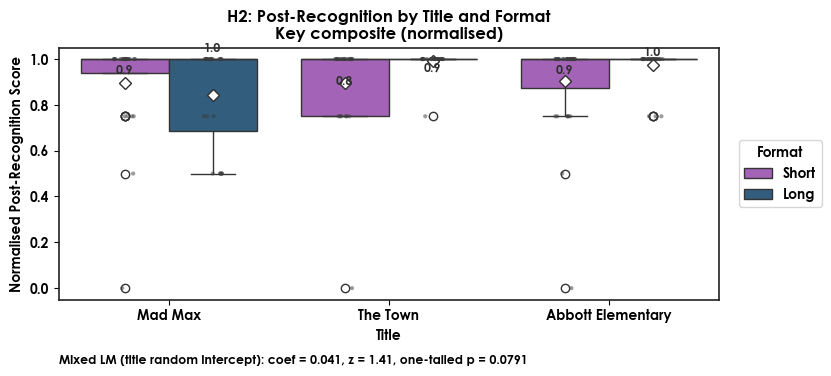

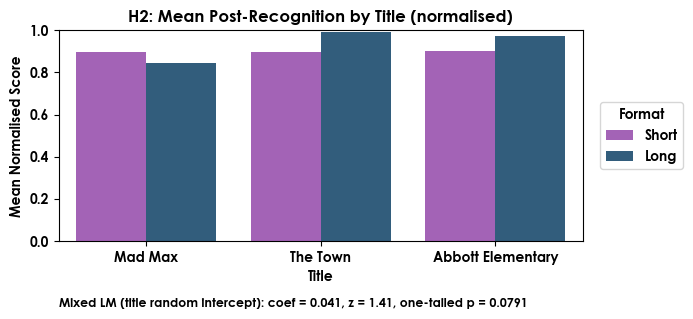

(               title   form  mean_normalised  std_normalised   n
 0  Abbott Elementary  Short         0.903226        0.210925  31
 1  Abbott Elementary   Long         0.972222        0.080064  27
 2            Mad Max  Short         0.895833        0.232153  24
 3            Mad Max   Long         0.843750        0.218847  24
 4           The Town  Short         0.895833        0.220137  24
 5           The Town   Long         0.991071        0.047246  28,
                             metric  coef_form_long   z_value  p_one_tailed  \
 0  Post_Recognition_Key_Normalised        0.040694  1.411163      0.079098   
 
    n_observations  titles_included  
 0             158                3  )

In [89]:
recognition_between_subject_summary = []
palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}
subset = recognition_long.loc[recognition_long["title"].isin(TARGET_TITLES)].copy()
if subset.empty:
    print("No post-recognition records available for the specified target titles.")
    recognition_title_descriptives = pd.DataFrame()
    recognition_title_summary = pd.DataFrame()
else:
    subset["form_long"] = (subset["form"] == "Long").astype(int)
    try:
        mixed_model = smf.mixedlm("value ~ form_long", data=subset, groups=subset["title"])
        mixed_result = mixed_model.fit(reml=False, method="lbfgs", disp=False)
        coef = mixed_result.params.get("form_long", np.nan)
        se = mixed_result.bse.get("form_long", np.nan)
        z_val = coef / se if np.isfinite(se) and se != 0 else np.nan
        p_one = stats.norm.sf(z_val) if np.isfinite(z_val) else np.nan
    except Exception as exc:
        print(f"Mixed model failed: {exc}")
        coef = se = z_val = p_one = np.nan
    recognition_between_subject_summary.append({
        "metric": "Post_Recognition_Key_Normalised",
        "coef_form_long": coef,
        "z_value": z_val,
        "p_one_tailed": p_one,
        "n_observations": subset.shape[0],
        "titles_included": subset["title"].nunique(),
    })
    fig, ax = plt.subplots(figsize=(8, 4))
    fig.subplots_adjust(bottom=0.24, right=0.78)
    sns.boxplot(
        data=subset,
        x="title",
        y="value",
        hue="form",
        palette=palette,
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        ax=ax,
    )
    sns.stripplot(
        data=subset,
        x="title",
        y="value",
        hue="form",
        palette={"Short": "#3a3a3a", "Long": "#3a3a3a"},
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        dodge=True,
        size=3,
        alpha=0.5,
        ax=ax,
        legend=False,
    )
    ax.set_xlabel("Title")
    ax.set_ylabel("Normalised Post-Recognition Score")
    ax.set_title("H2: Post-Recognition by Title and Format\nKey composite (normalised)")
    annotation = f"Mixed LM (title random intercept): coef = {coef:.3f}, z = {z_val:.2f}, one-tailed p = {p_one:.3g}"
    ax.text(0.0, -0.22, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
    plt.show()
    bar_data_title = (
        subset.groupby(["title", "form"], observed=True)["value"]
        .mean()
        .reset_index(name="mean_value")
    )
    # Ensure that every title-format combination is represented for consistent ordering
    bar_data_title = bar_data_title.set_index(["title", "form"]).reindex(
        pd.MultiIndex.from_product([TARGET_TITLES, ["Short", "Long"]], names=["title", "form"])
    ).reset_index()
    fig_bar, ax_bar = plt.subplots(figsize=(8, 3.4))
    fig_bar.subplots_adjust(bottom=0.26, right=0.78)
    sns.barplot(
        data=bar_data_title,
        x="title",
        y="mean_value",
        hue="form",
        palette=palette,
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        ax=ax_bar,
    )
    ax_bar.set_ylim(0, 1.0)
    ax_bar.set_xlabel("Title")
    ax_bar.set_ylabel("Mean Normalised Score")
    ax_bar.set_title("H2: Mean Post-Recognition by Title (normalised)")
    ax_bar.text(0.0, -0.27, annotation, transform=ax_bar.transAxes, ha="left", va="top", fontsize=9)
    ax_bar.legend(title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
    plt.show()
    recognition_title_summary = pd.DataFrame(recognition_between_subject_summary)
    recognition_title_descriptives = (
        subset.groupby(["title", "form"], observed=True)["value"]
        .agg(["mean", "std", "count"])
        .rename(columns={"mean": "mean_normalised", "std": "std_normalised", "count": "n"})
        .reset_index()
    )
recognition_title_descriptives, recognition_title_summary

In [90]:
# Export H2 Part 2 (key recognition) title-level artefacts
if all(
    name in globals()
    for name in (
        "subset",
        "bar_data_title",
        "recognition_title_descriptives",
        "recognition_title_summary",
        "coef",
        "z_val",
        "p_one",
    )
) and isinstance(subset, pd.DataFrame) and not subset.empty:
    export_frames: list[tuple[str, pd.DataFrame]] = []
    export_frames.append(("by_title", subset.copy()))
    if isinstance(bar_data_title, pd.DataFrame):
        export_frames.append(("title_means", bar_data_title.copy()))
    if isinstance(recognition_title_descriptives, pd.DataFrame):
        export_frames.append(("descriptives", recognition_title_descriptives.copy()))
    if isinstance(recognition_title_summary, pd.DataFrame):
        export_frames.append(("mixed_summary", recognition_title_summary.copy()))
    metadata = {
        "metric": "Post_Recognition_Key_Normalised",
        "coef_form_long": float(coef) if np.isfinite(coef) else np.nan,
        "z_value": float(z_val) if np.isfinite(z_val) else np.nan,
        "p_one_tailed": float(p_one) if np.isfinite(p_one) else np.nan,
        "n_observations": int(subset.shape[0]),
        "n_titles": int(subset["title"].nunique()),
    }
    _export_plot_bundle(
        section_label="Hypothesis 2 - Format and Recall",
        part_label="Part 2 – Title x Format (normalised)",
        title="H2: Post-Recognition by Title and Format (normalised)",
        frames=export_frames,
        metadata=metadata,
    )
else:
    print("H2 Part 2 export skipped: title-level recognition tables unavailable.")

In [91]:
if 'recognition_long' in globals():
    title_rows = []
    for title in TARGET_TITLES:
        title_df = recognition_long.loc[recognition_long["title"] == title]
        if title_df.empty:
            continue
        long_vals = title_df.loc[title_df["form"] == "Long", "value"].dropna()
        short_vals = title_df.loc[title_df["form"] == "Short", "value"].dropna()
        if long_vals.empty or short_vals.empty:
            continue
        long_mean = long_vals.mean()
        short_mean = short_vals.mean()
        diff = long_mean - short_mean
        t_stat, p_two = stats.ttest_ind(long_vals, short_vals, equal_var=False, nan_policy="omit")
        if np.isnan(t_stat) or np.isnan(p_two):
            p_one = np.nan
        else:
            if t_stat >= 0:
                p_one = p_two / 2
            else:
                p_one = 1 - (p_two / 2)
        title_rows.append({
            "Title": title,
            "Long mean": long_mean,
            "Short mean": short_mean,
            "Difference": diff,
            "p (one-tailed, title)": p_one,
            "n Long": int(long_vals.count()),
            "n Short": int(short_vals.count()),
        })
    if title_rows:
        h2_part2_summary = pd.DataFrame(title_rows)
        display(to_percent_table(h2_part2_summary, ["Long mean", "Short mean", "Difference"], decimals=1))
        overall_p = recognition_between_subject_summary[0]["p_one_tailed"] if recognition_between_subject_summary else np.nan
        for row in title_rows:
            overall_note = None
            if isinstance(overall_p, Number) and np.isfinite(overall_p):
                overall_note = f"overall mixed-model {format_p_value(overall_p)}"
            sample_note = f"n_long={row['n Long']}, n_short={row['n Short']}"
            extra = ", ".join(filter(None, [format_p_value(row.get("p (one-tailed, title)")), sample_note, overall_note]))
            print_long_short_summary(
                label=f"H2 Part 2 – {row['Title']} (Key composite)",
                long_mean=row["Long mean"],
                short_mean=row["Short mean"],
                extra_note=extra
            )
        combined_long = h2_part2_summary["Long mean"].mean()
        combined_short = h2_part2_summary["Short mean"].mean()
        overall_counts = {
            "n_long": int(recognition_long.loc[recognition_long["form"] == "Long", "value"].notna().sum()),
            "n_short": int(recognition_long.loc[recognition_long["form"] == "Short", "value"].notna().sum()),
        }
        sample_note = f"n_long={overall_counts['n_long']}, n_short={overall_counts['n_short']}"
        extra = ", ".join(filter(None, [format_p_value(overall_p), sample_note]))
        print_long_short_summary(
            label="H2 Part 2 (Overall Key composite)",
            long_mean=combined_long,
            short_mean=combined_short,
            extra_note=extra
        )
    else:
        print("H2 Part 2 summary: No title-level data available.")
else:
    print("H2 Part 2 summary: recognition_long not available.")

Title Long mean Short mean Difference  p (one-tailed, title)  \
0            Mad Max     84.4%      89.6%      -5.2%               0.786010   
1           The Town     99.1%      89.6%       9.5%               0.024064   
2  Abbott Elementary     97.2%      90.3%       6.9%               0.049735   

   n Long  n Short  
0      24       24  
1      28       24  
2      27       31

H2 Part 2 – Mad Max (Key composite): Long form (84%) showed 5% lower than short form (90%) (p=0.786, n_long=24, n_short=24, overall mixed-model p=0.079).
H2 Part 2 – The Town (Key composite): Long form (99%) showed 10% greater than short form (90%) (p=0.024, n_long=28, n_short=24, overall mixed-model p=0.079).
H2 Part 2 – Abbott Elementary (Key composite): Long form (97%) showed 7% greater than short form (90%) (p=0.050, n_long=27, n_short=31, overall mixed-model p=0.079).
H2 Part 2 (Overall Key composite): Long form (94%) showed 4% greater than short form (90%) (p=0.079, n_long=79, n_short=79).


In [92]:
# Export H2 Part 2 per-title summary table
if 'h2_part2_summary' in globals() and isinstance(h2_part2_summary, pd.DataFrame) and not h2_part2_summary.empty:
    metadata = {
        "metric": "Post_Recognition_Key_Normalised",
        "overall_mixed_p": float(recognition_between_subject_summary[0]["p_one_tailed"]) if recognition_between_subject_summary else np.nan,
        "n_titles": int(h2_part2_summary.shape[0]),
    }
    _export_plot_bundle(
        section_label="Hypothesis 2 - Format and Recall",
        part_label="Part 2 – Title-level summary",
        title="H2: Per-Title Recognition Summary",
        frames=[("title_summary", h2_part2_summary.copy())],
        metadata=metadata,
    )
else:
    print("H2 Part 2 summary export skipped: table unavailable.")

#### Part 2a/2b: Component Breakdown (Binary vs Confidence)
We rerun the title-level comparison separately for the binary recognition hits (`Q1-1`/`Q4-1`) and the confidence multipliers (`Q1-2`/`Q4-2`), averaging across the available key-moment prompts before fitting the same mixed model and rendering paired box/strip and mean bar plots.

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

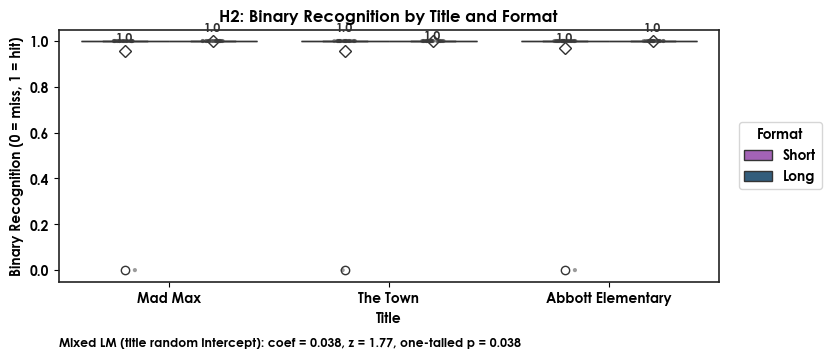

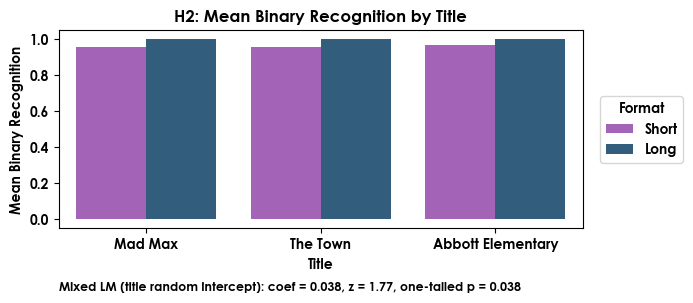

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

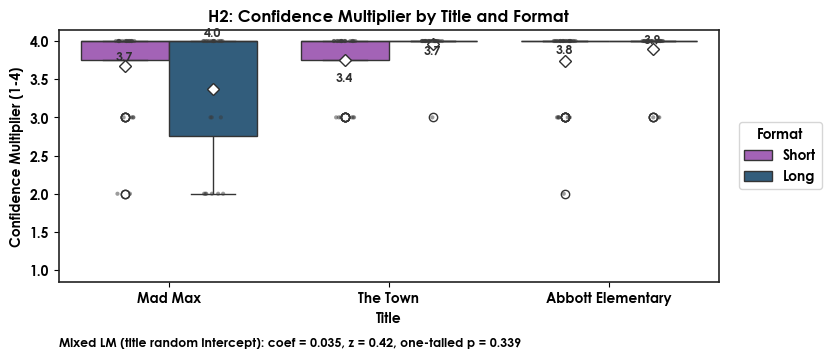

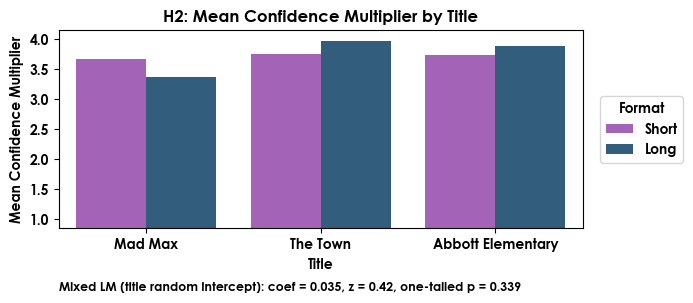

(                      component              title   form      mean       std  \
 0  Binary Recognition Hits (Q1)            Mad Max  Short  0.958333  0.204124   
 1  Binary Recognition Hits (Q1)            Mad Max   Long  1.000000  0.000000   
 2  Binary Recognition Hits (Q1)           The Town  Short  0.958333  0.204124   
 3  Binary Recognition Hits (Q1)           The Town   Long  1.000000  0.000000   
 4  Binary Recognition Hits (Q1)  Abbott Elementary  Short  0.967742  0.179605   
 5  Binary Recognition Hits (Q1)  Abbott Elementary   Long  1.000000  0.000000   
 
    count  
 0     24  
 1     24  
 2     24  
 3     28  
 4     31  
 5     27  ,
                       component  coef_form_long   z_value  p_one_tailed  \
 0  Binary Recognition Hits (Q1)        0.038217  1.774132      0.038021   
 
    n_observations  titles_included  
 0             158                3  ,
                     component              title   form      mean       std  \
 0  Confidence Multiplier (Q

In [93]:
from collections import defaultdict

component_pattern = re.compile(r"^(Long|Short)_(.+?)_Post_Recognition_Q([14])-(\d)$")
component_columns = {
    "binary": defaultdict(list),
    "multiplier": defaultdict(list),
}
for col in uv.columns:
    match = component_pattern.match(col)
    if not match:
        continue
    form, title, question, component_code = match.groups()
    title = title.strip()
    component_key = "binary" if component_code == "1" else "multiplier"
    component_columns[component_key][(form, title)].append(col)

component_metadata = {
    "binary": {
        "label": "Binary Recognition Hits (Q1)",
        "title": "H2: Binary Recognition by Title and Format",
        "bar_title": "H2: Mean Binary Recognition by Title",
        "ylabel": "Binary Recognition (0 = miss, 1 = hit)",
        "bar_ylabel": "Mean Binary Recognition",
        "scale_hint": (0.0, 1.0),
    },
    "multiplier": {
        "label": "Confidence Multiplier (Q2)",
        "title": "H2: Confidence Multiplier by Title and Format",
        "bar_title": "H2: Mean Confidence Multiplier by Title",
        "ylabel": "Confidence Multiplier (1-4)",
        "bar_ylabel": "Mean Confidence Multiplier",
        "scale_hint": (1.0, 4.0),
    },
}

component_title_descriptives = {}
component_title_summary = {}
palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}

for component_key, combo_map in component_columns.items():
    frames = []
    for (form, title), cols in combo_map.items():
        available = [col for col in cols if col in uv.columns]
        if not available:
            continue
        title_column = "Long Form" if form == "Long" else "Short Form"
        relevant_rows = uv.loc[uv[title_column] == title, [id_column] + available].copy()
        if relevant_rows.empty:
            continue
        relevant_rows[id_column] = relevant_rows[id_column].astype(str)
        relevant_rows["value"] = relevant_rows[available].mean(axis=1, skipna=True)
        relevant_rows = relevant_rows.dropna(subset=["value"])
        if relevant_rows.empty:
            continue
        frames.append(
            relevant_rows[[id_column, "value"]].assign(form=form, title=title)
        )
    component_long = (
        pd.concat(frames, ignore_index=True)
        if frames
        else pd.DataFrame(columns=[id_column, "form", "title", "value"])
    )
    component_long = component_long.loc[component_long["title"].isin(TARGET_TITLES)].copy()
    if component_long.empty:
        print(f"No component data available for {component_key}.")
        component_title_descriptives[component_key] = pd.DataFrame()
        component_title_summary[component_key] = pd.DataFrame()
        continue
    component_long["form"] = pd.Categorical(component_long["form"], categories=["Short", "Long"], ordered=True)
    component_long["title"] = pd.Categorical(component_long["title"], categories=TARGET_TITLES, ordered=True)
    subset = component_long.copy()
    subset["form_long"] = (subset["form"] == "Long").astype(int)
    try:
        mixed_model = smf.mixedlm("value ~ form_long", data=subset, groups=subset["title"])
        mixed_result = mixed_model.fit(reml=False, method="lbfgs", disp=False)
        coef = mixed_result.params.get("form_long", np.nan)
        se = mixed_result.bse.get("form_long", np.nan)
        z_val = coef / se if np.isfinite(se) and se != 0 else np.nan
        p_one = stats.norm.sf(z_val) if np.isfinite(z_val) else np.nan
    except Exception as exc:
        print(f"{component_key.title()} mixed model failed: {exc}")
        coef = se = z_val = p_one = np.nan
    meta = component_metadata[component_key]
    component_title_summary[component_key] = pd.DataFrame([
        {
            "component": meta["label"],
            "coef_form_long": coef,
            "z_value": z_val,
            "p_one_tailed": p_one,
            "n_observations": subset.shape[0],
            "titles_included": subset["title"].nunique(),
        }
    ])
    descriptives = (
        subset.groupby(["title", "form"], observed=True)["value"]
        .agg(mean="mean", std="std", count="count")
        .reset_index()
    )
    descriptives.insert(0, "component", meta["label"])
    component_title_descriptives[component_key] = descriptives
    value_min = subset["value"].min()
    value_max = subset["value"].max()
    if not np.isfinite(value_min) or not np.isfinite(value_max):
        value_min, value_max = meta["scale_hint"]
    scale_low, scale_high = meta["scale_hint"]
    lower = min(value_min, scale_low)
    upper = max(value_max, scale_high)
    if not np.isfinite(lower) or not np.isfinite(upper):
        lower, upper = scale_low, scale_high
    margin = 0.05 * (upper - lower if upper > lower else 1.0)
    ylim = (lower - margin, upper + margin)
    fig, ax = plt.subplots(figsize=(8, 4))
    fig.subplots_adjust(bottom=0.24, right=0.78)
    sns.boxplot(
        data=subset,
        x="title",
        y="value",
        hue="form",
        palette=palette,
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        ax=ax,
    )
    sns.stripplot(
        data=subset,
        x="title",
        y="value",
        hue="form",
        palette={"Short": "#3a3a3a", "Long": "#3a3a3a"},
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        dodge=True,
        size=3,
        alpha=0.5,
        ax=ax,
        legend=False,
    )
    ax.set_xlabel("Title")
    ax.set_ylabel(meta["ylabel"])
    ax.set_title(meta["title"])
    ax.set_ylim(*ylim)
    annotation = f"Mixed LM (title random intercept): coef = {coef:.3f}, z = {z_val:.2f}, one-tailed p = {p_one:.3g}"
    ax.text(0.0, -0.22, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2], title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
    plt.show()
    bar_data_title = (
        subset.groupby(["title", "form"], observed=True)["value"]
        .mean()
        .reset_index(name="mean_value")
    )
    bar_index = pd.MultiIndex.from_product([TARGET_TITLES, ["Short", "Long"]], names=["title", "form"])
    bar_data_title = (
        bar_data_title
        .set_index(["title", "form"])
        .reindex(bar_index)
        .reset_index()
    )
    fig_bar, ax_bar = plt.subplots(figsize=(8, 3.2))
    fig_bar.subplots_adjust(bottom=0.26, right=0.78)
    sns.barplot(
        data=bar_data_title,
        x="title",
        y="mean_value",
        hue="form",
        palette=palette,
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        ax=ax_bar,
    )
    ax_bar.set_xlabel("Title")
    ax_bar.set_ylabel(meta["bar_ylabel"])
    ax_bar.set_title(meta["bar_title"])
    ax_bar.set_ylim(*ylim)
    ax_bar.text(0.0, -0.27, annotation, transform=ax_bar.transAxes, ha="left", va="top", fontsize=9)
    ax_bar.legend(title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
    plt.show()
binary_title_descriptives = component_title_descriptives.get("binary", pd.DataFrame())
binary_title_summary = component_title_summary.get("binary", pd.DataFrame())
multiplier_title_descriptives = component_title_descriptives.get("multiplier", pd.DataFrame())
multiplier_title_summary = component_title_summary.get("multiplier", pd.DataFrame())
binary_title_descriptives, binary_title_summary, multiplier_title_descriptives, multiplier_title_summary

In [94]:
component_summary_rows = []
for component_key, descriptives in component_title_descriptives.items():
    if descriptives is None or descriptives.empty:
        continue
    label = component_title_summary.get(component_key, pd.DataFrame()).get("component", [component_key]).iloc[0] if component_key in component_title_summary else component_key
    long_mean = descriptives.loc[descriptives["form"] == "Long", "mean"].mean()
    short_mean = descriptives.loc[descriptives["form"] == "Short", "mean"].mean()
    diff = long_mean - short_mean
    summary_entry = component_title_summary.get(component_key)
    p_val = summary_entry["p_one_tailed"].iloc[0] if summary_entry is not None and not summary_entry.empty else np.nan
    n_obs = descriptives["count"].sum()
    component_summary_rows.append({
        "Component": label,
        "Long mean": long_mean,
        "Short mean": short_mean,
        "Difference": diff,
        "p (one-tailed)": p_val,
        "responses": n_obs,
    })
if component_summary_rows:
    component_summary = pd.DataFrame(component_summary_rows)
    display(to_percent_table(component_summary, ["Long mean", "Short mean", "Difference"], decimals=1))
    preferred_row = next((row for row in component_summary_rows if "Binary" in row["Component"]), component_summary_rows[0])
    extra_items = []
    p_val = preferred_row.get("p (one-tailed)")
    if isinstance(p_val, Number) and np.isfinite(p_val):
        extra_items.append(format_p_value(p_val))
    responses_val = preferred_row.get("responses")
    if isinstance(responses_val, Number) and np.isfinite(responses_val) and responses_val:
        extra_items.append(f"responses={int(responses_val)}")
    extra_note = ", ".join(extra_items) if extra_items else None
    print_long_short_summary(
        label=f"H2 Part 2a/2b ({preferred_row['Component']})",
        long_mean=preferred_row["Long mean"],
        short_mean=preferred_row["Short mean"],
        extra_note=extra_note
)
    binary_label = "Binary Recognition Hits (Q1)"
    if "component" in binary_title_descriptives.columns and not binary_title_descriptives["component"].dropna().empty:
        binary_label = binary_title_descriptives["component"].dropna().iloc[0]
    metric_column = None
    if 'recognition_long' in globals() and isinstance(recognition_long, pd.DataFrame):
        for candidate in ("metric", "component", "question"):
            if candidate in recognition_long.columns:
                metric_column = candidate
                break
    try:
        from statsmodels.stats.proportion import proportions_ztest
    except Exception:
        proportions_ztest = None
    binary_title_rows = []
    if isinstance(binary_title_descriptives, pd.DataFrame) and not binary_title_descriptives.empty:
        if 'TARGET_TITLES' in globals():
            title_order = [title for title in TARGET_TITLES if title in binary_title_descriptives["title"].unique()]
        else:
            title_order = []
        extra_titles = [title for title in binary_title_descriptives["title"].unique() if title not in title_order]
        title_order.extend(sorted(extra_titles))
        for title in title_order:
            title_rows = binary_title_descriptives.loc[binary_title_descriptives["title"] == title]
            if title_rows.empty:
                continue
            long_row = title_rows.loc[title_rows["form"] == "Long"]
            short_row = title_rows.loc[title_rows["form"] == "Short"]
            long_mean = float(long_row["mean"].iloc[0]) if not long_row.empty else np.nan
            short_mean = float(short_row["mean"].iloc[0]) if not short_row.empty else np.nan
            diff = long_mean - short_mean
            long_count = int(long_row["count"].iloc[0]) if not long_row.empty else 0
            short_count = int(short_row["count"].iloc[0]) if not short_row.empty else 0
            long_successes = int(round(long_mean * long_count)) if long_count else 0
            short_successes = int(round(short_mean * short_count)) if short_count else 0
            p_one = np.nan
            if proportions_ztest is not None and long_count > 0 and short_count > 0:
                try:
                    _, p_prop = proportions_ztest(
                        [long_successes, short_successes],
                        [long_count, short_count],
                        alternative="larger"
)
                    if np.isfinite(p_prop):
                        p_one = float(np.clip(p_prop, 0.0, 1.0))
                except Exception:
                    p_one = np.nan
            if (not isinstance(p_one, Number)) or not np.isfinite(p_one):
                if metric_column and 'recognition_long' in globals():
                    subset = recognition_long.loc[
                        (recognition_long[metric_column] == binary_label) &
                        (recognition_long["title"] == title)
                    ]
                    long_vals = subset.loc[subset["form"] == "Long", "value"].dropna()
                    short_vals = subset.loc[subset["form"] == "Short", "value"].dropna()
                    if len(long_vals) >= 2 and len(short_vals) >= 2:
                        t_stat, p_two = stats.ttest_ind(long_vals, short_vals, equal_var=False, nan_policy="omit")
                        if np.isfinite(p_two):
                            p_one = p_two / 2.0
                            if diff < 0:
                                p_one = 1 - p_one
                            if np.isfinite(p_one):
                                p_one = float(np.clip(p_one, 0.0, 1.0))
            binary_title_rows.append({
                "Title": title,
                "Long mean": long_mean,
                "Short mean": short_mean,
                "Difference": diff,
                "p (one-tailed)": p_one,
                "n_long": long_count,
                "n_short": short_count,
            })
    if binary_title_rows:
        binary_title_table = pd.DataFrame(binary_title_rows)
        display_table = to_percent_table(binary_title_table.copy(), ["Long mean", "Short mean", "Difference"], decimals=1)
        display_table["p (one-tailed)"] = display_table["p (one-tailed)"].apply(format_p_value)
        for col in ["n_long", "n_short"]:
            display_table[col] = display_table[col].apply(lambda x: "" if pd.isna(x) else int(x))
        display(display_table[["Title", "Long mean", "Short mean", "Difference", "p (one-tailed)", "n_long", "n_short"]])
        overall_binary_row = preferred_row if preferred_row["Component"] == binary_label else next((row for row in component_summary_rows if row["Component"] == binary_label), None)
        overall_note = None
        if overall_binary_row:
            overall_p = overall_binary_row.get("p (one-tailed)")
            if isinstance(overall_p, Number) and np.isfinite(overall_p):
                overall_note = f"overall mixed-model {format_p_value(overall_p)}"
        for row in binary_title_table.to_dict("records"):
            extra_bits = []
            p_val = row.get("p (one-tailed)")
            if isinstance(p_val, Number) and np.isfinite(p_val):
                extra_bits.append(format_p_value(p_val))
            if row.get("n_long"):
                extra_bits.append(f"n_long={int(row['n_long'])}")
            if row.get("n_short"):
                extra_bits.append(f"n_short={int(row['n_short'])}")
            if overall_note:
                extra_bits.append(overall_note)
            extra_note_title = ", ".join(extra_bits) if extra_bits else None
            print_long_short_summary(
                label=f"H2 Part 2a/2b – {row['Title']} ({binary_label})",
                long_mean=row["Long mean"],
                short_mean=row["Short mean"],
                extra_note=extra_note_title
)
else:
    print("H2 Part 2a/2b summary: No component data available for target titles.")

Component Long mean Short mean Difference  \
0  Binary Recognition Hits (Q1)    100.0%      96.1%       3.9%   
1    Confidence Multiplier (Q2)    374.3%     372.0%       2.3%   

   p (one-tailed)  responses  
0        0.038021        158  
1        0.338845        158

H2 Part 2a/2b (Binary Recognition Hits (Q1)): Long form (100%) showed 4% greater than short form (96%) (p=0.038, responses=158).


Title Long mean Short mean Difference p (one-tailed)  n_long  \
0            Mad Max    100.0%      95.8%       4.2%        p=0.156      24   
1           The Town    100.0%      95.8%       4.2%        p=0.138      28   
2  Abbott Elementary    100.0%      96.8%       3.2%        p=0.173      27   

   n_short  
0       24  
1       24  
2       31

H2 Part 2a/2b – Mad Max (Binary Recognition Hits (Q1)): Long form (100%) showed 4% greater than short form (96%) (p=0.156, n_long=24, n_short=24, overall mixed-model p=0.038).
H2 Part 2a/2b – The Town (Binary Recognition Hits (Q1)): Long form (100%) showed 4% greater than short form (96%) (p=0.138, n_long=28, n_short=24, overall mixed-model p=0.038).
H2 Part 2a/2b – Abbott Elementary (Binary Recognition Hits (Q1)): Long form (100%) showed 3% greater than short form (97%) (p=0.173, n_long=27, n_short=31, overall mixed-model p=0.038).


In [95]:
# Export H2 Part 2 component breakdown artefacts
component_long_exports: dict[str, pd.DataFrame] = {}
if 'component_columns' in globals():
    for component_key, combo_map in component_columns.items():
        frames: list[pd.DataFrame] = []
        for (form, title), cols in combo_map.items():
            available = [col for col in cols if col in uv.columns]
            if not available:
                continue
            title_column = "Long Form" if form == "Long" else "Short Form"
            relevant_rows = uv.loc[uv[title_column] == title, [id_column] + available].copy()
            if relevant_rows.empty:
                continue
            relevant_rows[id_column] = relevant_rows[id_column].astype(str)
            relevant_rows["value"] = relevant_rows[available].mean(axis=1, skipna=True)
            relevant_rows = relevant_rows.dropna(subset=["value"])
            if relevant_rows.empty:
                continue
            frames.append(relevant_rows[[id_column, "value"]].assign(form=form, title=title))
        if frames:
            component_long_exports[component_key] = pd.concat(frames, ignore_index=True)
        else:
            component_long_exports[component_key] = pd.DataFrame(columns=[id_column, "form", "title", "value"])
else:
    print("Component columns unavailable; raw component exports will contain summaries only.")

if 'component_title_descriptives' in globals() and isinstance(component_title_descriptives, dict):
    for component_key, descriptives in component_title_descriptives.items():
        summary_df = component_title_summary.get(component_key, pd.DataFrame()) if 'component_title_summary' in globals() else pd.DataFrame()
        meta = component_metadata.get(component_key, {"label": component_key}) if 'component_metadata' in globals() else {"label": component_key}
        frames: list[tuple[str, pd.DataFrame]] = []
        comp_long = component_long_exports.get(component_key)
        if isinstance(comp_long, pd.DataFrame) and not comp_long.empty:
            frames.append(("component_records", comp_long.copy()))
        if isinstance(descriptives, pd.DataFrame) and not descriptives.empty:
            frames.append(("descriptives", descriptives.copy()))
        if isinstance(summary_df, pd.DataFrame) and not summary_df.empty:
            frames.append(("mixed_summary", summary_df.copy()))
        if not frames:
            continue
        metadata = {
            "component": meta.get("label", component_key),
            "coef_form_long": float(summary_df.get("coef_form_long", [np.nan])[0]) if not summary_df.empty else np.nan,
            "z_value": float(summary_df.get("z_value", [np.nan])[0]) if not summary_df.empty else np.nan,
            "p_one_tailed": float(summary_df.get("p_one_tailed", [np.nan])[0]) if not summary_df.empty else np.nan,
            "n_observations": int(summary_df.get("n_observations", [comp_long.shape[0] if isinstance(comp_long, pd.DataFrame) else 0])[0]) if not summary_df.empty else (int(comp_long.shape[0]) if isinstance(comp_long, pd.DataFrame) else 0),
            "n_titles": int(summary_df.get("titles_included", [comp_long["title"].nunique() if isinstance(comp_long, pd.DataFrame) and not comp_long.empty else 0])[0]) if not summary_df.empty else (int(comp_long["title"].nunique()) if isinstance(comp_long, pd.DataFrame) and not comp_long.empty else 0),
        }
        _export_plot_bundle(
            section_label="Hypothesis 2 - Format and Recall",
            part_label=f"Part 2 – Component ({meta.get('label', component_key)})",
            title=f"H2: Component Breakdown – {meta.get('label', component_key)}",
            frames=frames,
            metadata=metadata,
        )
else:
    print("Component descriptives unavailable; skipping component exports.")

if 'component_summary' in globals() and isinstance(component_summary, pd.DataFrame) and not component_summary.empty:
    _export_plot_bundle(
        section_label="Hypothesis 2 - Format and Recall",
        part_label="Part 2 – Component summary",
        title="H2: Component-Level Summary",
        frames=[("component_summary", component_summary.copy())],
        metadata={"entries": int(component_summary.shape[0])},
    )

if 'binary_title_table' in globals() and isinstance(binary_title_table, pd.DataFrame) and not binary_title_table.empty:
    _export_plot_bundle(
        section_label="Hypothesis 2 - Format and Recall",
        part_label="Part 2 – Binary title table",
        title="H2: Binary Recognition by Title",
        frames=[("binary_title_table", binary_title_table.copy())],
        metadata={"titles": int(binary_title_table["Title"].nunique()) if "Title" in binary_title_table.columns else int(binary_title_table.shape[0])},
    )

### Part 3: Category-Level Recognition Means
We expand the recall analysis to the broader recognition categories and plot the normalised means with standard-error bars so lifts across question types are easy to compare.

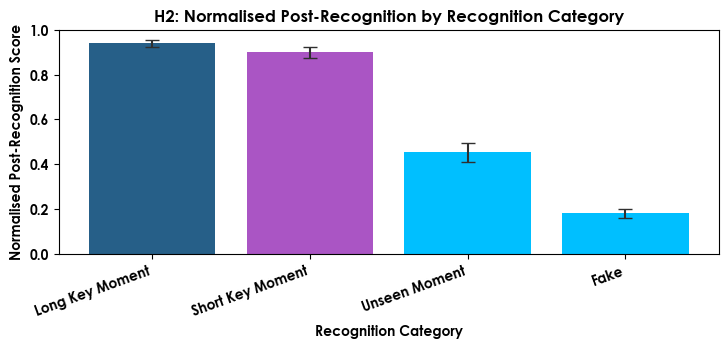

category_label      mean       std  count       sem
0   Long Key Moment  0.939873  0.145527     79  0.016373
1  Short Key Moment  0.898734  0.217500     79  0.024471
2     Unseen Moment  0.452532  0.388282     79  0.043685
3              Fake  0.181171  0.184429     79  0.020750

In [96]:
category_spec = [
    ("Long_key_Post_Recognition_Mean", "Long Key Moment"),
    ("Short_key_Post_Recognition_Mean", "Short Key Moment"),
    ("distractor_Post_Recognition_Mean", "Distractor Key Moment"),
    ("Long_seen_Post_Recognition_Mean", "Long Non-key Seen"),
    ("distractor2_Post_Recognition_Mean", "Distractor Non-key Seen"),
    ("unseen_Post_Recognition_Mean", "Long Unseen"),
    ("fake_Post_Recognition_Mean", "Unseen"),
]

category_spec = [
    ("Long_key_Post_Recognition_Mean", "Long Key Moment"),
    ("Short_key_Post_Recognition_Mean", "Short Key Moment"),
    ("unseen_Post_Recognition_Mean", "Unseen Moment"),
    ("fake_Post_Recognition_Mean", "Fake"),
]

available_spec = [(col, label) for col, label in category_spec if col in uv.columns]
if not available_spec:
    raise ValueError("No recognition category columns found for Part 3 bar chart.")
category_columns = [col for col, _ in available_spec]
label_order = [label for _, label in available_spec]
category_df = uv[[id_column] + category_columns].copy()
category_df[id_column] = category_df[id_column].astype(str)
category_df = category_df.dropna(subset=category_columns, how="all")
if category_df.empty:
    raise ValueError("Recognition category data is empty after dropping missing rows.")
category_values = category_df[category_columns].to_numpy(dtype=float)
if np.isnan(category_values).all():
    raise ValueError("Recognition category metrics are all NaN and cannot be normalised.")
value_min = np.nanmin(category_values)
value_max = np.nanmax(category_values)
if not np.isfinite(value_min) or not np.isfinite(value_max):
    raise ValueError("Recognition category metrics contain non-finite values and cannot be normalised.")
if np.isclose(value_max, value_min):
    raise ValueError("Recognition category metrics have zero variance; min-max normalisation is undefined.")
normalised_values = (category_values - value_min) / (value_max - value_min)
normalised_values = np.clip(normalised_values, 0.0, 1.0)
category_norm = pd.DataFrame(normalised_values, columns=category_columns, index=category_df.index)
category_norm.insert(0, id_column, category_df[id_column])
reverse_columns = {
    "unseen_Post_Recognition_Mean": "Long Unseen",
    "fake_Post_Recognition_Mean": "Unseen",
}
for col in reverse_columns:
    if col in category_norm.columns:
        category_norm.loc[:, col] = 1.0 - category_norm[col]
category_long = category_norm.melt(id_vars=id_column, var_name="category", value_name="value").dropna(subset=["value"])
category_long["category_label"] = pd.Categorical(
    category_long["category"].map(dict(available_spec)),
    categories=label_order,
    ordered=True,
 )
category_long = category_long.dropna(subset=["category_label"])
summary = (
    category_long.groupby("category_label", observed=True)["value"]
    .agg(mean="mean", std="std", count="count")
    .reindex(label_order)
    .reset_index()
 )
summary["sem"] = summary["std"] / np.sqrt(summary["count"].replace(0, np.nan))
summary["sem"] = summary["sem"].fillna(0.0)
x = np.arange(summary.shape[0])
fig, ax = plt.subplots(figsize=(8, 4))
fig.subplots_adjust(bottom=0.32, right=0.95)
label_list = summary["category_label"].tolist()
bar_colors = []
for label in label_list:
    if "Long" in label:
        bar_colors.append(COLOR_MAP.get("Long", "#265f88"))
    elif "Short" in label:
        bar_colors.append(COLOR_MAP.get("Short", "#aa55c4"))
    else:
        bar_colors.append(COLOR_MAP.get("Default", "#1f77b4"))
ax.bar(x, summary["mean"], color=bar_colors)
ax.errorbar(x, summary["mean"], yerr=summary["sem"], fmt="none", ecolor="#2f2f2f", capsize=5, linewidth=1.5)
ax.set_xticks(x)
ax.set_xticklabels(label_list, rotation=20, ha="right")
ax.set_ylim(0, 1.0)
ax.set_ylabel("Normalised Post-Recognition Score")
ax.set_xlabel("Recognition Category")
ax.set_title("H2: Normalised Post-Recognition by Recognition Category")
plt.show()
summary

In [97]:
if 'summary' in globals():
    category_table = summary.rename(columns={
        "category_label": "Category",
        "mean": "Mean",
        "sem": "SEM",
        "count": "n",
    })[["Category", "Mean", "SEM", "n"]]
    display(to_percent_table(category_table, ["Mean", "SEM"], decimals=1))
    long_rows = summary[summary["category_label"].str.contains("Long", case=False, na=False)]
    short_rows = summary[summary["category_label"].str.contains("Short", case=False, na=False)]
    long_mean = long_rows["mean"].mean() if not long_rows.empty else np.nan
    short_mean = short_rows["mean"].mean() if not short_rows.empty else np.nan
    respondent_count = category_norm[id_column].nunique() if 'category_norm' in globals() else None
    extra_items = ["category means averaged across Long/Short labels"]
    if respondent_count:
        extra_items.insert(0, f"respondents={int(respondent_count)}")
    extra_note = ", ".join(extra_items) if extra_items else None
    print_long_short_summary(
        label="H2 Part 3 (Normalised recognition categories)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("H2 Part 3 summary: category summary not available.")

Category   Mean   SEM   n
0   Long Key Moment  94.0%  1.6%  79
1  Short Key Moment  89.9%  2.4%  79
2     Unseen Moment  45.3%  4.4%  79
3              Fake  18.1%  2.1%  79

H2 Part 3 (Normalised recognition categories): Long form (94%) showed 4% greater than short form (90%) (respondents=79, category means averaged across Long/Short labels).


In [98]:
# Export H2 Part 3 (category-level recognition) artefacts
if all(name in globals() for name in ("category_long", "summary", "category_table")):
    frames: list[tuple[str, pd.DataFrame]] = []
    if isinstance(category_long, pd.DataFrame):
        frames.append(("category_long", category_long.copy()))
    if isinstance(summary, pd.DataFrame):
        frames.append(("category_summary", summary.copy()))
    if isinstance(category_table, pd.DataFrame):
        frames.append(("display_table", category_table.copy()))
    respondents = int(category_norm[id_column].nunique()) if 'category_norm' in globals() and isinstance(category_norm, pd.DataFrame) else None
    metadata = {
        "metric": "Normalised recognition categories",
        "respondents": respondents,
        "categories": int(summary.shape[0]) if isinstance(summary, pd.DataFrame) else None,
    }
    _export_plot_bundle(
        section_label="Hypothesis 2 - Format and Recall",
        part_label="Part 3 – Category means",
        title="H2: Normalised Post-Recognition by Recognition Category",
        frames=frames,
        metadata=metadata,
    )
else:
    print("H2 Part 3 export skipped: category tables unavailable.")

## Hypothesis 2 Open-Ended – Format and Recall
Open-ended recall scores are now available for the three target titles. Each `{form}_{title}_Post_Recall_OpenEndedSum` column is rescaled onto its own 0–1 range before we mirror the Hypothesis 2 workflow with within-subject, title-level, and category comparisons. This section focuses on the long-form uplift captured by the coded open-ended responses.

### Part 1a: Within-Subject Normalised Recall
We align each respondent's long- and short-form open-ended recall sums to the titles they viewed, normalise every `{form}_{title}` column using its own min/max range, and run the paired one-tailed t-test to confirm whether long-form viewing yields higher coded recall.

In [99]:
open_recall_pattern = re.compile(r"^(Long|Short)_(.+?)_Post_Recall_OpenEndedSum$")
open_recall_pattern_kms = re.compile(r"^(Long|Short)_(.+?)_Post_Recall_OpenEndedKMS$")
target_ceiling_lookup = {
    ("Long", "Abbott Elementary"): 16.0,
    ("Short", "Abbott Elementary"): 16.0,
    ("Long", "Mad Max"): 8.0,
    ("Short", "Mad Max"): 8.0,
    ("Long", "The Town"): 23.0,
    ("Short", "The Town"): 23.0,
}
form_column_lookup = {
    "Short": "Short Form",
    "Long": "Long Form",
}

recall_sum_data = build_open_recall_structures(
    uv=uv,
    id_column=id_column,
    target_titles=TARGET_TITLES,
    pattern=open_recall_pattern,
    label="OpenEndedSum",
    target_ceiling_lookup=target_ceiling_lookup,
    form_column_lookup=form_column_lookup,
)
recall_series_map = recall_sum_data["series_map"]
recall_series_map_raw = recall_sum_data["series_map_raw"]
recall_series_map_target = recall_sum_data["series_map_target"]
open_recall_long = recall_sum_data["long"]
open_recall_long_raw = recall_sum_data["long_raw"]
open_recall_long_target = recall_sum_data["long_target"]
open_recall_pairs = recall_sum_data["pairs"]
open_recall_stats = recall_sum_data["stats"]

recall_kms_data = build_open_recall_structures(
    uv=uv,
    id_column=id_column,
    target_titles=TARGET_TITLES,
    pattern=open_recall_pattern_kms,
    label="OpenEndedKMS",
    target_ceiling_lookup=target_ceiling_lookup,
    form_column_lookup=form_column_lookup,
)
recall_series_map_kms = recall_kms_data["series_map"]
recall_series_map_raw_kms = recall_kms_data["series_map_raw"]
recall_series_map_target_kms = recall_kms_data["series_map_target"]
open_recall_long_kms = recall_kms_data["long"]
open_recall_long_raw_kms = recall_kms_data["long_raw"]
open_recall_long_target_kms = recall_kms_data["long_target"]
open_recall_pairs_kms = recall_kms_data["pairs"]
open_recall_stats_kms = recall_kms_data["stats"]

open_recall_stats, open_recall_stats_kms


(    form              title   min   max  range  respondents
 0   Long  Abbott Elementary  35.0  80.0   45.0           23
 1   Long            Mad Max  15.0  75.0   60.0           16
 2   Long           The Town   0.0  80.0   80.0           26
 3  Short  Abbott Elementary   0.0  85.0   85.0           31
 4  Short            Mad Max   0.0  85.0   85.0           26
 5  Short           The Town   5.0  85.0   80.0           22,
     form              title   min   max  range  respondents
 0   Long  Abbott Elementary  40.0  85.0   45.0           27
 1   Long            Mad Max   0.0  80.0   80.0           24
 2   Long           The Town   0.0  95.0   95.0           30
 3  Short  Abbott Elementary   0.0  90.0   90.0           31
 4  Short            Mad Max   0.0  90.0   90.0           26
 5  Short           The Town   5.0  95.0   90.0           24)

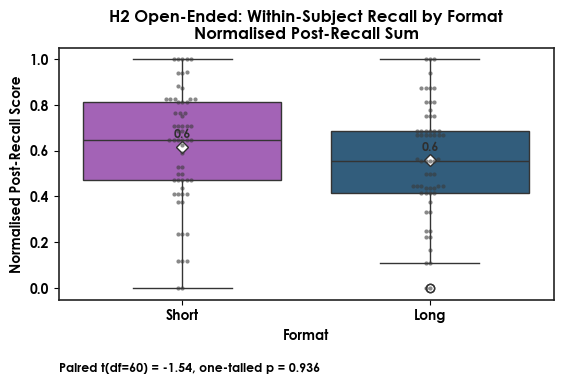

C:\Users\ashra\AppData\Local\Temp\ipykernel_12632\2557283401.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


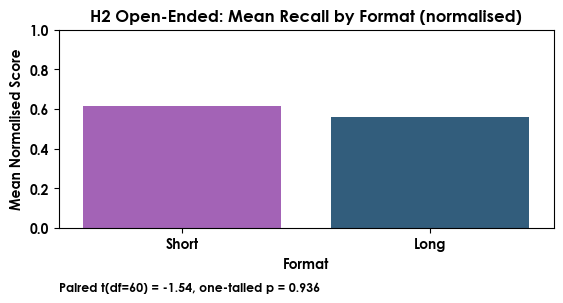

Metric Long mean Short mean Difference  \
0  Post Recall Open-Ended (normalised)     55.9%      61.4%      -5.5%   

   p (one-tailed)  n paired  
0          0.9357        61

H2 Part 1a (Normalised recall): Long form (56%) showed 6% lower than short form (61%) (p=0.936, n_pairs=61).


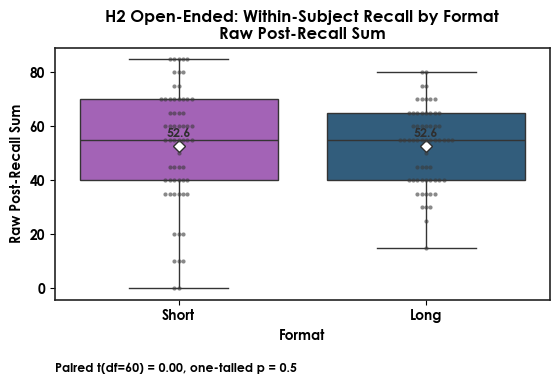

C:\Users\ashra\AppData\Local\Temp\ipykernel_12632\2557283401.py:195: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


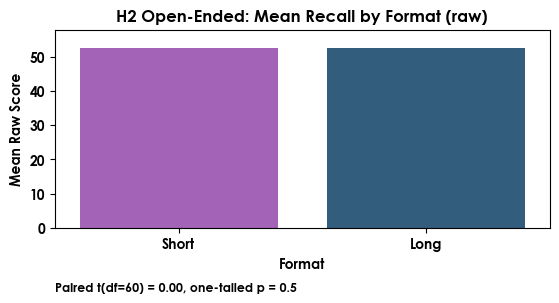

H2 Part 1a (Raw recall): Long form (5262%) showed 0% greater than short form (5262%) (p=0.500, n_pairs=61).


c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


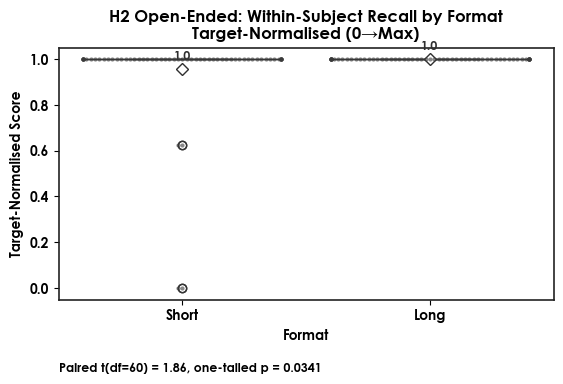

C:\Users\ashra\AppData\Local\Temp\ipykernel_12632\2557283401.py:285: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


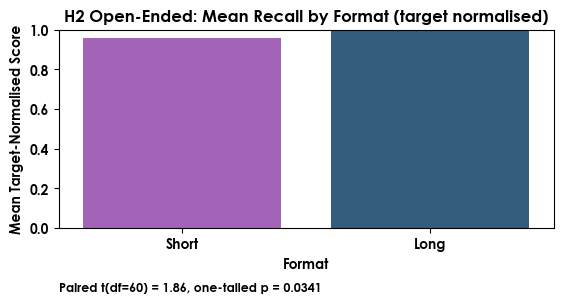

H2 Part 1a (Target-normalised recall): Long form (100%) showed 5% greater than short form (95%) (p=0.034, n_pairs=61).


In [100]:
if "open_recall_pairs" not in globals():
    raise ValueError("Open recall pair data not available; run the preparation cell above first.")

paired_open_recall = open_recall_pairs.copy()
paired_open_recall["short_title"] = paired_open_recall["Short Form"].astype(str).str.strip()
paired_open_recall["long_title"] = paired_open_recall["Long Form"].astype(str).str.strip()
numeric_columns = ["Short", "Long", "Short_raw", "Long_raw", "Short_target", "Long_target"]
for column in numeric_columns:
    if column in paired_open_recall.columns:
        paired_open_recall[column] = pd.to_numeric(paired_open_recall[column], errors="coerce")
paired_open_recall = paired_open_recall.dropna(subset=["Short", "Long"])
paired_open_recall = paired_open_recall.loc[
    paired_open_recall["short_title"].isin(TARGET_TITLES)
    & paired_open_recall["long_title"].isin(TARGET_TITLES)
].copy()
paired_open_recall[id_column] = paired_open_recall[id_column].astype(str)

if paired_open_recall.empty:
    print("No paired open-ended recall observations available for the specified titles.")
else:
    t_stat_norm, df_norm, p_one_norm, paired_table_norm = one_tailed_p_from_paired_t(
        paired_open_recall["Long"],
        paired_open_recall["Short"],
    )
    open_recall_paired = paired_open_recall[[id_column, "Short", "Long", "short_title", "long_title"]].copy()
    plot_data_norm = (
        paired_open_recall[[id_column, "Short", "Long"]]
        .melt(
            id_vars=[id_column],
            value_vars=["Short", "Long"],
            var_name="form",
            value_name="value",
        )
    )
    palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}
    fig_norm, ax_norm = plt.subplots(figsize=(6, 4))
    fig_norm.subplots_adjust(bottom=0.28, right=0.95)
    sns.boxplot(
        data=plot_data_norm,
        x="form",
        y="value",
        order=["Short", "Long"],
        hue="form",
        palette=palette,
        dodge=False,
        legend=False,
        ax=ax_norm,
    )
    sns.swarmplot(
        data=plot_data_norm,
        x="form",
        y="value",
        order=["Short", "Long"],
        color="#3a3a3a",
        size=3,
        alpha=0.6,
        ax=ax_norm,
    )
    ax_norm.set_title("H2 Open-Ended: Within-Subject Recall by Format\nNormalised Post-Recall Sum")
    ax_norm.set_xlabel("Format")
    ax_norm.set_ylabel("Normalised Post-Recall Score")
    annotation_norm = f"Paired t(df={df_norm}) = {t_stat_norm:.2f}, one-tailed p = {p_one_norm:.3g}"
    ax_norm.text(0.0, -0.25, annotation_norm, transform=ax_norm.transAxes, ha="left", va="top", fontsize=9)
    plt.show()

    bar_data_norm = (
        plot_data_norm.groupby("form", observed=True)["value"]
        .mean()
        .reindex(["Short", "Long"])
        .reset_index()
    )
    fig_bar_norm, ax_bar_norm = plt.subplots(figsize=(6, 3.2))
    fig_bar_norm.subplots_adjust(bottom=0.26, right=0.95)
    sns.barplot(
        data=bar_data_norm,
        x="form",
        y="value",
        order=["Short", "Long"],
        palette=[palette["Short"], palette["Long"]],
        ax=ax_bar_norm,
    )
    ax_bar_norm.set_ylim(0, 1.0)
    ax_bar_norm.set_xlabel("Format")
    ax_bar_norm.set_ylabel("Mean Normalised Score")
    ax_bar_norm.set_title("H2 Open-Ended: Mean Recall by Format (normalised)")
    ax_bar_norm.text(0.0, -0.27, annotation_norm, transform=ax_bar_norm.transAxes, ha="left", va="top", fontsize=9)
    plt.show()

    open_recall_descriptives = (
        plot_data_norm.groupby("form", observed=True)["value"]
        .agg(["mean", "std", "count"])
        .rename(columns={"mean": "mean_normalised", "std": "std_normalised", "count": "n"})
        .reset_index()
    )
    open_recall_summary = pd.DataFrame([
        {
            "metric": "Post_Recall_OpenEnded_Normalised",
            "n_paired": paired_table_norm.shape[0],
            "t_stat": t_stat_norm,
            "df": df_norm,
            "p_one_tailed": p_one_norm,
            "mean_long": paired_table_norm["Long"].mean(),
            "mean_short": paired_table_norm["Short"].mean(),
        }
    ])
    display(
        to_percent_table(
            pd.DataFrame(
                [
                    {
                        "Metric": "Post Recall Open-Ended (normalised)",
                        "Long mean": paired_table_norm["Long"].mean(),
                        "Short mean": paired_table_norm["Short"].mean(),
                        "Difference": paired_table_norm["Long"].mean() - paired_table_norm["Short"].mean(),
                        "p (one-tailed)": p_one_norm,
                        "n paired": paired_table_norm.shape[0],
                    }
                ]
            ),
            ["Long mean", "Short mean", "Difference"],
            decimals=1,
        )
    )
    extra_items: list[str] = []
    if isinstance(p_one_norm, Number) and np.isfinite(p_one_norm):
        extra_items.append(format_p_value(p_one_norm))
    if paired_table_norm.shape[0]:
        extra_items.append(f"n_pairs={paired_table_norm.shape[0]}")
    extra_note = ", ".join(extra_items) if extra_items else None
    print_long_short_summary(
        label="H2 Part 1a (Normalised recall)",
        long_mean=paired_table_norm["Long"].mean(),
        short_mean=paired_table_norm["Short"].mean(),
        extra_note=extra_note,
    )

    raw_columns = {"Short_raw", "Long_raw"}
    if raw_columns.issubset(paired_open_recall.columns):
        paired_raw = (
            paired_open_recall[[id_column, "Short_raw", "Long_raw"]]
            .dropna(subset=["Short_raw", "Long_raw"])
            .rename(columns={"Short_raw": "Short", "Long_raw": "Long"})
        )
        if not paired_raw.empty:
            t_stat_raw, df_raw, p_one_raw, paired_table_raw = one_tailed_p_from_paired_t(
                paired_raw["Long"],
                paired_raw["Short"],
            )
            plot_data_raw = (
                paired_raw.melt(
                    id_vars=[id_column],
                    value_vars=["Short", "Long"],
                    var_name="form",
                    value_name="value",
                )
            )
            fig_raw, ax_raw = plt.subplots(figsize=(6, 4))
            fig_raw.subplots_adjust(bottom=0.28, right=0.95)
            sns.boxplot(
                data=plot_data_raw,
                x="form",
                y="value",
                order=["Short", "Long"],
                hue="form",
                palette=palette,
                dodge=False,
                legend=False,
                ax=ax_raw,
            )
            sns.swarmplot(
                data=plot_data_raw,
                x="form",
                y="value",
                order=["Short", "Long"],
                color="#3a3a3a",
                size=3,
                alpha=0.6,
                ax=ax_raw,
            )
            ax_raw.set_title("H2 Open-Ended: Within-Subject Recall by Format\nRaw Post-Recall Sum")
            ax_raw.set_xlabel("Format")
            ax_raw.set_ylabel("Raw Post-Recall Sum")
            annotation_raw = f"Paired t(df={df_raw}) = {t_stat_raw:.2f}, one-tailed p = {p_one_raw:.3g}"
            ax_raw.text(0.0, -0.25, annotation_raw, transform=ax_raw.transAxes, ha="left", va="top", fontsize=9)
            plt.show()

            bar_data_raw = (
                plot_data_raw.groupby("form", observed=True)["value"]
                .mean()
                .reindex(["Short", "Long"])
                .reset_index()
            )
            fig_bar_raw, ax_bar_raw = plt.subplots(figsize=(6, 3.2))
            fig_bar_raw.subplots_adjust(bottom=0.26, right=0.95)
            sns.barplot(
                data=bar_data_raw,
                x="form",
                y="value",
                order=["Short", "Long"],
                palette=[palette["Short"], palette["Long"]],
                ax=ax_bar_raw,
            )
            upper = bar_data_raw["value"].max()
            if isinstance(upper, Number) and np.isfinite(upper):
                raw_ylim_top = upper * 1.1 if upper > 0 else 1.0
            else:
                raw_ylim_top = 1.0
            ax_bar_raw.set_ylim(0, raw_ylim_top)
            ax_bar_raw.set_xlabel("Format")
            ax_bar_raw.set_ylabel("Mean Raw Score")
            ax_bar_raw.set_title("H2 Open-Ended: Mean Recall by Format (raw)")
            ax_bar_raw.text(0.0, -0.27, annotation_raw, transform=ax_bar_raw.transAxes, ha="left", va="top", fontsize=9)
            plt.show()

            raw_extra_items: list[str] = []
            if isinstance(p_one_raw, Number) and np.isfinite(p_one_raw):
                raw_extra_items.append(format_p_value(p_one_raw))
            if paired_table_raw.shape[0]:
                raw_extra_items.append(f"n_pairs={paired_table_raw.shape[0]}")
            raw_extra_note = ", ".join(raw_extra_items) if raw_extra_items else None
            print_long_short_summary(
                label="H2 Part 1a (Raw recall)",
                long_mean=paired_table_raw["Long"].mean(),
                short_mean=paired_table_raw["Short"].mean(),
                extra_note=raw_extra_note,
            )

    target_columns = {"Short_target", "Long_target"}
    if target_columns.issubset(paired_open_recall.columns):
        paired_target_source = paired_open_recall[[id_column, "Short_target", "Long_target"]].dropna(
            subset=["Short_target", "Long_target"]
        )
        if not paired_target_source.empty:
            t_stat_target, df_target, p_one_target, paired_table_target = one_tailed_p_from_paired_t(
                paired_target_source["Long_target"],
                paired_target_source["Short_target"],
            )
            plot_data_target = (
                paired_target_source.rename(columns={"Short_target": "Short", "Long_target": "Long"})
                .melt(
                    id_vars=[id_column],
                    value_vars=["Short", "Long"],
                    var_name="form",
                    value_name="value",
                )
            )
            fig_target, ax_target = plt.subplots(figsize=(6, 4))
            fig_target.subplots_adjust(bottom=0.28, right=0.95)
            sns.boxplot(
                data=plot_data_target,
                x="form",
                y="value",
                order=["Short", "Long"],
                hue="form",
                palette=palette,
                dodge=False,
                legend=False,
                ax=ax_target,
            )
            sns.swarmplot(
                data=plot_data_target,
                x="form",
                y="value",
                order=["Short", "Long"],
                color="#3a3a3a",
                size=3,
                alpha=0.6,
                ax=ax_target,
            )
            ax_target.set_title("H2 Open-Ended: Within-Subject Recall by Format\nTarget-Normalised (0→Max)")
            ax_target.set_xlabel("Format")
            ax_target.set_ylabel("Target-Normalised Score")
            annotation_target = f"Paired t(df={df_target}) = {t_stat_target:.2f}, one-tailed p = {p_one_target:.3g}"
            ax_target.text(0.0, -0.25, annotation_target, transform=ax_target.transAxes, ha="left", va="top", fontsize=9)
            plt.show()

            bar_data_target = (
                plot_data_target.groupby("form", observed=True)["value"]
                .mean()
                .reindex(["Short", "Long"])
                .reset_index()
            )
            fig_bar_target, ax_bar_target = plt.subplots(figsize=(6, 3.2))
            fig_bar_target.subplots_adjust(bottom=0.26, right=0.95)
            sns.barplot(
                data=bar_data_target,
                x="form",
                y="value",
                order=["Short", "Long"],
                palette=[palette["Short"], palette["Long"]],
                ax=ax_bar_target,
            )
            ax_bar_target.set_ylim(0, 1.0)
            ax_bar_target.set_xlabel("Format")
            ax_bar_target.set_ylabel("Mean Target-Normalised Score")
            ax_bar_target.set_title("H2 Open-Ended: Mean Recall by Format (target normalised)")
            ax_bar_target.text(0.0, -0.27, annotation_target, transform=ax_bar_target.transAxes, ha="left", va="top", fontsize=9)
            plt.show()

            extra_items_target: list[str] = []
            if isinstance(p_one_target, Number) and np.isfinite(p_one_target):
                extra_items_target.append(format_p_value(p_one_target))
            if paired_table_target.shape[0]:
                extra_items_target.append(f"n_pairs={paired_table_target.shape[0]}")
            extra_note_target = ", ".join(extra_items_target) if extra_items_target else None
            print_long_short_summary(
                label="H2 Part 1a (Target-normalised recall)",
                long_mean=paired_table_target["Long"].mean(),
                short_mean=paired_table_target["Short"].mean(),
                extra_note=extra_note_target,
            )

    open_recall_descriptives, open_recall_summary

In [101]:
# Export Part 1a (Open-Ended recall) datasets for downstream plotting
if (
    "open_recall_paired" in globals()
    and isinstance(open_recall_paired, pd.DataFrame)
    and not open_recall_paired.empty
):
    def _export_h2_part1a_dataset(
        *,
        part_label: str,
        title: str,
        metric_label: str,
        frames: list[tuple[str, pd.DataFrame]],
        t_stat: float,
        df_val: float,
        p_one_val: float,
        n_pairs: int,
    ) -> None:
        metadata = {
            "metric": metric_label,
            "paired_t_stat": float(t_stat) if np.isfinite(t_stat) else np.nan,
            "paired_t_df": float(df_val) if np.isfinite(df_val) else np.nan,
            "paired_p_one": float(p_one_val) if np.isfinite(p_one_val) else np.nan,
            "n_pairs": int(n_pairs),
        }
        _export_plot_bundle(
            section_label="Hypothesis 2 Open-Ended – Format and Recall",
            part_label=part_label,
            title=title,
            frames=frames,
            metadata=metadata,
        )

    # Normalised export
    if all(
        name in globals()
        for name in (
            "plot_data_norm",
            "bar_data_norm",
            "open_recall_summary",
            "open_recall_descriptives",
            "paired_table_norm",
        )
    ):
        norm_frames: list[tuple[str, pd.DataFrame]] = [
            ("paired_records", open_recall_paired.copy()),
            ("plot_long", plot_data_norm.copy()),
            ("format_means", bar_data_norm.copy()),
            ("paired_values", paired_table_norm.copy()),
        ]
        if isinstance(open_recall_summary, pd.DataFrame) and not open_recall_summary.empty:
            norm_frames.append(("summary", open_recall_summary.copy()))
        if isinstance(open_recall_descriptives, pd.DataFrame) and not open_recall_descriptives.empty:
            norm_frames.append(("descriptives", open_recall_descriptives.copy()))
        _export_h2_part1a_dataset(
            part_label="Part 1a – Within-subject (normalised)",
            title="H2 Open-Ended: Within-Subject Recall by Format (normalised)",
            metric_label="Post Recall Open-Ended (normalised)",
            frames=norm_frames,
            t_stat=t_stat_norm,
            df_val=df_norm,
            p_one_val=p_one_norm,
            n_pairs=paired_table_norm.shape[0],
        )
    else:
        print("H2 Part 1a normalised export skipped: required tables unavailable.")

    # Raw export
    if all(
        name in globals()
        for name in (
            "paired_raw",
            "plot_data_raw",
            "bar_data_raw",
            "paired_table_raw",
            "t_stat_raw",
            "df_raw",
            "p_one_raw",
        )
    ) and isinstance(paired_raw, pd.DataFrame) and not paired_raw.empty:
        raw_summary = pd.DataFrame(
            [
                {
                    "Metric": "Post Recall Open-Ended (raw)",
                    "Long mean": paired_table_raw["Long"].mean(),
                    "Short mean": paired_table_raw["Short"].mean(),
                    "Difference": paired_table_raw["Long"].mean()
                    - paired_table_raw["Short"].mean(),
                    "p (one-tailed)": p_one_raw,
                    "n paired": paired_table_raw.shape[0],
                }
            ]
        )
        raw_frames: list[tuple[str, pd.DataFrame]] = [
            ("paired_records", paired_raw.copy()),
            ("plot_long", plot_data_raw.copy()),
            ("format_means", bar_data_raw.copy()),
            ("paired_values", paired_table_raw.copy()),
            ("summary", raw_summary.copy()),
        ]
        _export_h2_part1a_dataset(
            part_label="Part 1a – Within-subject (raw)",
            title="H2 Open-Ended: Within-Subject Recall by Format (raw)",
            metric_label="Post Recall Open-Ended (raw)",
            frames=raw_frames,
            t_stat=t_stat_raw,
            df_val=df_raw,
            p_one_val=p_one_raw,
            n_pairs=paired_table_raw.shape[0],
        )
    else:
        print("H2 Part 1a raw export skipped: required tables unavailable.")

    # Target-normalised export
    if all(
        name in globals()
        for name in (
            "paired_target_source",
            "plot_data_target",
            "bar_data_target",
            "paired_table_target",
            "t_stat_target",
            "df_target",
            "p_one_target",
        )
    ) and isinstance(paired_target_source, pd.DataFrame) and not paired_target_source.empty:
        target_summary = pd.DataFrame(
            [
                {
                    "Metric": "Post Recall Open-Ended (target normalised)",
                    "Long mean": paired_table_target["Long"].mean(),
                    "Short mean": paired_table_target["Short"].mean(),
                    "Difference": paired_table_target["Long"].mean()
                    - paired_table_target["Short"].mean(),
                    "p (one-tailed)": p_one_target,
                    "n paired": paired_table_target.shape[0],
                }
            ]
        )
        target_frames: list[tuple[str, pd.DataFrame]] = [
            ("paired_records", paired_target_source.copy()),
            ("plot_long", plot_data_target.copy()),
            ("format_means", bar_data_target.copy()),
            ("paired_values", paired_table_target.copy()),
            ("summary", target_summary.copy()),
        ]
        _export_h2_part1a_dataset(
            part_label="Part 1a – Within-subject (target-normalised)",
            title="H2 Open-Ended: Within-Subject Recall by Format (target normalised)",
            metric_label="Post Recall Open-Ended (target normalised)",
            frames=target_frames,
            t_stat=t_stat_target,
            df_val=df_target,
            p_one_val=p_one_target,
            n_pairs=paired_table_target.shape[0],
        )
    else:
        print("H2 Part 1a target-normalised export skipped: required tables unavailable.")
else:
    print("H2 Part 1a exports skipped: paired open-ended data unavailable.")

### Part 1b: Within-Subject Normalised Recall (KMS)
We repeat the within-subject comparison using the key-moment scored `{form}_{title}_Post_Recall_OpenEndedKMS` columns to confirm whether the long-form lift holds for the Key Moment Scoring variant.

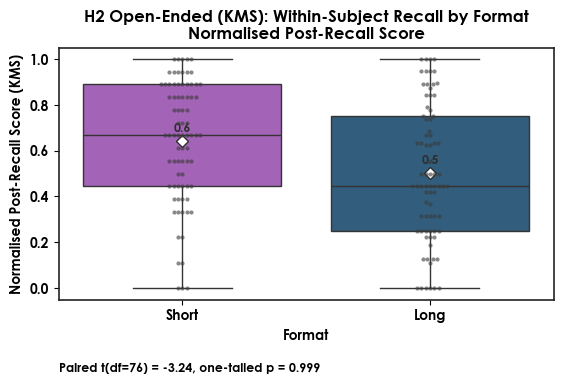

C:\Users\ashra\AppData\Local\Temp\ipykernel_12632\4050880932.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


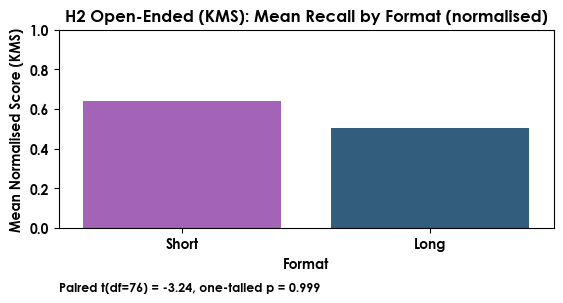

Metric Long mean Short mean Difference  \
0  Post Recall Open-Ended KMS (normalised)     50.3%      64.1%     -13.9%   

   p (one-tailed)  n paired  
0        0.999124        77

H2 Part 1b (Normalised KMS recall): Long form (50%) showed 14% lower than short form (64%) (p=0.999, n_pairs=77).


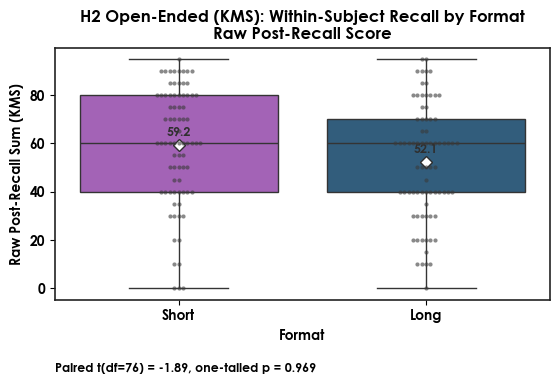

C:\Users\ashra\AppData\Local\Temp\ipykernel_12632\4050880932.py:240: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


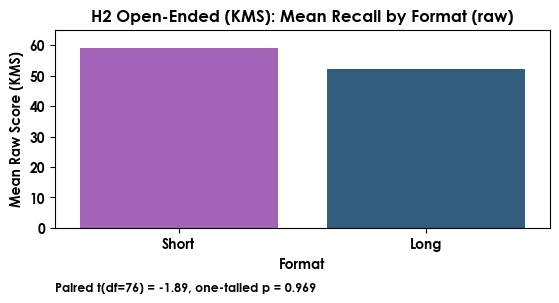

H2 Part 1b (Raw KMS recall): Long form (5214%) showed 708% lower than short form (5922%) (p=0.969, n_pairs=77).


c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


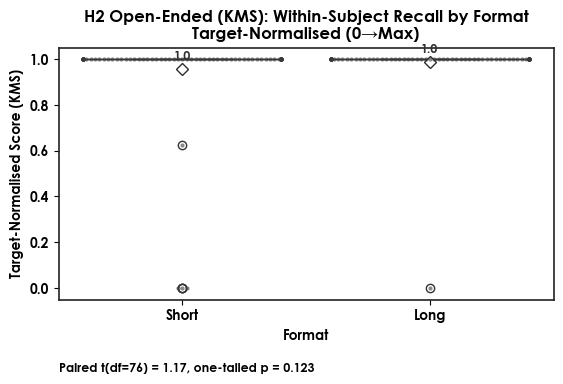

C:\Users\ashra\AppData\Local\Temp\ipykernel_12632\4050880932.py:349: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


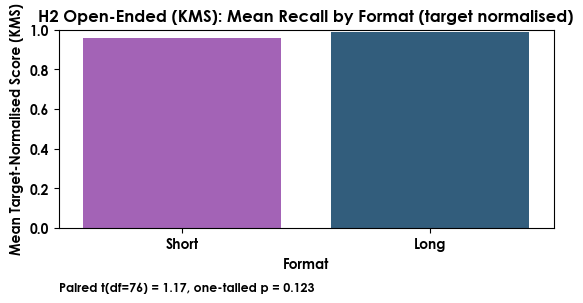

H2 Part 1b (Target-normalised KMS recall): Long form (99%) showed 3% greater than short form (96%) (p=0.123, n_pairs=77).


In [102]:
if "open_recall_pairs_kms" not in globals():
    raise ValueError("Open recall KMS pair data not available; rerun the preparation cell above.")

paired_open_recall_kms = open_recall_pairs_kms.copy()
paired_open_recall_kms["short_title"] = paired_open_recall_kms["Short Form"].astype(str).str.strip()
paired_open_recall_kms["long_title"] = paired_open_recall_kms["Long Form"].astype(str).str.strip()
numeric_columns_kms = ["Short", "Long", "Short_raw", "Long_raw", "Short_target", "Long_target"]
for column in numeric_columns_kms:
    if column in paired_open_recall_kms.columns:
        paired_open_recall_kms[column] = pd.to_numeric(paired_open_recall_kms[column], errors="coerce")
paired_open_recall_kms = paired_open_recall_kms.dropna(subset=["Short", "Long"])
paired_open_recall_kms = paired_open_recall_kms.loc[
    paired_open_recall_kms["short_title"].isin(TARGET_TITLES)
    & paired_open_recall_kms["long_title"].isin(TARGET_TITLES)
].copy()
paired_open_recall_kms[id_column] = paired_open_recall_kms[id_column].astype(str)

if paired_open_recall_kms.empty:
    print("No paired open-ended recall KMS observations available for the specified titles.")
else:
    t_stat_norm_kms, df_norm_kms, p_one_norm_kms, paired_table_norm_kms = one_tailed_p_from_paired_t(
        paired_open_recall_kms["Long"],
        paired_open_recall_kms["Short"],
    )
    open_recall_paired_kms = paired_open_recall_kms[[
        id_column,
        "Short",
        "Long",
        "short_title",
        "long_title",
    ]].copy()
    plot_data_norm_kms = (
        paired_open_recall_kms[[id_column, "Short", "Long"]]
        .melt(
            id_vars=[id_column],
            value_vars=["Short", "Long"],
            var_name="form",
            value_name="value",
        )
    )
    palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}
    fig_norm_kms, ax_norm_kms = plt.subplots(figsize=(6, 4))
    fig_norm_kms.subplots_adjust(bottom=0.28, right=0.95)
    sns.boxplot(
        data=plot_data_norm_kms,
        x="form",
        y="value",
        order=["Short", "Long"],
        hue="form",
        palette=palette,
        dodge=False,
        legend=False,
        ax=ax_norm_kms,
    )
    sns.swarmplot(
        data=plot_data_norm_kms,
        x="form",
        y="value",
        order=["Short", "Long"],
        color="#3a3a3a",
        size=3,
        alpha=0.6,
        ax=ax_norm_kms,
    )
    ax_norm_kms.set_title(
        "H2 Open-Ended (KMS): Within-Subject Recall by Format\nNormalised Post-Recall Score"
    )
    ax_norm_kms.set_xlabel("Format")
    ax_norm_kms.set_ylabel("Normalised Post-Recall Score (KMS)")
    annotation_norm_kms = (
        f"Paired t(df={df_norm_kms}) = {t_stat_norm_kms:.2f}, one-tailed p = {p_one_norm_kms:.3g}"
    )
    ax_norm_kms.text(
        0.0,
        -0.25,
        annotation_norm_kms,
        transform=ax_norm_kms.transAxes,
        ha="left",
        va="top",
        fontsize=9,
    )
    plt.show()

    bar_data_norm_kms = (
        plot_data_norm_kms.groupby("form", observed=True)["value"]
        .mean()
        .reindex(["Short", "Long"])
        .reset_index()
    )
    fig_bar_norm_kms, ax_bar_norm_kms = plt.subplots(figsize=(6, 3.2))
    fig_bar_norm_kms.subplots_adjust(bottom=0.26, right=0.95)
    sns.barplot(
        data=bar_data_norm_kms,
        x="form",
        y="value",
        order=["Short", "Long"],
        palette=[palette["Short"], palette["Long"]],
        ax=ax_bar_norm_kms,
    )
    ax_bar_norm_kms.set_ylim(0, 1.0)
    ax_bar_norm_kms.set_xlabel("Format")
    ax_bar_norm_kms.set_ylabel("Mean Normalised Score (KMS)")
    ax_bar_norm_kms.set_title("H2 Open-Ended (KMS): Mean Recall by Format (normalised)")
    ax_bar_norm_kms.text(
        0.0,
        -0.27,
        annotation_norm_kms,
        transform=ax_bar_norm_kms.transAxes,
        ha="left",
        va="top",
        fontsize=9,
    )
    plt.show()

    open_recall_descriptives_kms = (
        plot_data_norm_kms.groupby("form", observed=True)["value"]
        .agg(["mean", "std", "count"])
        .rename(
            columns={
                "mean": "mean_normalised",
                "std": "std_normalised",
                "count": "n",
            }
        )
        .reset_index()
    )
    open_recall_summary_kms = pd.DataFrame([
        {
            "metric": "Post_Recall_OpenEndedKMS_Normalised",
            "n_paired": paired_table_norm_kms.shape[0],
            "t_stat": t_stat_norm_kms,
            "df": df_norm_kms,
            "p_one_tailed": p_one_norm_kms,
            "mean_long": paired_table_norm_kms["Long"].mean(),
            "mean_short": paired_table_norm_kms["Short"].mean(),
        }
    ])
    display(
        to_percent_table(
            pd.DataFrame(
                [
                    {
                        "Metric": "Post Recall Open-Ended KMS (normalised)",
                        "Long mean": paired_table_norm_kms["Long"].mean(),
                        "Short mean": paired_table_norm_kms["Short"].mean(),
                        "Difference": paired_table_norm_kms["Long"].mean()
                        - paired_table_norm_kms["Short"].mean(),
                        "p (one-tailed)": p_one_norm_kms,
                        "n paired": paired_table_norm_kms.shape[0],
                    }
                ]
            ),
            ["Long mean", "Short mean", "Difference"],
            decimals=1,
        )
    )
    extra_items_kms: list[str] = []
    if isinstance(p_one_norm_kms, Number) and np.isfinite(p_one_norm_kms):
        extra_items_kms.append(format_p_value(p_one_norm_kms))
    if paired_table_norm_kms.shape[0]:
        extra_items_kms.append(f"n_pairs={paired_table_norm_kms.shape[0]}")
    extra_note_kms = ", ".join(extra_items_kms) if extra_items_kms else None
    print_long_short_summary(
        label="H2 Part 1b (Normalised KMS recall)",
        long_mean=paired_table_norm_kms["Long"].mean(),
        short_mean=paired_table_norm_kms["Short"].mean(),
        extra_note=extra_note_kms,
    )

    raw_columns_kms = {"Short_raw", "Long_raw"}
    if raw_columns_kms.issubset(paired_open_recall_kms.columns):
        paired_raw_kms = (
            paired_open_recall_kms[[id_column, "Short_raw", "Long_raw"]]
            .dropna(subset=["Short_raw", "Long_raw"])
            .rename(columns={"Short_raw": "Short", "Long_raw": "Long"})
        )
        if not paired_raw_kms.empty:
            t_stat_raw_kms, df_raw_kms, p_one_raw_kms, paired_table_raw_kms = one_tailed_p_from_paired_t(
                paired_raw_kms["Long"],
                paired_raw_kms["Short"],
            )
            plot_data_raw_kms = (
                paired_raw_kms.melt(
                    id_vars=[id_column],
                    value_vars=["Short", "Long"],
                    var_name="form",
                    value_name="value",
                )
            )
            fig_raw_kms, ax_raw_kms = plt.subplots(figsize=(6, 4))
            fig_raw_kms.subplots_adjust(bottom=0.28, right=0.95)
            sns.boxplot(
                data=plot_data_raw_kms,
                x="form",
                y="value",
                order=["Short", "Long"],
                hue="form",
                palette=palette,
                dodge=False,
                legend=False,
                ax=ax_raw_kms,
            )
            sns.swarmplot(
                data=plot_data_raw_kms,
                x="form",
                y="value",
                order=["Short", "Long"],
                color="#3a3a3a",
                size=3,
                alpha=0.6,
                ax=ax_raw_kms,
            )
            ax_raw_kms.set_title(
                "H2 Open-Ended (KMS): Within-Subject Recall by Format\nRaw Post-Recall Score"
            )
            ax_raw_kms.set_xlabel("Format")
            ax_raw_kms.set_ylabel("Raw Post-Recall Sum (KMS)")
            annotation_raw_kms = (
                f"Paired t(df={df_raw_kms}) = {t_stat_raw_kms:.2f}, one-tailed p = {p_one_raw_kms:.3g}"
            )
            ax_raw_kms.text(
                0.0,
                -0.25,
                annotation_raw_kms,
                transform=ax_raw_kms.transAxes,
                ha="left",
                va="top",
                fontsize=9,
            )
            plt.show()

            bar_data_raw_kms = (
                plot_data_raw_kms.groupby("form", observed=True)["value"]
                .mean()
                .reindex(["Short", "Long"])
                .reset_index()
            )
            fig_bar_raw_kms, ax_bar_raw_kms = plt.subplots(figsize=(6, 3.2))
            fig_bar_raw_kms.subplots_adjust(bottom=0.26, right=0.95)
            sns.barplot(
                data=bar_data_raw_kms,
                x="form",
                y="value",
                order=["Short", "Long"],
                palette=[palette["Short"], palette["Long"]],
                ax=ax_bar_raw_kms,
            )
            upper = bar_data_raw_kms["value"].max()
            raw_ylim_top = upper * 1.1 if isinstance(upper, Number) and np.isfinite(upper) and upper > 0 else 1.0
            ax_bar_raw_kms.set_ylim(0, raw_ylim_top)
            ax_bar_raw_kms.set_xlabel("Format")
            ax_bar_raw_kms.set_ylabel("Mean Raw Score (KMS)")
            ax_bar_raw_kms.set_title("H2 Open-Ended (KMS): Mean Recall by Format (raw)")
            ax_bar_raw_kms.text(
                0.0,
                -0.27,
                annotation_raw_kms,
                transform=ax_bar_raw_kms.transAxes,
                ha="left",
                va="top",
                fontsize=9,
            )
            plt.show()

            raw_extra_items_kms: list[str] = []
            if isinstance(p_one_raw_kms, Number) and np.isfinite(p_one_raw_kms):
                raw_extra_items_kms.append(format_p_value(p_one_raw_kms))
            if paired_table_raw_kms.shape[0]:
                raw_extra_items_kms.append(f"n_pairs={paired_table_raw_kms.shape[0]}")
            raw_extra_note_kms = ", ".join(raw_extra_items_kms) if raw_extra_items_kms else None
            print_long_short_summary(
                label="H2 Part 1b (Raw KMS recall)",
                long_mean=paired_table_raw_kms["Long"].mean(),
                short_mean=paired_table_raw_kms["Short"].mean(),
                extra_note=raw_extra_note_kms,
            )

    target_columns_kms = {"Short_target", "Long_target"}
    if target_columns_kms.issubset(paired_open_recall_kms.columns):
        paired_target_source_kms = paired_open_recall_kms[[id_column, "Short_target", "Long_target"]].dropna(
            subset=["Short_target", "Long_target"]
        )
        if not paired_target_source_kms.empty:
            t_stat_target_kms, df_target_kms, p_one_target_kms, paired_table_target_kms = one_tailed_p_from_paired_t(
                paired_target_source_kms["Long_target"],
                paired_target_source_kms["Short_target"],
            )
            plot_data_target_kms = (
                paired_target_source_kms.rename(
                    columns={"Short_target": "Short", "Long_target": "Long"}
                )
                .melt(
                    id_vars=[id_column],
                    value_vars=["Short", "Long"],
                    var_name="form",
                    value_name="value",
                )
            )
            fig_target_kms, ax_target_kms = plt.subplots(figsize=(6, 4))
            fig_target_kms.subplots_adjust(bottom=0.28, right=0.95)
            sns.boxplot(
                data=plot_data_target_kms,
                x="form",
                y="value",
                order=["Short", "Long"],
                hue="form",
                palette=palette,
                dodge=False,
                legend=False,
                ax=ax_target_kms,
            )
            sns.swarmplot(
                data=plot_data_target_kms,
                x="form",
                y="value",
                order=["Short", "Long"],
                color="#3a3a3a",
                size=3,
                alpha=0.6,
                ax=ax_target_kms,
            )
            ax_target_kms.set_title(
                "H2 Open-Ended (KMS): Within-Subject Recall by Format\nTarget-Normalised (0→Max)"
            )
            ax_target_kms.set_xlabel("Format")
            ax_target_kms.set_ylabel("Target-Normalised Score (KMS)")
            annotation_target_kms = (
                f"Paired t(df={df_target_kms}) = {t_stat_target_kms:.2f}, one-tailed p = {p_one_target_kms:.3g}"
            )
            ax_target_kms.text(
                0.0,
                -0.25,
                annotation_target_kms,
                transform=ax_target_kms.transAxes,
                ha="left",
                va="top",
                fontsize=9,
            )
            plt.show()

            bar_data_target_kms = (
                plot_data_target_kms.groupby("form", observed=True)["value"]
                .mean()
                .reindex(["Short", "Long"])
                .reset_index()
            )
            fig_bar_target_kms, ax_bar_target_kms = plt.subplots(figsize=(6, 3.2))
            fig_bar_target_kms.subplots_adjust(bottom=0.26, right=0.95)
            sns.barplot(
                data=bar_data_target_kms,
                x="form",
                y="value",
                order=["Short", "Long"],
                palette=[palette["Short"], palette["Long"]],
                ax=ax_bar_target_kms,
            )
            ax_bar_target_kms.set_ylim(0, 1.0)
            ax_bar_target_kms.set_xlabel("Format")
            ax_bar_target_kms.set_ylabel("Mean Target-Normalised Score (KMS)")
            ax_bar_target_kms.set_title(
                "H2 Open-Ended (KMS): Mean Recall by Format (target normalised)"
            )
            ax_bar_target_kms.text(
                0.0,
                -0.27,
                annotation_target_kms,
                transform=ax_bar_target_kms.transAxes,
                ha="left",
                va="top",
                fontsize=9,
            )
            plt.show()

            extra_items_target_kms: list[str] = []
            if isinstance(p_one_target_kms, Number) and np.isfinite(p_one_target_kms):
                extra_items_target_kms.append(format_p_value(p_one_target_kms))
            if paired_table_target_kms.shape[0]:
                extra_items_target_kms.append(
                    f"n_pairs={paired_table_target_kms.shape[0]}"
                )
            extra_note_target_kms = (
                ", ".join(extra_items_target_kms) if extra_items_target_kms else None
            )
            print_long_short_summary(
                label="H2 Part 1b (Target-normalised KMS recall)",
                long_mean=paired_table_target_kms["Long"].mean(),
                short_mean=paired_table_target_kms["Short"].mean(),
                extra_note=extra_note_target_kms,
            )

    open_recall_descriptives_kms, open_recall_summary_kms

In [103]:
# Export Part 1b (Open-Ended KMS) datasets
if (
    "open_recall_paired_kms" in globals()
    and isinstance(open_recall_paired_kms, pd.DataFrame)
    and not open_recall_paired_kms.empty
):
    def _export_h2_part1b_dataset(
        *,
        part_label: str,
        title: str,
        metric_label: str,
        frames: list[tuple[str, pd.DataFrame]],
        t_stat: float,
        df_val: float,
        p_one_val: float,
        n_pairs: int,
    ) -> None:
        metadata = {
            "metric": metric_label,
            "paired_t_stat": float(t_stat) if np.isfinite(t_stat) else np.nan,
            "paired_t_df": float(df_val) if np.isfinite(df_val) else np.nan,
            "paired_p_one": float(p_one_val) if np.isfinite(p_one_val) else np.nan,
            "n_pairs": int(n_pairs),
        }
        _export_plot_bundle(
            section_label="Hypothesis 2 Open-Ended – Format and Recall",
            part_label=part_label,
            title=title,
            frames=frames,
            metadata=metadata,
        )

    # Normalised export
    if all(
        name in globals()
        for name in (
            "plot_data_norm_kms",
            "bar_data_norm_kms",
            "open_recall_summary_kms",
            "open_recall_descriptives_kms",
            "paired_table_norm_kms",
        )
    ):
        norm_frames_kms: list[tuple[str, pd.DataFrame]] = [
            ("paired_records", open_recall_paired_kms.copy()),
            ("plot_long", plot_data_norm_kms.copy()),
            ("format_means", bar_data_norm_kms.copy()),
            ("paired_values", paired_table_norm_kms.copy()),
        ]
        if isinstance(open_recall_summary_kms, pd.DataFrame) and not open_recall_summary_kms.empty:
            norm_frames_kms.append(("summary", open_recall_summary_kms.copy()))
        if isinstance(open_recall_descriptives_kms, pd.DataFrame) and not open_recall_descriptives_kms.empty:
            norm_frames_kms.append(("descriptives", open_recall_descriptives_kms.copy()))
        _export_h2_part1b_dataset(
            part_label="Part 1b – Within-subject KMS (normalised)",
            title="H2 Open-Ended (KMS): Within-Subject Recall by Format (normalised)",
            metric_label="Post Recall Open-Ended KMS (normalised)",
            frames=norm_frames_kms,
            t_stat=t_stat_norm_kms,
            df_val=df_norm_kms,
            p_one_val=p_one_norm_kms,
            n_pairs=paired_table_norm_kms.shape[0],
        )
    else:
        print("H2 Part 1b normalised export skipped: required tables unavailable.")

    # Raw export
    if all(
        name in globals()
        for name in (
            "paired_raw_kms",
            "plot_data_raw_kms",
            "bar_data_raw_kms",
            "paired_table_raw_kms",
            "t_stat_raw_kms",
            "df_raw_kms",
            "p_one_raw_kms",
        )
    ) and isinstance(paired_raw_kms, pd.DataFrame) and not paired_raw_kms.empty:
        raw_summary_kms = pd.DataFrame(
            [
                {
                    "Metric": "Post Recall Open-Ended KMS (raw)",
                    "Long mean": paired_table_raw_kms["Long"].mean(),
                    "Short mean": paired_table_raw_kms["Short"].mean(),
                    "Difference": paired_table_raw_kms["Long"].mean()
                    - paired_table_raw_kms["Short"].mean(),
                    "p (one-tailed)": p_one_raw_kms,
                    "n paired": paired_table_raw_kms.shape[0],
                }
            ]
        )
        raw_frames_kms: list[tuple[str, pd.DataFrame]] = [
            ("paired_records", paired_raw_kms.copy()),
            ("plot_long", plot_data_raw_kms.copy()),
            ("format_means", bar_data_raw_kms.copy()),
            ("paired_values", paired_table_raw_kms.copy()),
            ("summary", raw_summary_kms.copy()),
        ]
        _export_h2_part1b_dataset(
            part_label="Part 1b – Within-subject KMS (raw)",
            title="H2 Open-Ended (KMS): Within-Subject Recall by Format (raw)",
            metric_label="Post Recall Open-Ended KMS (raw)",
            frames=raw_frames_kms,
            t_stat=t_stat_raw_kms,
            df_val=df_raw_kms,
            p_one_val=p_one_raw_kms,
            n_pairs=paired_table_raw_kms.shape[0],
        )
    else:
        print("H2 Part 1b raw export skipped: required tables unavailable.")

    # Target-normalised export
    if all(
        name in globals()
        for name in (
            "paired_target_source_kms",
            "plot_data_target_kms",
            "bar_data_target_kms",
            "paired_table_target_kms",
            "t_stat_target_kms",
            "df_target_kms",
            "p_one_target_kms",
        )
    ) and isinstance(paired_target_source_kms, pd.DataFrame) and not paired_target_source_kms.empty:
        target_summary_kms = pd.DataFrame(
            [
                {
                    "Metric": "Post Recall Open-Ended KMS (target normalised)",
                    "Long mean": paired_table_target_kms["Long"].mean(),
                    "Short mean": paired_table_target_kms["Short"].mean(),
                    "Difference": paired_table_target_kms["Long"].mean()
                    - paired_table_target_kms["Short"].mean(),
                    "p (one-tailed)": p_one_target_kms,
                    "n paired": paired_table_target_kms.shape[0],
                }
            ]
        )
        target_frames_kms: list[tuple[str, pd.DataFrame]] = [
            ("paired_records", paired_target_source_kms.copy()),
            ("plot_long", plot_data_target_kms.copy()),
            ("format_means", bar_data_target_kms.copy()),
            ("paired_values", paired_table_target_kms.copy()),
            ("summary", target_summary_kms.copy()),
        ]
        _export_h2_part1b_dataset(
            part_label="Part 1b – Within-subject KMS (target-normalised)",
            title="H2 Open-Ended (KMS): Within-Subject Recall by Format (target normalised)",
            metric_label="Post Recall Open-Ended KMS (target normalised)",
            frames=target_frames_kms,
            t_stat=t_stat_target_kms,
            df_val=df_target_kms,
            p_one_val=p_one_target_kms,
            n_pairs=paired_table_target_kms.shape[0],
        )
    else:
        print("H2 Part 1b target-normalised export skipped: required tables unavailable.")
else:
    print("H2 Part 1b exports skipped: paired open-ended KMS data unavailable.")

### Part 2a: Mixed Models by Title
We pivot the normalised open-ended recall scores into a long frame by title, estimate a mixed-effects model with title as a random intercept, and pair it with box and bar charts to visualise any Long–Short lift at the title level.

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

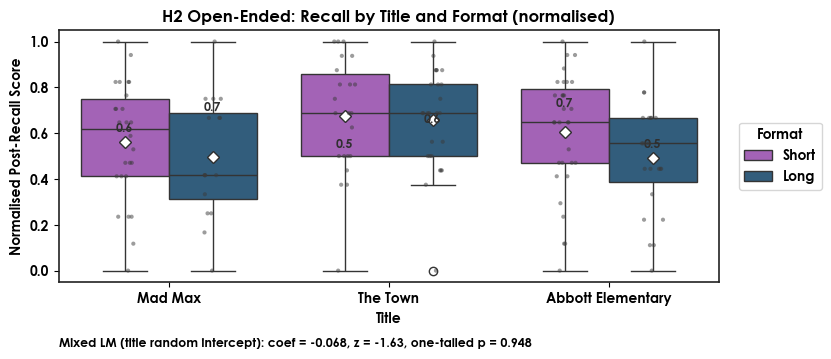

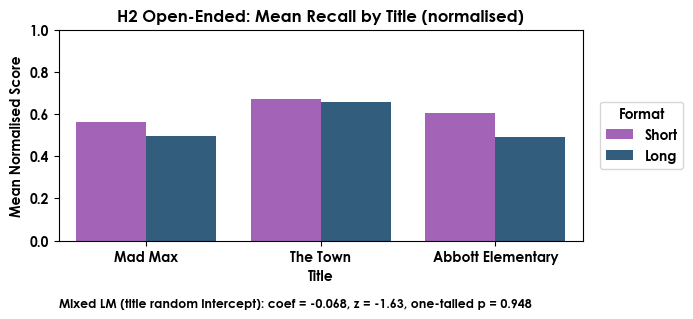

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


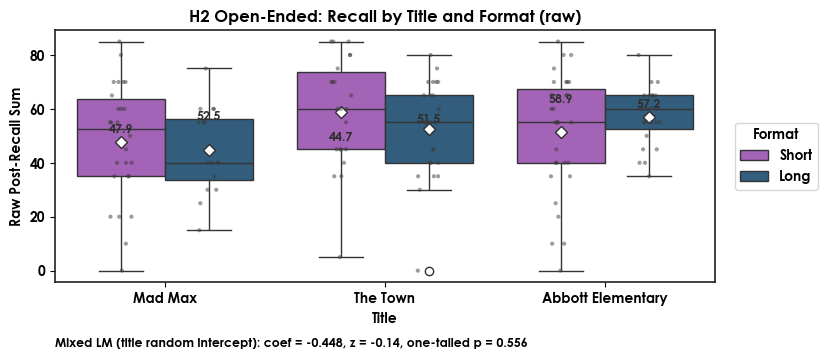

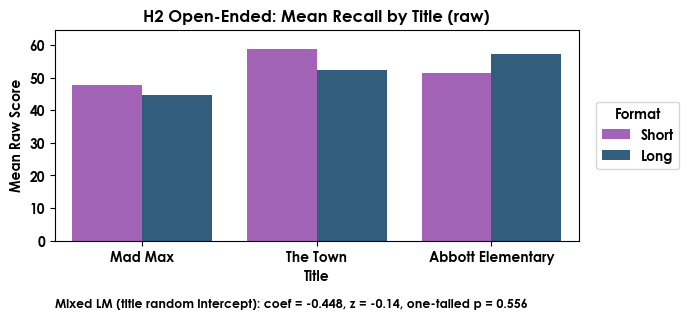

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

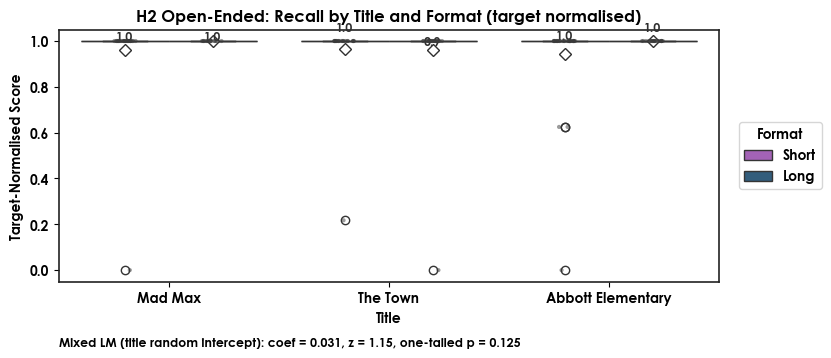

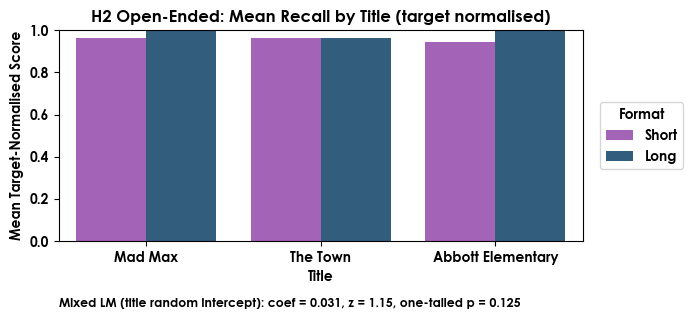

(               title   form  mean_normalised  std_normalised   n
 0  Abbott Elementary  Short         0.605313        0.258732  31
 1  Abbott Elementary   Long         0.492754        0.243492  23
 2            Mad Max  Short         0.563348        0.257845  26
 3            Mad Max   Long         0.494792        0.266091  16
 4           The Town  Short         0.673295        0.255834  22
 5           The Town   Long         0.656250        0.220971  26,
                                    metric  coef_form_long   z_value  \
 0        Post_Recall_OpenEnded_Normalised       -0.067619 -1.629119   
 1               Post_Recall_OpenEnded_Raw       -0.447902 -0.139594   
 2  Post_Recall_OpenEnded_TargetNormalised        0.031175  1.148987   
 
    p_one_tailed  n_observations  titles_included  
 0      0.948356             144                3  
 1      0.555510             144                3  
 2      0.125281             144                3  )

In [104]:
palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}
open_recall_between_subject_summary = []

if "open_recall_long" not in globals():
    raise ValueError("Open recall long format data not available; run the Part 1 preparation cell first.")

subset = open_recall_long.loc[open_recall_long["title"].isin(TARGET_TITLES)].copy()
subset_raw = None
if "open_recall_long_raw" in globals():
    subset_raw = open_recall_long_raw.loc[open_recall_long_raw["title"].isin(TARGET_TITLES)].copy()
subset_target = None
if "open_recall_long_target" in globals():
    subset_target = open_recall_long_target.loc[open_recall_long_target["title"].isin(TARGET_TITLES)].copy()

if subset.empty:
    print("No normalised open-ended recall observations available for the specified target titles.")
    open_recall_title_descriptives = pd.DataFrame()
    open_recall_title_summary = pd.DataFrame()
else:
    subset["form_long"] = (subset["form"] == "Long").astype(int)
    coef = se = z_val = p_one = np.nan
    try:
        mixed_model = smf.mixedlm("value ~ form_long", data=subset, groups=subset["title"])
        mixed_result = mixed_model.fit(reml=False, method="lbfgs", disp=False)
        coef = mixed_result.params.get("form_long", np.nan)
        se = mixed_result.bse.get("form_long", np.nan)
        z_val = coef / se if np.isfinite(se) and se != 0 else np.nan
        p_one = stats.norm.sf(z_val) if np.isfinite(z_val) else np.nan
    except Exception as exc:
        print(f"Mixed model failed: {exc}")
    open_recall_between_subject_summary.append({
        "metric": "Post_Recall_OpenEnded_Normalised",
        "coef_form_long": coef,
        "z_value": z_val,
        "p_one_tailed": p_one,
        "n_observations": subset.shape[0],
        "titles_included": subset["title"].nunique(),
    })

    fig_norm, ax_norm = plt.subplots(figsize=(8, 4))
    fig_norm.subplots_adjust(bottom=0.24, right=0.78)
    sns.boxplot(
        data=subset,
        x="title",
        y="value",
        hue="form",
        palette=palette,
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        ax=ax_norm,
    )
    sns.stripplot(
        data=subset,
        x="title",
        y="value",
        hue="form",
        palette={"Short": "#3a3a3a", "Long": "#3a3a3a"},
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        dodge=True,
        size=3,
        alpha=0.5,
        ax=ax_norm,
        legend=False,
    )
    ax_norm.set_xlabel("Title")
    ax_norm.set_ylabel("Normalised Post-Recall Score")
    ax_norm.set_title("H2 Open-Ended: Recall by Title and Format (normalised)")
    annotation_norm = f"Mixed LM (title random intercept): coef = {coef:.3f}, z = {z_val:.2f}, one-tailed p = {p_one:.3g}"
    ax_norm.text(0.0, -0.22, annotation_norm, transform=ax_norm.transAxes, ha="left", va="top", fontsize=9)
    handles_norm, labels_norm = ax_norm.get_legend_handles_labels()
    ax_norm.legend(handles_norm[:2], labels_norm[:2], title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
    plt.show()

    bar_data_title = (
        subset.groupby(["title", "form"], observed=True)["value"]
        .mean()
        .reset_index(name="mean_value")
    )
    bar_data_title = bar_data_title.set_index(["title", "form"]).reindex(
        pd.MultiIndex.from_product([TARGET_TITLES, ["Short", "Long"]], names=["title", "form"])
    ).reset_index()

    fig_bar_norm, ax_bar_norm = plt.subplots(figsize=(8, 3.4))
    fig_bar_norm.subplots_adjust(bottom=0.26, right=0.78)
    sns.barplot(
        data=bar_data_title,
        x="title",
        y="mean_value",
        hue="form",
        palette=palette,
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        ax=ax_bar_norm,
    )
    ax_bar_norm.set_ylim(0, 1.0)
    ax_bar_norm.set_xlabel("Title")
    ax_bar_norm.set_ylabel("Mean Normalised Score")
    ax_bar_norm.set_title("H2 Open-Ended: Mean Recall by Title (normalised)")
    ax_bar_norm.text(0.0, -0.27, annotation_norm, transform=ax_bar_norm.transAxes, ha="left", va="top", fontsize=9)
    ax_bar_norm.legend(title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
    plt.show()

    open_recall_title_descriptives = (
        subset.groupby(["title", "form"], observed=True)["value"]
        .agg(["mean", "std", "count"])
        .rename(columns={"mean": "mean_normalised", "std": "std_normalised", "count": "n"})
        .reset_index()
    )

    if subset_raw is not None and not subset_raw.empty:
        subset_raw["form"] = pd.Categorical(subset_raw["form"], categories=["Short", "Long"], ordered=True)
        subset_raw["form_long"] = (subset_raw["form"] == "Long").astype(int)
        coef_raw = se_raw = z_raw = p_one_raw = np.nan
        try:
            mixed_model_raw = smf.mixedlm("value ~ form_long", data=subset_raw, groups=subset_raw["title"])
            mixed_result_raw = mixed_model_raw.fit(reml=False, method="lbfgs", disp=False)
            coef_raw = mixed_result_raw.params.get("form_long", np.nan)
            se_raw = mixed_result_raw.bse.get("form_long", np.nan)
            z_raw = coef_raw / se_raw if np.isfinite(se_raw) and se_raw != 0 else np.nan
            p_one_raw = stats.norm.sf(z_raw) if np.isfinite(z_raw) else np.nan
        except Exception as exc:
            print(f"Mixed model (raw values) failed: {exc}")
        open_recall_between_subject_summary.append({
            "metric": "Post_Recall_OpenEnded_Raw",
            "coef_form_long": coef_raw,
            "z_value": z_raw,
            "p_one_tailed": p_one_raw,
            "n_observations": subset_raw.shape[0],
            "titles_included": subset_raw["title"].nunique(),
        })

        fig_raw, ax_raw = plt.subplots(figsize=(8, 4))
        fig_raw.subplots_adjust(bottom=0.24, right=0.78)
        sns.boxplot(
            data=subset_raw,
            x="title",
            y="value",
            hue="form",
            palette=palette,
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            ax=ax_raw,
        )
        sns.stripplot(
            data=subset_raw,
            x="title",
            y="value",
            hue="form",
            palette={"Short": "#3a3a3a", "Long": "#3a3a3a"},
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            dodge=True,
            size=3,
            alpha=0.5,
            ax=ax_raw,
            legend=False,
        )
        ax_raw.set_xlabel("Title")
        ax_raw.set_ylabel("Raw Post-Recall Sum")
        ax_raw.set_title("H2 Open-Ended: Recall by Title and Format (raw)")
        annotation_raw = f"Mixed LM (title random intercept): coef = {coef_raw:.3f}, z = {z_raw:.2f}, one-tailed p = {p_one_raw:.3g}"
        ax_raw.text(0.0, -0.22, annotation_raw, transform=ax_raw.transAxes, ha="left", va="top", fontsize=9)
        handles_raw, labels_raw = ax_raw.get_legend_handles_labels()
        ax_raw.legend(handles_raw[:2], labels_raw[:2], title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
        plt.show()

        bar_data_title_raw = (
            subset_raw.groupby(["title", "form"], observed=True)["value"]
            .mean()
            .reset_index(name="mean_value")
        )
        bar_data_title_raw = bar_data_title_raw.set_index(["title", "form"]).reindex(
            pd.MultiIndex.from_product([TARGET_TITLES, ["Short", "Long"]], names=["title", "form"])
        ).reset_index()

        fig_bar_raw, ax_bar_raw = plt.subplots(figsize=(8, 3.4))
        fig_bar_raw.subplots_adjust(bottom=0.26, right=0.78)
        sns.barplot(
            data=bar_data_title_raw,
            x="title",
            y="mean_value",
            hue="form",
            palette=palette,
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            ax=ax_bar_raw,
        )
        upper_raw = bar_data_title_raw["mean_value"].max()
        if isinstance(upper_raw, Number) and np.isfinite(upper_raw):
            raw_ylim_top = upper_raw * 1.1 if upper_raw > 0 else 1.0
        else:
            raw_ylim_top = 1.0
        ax_bar_raw.set_ylim(0, raw_ylim_top)
        ax_bar_raw.set_xlabel("Title")
        ax_bar_raw.set_ylabel("Mean Raw Score")
        ax_bar_raw.set_title("H2 Open-Ended: Mean Recall by Title (raw)")
        ax_bar_raw.text(0.0, -0.27, annotation_raw, transform=ax_bar_raw.transAxes, ha="left", va="top", fontsize=9)
        ax_bar_raw.legend(title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
        plt.show()

    if subset_target is not None and not subset_target.empty:
        subset_target["form"] = pd.Categorical(subset_target["form"], categories=["Short", "Long"], ordered=True)
        subset_target["form_long"] = (subset_target["form"] == "Long").astype(int)
        coef_target = se_target = z_target = p_one_target = np.nan
        try:
            mixed_model_target = smf.mixedlm("value ~ form_long", data=subset_target, groups=subset_target["title"])
            mixed_result_target = mixed_model_target.fit(reml=False, method="lbfgs", disp=False)
            coef_target = mixed_result_target.params.get("form_long", np.nan)
            se_target = mixed_result_target.bse.get("form_long", np.nan)
            z_target = coef_target / se_target if np.isfinite(se_target) and se_target != 0 else np.nan
            p_one_target = stats.norm.sf(z_target) if np.isfinite(z_target) else np.nan
        except Exception as exc:
            print(f"Mixed model (target normalised) failed: {exc}")
        open_recall_between_subject_summary.append({
            "metric": "Post_Recall_OpenEnded_TargetNormalised",
            "coef_form_long": coef_target,
            "z_value": z_target,
            "p_one_tailed": p_one_target,
            "n_observations": subset_target.shape[0],
            "titles_included": subset_target["title"].nunique(),
        })

        fig_target, ax_target = plt.subplots(figsize=(8, 4))
        fig_target.subplots_adjust(bottom=0.24, right=0.78)
        sns.boxplot(
            data=subset_target,
            x="title",
            y="value",
            hue="form",
            palette=palette,
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            ax=ax_target,
        )
        sns.stripplot(
            data=subset_target,
            x="title",
            y="value",
            hue="form",
            palette={"Short": "#3a3a3a", "Long": "#3a3a3a"},
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            dodge=True,
            size=3,
            alpha=0.5,
            ax=ax_target,
            legend=False,
        )
        ax_target.set_xlabel("Title")
        ax_target.set_ylabel("Target-Normalised Score")
        ax_target.set_title("H2 Open-Ended: Recall by Title and Format (target normalised)")
        annotation_target = f"Mixed LM (title random intercept): coef = {coef_target:.3f}, z = {z_target:.2f}, one-tailed p = {p_one_target:.3g}"
        ax_target.text(0.0, -0.22, annotation_target, transform=ax_target.transAxes, ha="left", va="top", fontsize=9)
        handles_target, labels_target = ax_target.get_legend_handles_labels()
        ax_target.legend(handles_target[:2], labels_target[:2], title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
        plt.show()

        bar_data_title_target = (
            subset_target.groupby(["title", "form"], observed=True)["value"]
            .mean()
            .reset_index(name="mean_value")
        )
        bar_data_title_target = bar_data_title_target.set_index(["title", "form"]).reindex(
            pd.MultiIndex.from_product([TARGET_TITLES, ["Short", "Long"]], names=["title", "form"])
        ).reset_index()

        fig_bar_target, ax_bar_target = plt.subplots(figsize=(8, 3.4))
        fig_bar_target.subplots_adjust(bottom=0.26, right=0.78)
        sns.barplot(
            data=bar_data_title_target,
            x="title",
            y="mean_value",
            hue="form",
            palette=palette,
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            ax=ax_bar_target,
        )
        ax_bar_target.set_ylim(0, 1.0)
        ax_bar_target.set_xlabel("Title")
        ax_bar_target.set_ylabel("Mean Target-Normalised Score")
        ax_bar_target.set_title("H2 Open-Ended: Mean Recall by Title (target normalised)")
        ax_bar_target.text(0.0, -0.27, annotation_target, transform=ax_bar_target.transAxes, ha="left", va="top", fontsize=9)
        ax_bar_target.legend(title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5))
        plt.show()

    open_recall_title_summary = pd.DataFrame(open_recall_between_subject_summary)
open_recall_title_descriptives, open_recall_title_summary

### Part 2b: Mixed Models by Title (KMS)

We rerun the mixed-effects model and title-level visualisations using the Key Moment Scoring columns to test the long-form lift across titles.

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

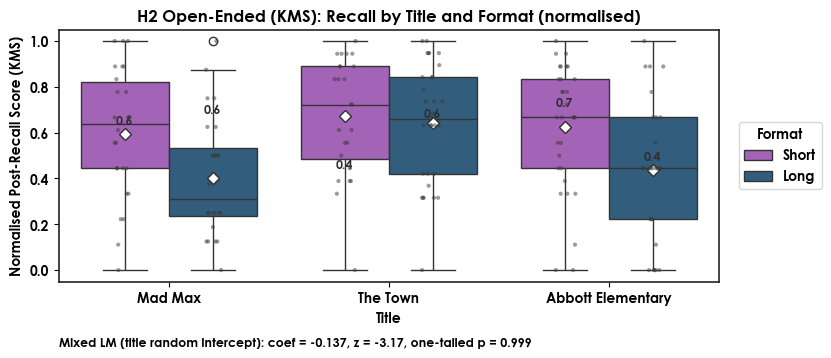

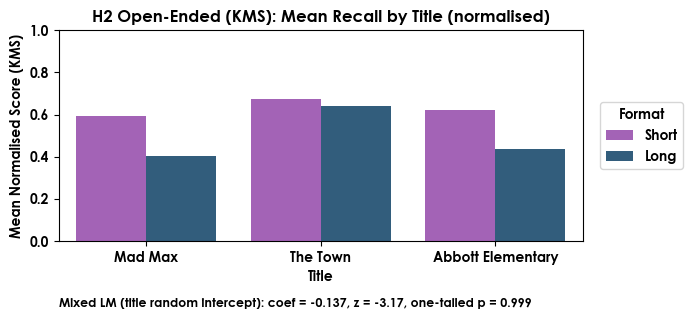

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

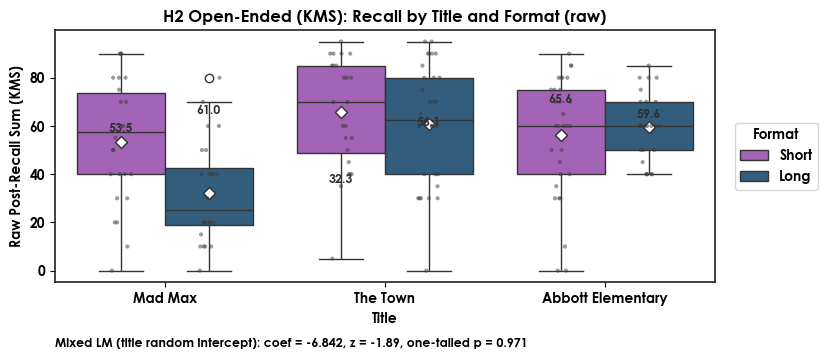

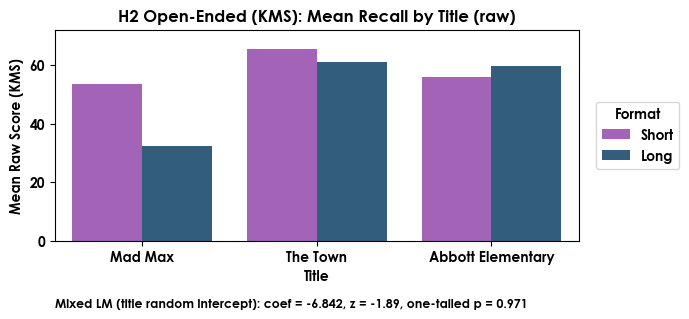

c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2054: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2245: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
c:\Users\ashra\Documents\NeuralSense\NeuralDat

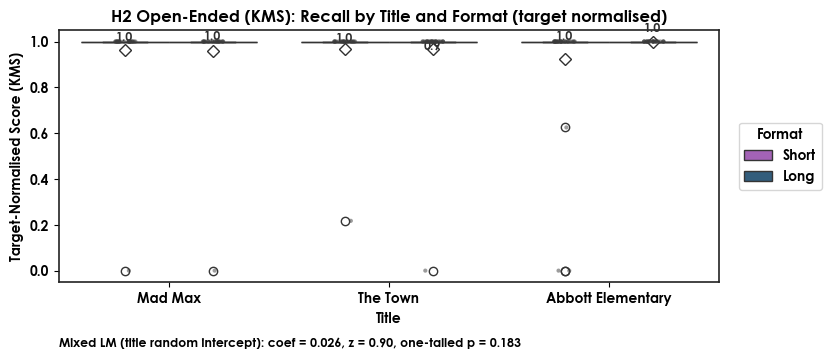

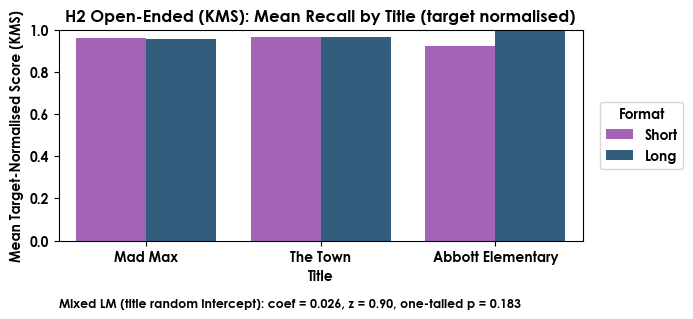

(               title   form  mean_normalised  std_normalised   n
 0  Abbott Elementary  Short         0.623656        0.276184  31
 1  Abbott Elementary   Long         0.436214        0.304954  27
 2            Mad Max  Short         0.594017        0.282305  26
 3            Mad Max   Long         0.403646        0.265791  24
 4           The Town  Short         0.673611        0.259708  24
 5           The Town   Long         0.642105        0.264570  30,
                                       metric  coef_form_long   z_value  \
 0        Post_Recall_OpenEndedKMS_Normalised       -0.136687 -3.169498   
 1               Post_Recall_OpenEndedKMS_Raw       -6.841937 -1.894581   
 2  Post_Recall_OpenEndedKMS_TargetNormalised        0.026238  0.904246   
 
    p_one_tailed  n_observations  titles_included  
 0      0.999236             162                3  
 1      0.970926             162                3  
 2      0.182933             162                3  )

In [105]:
palette = {"Short": COLOR_MAP["Short"], "Long": COLOR_MAP["Long"]}
open_recall_between_subject_summary_kms: list[dict[str, float]] = []

if "open_recall_long_kms" not in globals():
    raise ValueError(
        "Open recall long format KMS data not available; run the Part 1b preparation cell first.",
    )

subset_kms = open_recall_long_kms.loc[open_recall_long_kms["title"].isin(TARGET_TITLES)].copy()
subset_raw_kms = None
if "open_recall_long_raw_kms" in globals():
    subset_raw_kms = open_recall_long_raw_kms.loc[
        open_recall_long_raw_kms["title"].isin(TARGET_TITLES)
    ].copy()
subset_target_kms = None
if "open_recall_long_target_kms" in globals():
    subset_target_kms = open_recall_long_target_kms.loc[
        open_recall_long_target_kms["title"].isin(TARGET_TITLES)
    ].copy()

if subset_kms.empty:
    print(
        "No normalised open-ended recall KMS observations available for the specified target titles.",
    )
    open_recall_title_descriptives_kms = pd.DataFrame()
    open_recall_title_summary_kms = pd.DataFrame()
else:
    subset_kms["form"] = pd.Categorical(
        subset_kms["form"], categories=["Short", "Long"], ordered=True
    )
    subset_kms["form_long"] = (subset_kms["form"] == "Long").astype(int)
    coef_kms = se_kms = z_kms = p_one_kms = np.nan
    try:
        mixed_model_kms = smf.mixedlm(
            "value ~ form_long", data=subset_kms, groups=subset_kms["title"]
        )
        mixed_result_kms = mixed_model_kms.fit(reml=False, method="lbfgs", disp=False)
        coef_kms = mixed_result_kms.params.get("form_long", np.nan)
        se_kms = mixed_result_kms.bse.get("form_long", np.nan)
        z_kms = coef_kms / se_kms if np.isfinite(se_kms) and se_kms != 0 else np.nan
        p_one_kms = stats.norm.sf(z_kms) if np.isfinite(z_kms) else np.nan
    except Exception as exc:
        print(f"Mixed model (KMS) failed: {exc}")
    open_recall_between_subject_summary_kms.append({
        "metric": "Post_Recall_OpenEndedKMS_Normalised",
        "coef_form_long": coef_kms,
        "z_value": z_kms,
        "p_one_tailed": p_one_kms,
        "n_observations": subset_kms.shape[0],
        "titles_included": subset_kms["title"].nunique(),
    })

    fig_norm_kms, ax_norm_kms = plt.subplots(figsize=(8, 4))
    fig_norm_kms.subplots_adjust(bottom=0.24, right=0.78)
    sns.boxplot(
        data=subset_kms,
        x="title",
        y="value",
        hue="form",
        palette=palette,
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        ax=ax_norm_kms,
    )
    sns.stripplot(
        data=subset_kms,
        x="title",
        y="value",
        hue="form",
        palette={"Short": "#3a3a3a", "Long": "#3a3a3a"},
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        dodge=True,
        size=3,
        alpha=0.5,
        ax=ax_norm_kms,
        legend=False,
    )
    ax_norm_kms.set_xlabel("Title")
    ax_norm_kms.set_ylabel("Normalised Post-Recall Score (KMS)")
    ax_norm_kms.set_title("H2 Open-Ended (KMS): Recall by Title and Format (normalised)")
    annotation_norm_kms = (
        f"Mixed LM (title random intercept): coef = {coef_kms:.3f}, z = {z_kms:.2f}, one-tailed p = {p_one_kms:.3g}"
    )
    ax_norm_kms.text(
        0.0,
        -0.22,
        annotation_norm_kms,
        transform=ax_norm_kms.transAxes,
        ha="left",
        va="top",
        fontsize=9,
    )
    handles_norm_kms, labels_norm_kms = ax_norm_kms.get_legend_handles_labels()
    ax_norm_kms.legend(
        handles_norm_kms[:2],
        labels_norm_kms[:2],
        title="Format",
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
    )
    export_metadata_norm_kms = {
        "metric": "Post_Recall_OpenEndedKMS_Normalised",
        "coef_form_long": float(coef_kms) if np.isfinite(coef_kms) else np.nan,
        "z_value": float(z_kms) if np.isfinite(z_kms) else np.nan,
        "p_one_tailed": float(p_one_kms) if np.isfinite(p_one_kms) else np.nan,
        "n_observations": int(subset_kms.shape[0]),
        "n_titles": int(subset_kms["title"].nunique()),
    }
    _export_plot_bundle(
        section_label="Hypothesis 2 Open-Ended – Format and Recall",
        part_label="Title x Format (normalised)",
        title="H2 Open-Ended (KMS): Recall by Title and Format (normalised)",
        frames=[("data", subset_kms.copy())],
        metadata=export_metadata_norm_kms,
    )
    plt.show()

    bar_data_title_kms = (
        subset_kms.groupby(["title", "form"], observed=True)["value"]
        .mean()
        .reset_index(name="mean_value")
    )
    bar_data_title_kms = bar_data_title_kms.set_index(["title", "form"]).reindex(
        pd.MultiIndex.from_product(
            [TARGET_TITLES, ["Short", "Long"]], names=["title", "form"]
        )
    ).reset_index()

    fig_bar_norm_kms, ax_bar_norm_kms = plt.subplots(figsize=(8, 3.4))
    fig_bar_norm_kms.subplots_adjust(bottom=0.26, right=0.78)
    sns.barplot(
        data=bar_data_title_kms,
        x="title",
        y="mean_value",
        hue="form",
        palette=palette,
        order=TARGET_TITLES,
        hue_order=["Short", "Long"],
        ax=ax_bar_norm_kms,
    )
    ax_bar_norm_kms.set_ylim(0, 1.0)
    ax_bar_norm_kms.set_xlabel("Title")
    ax_bar_norm_kms.set_ylabel("Mean Normalised Score (KMS)")
    ax_bar_norm_kms.set_title("H2 Open-Ended (KMS): Mean Recall by Title (normalised)")
    ax_bar_norm_kms.text(
        0.0,
        -0.27,
        annotation_norm_kms,
        transform=ax_bar_norm_kms.transAxes,
        ha="left",
        va="top",
        fontsize=9,
    )
    ax_bar_norm_kms.legend(
        title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5)
    )
    _export_plot_bundle(
        section_label="Hypothesis 2 Open-Ended – Format and Recall",
        part_label="Mean title scores (normalised)",
        title="H2 Open-Ended (KMS): Mean Recall by Title (normalised)",
        frames=[("title_means", bar_data_title_kms.copy())],
        metadata=export_metadata_norm_kms,
    )
    plt.show()

    open_recall_title_descriptives_kms = (
        subset_kms.groupby(["title", "form"], observed=True)["value"]
        .agg(["mean", "std", "count"])
        .rename(
            columns={
                "mean": "mean_normalised",
                "std": "std_normalised",
                "count": "n",
            }
        )
        .reset_index()
    )

    if subset_raw_kms is not None and not subset_raw_kms.empty:
        subset_raw_kms["form"] = pd.Categorical(
            subset_raw_kms["form"], categories=["Short", "Long"], ordered=True
        )
        subset_raw_kms["form_long"] = (subset_raw_kms["form"] == "Long").astype(int)
        coef_raw_kms = se_raw_kms = z_raw_kms = p_one_raw_kms = np.nan
        try:
            mixed_model_raw_kms = smf.mixedlm(
                "value ~ form_long", data=subset_raw_kms, groups=subset_raw_kms["title"]
            )
            mixed_result_raw_kms = mixed_model_raw_kms.fit(reml=False, method="lbfgs", disp=False)
            coef_raw_kms = mixed_result_raw_kms.params.get("form_long", np.nan)
            se_raw_kms = mixed_result_raw_kms.bse.get("form_long", np.nan)
            z_raw_kms = (
                coef_raw_kms / se_raw_kms if np.isfinite(se_raw_kms) and se_raw_kms != 0 else np.nan
            )
            p_one_raw_kms = stats.norm.sf(z_raw_kms) if np.isfinite(z_raw_kms) else np.nan
        except Exception as exc:
            print(f"Mixed model (KMS raw values) failed: {exc}")
        open_recall_between_subject_summary_kms.append({
            "metric": "Post_Recall_OpenEndedKMS_Raw",
            "coef_form_long": coef_raw_kms,
            "z_value": z_raw_kms,
            "p_one_tailed": p_one_raw_kms,
            "n_observations": subset_raw_kms.shape[0],
            "titles_included": subset_raw_kms["title"].nunique(),
        })

        fig_raw_kms, ax_raw_kms = plt.subplots(figsize=(8, 4))
        fig_raw_kms.subplots_adjust(bottom=0.24, right=0.78)
        sns.boxplot(
            data=subset_raw_kms,
            x="title",
            y="value",
            hue="form",
            palette=palette,
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            ax=ax_raw_kms,
        )
        sns.stripplot(
            data=subset_raw_kms,
            x="title",
            y="value",
            hue="form",
            palette={"Short": "#3a3a3a", "Long": "#3a3a3a"},
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            dodge=True,
            size=3,
            alpha=0.5,
            ax=ax_raw_kms,
            legend=False,
        )
        ax_raw_kms.set_xlabel("Title")
        ax_raw_kms.set_ylabel("Raw Post-Recall Sum (KMS)")
        ax_raw_kms.set_title("H2 Open-Ended (KMS): Recall by Title and Format (raw)")
        annotation_raw_kms = (
            f"Mixed LM (title random intercept): coef = {coef_raw_kms:.3f}, z = {z_raw_kms:.2f}, one-tailed p = {p_one_raw_kms:.3g}"
        )
        ax_raw_kms.text(
            0.0,
            -0.22,
            annotation_raw_kms,
            transform=ax_raw_kms.transAxes,
            ha="left",
            va="top",
            fontsize=9,
        )
        handles_raw_kms, labels_raw_kms = ax_raw_kms.get_legend_handles_labels()
        ax_raw_kms.legend(
            handles_raw_kms[:2],
            labels_raw_kms[:2],
            title="Format",
            loc="center left",
            bbox_to_anchor=(1.02, 0.5),
        )
        export_metadata_raw_kms = {
            "metric": "Post_Recall_OpenEndedKMS_Raw",
            "coef_form_long": float(coef_raw_kms) if np.isfinite(coef_raw_kms) else np.nan,
            "z_value": float(z_raw_kms) if np.isfinite(z_raw_kms) else np.nan,
            "p_one_tailed": float(p_one_raw_kms) if np.isfinite(p_one_raw_kms) else np.nan,
            "n_observations": int(subset_raw_kms.shape[0]),
            "n_titles": int(subset_raw_kms["title"].nunique()),
        }
        _export_plot_bundle(
            section_label="Hypothesis 2 Open-Ended – Format and Recall",
            part_label="Title x Format (raw)",
            title="H2 Open-Ended (KMS): Recall by Title and Format (raw)",
            frames=[("data", subset_raw_kms.copy())],
            metadata=export_metadata_raw_kms,
        )
        plt.show()

        bar_data_title_raw_kms = (
            subset_raw_kms.groupby(["title", "form"], observed=True)["value"]
            .mean()
            .reset_index(name="mean_value")
        )
        bar_data_title_raw_kms = bar_data_title_raw_kms.set_index(["title", "form"]).reindex(
            pd.MultiIndex.from_product(
                [TARGET_TITLES, ["Short", "Long"]], names=["title", "form"]
            )
        ).reset_index()

        fig_bar_raw_kms, ax_bar_raw_kms = plt.subplots(figsize=(8, 3.4))
        fig_bar_raw_kms.subplots_adjust(bottom=0.26, right=0.78)
        sns.barplot(
            data=bar_data_title_raw_kms,
            x="title",
            y="mean_value",
            hue="form",
            palette=palette,
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            ax=ax_bar_raw_kms,
        )
        upper_raw_kms = bar_data_title_raw_kms["mean_value"].max()
        raw_ylim_top_kms = (
            upper_raw_kms * 1.1
            if isinstance(upper_raw_kms, Number) and np.isfinite(upper_raw_kms) and upper_raw_kms > 0
            else 1.0
        )
        ax_bar_raw_kms.set_ylim(0, raw_ylim_top_kms)
        ax_bar_raw_kms.set_xlabel("Title")
        ax_bar_raw_kms.set_ylabel("Mean Raw Score (KMS)")
        ax_bar_raw_kms.set_title("H2 Open-Ended (KMS): Mean Recall by Title (raw)")
        ax_bar_raw_kms.text(
            0.0,
            -0.27,
            annotation_raw_kms,
            transform=ax_bar_raw_kms.transAxes,
            ha="left",
            va="top",
            fontsize=9,
        )
        ax_bar_raw_kms.legend(
            title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5)
        )
        _export_plot_bundle(
            section_label="Hypothesis 2 Open-Ended – Format and Recall",
            part_label="Mean title scores (raw)",
            title="H2 Open-Ended (KMS): Mean Recall by Title (raw)",
            frames=[("title_means", bar_data_title_raw_kms.copy())],
            metadata=export_metadata_raw_kms,
        )
        plt.show()

    if subset_target_kms is not None and not subset_target_kms.empty:
        subset_target_kms["form"] = pd.Categorical(
            subset_target_kms["form"], categories=["Short", "Long"], ordered=True
        )
        subset_target_kms["form_long"] = (subset_target_kms["form"] == "Long").astype(int)
        coef_target_kms = se_target_kms = z_target_kms = p_one_target_kms = np.nan
        try:
            mixed_model_target_kms = smf.mixedlm(
                "value ~ form_long", data=subset_target_kms, groups=subset_target_kms["title"]
            )
            mixed_result_target_kms = mixed_model_target_kms.fit(reml=False, method="lbfgs", disp=False)
            coef_target_kms = mixed_result_target_kms.params.get("form_long", np.nan)
            se_target_kms = mixed_result_target_kms.bse.get("form_long", np.nan)
            z_target_kms = (
                coef_target_kms / se_target_kms
                if np.isfinite(se_target_kms) and se_target_kms != 0
                else np.nan
            )
            p_one_target_kms = stats.norm.sf(z_target_kms) if np.isfinite(z_target_kms) else np.nan
        except Exception as exc:
            print(f"Mixed model (KMS target normalised) failed: {exc}")
        open_recall_between_subject_summary_kms.append({
            "metric": "Post_Recall_OpenEndedKMS_TargetNormalised",
            "coef_form_long": coef_target_kms,
            "z_value": z_target_kms,
            "p_one_tailed": p_one_target_kms,
            "n_observations": subset_target_kms.shape[0],
            "titles_included": subset_target_kms["title"].nunique(),
        })

        fig_target_kms, ax_target_kms = plt.subplots(figsize=(8, 4))
        fig_target_kms.subplots_adjust(bottom=0.24, right=0.78)
        sns.boxplot(
            data=subset_target_kms,
            x="title",
            y="value",
            hue="form",
            palette=palette,
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            ax=ax_target_kms,
        )
        sns.stripplot(
            data=subset_target_kms,
            x="title",
            y="value",
            hue="form",
            palette={"Short": "#3a3a3a", "Long": "#3a3a3a"},
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            dodge=True,
            size=3,
            alpha=0.5,
            ax=ax_target_kms,
            legend=False,
        )
        ax_target_kms.set_xlabel("Title")
        ax_target_kms.set_ylabel("Target-Normalised Score (KMS)")
        ax_target_kms.set_title("H2 Open-Ended (KMS): Recall by Title and Format (target normalised)")
        annotation_target_kms = (
            f"Mixed LM (title random intercept): coef = {coef_target_kms:.3f}, z = {z_target_kms:.2f}, one-tailed p = {p_one_target_kms:.3g}"
        )
        ax_target_kms.text(
            0.0,
            -0.22,
            annotation_target_kms,
            transform=ax_target_kms.transAxes,
            ha="left",
            va="top",
            fontsize=9,
        )
        handles_target_kms, labels_target_kms = ax_target_kms.get_legend_handles_labels()
        ax_target_kms.legend(
            handles_target_kms[:2],
            labels_target_kms[:2],
            title="Format",
            loc="center left",
            bbox_to_anchor=(1.02, 0.5),
        )
        export_metadata_target_kms = {
            "metric": "Post_Recall_OpenEndedKMS_TargetNormalised",
            "coef_form_long": float(coef_target_kms) if np.isfinite(coef_target_kms) else np.nan,
            "z_value": float(z_target_kms) if np.isfinite(z_target_kms) else np.nan,
            "p_one_tailed": float(p_one_target_kms) if np.isfinite(p_one_target_kms) else np.nan,
            "n_observations": int(subset_target_kms.shape[0]),
            "n_titles": int(subset_target_kms["title"].nunique()),
        }
        _export_plot_bundle(
            section_label="Hypothesis 2 Open-Ended – Format and Recall",
            part_label="Title x Format (target normalised)",
            title="H2 Open-Ended (KMS): Recall by Title and Format (target normalised)",
            frames=[("data", subset_target_kms.copy())],
            metadata=export_metadata_target_kms,
        )
        plt.show()

        bar_data_title_target_kms = (
            subset_target_kms.groupby(["title", "form"], observed=True)["value"]
            .mean()
            .reset_index(name="mean_value")
        )
        bar_data_title_target_kms = bar_data_title_target_kms.set_index(["title", "form"]).reindex(
            pd.MultiIndex.from_product(
                [TARGET_TITLES, ["Short", "Long"]], names=["title", "form"]
            )
        ).reset_index()

        fig_bar_target_kms, ax_bar_target_kms = plt.subplots(figsize=(8, 3.4))
        fig_bar_target_kms.subplots_adjust(bottom=0.26, right=0.78)
        sns.barplot(
            data=bar_data_title_target_kms,
            x="title",
            y="mean_value",
            hue="form",
            palette=palette,
            order=TARGET_TITLES,
            hue_order=["Short", "Long"],
            ax=ax_bar_target_kms,
        )
        ax_bar_target_kms.set_ylim(0, 1.0)
        ax_bar_target_kms.set_xlabel("Title")
        ax_bar_target_kms.set_ylabel("Mean Target-Normalised Score (KMS)")
        ax_bar_target_kms.set_title(
            "H2 Open-Ended (KMS): Mean Recall by Title (target normalised)"
        )
        ax_bar_target_kms.text(
            0.0,
            -0.27,
            annotation_target_kms,
            transform=ax_bar_target_kms.transAxes,
            ha="left",
            va="top",
            fontsize=9,
        )
        ax_bar_target_kms.legend(
            title="Format", loc="center left", bbox_to_anchor=(1.02, 0.5)
        )
        _export_plot_bundle(
            section_label="Hypothesis 2 Open-Ended – Format and Recall",
            part_label="Mean title scores (target normalised)",
            title="H2 Open-Ended (KMS): Mean Recall by Title (target normalised)",
            frames=[("title_means", bar_data_title_target_kms.copy())],
            metadata=export_metadata_target_kms,
        )
        plt.show()

    open_recall_title_summary_kms = pd.DataFrame(open_recall_between_subject_summary_kms)
open_recall_title_descriptives_kms, open_recall_title_summary_kms

#### Part 2a Title Summaries
Per-title comparisons using the open-ended recall metrics, structured to mirror the Key Moment Scoring summary that follows.

In [106]:
summary_lookup = (
    pd.DataFrame(open_recall_between_subject_summary)
    if "open_recall_between_subject_summary" in globals()
    else pd.DataFrame()
)

open_recall_part2_summary = pd.DataFrame()
open_recall_part2_summary_raw = pd.DataFrame()
open_recall_part2_summary_target = pd.DataFrame()

metric_configs = [
    {
        "data_var": "open_recall_long",
        "label_suffix": "Open-ended (normalised)",
        "overall_label": "H2 Part 2a (Overall Open-ended normalised)",
        "metric_key": "Post_Recall_OpenEnded_Normalised",
        "output_var": "open_recall_part2_summary",
        "table_format": "percent",
        "missing_msg": "H2 Part 2a summary: open_recall_long not available.",
        "empty_msg": "H2 Part 2a summary: No title-level open-ended normalised data available.",
        "decimals": 0,
    },
    {
        "data_var": "open_recall_long_raw",
        "label_suffix": "Open-ended (raw)",
        "overall_label": "H2 Part 2a (Overall Open-ended raw)",
        "metric_key": "Post_Recall_OpenEnded_Raw",
        "output_var": "open_recall_part2_summary_raw",
        "table_format": "raw",
        "missing_msg": "H2 Part 2a summary: open_recall_long_raw not available.",
        "empty_msg": "H2 Part 2a summary: No title-level open-ended raw data available.",
        "decimals": 0,
    },
    {
        "data_var": "open_recall_long_target",
        "label_suffix": "Open-ended (target normalised)",
        "overall_label": "H2 Part 2a (Overall Open-ended target normalised)",
        "metric_key": "Post_Recall_OpenEnded_TargetNormalised",
        "output_var": "open_recall_part2_summary_target",
        "table_format": "percent",
        "missing_msg": "H2 Part 2a summary: open_recall_long_target not available.",
        "empty_msg": "H2 Part 2a summary: No title-level open-ended target-normalised data available.",
        "decimals": 0,
    },
]

for config in metric_configs:
    data_df = globals().get(config["data_var"])
    if data_df is None:
        print(config["missing_msg"])
        globals()[config["output_var"]] = pd.DataFrame()
        continue

    subset_df = data_df.loc[data_df["title"].isin(TARGET_TITLES)].copy()
    if subset_df.empty:
        print(config["empty_msg"])
        globals()[config["output_var"]] = pd.DataFrame()
        continue

    title_rows = []
    for title in TARGET_TITLES:
        title_df = subset_df.loc[subset_df["title"] == title]
        if title_df.empty:
            continue
        long_vals = title_df.loc[title_df["form"] == "Long", "value"].dropna()
        short_vals = title_df.loc[title_df["form"] == "Short", "value"].dropna()
        if long_vals.empty or short_vals.empty:
            continue
        long_mean = long_vals.mean()
        short_mean = short_vals.mean()
        diff = long_mean - short_mean
        t_stat, p_two = stats.ttest_ind(long_vals, short_vals, equal_var=False, nan_policy="omit")
        if np.isnan(t_stat) or np.isnan(p_two):
            p_one = np.nan
        else:
            p_one = p_two / 2 if t_stat >= 0 else 1 - (p_two / 2)
        title_rows.append(
            {
                "Title": title,
                "Long mean": long_mean,
                "Short mean": short_mean,
                "Difference": diff,
                "p (one-tailed, title)": p_one,
                "n Long": int(long_vals.count()),
                "n Short": int(short_vals.count()),
            }
        )

    if not title_rows:
        print(config["empty_msg"])
        globals()[config["output_var"]] = pd.DataFrame()
        continue

    summary_df = pd.DataFrame(title_rows)
    globals()[config["output_var"]] = summary_df

    if config["table_format"] == "percent":
        display(
            to_percent_table(
                summary_df,
                ["Long mean", "Short mean", "Difference"],
                decimals=1,
            )
        )
    elif config["table_format"] == "raw":
        display(summary_df.round(1))

    overall_p = np.nan
    if not summary_lookup.empty and "metric" in summary_lookup.columns:
        match = summary_lookup.loc[
            summary_lookup["metric"] == config["metric_key"], "p_one_tailed"
        ]
        if not match.empty:
            overall_p = match.iloc[0]

    export_columns = [col for col in [id_column, "title", "form", "value"] if col in subset_df.columns]
    export_frames = [("title_summary", summary_df.copy())]
    if export_columns:
        export_frames.append((
            "title_level_records",
            subset_df[export_columns].reset_index(drop=True).copy(),
        ))
    export_metadata = {
        "metric": config["metric_key"],
        "label_suffix": config["label_suffix"],
        "table_format": config["table_format"],
        "overall_p_one_tailed": float(overall_p)
        if isinstance(overall_p, Number) and np.isfinite(overall_p)
        else np.nan,
        "n_titles": int(summary_df["Title"].nunique()),
        "n_long_values": int(
            subset_df.loc[subset_df["form"] == "Long", "value"].notna().sum()
        ),
        "n_short_values": int(
            subset_df.loc[subset_df["form"] == "Short", "value"].notna().sum()
        ),
    }
    _export_plot_bundle(
        section_label="Hypothesis 2 Open-Ended – Format and Recall",
        part_label=f"Part 2a – {config['label_suffix']}",
        title=f"H2 Part 2a Title Summary – {config['label_suffix']}",
        frames=export_frames,
        metadata=export_metadata,
        filename_suffix=config["metric_key"],
    )

    for _, row in summary_df.iterrows():
        p_title = row.get("p (one-tailed, title)")
        p_note = (
            format_p_value(p_title)
            if isinstance(p_title, Number) and np.isfinite(p_title)
            else None
        )
        sample_note = f"n_long={row['n Long']}, n_short={row['n Short']}"
        overall_note = (
            f"overall mixed-model {format_p_value(overall_p)}"
            if isinstance(overall_p, Number) and np.isfinite(overall_p)
            else None
        )
        extra_parts = [p_note, sample_note, overall_note]
        extra = ", ".join(part for part in extra_parts if part)
        print_long_short_summary(
            label=f"H2 Part 2a – {row['Title']} ({config['label_suffix']})",
            long_mean=row["Long mean"],
            short_mean=row["Short mean"],
            extra_note=extra,
            decimals=config.get("decimals", 0),
        )

    combined_long = summary_df["Long mean"].mean()
    combined_short = summary_df["Short mean"].mean()
    overall_counts = {
        "n_long": int(subset_df.loc[subset_df["form"] == "Long", "value"].notna().sum()),
        "n_short": int(subset_df.loc[subset_df["form"] == "Short", "value"].notna().sum()),
    }
    overall_sample_note = (
        f"n_long={overall_counts['n_long']}, n_short={overall_counts['n_short']}"
    )
    overall_extra_parts = [
        format_p_value(overall_p)
        if isinstance(overall_p, Number) and np.isfinite(overall_p)
        else None,
        overall_sample_note,
    ]
    overall_extra = ", ".join(part for part in overall_extra_parts if part)
    print_long_short_summary(
        label=config["overall_label"],
        long_mean=combined_long,
        short_mean=combined_short,
        extra_note=overall_extra,
        decimals=config.get("decimals", 0),
    )

Title Long mean Short mean Difference  p (one-tailed, title)  \
0            Mad Max     49.5%      56.3%      -6.9%               0.790898   
1           The Town     65.6%      67.3%      -1.7%               0.596051   
2  Abbott Elementary     49.3%      60.5%     -11.3%               0.945816   

   n Long  n Short  
0      16       26  
1      26       22  
2      23       31

H2 Part 2a – Mad Max (Open-ended (normalised)): Long form (49%) showed 7% lower than short form (56%) (p=0.791, n_long=16, n_short=26, overall mixed-model p=0.948).
H2 Part 2a – The Town (Open-ended (normalised)): Long form (66%) showed 2% lower than short form (67%) (p=0.596, n_long=26, n_short=22, overall mixed-model p=0.948).
H2 Part 2a – Abbott Elementary (Open-ended (normalised)): Long form (49%) showed 11% lower than short form (61%) (p=0.946, n_long=23, n_short=31, overall mixed-model p=0.948).
H2 Part 2a (Overall Open-ended normalised): Long form (55%) showed 7% lower than short form (61%) (p=0.948, n_long=65, n_short=79).


Title  Long mean  Short mean  Difference  \
0            Mad Max       44.7        47.9        -3.2   
1           The Town       52.5        58.9        -6.4   
2  Abbott Elementary       57.2        51.5         5.7   

   p (one-tailed, title)  n Long  n Short  
0                    0.7      16       26  
1                    0.9      26       22  
2                    0.1      23       31

H2 Part 2a – Mad Max (Open-ended (raw)): Long form (4469%) showed 320% lower than short form (4788%) (p=0.706, n_long=16, n_short=26, overall mixed-model p=0.556).
H2 Part 2a – The Town (Open-ended (raw)): Long form (5250%) showed 636% lower than short form (5886%) (p=0.870, n_long=26, n_short=22, overall mixed-model p=0.556).
H2 Part 2a – Abbott Elementary (Open-ended (raw)): Long form (5717%) showed 572% greater than short form (5145%) (p=0.108, n_long=23, n_short=31, overall mixed-model p=0.556).
H2 Part 2a (Overall Open-ended raw): Long form (5145%) showed 128% lower than short form (5273%) (p=0.556, n_long=65, n_short=79).


c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Title Long mean Short mean Difference  p (one-tailed, title)  \
0            Mad Max    100.0%      96.2%       3.8%               0.163446   
1           The Town     96.2%      96.4%      -0.3%               0.521864   
2  Abbott Elementary    100.0%      94.4%       5.6%               0.061936   

   n Long  n Short  
0      16       26  
1      26       22  
2      23       31

H2 Part 2a – Mad Max (Open-ended (target normalised)): Long form (100%) showed 4% greater than short form (96%) (p=0.163, n_long=16, n_short=26, overall mixed-model p=0.125).
H2 Part 2a – The Town (Open-ended (target normalised)): Long form (96%) showed 0% lower than short form (96%) (p=0.522, n_long=26, n_short=22, overall mixed-model p=0.125).
H2 Part 2a – Abbott Elementary (Open-ended (target normalised)): Long form (100%) showed 6% greater than short form (94%) (p=0.062, n_long=23, n_short=31, overall mixed-model p=0.125).
H2 Part 2a (Overall Open-ended target normalised): Long form (99%) showed 3% greater than short form (96%) (p=0.125, n_long=65, n_short=79).


#### Part 2b Title Summaries (KMS)
Per-title comparisons using the Key Moment Scoring variant mirror the open-ended workflow to highlight any long-form advantage when recall is measured on the KMS scale.

In [107]:
summary_lookup_kms = (
    pd.DataFrame(open_recall_between_subject_summary_kms)
    if "open_recall_between_subject_summary_kms" in globals()
    else pd.DataFrame()
)

open_recall_part2_summary_kms = pd.DataFrame()
open_recall_part2_summary_kms_raw = pd.DataFrame()
open_recall_part2_summary_kms_target = pd.DataFrame()

metric_configs_kms = [
    {
        "data_var": "open_recall_long_kms",
        "label_suffix": "Open-ended KMS (normalised)",
        "overall_label": "H2 Part 2b (Overall Open-ended KMS normalised)",
        "metric_key": "Post_Recall_OpenEndedKMS_Normalised",
        "output_var": "open_recall_part2_summary_kms",
        "table_format": "percent",
        "missing_msg": "H2 Part 2b summary: open_recall_long_kms not available.",
        "empty_msg": "H2 Part 2b summary: No title-level open-ended KMS normalised data available.",
        "decimals": 0,
    },
    {
        "data_var": "open_recall_long_raw_kms",
        "label_suffix": "Open-ended KMS (raw)",
        "overall_label": "H2 Part 2b (Overall Open-ended KMS raw)",
        "metric_key": "Post_Recall_OpenEndedKMS_Raw",
        "output_var": "open_recall_part2_summary_kms_raw",
        "table_format": "raw",
        "missing_msg": "H2 Part 2b summary: open_recall_long_raw_kms not available.",
        "empty_msg": "H2 Part 2b summary: No title-level open-ended KMS raw data available.",
        "decimals": 0,
    },
    {
        "data_var": "open_recall_long_target_kms",
        "label_suffix": "Open-ended KMS (target normalised)",
        "overall_label": "H2 Part 2b (Overall Open-ended KMS target normalised)",
        "metric_key": "Post_Recall_OpenEndedKMS_TargetNormalised",
        "output_var": "open_recall_part2_summary_kms_target",
        "table_format": "percent",
        "missing_msg": "H2 Part 2b summary: open_recall_long_target_kms not available.",
        "empty_msg": "H2 Part 2b summary: No title-level open-ended KMS target-normalised data available.",
        "decimals": 0,
    },
]

for config in metric_configs_kms:
    data_df = globals().get(config["data_var"])
    if data_df is None:
        print(config["missing_msg"])
        globals()[config["output_var"]] = pd.DataFrame()
        continue

    subset_df = data_df.loc[data_df["title"].isin(TARGET_TITLES)].copy()
    if subset_df.empty:
        print(config["empty_msg"])
        globals()[config["output_var"]] = pd.DataFrame()
        continue

    title_rows = []
    for title in TARGET_TITLES:
        title_df = subset_df.loc[subset_df["title"] == title]
        if title_df.empty:
            continue
        long_vals = title_df.loc[title_df["form"] == "Long", "value"].dropna()
        short_vals = title_df.loc[title_df["form"] == "Short", "value"].dropna()
        if long_vals.empty or short_vals.empty:
            continue
        long_mean = long_vals.mean()
        short_mean = short_vals.mean()
        diff = long_mean - short_mean
        t_stat, p_two = stats.ttest_ind(long_vals, short_vals, equal_var=False, nan_policy="omit")
        if np.isnan(t_stat) or np.isnan(p_two):
            p_one = np.nan
        else:
            p_one = p_two / 2 if t_stat >= 0 else 1 - (p_two / 2)
        title_rows.append(
            {
                "Title": title,
                "Long mean": long_mean,
                "Short mean": short_mean,
                "Difference": diff,
                "p (one-tailed, title)": p_one,
                "n Long": int(long_vals.count()),
                "n Short": int(short_vals.count()),
            }
        )

    if not title_rows:
        print(config["empty_msg"])
        globals()[config["output_var"]] = pd.DataFrame()
        continue

    summary_df = pd.DataFrame(title_rows)
    globals()[config["output_var"]] = summary_df

    if config["table_format"] == "percent":
        display(
            to_percent_table(
                summary_df,
                ["Long mean", "Short mean", "Difference"],
                decimals=1,
            )
        )
    elif config["table_format"] == "raw":
        display(summary_df.round(1))

    overall_p = np.nan
    if not summary_lookup_kms.empty and "metric" in summary_lookup_kms.columns:
        match = summary_lookup_kms.loc[
            summary_lookup_kms["metric"] == config["metric_key"], "p_one_tailed"
        ]
        if not match.empty:
            overall_p = match.iloc[0]

    export_columns = [col for col in [id_column, "title", "form", "value"] if col in subset_df.columns]
    export_frames = [("title_summary", summary_df.copy())]
    if export_columns:
        export_frames.append((
            "title_level_records",
            subset_df[export_columns].reset_index(drop=True).copy(),
        ))
    export_metadata = {
        "metric": config["metric_key"],
        "label_suffix": config["label_suffix"],
        "table_format": config["table_format"],
        "overall_p_one_tailed": float(overall_p)
        if isinstance(overall_p, Number) and np.isfinite(overall_p)
        else np.nan,
        "n_titles": int(summary_df["Title"].nunique()),
        "n_long_values": int(
            subset_df.loc[subset_df["form"] == "Long", "value"].notna().sum()
        ),
        "n_short_values": int(
            subset_df.loc[subset_df["form"] == "Short", "value"].notna().sum()
        ),
    }
    _export_plot_bundle(
        section_label="Hypothesis 2 Open-Ended – Format and Recall",
        part_label=f"Part 2b – {config['label_suffix']}",
        title=f"H2 Part 2b Title Summary – {config['label_suffix']}",
        frames=export_frames,
        metadata=export_metadata,
        filename_suffix=config["metric_key"],
    )

    for _, row in summary_df.iterrows():
        p_title = row.get("p (one-tailed, title)")
        p_note = (
            format_p_value(p_title)
            if isinstance(p_title, Number) and np.isfinite(p_title)
            else None
        )
        sample_note = f"n_long={row['n Long']}, n_short={row['n Short']}"
        overall_note = (
            f"overall mixed-model {format_p_value(overall_p)}"
            if isinstance(overall_p, Number) and np.isfinite(overall_p)
            else None
        )
        extra_parts = [p_note, sample_note, overall_note]
        extra = ", ".join(part for part in extra_parts if part)
        print_long_short_summary(
            label=f"H2 Part 2b – {row['Title']} ({config['label_suffix']})",
            long_mean=row["Long mean"],
            short_mean=row["Short mean"],
            extra_note=extra,
            decimals=config.get("decimals", 0),
        )

    combined_long = summary_df["Long mean"].mean()
    combined_short = summary_df["Short mean"].mean()
    overall_counts = {
        "n_long": int(subset_df.loc[subset_df["form"] == "Long", "value"].notna().sum()),
        "n_short": int(subset_df.loc[subset_df["form"] == "Short", "value"].notna().sum()),
    }
    overall_sample_note = (
        f"n_long={overall_counts['n_long']}, n_short={overall_counts['n_short']}"
    )
    overall_extra_parts = [
        format_p_value(overall_p)
        if isinstance(overall_p, Number) and np.isfinite(overall_p)
        else None,
        overall_sample_note,
    ]
    overall_extra = ", ".join(part for part in overall_extra_parts if part)
    print_long_short_summary(
        label=config["overall_label"],
        long_mean=combined_long,
        short_mean=combined_short,
        extra_note=overall_extra,
        decimals=config.get("decimals", 0),
    )

Title Long mean Short mean Difference  p (one-tailed, title)  \
0            Mad Max     40.4%      59.4%     -19.0%               0.991137   
1           The Town     64.2%      67.4%      -3.2%               0.668827   
2  Abbott Elementary     43.6%      62.4%     -18.7%               0.990950   

   n Long  n Short  
0      24       26  
1      30       24  
2      27       31

H2 Part 2b – Mad Max (Open-ended KMS (normalised)): Long form (40%) showed 19% lower than short form (59%) (p=0.991, n_long=24, n_short=26, overall mixed-model p=0.999).
H2 Part 2b – The Town (Open-ended KMS (normalised)): Long form (64%) showed 3% lower than short form (67%) (p=0.669, n_long=30, n_short=24, overall mixed-model p=0.999).
H2 Part 2b – Abbott Elementary (Open-ended KMS (normalised)): Long form (44%) showed 19% lower than short form (62%) (p=0.991, n_long=27, n_short=31, overall mixed-model p=0.999).
H2 Part 2b (Overall Open-ended KMS normalised): Long form (49%) showed 14% lower than short form (63%) (p=0.999, n_long=81, n_short=81).


Title  Long mean  Short mean  Difference  \
0            Mad Max       32.3        53.5       -21.2   
1           The Town       61.0        65.6        -4.6   
2  Abbott Elementary       59.6        56.1         3.5   

   p (one-tailed, title)  n Long  n Short  
0                    1.0      24       26  
1                    0.8      30       24  
2                    0.3      27       31

H2 Part 2b – Mad Max (Open-ended KMS (raw)): Long form (3229%) showed 2117% lower than short form (5346%) (p=0.999, n_long=24, n_short=26, overall mixed-model p=0.971).
H2 Part 2b – The Town (Open-ended KMS (raw)): Long form (6100%) showed 462% lower than short form (6562%) (p=0.756, n_long=30, n_short=24, overall mixed-model p=0.971).
H2 Part 2b – Abbott Elementary (Open-ended KMS (raw)): Long form (5963%) showed 350% greater than short form (5613%) (p=0.252, n_long=27, n_short=31, overall mixed-model p=0.971).
H2 Part 2b (Overall Open-ended KMS raw): Long form (5097%) showed 743% lower than short form (5841%) (p=0.971, n_long=81, n_short=81).


c:\Users\ashra\Documents\NeuralSense\NeuralData\clients\544_WBD_CXCU\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Title Long mean Short mean Difference  p (one-tailed, title)  \
0            Mad Max     95.8%      96.2%      -0.3%               0.522419   
1           The Town     96.7%      96.7%      -0.1%               0.506169   
2  Abbott Elementary    100.0%      92.3%       7.7%               0.052720   

   n Long  n Short  
0      24       26  
1      30       24  
2      27       31

H2 Part 2b – Mad Max (Open-ended KMS (target normalised)): Long form (96%) showed 0% lower than short form (96%) (p=0.522, n_long=24, n_short=26, overall mixed-model p=0.183).
H2 Part 2b – The Town (Open-ended KMS (target normalised)): Long form (97%) showed 0% lower than short form (97%) (p=0.506, n_long=30, n_short=24, overall mixed-model p=0.183).
H2 Part 2b – Abbott Elementary (Open-ended KMS (target normalised)): Long form (100%) showed 8% greater than short form (92%) (p=0.053, n_long=27, n_short=31, overall mixed-model p=0.183).
H2 Part 2b (Overall Open-ended KMS target normalised): Long form (98%) showed 2% greater than short form (95%) (p=0.183, n_long=81, n_short=81).


## Hypothesis 3 – Familiarity and Enjoyment
We extend the workflow to test whether higher title familiarity predicts stronger enjoyment responses. Familiarity is sourced from the screening C1 scores, normalised onto a 0–1 scale so that titles and formats share a comparable envelope. Enjoyment uses the normalized, polarity-corrected composite built in H1.

In [108]:
FAMILIARITY_METRIC = "Screening_Familiarity_C1"
ENJOYMENT_METRIC = "EnjoymentComposite_NormalizedCorrected"
fam_pattern = re.compile(rf"^(Long|Short)_(.+?)_{re.escape(FAMILIARITY_METRIC)}$")
fam_frames = []
for column in uv.columns:
    match = fam_pattern.match(column)
    if not match:
        continue
    form, title_token = match.groups()
    title_clean = title_token.replace("_", " ").strip()
    frame = (
        uv[[id_column, column]]
        .rename(columns={column: "familiarity_raw"})
        .assign(form=form, title=title_clean)
    )
    fam_frames.append(frame)
if not fam_frames:
    raise ValueError("No familiarity columns matching the expected Screening_C1 pattern were found in uv_merged.csv.")
familiarity_long = (
    pd.concat(fam_frames, ignore_index=True)
    .dropna(subset=["familiarity_raw"])
)
familiarity_long[id_column] = familiarity_long[id_column].astype(str)
familiarity_long["form"] = pd.Categorical(familiarity_long["form"], categories=["Short", "Long"], ordered=True)
familiarity_min = familiarity_long["familiarity_raw"].min()
familiarity_max = familiarity_long["familiarity_raw"].max()
if not np.isfinite(familiarity_min) or not np.isfinite(familiarity_max):
    raise ValueError("Familiarity scores contain non-finite values and cannot be normalised.")
if np.isclose(familiarity_max, familiarity_min):
    raise ValueError("Familiarity scores have zero variance; min-max normalisation is undefined.")
familiarity_range = familiarity_max - familiarity_min
familiarity_long["familiarity_norm"] = (
    (familiarity_long["familiarity_raw"] - familiarity_min) / familiarity_range
).clip(0.0, 1.0)
enjoyment_metric_df = enjoyment_long.loc[enjoyment_long["metric"] == ENJOYMENT_METRIC].copy()
if enjoyment_metric_df.empty:
    raise ValueError("Enjoyment composite for H3 (NormalisedCorrected) is unavailable in enjoyment_long.")
enjoyment_metric_df = enjoyment_metric_df.rename(columns={"value": "enjoyment_norm"})
h3_base = (
    familiarity_long.merge(
        enjoyment_metric_df[[id_column, "form", "title", "enjoyment_norm"]],
        on=[id_column, "form", "title"],
        how="inner",
    )
    .dropna(subset=["familiarity_norm", "enjoyment_norm"])
)
h3_base["title"] = h3_base["title"].astype(str)
h3_base_summary = h3_base.groupby(["form", "title"], observed=True).size().rename("records").reset_index()
h3_base_summary.head()

form              title  records
0  Short  Abbott Elementary       30
1  Short            Mad Max       26
2  Short           The Town       26
3   Long  Abbott Elementary       30
4   Long            Mad Max       23

### Part 1: Overall Familiarity–Enjoyment Association
We pool all formats and titles to quantify the overall link between normalised familiarity and enjoyment. The analysis reports the Pearson correlation alongside a scatterplot with a fitted trend line.

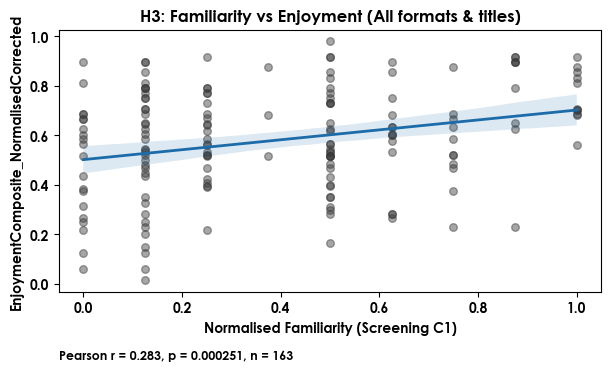

group  pearson_r   p_value    n
0  All formats and titles    0.28309  0.000251  163

In [109]:
if h3_base.empty:
    raise ValueError("No overlapping familiarity and enjoyment records available for H3 analysis.")
overall_df = h3_base.copy()
if overall_df["familiarity_norm"].nunique() < 2 or overall_df["enjoyment_norm"].nunique() < 2:
    raise ValueError("Familiarity or enjoyment lacks sufficient variance for correlation analysis in Part 1.")
r_val, p_val = stats.pearsonr(overall_df["familiarity_norm"], overall_df["enjoyment_norm"])
fig, ax = plt.subplots(figsize=(6.5, 4.3))
fig.subplots_adjust(bottom=0.27, right=0.96)
sns.regplot(
    data=overall_df,
    x="familiarity_norm",
    y="enjoyment_norm",
    scatter_kws={"alpha": 0.45, "s": 30, "color": "#3a3a3a"},
    line_kws={"color": "#1b6ca8", "linewidth": 2},
    ax=ax,
)
ax.set_xlabel("Normalised Familiarity (Screening C1)")
ax.set_ylabel("EnjoymentComposite_NormalisedCorrected")
ax.set_title("H3: Familiarity vs Enjoyment (All formats & titles)")
annotation = f"Pearson r = {r_val:.3f}, p = {p_val:.3g}, n = {overall_df.shape[0]}"
ax.text(0.0, -0.22, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
plt.show()
part1_summary = pd.DataFrame([
    {
        "group": "All formats and titles",
        "pearson_r": r_val,
        "p_value": p_val,
        "n": overall_df.shape[0],
    }
])
part1_summary

In [110]:
if 'overall_df' in globals():
    h3_part1_table = pd.DataFrame([
        {
            "Pearson r": r_val if 'r_val' in globals() else np.nan,
            "p-value": p_val if 'p_val' in globals() else np.nan,
            "n": overall_df.shape[0],
        }
    ])
    h3_part1_table["p-value"] = h3_part1_table["p-value"].apply(format_p_value)
    display(h3_part1_table)
    long_mean = overall_df.loc[overall_df["form"] == "Long", "enjoyment_norm"].mean()
    short_mean = overall_df.loc[overall_df["form"] == "Short", "enjoyment_norm"].mean()
    extra_items = []
    if 'r_val' in globals() and isinstance(r_val, Number) and np.isfinite(r_val):
        extra_items.append(f"Pearson r={r_val:.3f}")
    if 'p_val' in globals() and isinstance(p_val, Number) and np.isfinite(p_val):
        extra_items.append(format_p_value(p_val))
    extra_items.append(f"n={overall_df.shape[0]}")
    extra_note = ", ".join(extra_items)
    print_long_short_summary(
        label="H3 Part 1 (All formats)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("H3 Part 1 summary: overall_df not available.")

Pearson r  p-value    n
0    0.28309  p<0.001  163

H3 Part 1 (All formats): Long form (68%) showed 20% greater than short form (48%) (Pearson r=0.283, p<0.001, n=163).


### Part 2: Correlations by Format
Correlations are recomputed separately for Long and Short formats while keeping all titles in play. Points and trend lines share the same axis so format differences are immediately visible.

(  format  pearson_r   p_value   n
 0  Short   0.395004  0.000240  82
 1   Long   0.240916  0.030268  81,
   format     slope                          test   p_value
 0  Short  0.214511  Interaction slope difference  0.617293
 1   Long  0.166810  Interaction slope difference  0.617293,
                             sum_sq     df          F        PR(>F)
 C(form)                   1.513175    1.0  45.031659  3.233752e-10
 familiarity_norm          0.530931    1.0  15.800359  1.065590e-04
 familiarity_norm:C(form)  0.008423    1.0   0.250674  6.172932e-01
 Residual                  5.342795  159.0        NaN           NaN)

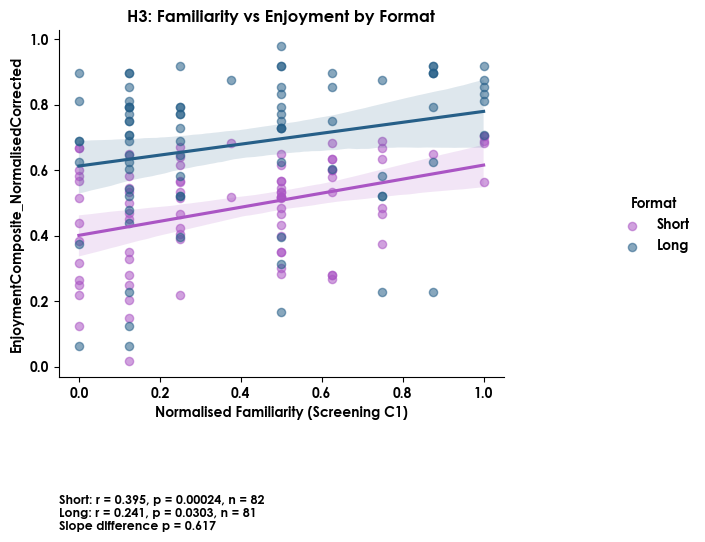

In [111]:
from statsmodels.stats.anova import anova_lm
format_palette = {"Short": COLOR_MAP.get("Short", "#aa55c4"), "Long": COLOR_MAP.get("Long", "#265f88")}
format_summaries = []
for form, subset in overall_df.groupby("form", observed=True):
    subset = subset.dropna(subset=["familiarity_norm", "enjoyment_norm"])
    if subset.shape[0] < 3 or subset["familiarity_norm"].nunique() < 2 or subset["enjoyment_norm"].nunique() < 2:
        r_form = np.nan
        p_form = np.nan
    else:
        r_form, p_form = stats.pearsonr(subset["familiarity_norm"], subset["enjoyment_norm"])
    format_summaries.append({
        "format": form,
        "pearson_r": r_form,
        "p_value": p_form,
        "n": subset.shape[0],
    })
format_model = smf.ols("enjoyment_norm ~ familiarity_norm * C(form)", data=overall_df).fit()
format_anova = anova_lm(format_model, typ=2)
baseline_slope = format_model.params.get("familiarity_norm", np.nan)
interaction_term = "familiarity_norm:C(form)[T.Long]"
interaction_coef = format_model.params.get(interaction_term, np.nan)
long_slope = baseline_slope + interaction_coef if np.isfinite(baseline_slope) and np.isfinite(interaction_coef) else np.nan
format_slope_table = pd.DataFrame([
    {
        "format": "Short",
        "slope": baseline_slope,
    },
    {
        "format": "Long",
        "slope": long_slope,
    },
]).assign(test="Interaction slope difference", p_value=format_model.pvalues.get(interaction_term, np.nan))
format_plot = sns.lmplot(
    data=overall_df,
    x="familiarity_norm",
    y="enjoyment_norm",
    hue="form",
    palette=format_palette,
    scatter_kws={"alpha": 0.55, "s": 35},
    height=4.2,
    aspect=1.25,
    legend=False,
)
format_plot.ax.set_xlabel("Normalised Familiarity (Screening C1)")
format_plot.ax.set_ylabel("EnjoymentComposite_NormalisedCorrected")
format_plot.ax.set_title("H3: Familiarity vs Enjoyment by Format")
annotation_lines = [
    "{}: r = {}, p = {}, n = {}".format(
        row["format"],
        _fmt_stat(row["pearson_r"], "{:.3f}"),
        _fmt_stat(row["p_value"], "{:.3g}"),
        row["n"],
    )
    for row in format_summaries
]
interaction_text = f"Slope difference p = {_fmt_stat(format_model.pvalues.get(interaction_term, np.nan), '{:.3g}')}"
annotation_lines.append(interaction_text)
format_plot.ax.text(0.0, -0.34, "\n".join(annotation_lines), transform=format_plot.ax.transAxes, ha="left", va="top", fontsize=9)
format_plot.add_legend(title="Format", bbox_to_anchor=(1.02, 0.5), loc="center left")
format_summary = pd.DataFrame(format_summaries)
format_summary, format_slope_table, format_anova

In [112]:
if 'format_summary' in globals():
    formatted_summary = format_summary.copy()
    formatted_summary["pearson_r"] = formatted_summary["pearson_r"].round(3)
    formatted_summary["p_value"] = formatted_summary["p_value"].apply(format_p_value)
    display(formatted_summary.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    interaction_note = None
    if 'format_model' in globals():
        interaction_term = "familiarity_norm:C(form)[T.Long]"
        interaction_p = format_model.pvalues.get(interaction_term, np.nan)
        if np.isfinite(interaction_p):
            interaction_note = f"Slope diff {format_p_value(interaction_p)}"
    long_mean = overall_df.loc[overall_df["form"] == "Long", "enjoyment_norm"].mean() if 'overall_df' in globals() else np.nan
    short_mean = overall_df.loc[overall_df["form"] == "Short", "enjoyment_norm"].mean() if 'overall_df' in globals() else np.nan
    sample_items = []
    if not format_summary.empty:
        long_row = format_summary.loc[format_summary["format"] == "Long", "n"]
        short_row = format_summary.loc[format_summary["format"] == "Short", "n"]
        if not long_row.empty and isinstance(long_row.iloc[0], Number) and np.isfinite(long_row.iloc[0]):
            sample_items.append(f"n_long={int(long_row.iloc[0])}")
        if not short_row.empty and isinstance(short_row.iloc[0], Number) and np.isfinite(short_row.iloc[0]):
            sample_items.append(f"n_short={int(short_row.iloc[0])}")
    if interaction_note:
        sample_items.append(interaction_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="H3 Part 2 (By format)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("H3 Part 2 summary: format_summary not available.")

format  Pearson r  p-value   n
0  Short      0.395  p<0.001  82
1   Long      0.241  p=0.030  81

H3 Part 2 (By format): Long form (68%) showed 20% greater than short form (48%) (n_long=81, n_short=82, Slope diff p=0.617).


### Part 3: Correlations by Title
Finally we focus on the target titles, pooling formats while colour-coding titles on a single axis. This highlights whether familiarity–enjoyment alignment differs across narratives.

(               title  pearson_r   p_value   n
 0  Abbott Elementary   0.519397  0.000021  60
 1            Mad Max   0.099954  0.494398  49
 2           The Town   0.273469  0.045405  54,
                title     slope                        test   p_value
 0  Abbott Elementary  0.338173              Baseline slope       NaN
 1            Mad Max  0.088798  Slope vs Abbott Elementary  0.066999
 2           The Town  0.156930  Slope vs Abbott Elementary  0.118677,
                                                       sum_sq     df  \
 C(title, Treatment(reference='Abbott Elementary'))  0.866051    2.0   
 familiarity_norm                                    0.804055    1.0   
 familiarity_norm:C(title, Treatment(reference='...  0.165417    2.0   
 Residual                                            5.832925  157.0   
 
                                                             F    PR(>F)  
 C(title, Treatment(reference='Abbott Elementary'))  11.655386  0.000019  
 familiarity_norm 

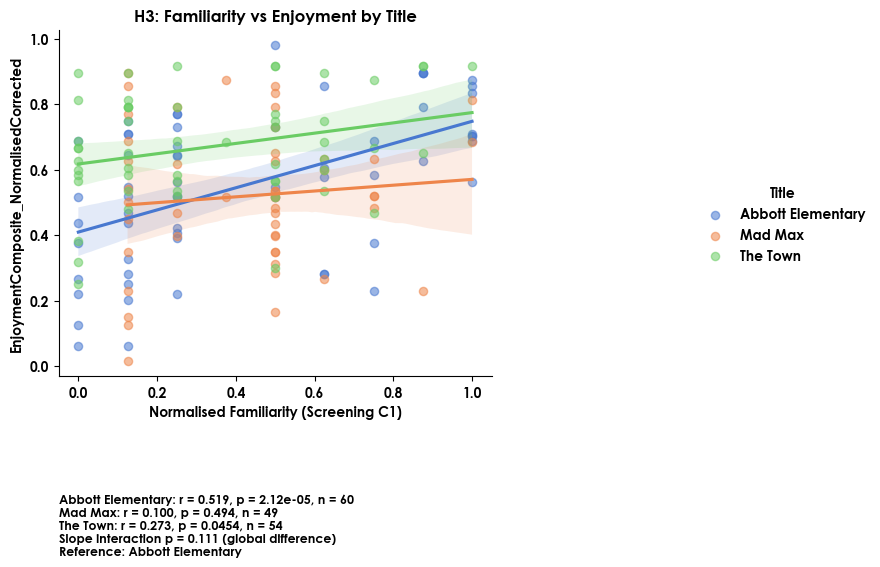

In [113]:
from statsmodels.stats.anova import anova_lm
title_subset = h3_base.loc[h3_base["title"].isin(TARGET_TITLES)].copy()
if title_subset.empty:
    print("No familiarity/enjoyment overlap for the specified target titles; skipping Part 3 plot.")
    title_summary = pd.DataFrame()
    title_slope_table = pd.DataFrame()
    title_anova = pd.DataFrame()
else:
    unique_titles = sorted(title_subset["title"].unique())
    reference_title = unique_titles[0]
    title_palette = dict(zip(unique_titles, sns.color_palette("muted", n_colors=len(unique_titles))))
    title_summaries = []
    for title_name, subset in title_subset.groupby("title", observed=True):
        subset = subset.dropna(subset=["familiarity_norm", "enjoyment_norm"])
        if subset.shape[0] < 3 or subset["familiarity_norm"].nunique() < 2 or subset["enjoyment_norm"].nunique() < 2:
            r_title = np.nan
            p_title = np.nan
        else:
            r_title, p_title = stats.pearsonr(subset["familiarity_norm"], subset["enjoyment_norm"])
        title_summaries.append({
            "title": title_name,
            "pearson_r": r_title,
            "p_value": p_title,
            "n": subset.shape[0],
        })
    title_model = smf.ols(
        f"enjoyment_norm ~ familiarity_norm * C(title, Treatment(reference='{reference_title}'))",
        data=title_subset,
    ).fit()
    title_anova = anova_lm(title_model, typ=2)
    slope_entries = []
    base_slope = title_model.params.get("familiarity_norm", np.nan)
    slope_entries.append({
        "title": reference_title,
        "slope": base_slope,
        "test": "Baseline slope",
        "p_value": np.nan,
    })
    for other in unique_titles[1:]:
        param_name = f"familiarity_norm:C(title, Treatment(reference='{reference_title}'))[T.{other}]"
        interaction_coef = title_model.params.get(param_name, np.nan)
        slope_val = base_slope + interaction_coef if np.isfinite(base_slope) and np.isfinite(interaction_coef) else np.nan
        slope_entries.append({
            "title": other,
            "slope": slope_val,
            "test": f"Slope vs {reference_title}",
            "p_value": title_model.pvalues.get(param_name, np.nan),
        })
    interaction_rows = [idx for idx in title_anova.index if idx.startswith("familiarity_norm:C(title, Treatment(")]
    interaction_p = title_anova.loc[interaction_rows[0], "PR(>F)"] if interaction_rows else np.nan
    title_slope_table = pd.DataFrame(slope_entries)
    title_plot = sns.lmplot(
        data=title_subset,
        x="familiarity_norm",
        y="enjoyment_norm",
        hue="title",
        palette=title_palette,
        scatter_kws={"alpha": 0.55, "s": 35},
        height=4.2,
        aspect=1.25,
        legend=False,
)
    title_plot.ax.set_xlabel("Normalised Familiarity (Screening C1)")
    title_plot.ax.set_ylabel("EnjoymentComposite_NormalisedCorrected")
    title_plot.ax.set_title("H3: Familiarity vs Enjoyment by Title")
    annotation_lines = [
        "{}: r = {}, p = {}, n = {}".format(
            row["title"],
            _fmt_stat(row["pearson_r"], "{:.3f}"),
            _fmt_stat(row["p_value"], "{:.3g}"),
            row["n"],
        )
        for row in title_summaries
]
    annotation_lines.append(
        f"Slope interaction p = {_fmt_stat(interaction_p, '{:.3g}')} (global difference)\nReference: {reference_title}"
    )
    title_plot.ax.text(0.0, -0.34, "\n".join(annotation_lines), transform=title_plot.ax.transAxes, ha="left", va="top", fontsize=9)
    title_plot.add_legend(title="Title", bbox_to_anchor=(1.02, 0.5), loc="center left")
    title_summary = pd.DataFrame(title_summaries)
title_summary, title_slope_table, title_anova

In [114]:
if 'title_summary' in globals() and not title_summary.empty:
    formatted_title_summary = title_summary.copy()
    formatted_title_summary["pearson_r"] = formatted_title_summary["pearson_r"].round(3)
    formatted_title_summary["p_value"] = formatted_title_summary["p_value"].apply(format_p_value)
    display(formatted_title_summary.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    interaction_note = None
    if 'title_anova' in globals() and not title_anova.empty:
        interaction_rows = [idx for idx in title_anova.index if idx.startswith("familiarity_norm:C(")]
        if interaction_rows:
            interaction_note = f"Global slope diff {format_p_value(title_anova.loc[interaction_rows[0], 'PR(>F)'])}"
    note_parts = []
    if not title_summary.empty:
        top_positive_idx = title_summary['pearson_r'].idxmax()
        top_positive = title_summary.loc[top_positive_idx]
        note_parts.append(
            f"Strongest positive correlation: {top_positive['title']} (r={top_positive['pearson_r']:.3f}, n={int(top_positive['n'])})"
        )
        significant_titles = title_summary.loc[title_summary['p_value'] < 0.05, 'title'].tolist()
        if significant_titles:
            note_parts.append(
                "Significant titles: " + ", ".join(significant_titles)
            )
    if interaction_note:
        note_parts.append(interaction_note)
    else:
        note_parts.append("Global slope diff unavailable")
    print("H3 Part 3 (By title): " + "; ".join(note_parts))
else:
    print("H3 Part 3 summary: title-level correlation results unavailable.")

title  Pearson r  p-value   n
0  Abbott Elementary      0.519  p<0.001  60
1            Mad Max      0.100  p=0.494  49
2           The Town      0.273  p=0.045  54

H3 Part 3 (By title): Strongest positive correlation: Abbott Elementary (r=0.519, n=60); Significant titles: Abbott Elementary, The Town; Global slope diff p=0.111


### Part 4: Title-Level Format Comparison
We summarise how familiarity links to enjoyment within each title by plotting the Pearson correlations for Long and Short formats side-by-side. Bars encode the correlation coefficients, bar-level annotations flag significant slopes, and a curly-brace callout highlights whether the Long–Short slopes differ significantly. Significance codes: `**` for p ≤ 0.001, `*` for 0.001 < p ≤ 0.05.

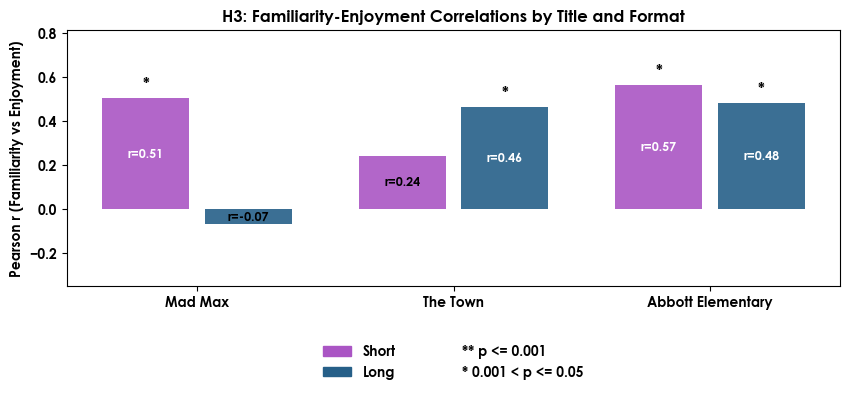

In [115]:
title_corr_records = []
title_diff_records = []
for title_name, title_df in h3_base.groupby("title", observed=True):
    for form_name, form_df in title_df.groupby("form", observed=True):
        form_df = form_df.dropna(subset=["familiarity_norm", "enjoyment_norm"])
        if form_df.shape[0] < 3 or form_df["familiarity_norm"].nunique() < 2 or form_df["enjoyment_norm"].nunique() < 2:
            r_val = np.nan
            p_val = np.nan
        else:
            r_val, p_val = stats.pearsonr(form_df["familiarity_norm"], form_df["enjoyment_norm"])
        title_corr_records.append({
            "title": title_name,
            "form": form_name,
            "pearson_r": r_val,
            "p_value": p_val,
            "n": form_df.shape[0],
        })
    if title_df["form"].nunique() >= 2:
        diff_model = smf.ols("enjoyment_norm ~ familiarity_norm * C(form)", data=title_df).fit()
        interaction_name = "familiarity_norm:C(form)[T.Long]"
        diff_p = diff_model.pvalues.get(interaction_name, np.nan)
    else:
        diff_p = np.nan
    title_diff_records.append({
        "title": title_name,
        "delta_p_value": diff_p,
    })
title_corr_df = pd.DataFrame(title_corr_records)
title_diff_df = pd.DataFrame(title_diff_records)
if title_corr_df.empty:
    print("H3 Part 4: No familiarity/enjoyment data available for the title-format comparison plot.")
else:
    title_order = [t for t in TARGET_TITLES if t in title_corr_df["title"].unique()] or sorted(title_corr_df["title"].unique())
    form_order = ["Short", "Long"]
    bar_width = 0.34
    x_positions = np.arange(len(title_order))
    fig, ax = plt.subplots(figsize=(8.6, 4.6))
    max_bar_height = 0.0
    min_bar_height = 0.0
    for title_idx, title_name in enumerate(title_order):
        title_subset = title_corr_df.loc[title_corr_df["title"] == title_name]
        local_max = 0.0
        local_min = 0.0
        for offset_idx, form_name in enumerate(form_order):
            form_row = title_subset.loc[title_subset["form"] == form_name]
            if form_row.empty:
                continue
            r_val = form_row["pearson_r"].iloc[0]
            p_val = form_row["p_value"].iloc[0]
            if not np.isfinite(r_val):
                continue
            bar_x = x_positions[title_idx] + (offset_idx - 0.5) * (bar_width + 0.06)
            color = COLOR_MAP.get(form_name, COLOR_MAP.get("Default", "#1f77b4"))
            ax.bar(bar_x, r_val, width=bar_width, color=color, alpha=0.9)
            local_max = max(local_max, r_val, 0.0)
            local_min = min(local_min, r_val, 0.0)
            annotation_label = significance_label(p_val)
            if annotation_label:
                text_offset = 0.035 if r_val >= 0 else -0.05
                va = "bottom" if r_val >= 0 else "top"
                ax.text(bar_x, r_val + text_offset, annotation_label, ha="center", va=va, fontsize=11, fontweight="bold")
            bar_text_color = "white" if r_val >= 0.25 else "black"
            text_y = r_val / 2 if r_val != 0 else 0.015
            ax.text(bar_x, text_y, f"r={r_val:.2f}", ha="center", va="center", color=bar_text_color, fontsize=9)
        max_bar_height = max(max_bar_height, local_max)
        min_bar_height = min(min_bar_height, local_min)
        diff_row = title_diff_df.loc[title_diff_df["title"] == title_name]
        if not diff_row.empty:
            diff_p = diff_row["delta_p_value"].iloc[0]
            diff_label = significance_label(diff_p)
            if diff_label:
                x_center = x_positions[title_idx]
                half_span = (bar_width + 0.06) / 2
                bracket_height = local_max + 0.18
                ax.plot(
                    [x_center - half_span, x_center - half_span, x_center + half_span, x_center + half_span],
                    [bracket_height - 0.05, bracket_height, bracket_height, bracket_height - 0.05],
                    color="#2f2f2f",
                    linewidth=1.4,
                )
                ax.text(x_center, bracket_height + 0.02, diff_label, ha="center", va="bottom", fontsize=11, fontweight="bold")
    ax.set_xticks(x_positions)
    ax.set_xticklabels(title_order)
    ax.set_ylabel("Pearson r (Familiarity vs Enjoyment)")
    ax.set_title("H3: Familiarity-Enjoyment Correlations by Title and Format")
    lower_bound = min(-0.35, min_bar_height - 0.18)
    upper_bound = max(0.1, max_bar_height + 0.25)
    ax.set_ylim(lower_bound, upper_bound)
    format_handles = [
        patches.Patch(color=COLOR_MAP.get(form_name, COLOR_MAP.get("Default", "#1f77b4")), label=form_name)
        for form_name in form_order
        if form_name in title_corr_df["form"].unique()
    ]
    sign_handles = [
        plt.Line2D([], [], color="black", marker="", linestyle="None", markersize=11, label="** p <= 0.001"),
        plt.Line2D([], [], color="black", marker="", linestyle="None", markersize=11, label="* 0.001 < p <= 0.05"),
    ]
    legend_handles = format_handles + sign_handles
    ax.legend(
        legend_handles,
        [handle.get_label() for handle in legend_handles],
        loc="upper center",
        bbox_to_anchor=(0.5, -0.18),
        ncol=2,
        frameon=False,
    )
    plt.tight_layout(rect=(0, 0.08, 1, 1))
    plt.show()
    title_corr_df = title_corr_df.sort_values(["title", "form"]).reset_index(drop=True)
    title_diff_df = title_diff_df.sort_values("title").reset_index(drop=True)
    title_corr_df, title_diff_df

In [116]:
if 'title_corr_df' in globals() and not title_corr_df.empty:
    display_df = title_corr_df.copy()
    display_df["pearson_r"] = display_df["pearson_r"].round(3)
    display_df["p_value"] = display_df["p_value"].apply(format_p_value)
    display(display_df.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    long_mean = h3_base.loc[(h3_base["form"] == "Long") & (h3_base["title"].isin(TARGET_TITLES)), "enjoyment_norm"].mean() if 'h3_base' in globals() else np.nan
    short_mean = h3_base.loc[(h3_base["form"] == "Short") & (h3_base["title"].isin(TARGET_TITLES)), "enjoyment_norm"].mean() if 'h3_base' in globals() else np.nan
    interaction_note = None
    if 'title_diff_df' in globals() and not title_diff_df.empty:
        best_row = title_diff_df.loc[title_diff_df['delta_p_value'].idxmin()]
        interaction_note = f"Form slope diff {format_p_value(best_row['delta_p_value'])}"
    sample_items = []
    if 'h3_base' in globals():
        long_count = h3_base.loc[(h3_base["form"] == "Long") & (h3_base["title"].isin(TARGET_TITLES)), id_column].nunique()
        short_count = h3_base.loc[(h3_base["form"] == "Short") & (h3_base["title"].isin(TARGET_TITLES)), id_column].nunique()
        if long_count:
            sample_items.append(f"n_long={int(long_count)}")
        if short_count:
            sample_items.append(f"n_short={int(short_count)}")
    if interaction_note:
        sample_items.append(interaction_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="H3 Part 4 (Title-format comparison)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("H3 Part 4 summary: title correlation table unavailable.")

title   form  Pearson r  p-value   n
0  Abbott Elementary   Long      0.484  p=0.007  30
1  Abbott Elementary  Short      0.566  p=0.001  30
2            Mad Max   Long     -0.067  p=0.762  23
3            Mad Max  Short      0.505  p=0.008  26
4           The Town   Long      0.463  p=0.013  28
5           The Town  Short      0.243  p=0.231  26

H3 Part 4 (Title-format comparison): Long form (68%) showed 20% greater than short form (48%) (n_long=81, n_short=82, Form slope diff p=0.091).


In [117]:
# Export Hypothesis 3 artefacts for Excel bundles
h3_section_label = "Hypothesis 3 - Familiarity and Enjoyment"
if "part1_summary" in globals() and not part1_summary.empty and "overall_df" in globals():
    record_cols = [col for col in [id_column, "form", "title", "familiarity_norm", "enjoyment_norm"] if col in overall_df.columns]
    frames = [("part1_summary", part1_summary.copy())]
    if record_cols:
        frames.append(("overall_records", overall_df[record_cols].reset_index(drop=True).copy()))
    metadata = {"n_records": int(overall_df.shape[0])}
    if "pearson_r" in part1_summary.columns and not part1_summary["pearson_r"].empty:
        r_value = part1_summary["pearson_r"].iloc[0]
        metadata["pearson_r"] = float(r_value) if isinstance(r_value, Number) and np.isfinite(r_value) else np.nan
    if "p_value" in part1_summary.columns and not part1_summary["p_value"].empty:
        p_value = part1_summary["p_value"].iloc[0]
        metadata["p_value"] = float(p_value) if isinstance(p_value, Number) and np.isfinite(p_value) else np.nan
    _export_plot_bundle(
        section_label=h3_section_label,
        part_label="Part 1 - Overall association",
        title="H3: Familiarity vs Enjoyment (All formats)",
        frames=frames,
        metadata=metadata,
        filename_suffix="h3_part1_overall",
    )
else:
    print("H3 Part 1 export skipped: required tables unavailable.")

if (
    "format_summary" in globals()
    and not format_summary.empty
    and "format_slope_table" in globals()
    and "format_anova" in globals()
    and "overall_df" in globals()
 ):
    record_cols = [col for col in [id_column, "form", "title", "familiarity_norm", "enjoyment_norm"] if col in overall_df.columns]
    frames = [
        ("format_summary", format_summary.copy()),
        ("format_slope_table", format_slope_table.copy()),
        ("format_anova", format_anova.copy()),
    ]
    if record_cols:
        frames.append(("format_records", overall_df[record_cols].reset_index(drop=True).copy()))
    interaction_term = "familiarity_norm:C(form)[T.Long]"
    interaction_p = np.nan
    if "format_model" in globals():
        interaction_p = format_model.pvalues.get(interaction_term, np.nan)
    metadata = {
        "interaction_term": interaction_term,
        "interaction_p_value": float(interaction_p) if isinstance(interaction_p, Number) and np.isfinite(interaction_p) else np.nan,
        "n_records": int(overall_df.shape[0]),
    }
    _export_plot_bundle(
        section_label=h3_section_label,
        part_label="Part 2 - Format comparison",
        title="H3: Familiarity vs Enjoyment by Format",
        frames=frames,
        metadata=metadata,
        filename_suffix="h3_part2_format",
    )
else:
    print("H3 Part 2 export skipped: required tables unavailable.")

if (
    "title_summary" in globals()
    and not title_summary.empty
    and "title_slope_table" in globals()
    and "title_anova" in globals()
 ):
    frames = [
        ("title_summary", title_summary.copy()),
        ("title_slope_table", title_slope_table.copy()),
        ("title_anova", title_anova.copy()),
    ]
    if "title_subset" in globals() and not title_subset.empty:
        cols = [col for col in [id_column, "form", "title", "familiarity_norm", "enjoyment_norm"] if col in title_subset.columns]
        if cols:
            frames.append(("title_subset_records", title_subset[cols].reset_index(drop=True).copy()))
    interaction_rows = [idx for idx in title_anova.index if isinstance(idx, str) and idx.startswith("familiarity_norm:C(")]
    interaction_p = title_anova.loc[interaction_rows[0], "PR(>F)"] if interaction_rows else np.nan
    metadata = {
        "reference_title": reference_title if "reference_title" in globals() else None,
        "interaction_p_value": float(interaction_p) if isinstance(interaction_p, Number) and np.isfinite(interaction_p) else np.nan,
        "n_titles": int(title_summary["title"].nunique()),
    }
    _export_plot_bundle(
        section_label=h3_section_label,
        part_label="Part 3 - Title comparison",
        title="H3: Familiarity vs Enjoyment by Title",
        frames=frames,
        metadata=metadata,
        filename_suffix="h3_part3_title",
    )
else:
    print("H3 Part 3 export skipped: required tables unavailable.")

if (
    "title_corr_df" in globals() and not title_corr_df.empty
    and "title_diff_df" in globals() and not title_diff_df.empty
 ):
    frames = [
        ("title_format_correlations", title_corr_df.copy()),
        ("title_format_differences", title_diff_df.copy()),
    ]
    metadata = {
        "n_titles": int(title_corr_df["title"].nunique()),
        "forms": sorted(title_corr_df["form"].unique()),
    }
    if not title_diff_df["delta_p_value"].isna().all():
        best_diff = title_diff_df.loc[title_diff_df["delta_p_value"].idxmin()]
        metadata["strongest_format_effect_title"] = best_diff.get("title")
        diff_p = best_diff.get("delta_p_value")
        metadata["strongest_format_effect_p"] = float(diff_p) if isinstance(diff_p, Number) and np.isfinite(diff_p) else np.nan
    _export_plot_bundle(
        section_label=h3_section_label,
        part_label="Part 4 - Title x Format correlations",
        title="H3: Familiarity-Enjoyment Correlations by Title and Format",
        frames=frames,
        metadata=metadata,
        filename_suffix="h3_part4_title_format",
    )
else:
    print("H3 Part 4 export skipped: required tables unavailable.")

## Hypothesis 4 - Familiarity and Recall
We pair the normalised screening familiarity scores from H3 with the Stage 3 post-recognition key composite to test whether familiarity predicts recall performance.

In [118]:
if "recognition_long" not in globals():
    raise ValueError("Recognition outputs from H2 are unavailable; run the H2 cells before starting H4.")
recall_metric_df = recognition_long.rename(columns={"value": "recall_norm"}).copy()
if recall_metric_df.empty:
    raise ValueError("recognition_long is empty; cannot evaluate familiarity/recall links.")
recall_metric_df[id_column] = recall_metric_df[id_column].astype(str)
h4_base = (
    familiarity_long.merge(
        recall_metric_df[[id_column, "form", "title", "recall_norm"]],
        on=[id_column, "form", "title"],
        how="inner",
    )
    .dropna(subset=["familiarity_norm", "recall_norm"])
)
if h4_base.empty:
    raise ValueError("No overlapping familiarity and recall records available for H4 analysis.")
h4_base_summary = h4_base.groupby(["form", "title"], observed=True).size().rename("records").reset_index()
h4_base_summary.head()

form              title  records
0  Short  Abbott Elementary       30
1  Short            Mad Max       24
2  Short           The Town       24
3   Long  Abbott Elementary       27
4   Long            Mad Max       24

### Part 1: Overall Familiarity-Recall Association
All titles and formats are pooled to gauge the aggregate relationship between normalised familiarity and the key recall composite.

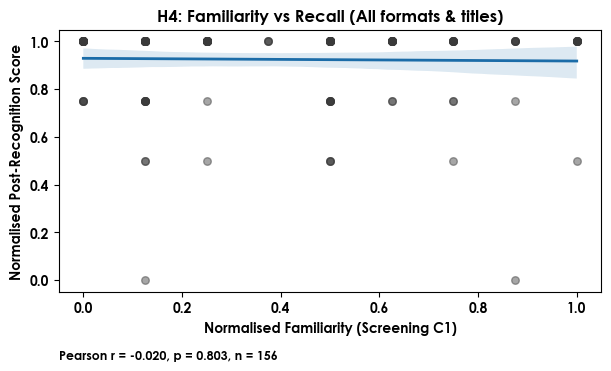

group  pearson_r   p_value    n
0  All formats and titles  -0.020094  0.803377  156

In [119]:
overall_h4 = h4_base.copy()
if overall_h4["familiarity_norm"].nunique() < 2 or overall_h4["recall_norm"].nunique() < 2:
    raise ValueError("Familiarity or recall lacks sufficient variance for correlation analysis in Part 1.")
r_val, p_val = stats.pearsonr(overall_h4["familiarity_norm"], overall_h4["recall_norm"])
fig, ax = plt.subplots(figsize=(6.5, 4.3))
fig.subplots_adjust(bottom=0.27, right=0.96)
sns.regplot(
    data=overall_h4,
    x="familiarity_norm",
    y="recall_norm",
    scatter_kws={"alpha": 0.45, "s": 30, "color": "#3a3a3a"},
    line_kws={"color": "#1b6ca8", "linewidth": 2},
    ax=ax,
)
ax.set_xlabel("Normalised Familiarity (Screening C1)")
ax.set_ylabel("Normalised Post-Recognition Score")
ax.set_title("H4: Familiarity vs Recall (All formats & titles)")
annotation = f"Pearson r = {r_val:.3f}, p = {p_val:.3g}, n = {overall_h4.shape[0]}"
ax.text(0.0, -0.22, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
plt.show()
part1_h4_summary = pd.DataFrame([
    {
        "group": "All formats and titles",
        "pearson_r": r_val,
        "p_value": p_val,
        "n": overall_h4.shape[0],
    }
])
part1_h4_summary

### Part 2: Correlations by Format
Format-specific correlations and slopes highlight whether the familiarity-recall link differs between Short and Long presentations.

(  format  pearson_r   p_value   n
 0  Short   0.080276  0.484762  78
 1   Long  -0.149643  0.190993  78,
   format     slope                          test  p_value
 0  Short  0.052731  Interaction slope difference  0.18023
 1   Long -0.070057  Interaction slope difference  0.18023,
                             sum_sq     df         F    PR(>F)
 C(form)                   0.032796    1.0  1.116555  0.292338
 familiarity_norm          0.002182    1.0  0.074293  0.785555
 familiarity_norm:C(form)  0.053233    1.0  1.812357  0.180230
 Residual                  4.464616  152.0       NaN       NaN)

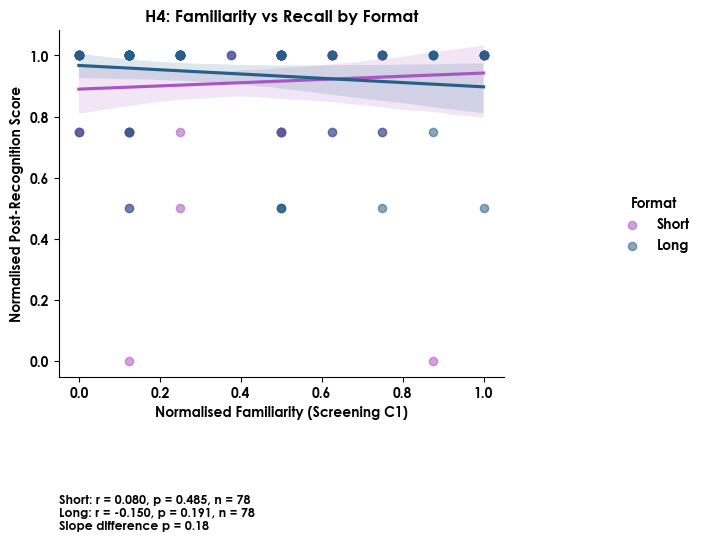

In [120]:
format_palette = {"Short": COLOR_MAP.get("Short", "#aa55c4"), "Long": COLOR_MAP.get("Long", "#265f88")}
format_summaries = []
for form, subset in overall_h4.groupby("form", observed=True):
    subset = subset.dropna(subset=["familiarity_norm", "recall_norm"])
    if subset.shape[0] < 3 or subset["familiarity_norm"].nunique() < 2 or subset["recall_norm"].nunique() < 2:
        r_form = np.nan
        p_form = np.nan
    else:
        r_form, p_form = stats.pearsonr(subset["familiarity_norm"], subset["recall_norm"])
    format_summaries.append({
        "format": form,
        "pearson_r": r_form,
        "p_value": p_form,
        "n": subset.shape[0],
    })
format_model = smf.ols("recall_norm ~ familiarity_norm * C(form)", data=overall_h4).fit()
format_anova_h4 = anova_lm(format_model, typ=2)
baseline_slope = format_model.params.get("familiarity_norm", np.nan)
interaction_term = "familiarity_norm:C(form)[T.Long]"
interaction_coef = format_model.params.get(interaction_term, np.nan)
long_slope = baseline_slope + interaction_coef if np.isfinite(baseline_slope) and np.isfinite(interaction_coef) else np.nan
format_slope_table_h4 = pd.DataFrame([
    {
        "format": "Short",
        "slope": baseline_slope,
    },
    {
        "format": "Long",
        "slope": long_slope,
    },
]).assign(test="Interaction slope difference", p_value=format_model.pvalues.get(interaction_term, np.nan))
format_plot = sns.lmplot(
    data=overall_h4,
    x="familiarity_norm",
    y="recall_norm",
    hue="form",
    palette=format_palette,
    scatter_kws={"alpha": 0.55, "s": 35},
    height=4.2,
    aspect=1.25,
    legend=False,
)
format_plot.ax.set_xlabel("Normalised Familiarity (Screening C1)")
format_plot.ax.set_ylabel("Normalised Post-Recognition Score")
format_plot.ax.set_title("H4: Familiarity vs Recall by Format")
annotation_lines = [
    "{}: r = {}, p = {}, n = {}".format(
        row["format"],
        _fmt_stat(row["pearson_r"], "{:.3f}"),
        _fmt_stat(row["p_value"], "{:.3g}"),
        row["n"],
    )
    for row in format_summaries
]
interaction_text = f"Slope difference p = {_fmt_stat(format_model.pvalues.get(interaction_term, np.nan), '{:.3g}')}"
annotation_lines.append(interaction_text)
format_plot.ax.text(0.0, -0.34, "\n".join(annotation_lines), transform=format_plot.ax.transAxes, ha="left", va="top", fontsize=9)
format_plot.add_legend(title="Format", bbox_to_anchor=(1.02, 0.5), loc="center left")
format_h4_summary = pd.DataFrame(format_summaries)
format_h4_summary, format_slope_table_h4, format_anova_h4

### Part 3: Correlations by Title
Target titles are pooled across formats to surface title-specific familiarity-recall trends and slope differences.

(               title  pearson_r   p_value   n
 0  Abbott Elementary   0.088047  0.514868  57
 1            Mad Max   0.011345  0.938999  48
 2           The Town  -0.110838  0.438750  51,
                title     slope                        test   p_value
 0  Abbott Elementary  0.027702              Baseline slope       NaN
 1            Mad Max  0.010428  Slope vs Abbott Elementary  0.885920
 2           The Town -0.060533  Slope vs Abbott Elementary  0.398518,
                                                       sum_sq     df         F  \
 C(title, Treatment(reference='Abbott Elementary'))  0.208034    2.0  3.610600   
 familiarity_norm                                    0.000127    1.0  0.004396   
 familiarity_norm:C(title, Treatment(reference='...  0.021287    2.0  0.369453   
 Residual                                            4.321325  150.0       NaN   
 
                                                       PR(>F)  
 C(title, Treatment(reference='Abbott Elementary'))  0

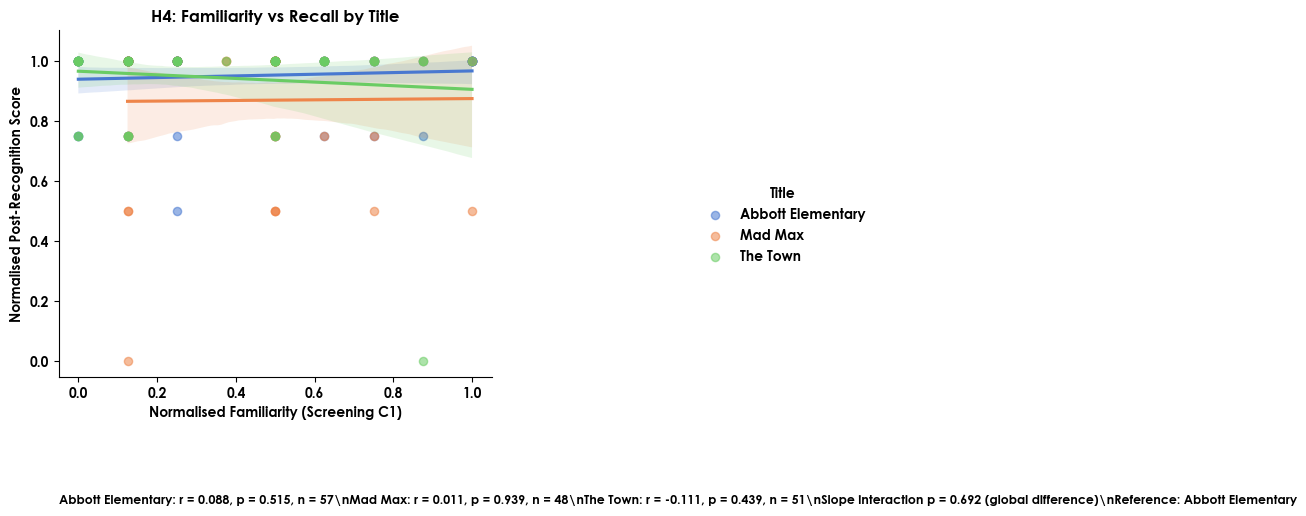

In [121]:
from statsmodels.stats.anova import anova_lm
title_subset_h4 = h4_base.loc[h4_base["title"].isin(TARGET_TITLES)].copy()
if title_subset_h4.empty:
    print("No familiarity/recall overlap for the specified target titles; skipping Part 3 plot.")
    title_h4_summary = pd.DataFrame()
    title_h4_slope_table = pd.DataFrame()
    title_anova_h4 = pd.DataFrame()
else:
    unique_titles = sorted(title_subset_h4["title"].unique())
    reference_title = unique_titles[0]
    title_palette = dict(zip(unique_titles, sns.color_palette("muted", n_colors=len(unique_titles))))
    title_summaries = []
    for title_name, subset in title_subset_h4.groupby("title", observed=True):
        subset = subset.dropna(subset=["familiarity_norm", "recall_norm"])
        if subset.shape[0] < 3 or subset["familiarity_norm"].nunique() < 2 or subset["recall_norm"].nunique() < 2:
            r_title = np.nan
            p_title = np.nan
        else:
            r_title, p_title = stats.pearsonr(subset["familiarity_norm"], subset["recall_norm"])
        title_summaries.append({
            "title": title_name,
            "pearson_r": r_title,
            "p_value": p_title,
            "n": subset.shape[0],
        })
    title_model = smf.ols(
        f"recall_norm ~ familiarity_norm * C(title, Treatment(reference='{reference_title}'))",
        data=title_subset_h4,
    ).fit()
    title_anova_h4 = anova_lm(title_model, typ=2)
    slope_entries = []
    base_slope = title_model.params.get("familiarity_norm", np.nan)
    slope_entries.append({
        "title": reference_title,
        "slope": base_slope,
        "test": "Baseline slope",
        "p_value": np.nan,
    })
    for other in unique_titles[1:]:
        param_name = f"familiarity_norm:C(title, Treatment(reference='{reference_title}'))[T.{other}]"
        interaction_coef = title_model.params.get(param_name, np.nan)
        slope_val = base_slope + interaction_coef if np.isfinite(base_slope) and np.isfinite(interaction_coef) else np.nan
        slope_entries.append({
            "title": other,
            "slope": slope_val,
            "test": f"Slope vs {reference_title}",
            "p_value": title_model.pvalues.get(param_name, np.nan),
        })
    interaction_rows = [idx for idx in title_anova_h4.index if idx.startswith("familiarity_norm:C(title, Treatment(")]
    interaction_p = title_anova_h4.loc[interaction_rows[0], "PR(>F)"] if interaction_rows else np.nan
    title_h4_slope_table = pd.DataFrame(slope_entries)
    title_plot = sns.lmplot(
        data=title_subset_h4,
        x="familiarity_norm",
        y="recall_norm",
        hue="title",
        palette=title_palette,
        scatter_kws={"alpha": 0.55, "s": 35},
        height=4.2,
        aspect=1.25,
        legend=False,
    )
    title_plot.ax.set_xlabel("Normalised Familiarity (Screening C1)")
    title_plot.ax.set_ylabel("Normalised Post-Recognition Score")
    title_plot.ax.set_title("H4: Familiarity vs Recall by Title")
    annotation_lines = [
        "{}: r = {}, p = {}, n = {}".format(
            row["title"],
            _fmt_stat(row["pearson_r"], "{:.3f}"),
            _fmt_stat(row["p_value"], "{:.3g}"),
            row["n"],
        )
        for row in title_summaries
    ]
    annotation_lines.append(
        f"Slope interaction p = {_fmt_stat(interaction_p, '{:.3g}')} (global difference)\\nReference: {reference_title}"
    )
    title_plot.ax.text(0.0, -0.34, "\\n".join(annotation_lines), transform=title_plot.ax.transAxes, ha="left", va="top", fontsize=9)
    title_plot.add_legend(title="Title", bbox_to_anchor=(1.02, 0.5), loc="center left")
    title_h4_summary = pd.DataFrame(title_summaries)
title_h4_summary, title_h4_slope_table, title_anova_h4

### Part 4: Title-Level Format Comparison
We contrast Long and Short familiarity-recall correlations within each target title, flagging significant slopes and Long-Short differences.

(               title   form  pearson_r   p_value   n
 0  Abbott Elementary   Long  -0.045432  0.821966  27
 1  Abbott Elementary  Short   0.141408  0.456048  30
 2            Mad Max   Long  -0.386105  0.062384  24
 3            Mad Max  Short   0.414147  0.044224  24
 4           The Town   Long   0.149592  0.456438  27
 5           The Town  Short  -0.209453  0.325962  24,
                title  delta_p_value
 0  Abbott Elementary       0.449674
 1            Mad Max       0.005722
 2           The Town       0.234786)

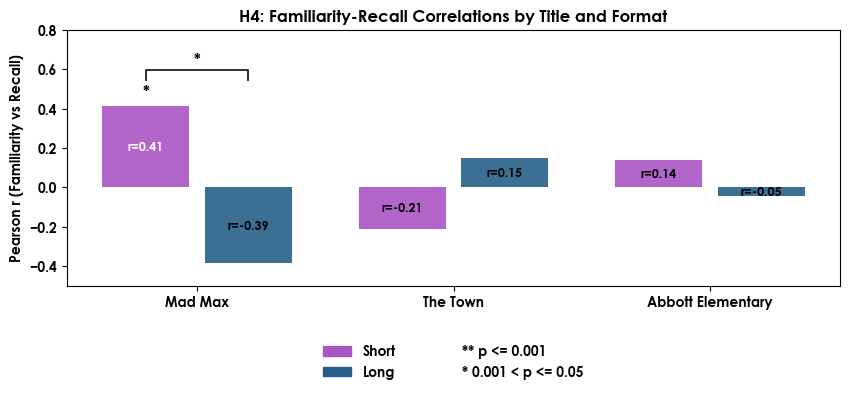

In [122]:
title_h4_correlation_records = []
title_h4_difference_records = []
for title_name, title_df in h4_base.groupby("title", observed=True):
    for form_name, form_df in title_df.groupby("form", observed=True):
        form_df = form_df.dropna(subset=["familiarity_norm", "recall_norm"])
        if form_df.shape[0] < 3 or form_df["familiarity_norm"].nunique() < 2 or form_df["recall_norm"].nunique() < 2:
            r_val = np.nan
            p_val = np.nan
        else:
            r_val, p_val = stats.pearsonr(form_df["familiarity_norm"], form_df["recall_norm"])
        title_h4_correlation_records.append({
            "title": title_name,
            "form": form_name,
            "pearson_r": r_val,
            "p_value": p_val,
            "n": form_df.shape[0],
        })
    if title_df["form"].nunique() >= 2:
        diff_model = smf.ols("recall_norm ~ familiarity_norm * C(form)", data=title_df).fit()
        interaction_name = "familiarity_norm:C(form)[T.Long]"
        diff_p = diff_model.pvalues.get(interaction_name, np.nan)
    else:
        diff_p = np.nan
    title_h4_difference_records.append({
        "title": title_name,
        "delta_p_value": diff_p,
    })
title_h4_corr_df = pd.DataFrame(title_h4_correlation_records)
title_h4_diff_df = pd.DataFrame(title_h4_difference_records)
if title_h4_corr_df.empty:
    raise ValueError("No familiarity/recall data available for Part 4 plot.")
title_order = [t for t in TARGET_TITLES if t in title_h4_corr_df["title"].unique()] or sorted(title_h4_corr_df["title"].unique())
form_order = ["Short", "Long"]
bar_width = 0.34
x_positions = np.arange(len(title_order))
fig, ax = plt.subplots(figsize=(8.6, 4.6))
max_bar_height = 0.0
min_bar_height = 0.0
for title_idx, title_name in enumerate(title_order):
    title_subset = title_h4_corr_df.loc[title_h4_corr_df["title"] == title_name]
    local_max = 0.0
    local_min = 0.0
    for offset_idx, form_name in enumerate(form_order):
        form_row = title_subset.loc[title_subset["form"] == form_name]
        if form_row.empty:
            continue
        r_val = form_row["pearson_r"].iloc[0]
        p_val = form_row["p_value"].iloc[0]
        if not np.isfinite(r_val):
            continue
        bar_x = x_positions[title_idx] + (offset_idx - 0.5) * (bar_width + 0.06)
        color = COLOR_MAP.get(form_name, COLOR_MAP.get("Default", "#1f77b4"))
        ax.bar(bar_x, r_val, width=bar_width, color=color, alpha=0.9)
        local_max = max(local_max, r_val, 0.0)
        local_min = min(local_min, r_val, 0.0)
        annotation_label = significance_label(p_val)
        if annotation_label:
            text_offset = 0.035 if r_val >= 0 else -0.05
            va = "bottom" if r_val >= 0 else "top"
            ax.text(bar_x, r_val + text_offset, annotation_label, ha="center", va=va, fontsize=11, fontweight="bold")
        bar_text_color = "white" if r_val >= 0.25 else "black"
        text_y = r_val / 2 if r_val != 0 else 0.015
        ax.text(bar_x, text_y, f"r={r_val:.2f}", ha="center", va="center", color=bar_text_color, fontsize=9)
    max_bar_height = max(max_bar_height, local_max)
    min_bar_height = min(min_bar_height, local_min)
    diff_row = title_h4_diff_df.loc[title_h4_diff_df["title"] == title_name]
    if not diff_row.empty:
        diff_p = diff_row["delta_p_value"].iloc[0]
        diff_label = significance_label(diff_p)
        if diff_label:
            x_center = x_positions[title_idx]
            half_span = (bar_width + 0.06) / 2
            bracket_height = local_max + 0.18
            ax.plot(
                [x_center - half_span, x_center - half_span, x_center + half_span, x_center + half_span],
                [bracket_height - 0.05, bracket_height, bracket_height, bracket_height - 0.05],
                color="#2f2f2f",
                linewidth=1.4,
            )
            ax.text(x_center, bracket_height + 0.02, diff_label, ha="center", va="bottom", fontsize=11, fontweight="bold")
ax.set_xticks(x_positions)
ax.set_xticklabels(title_order)
ax.set_ylabel("Pearson r (Familiarity vs Recall)")
ax.set_title("H4: Familiarity-Recall Correlations by Title and Format")
lower_bound = min(-0.35, min_bar_height - 0.18)
upper_bound = max(0.1, max_bar_height + 0.25)
ax.set_ylim(lower_bound, upper_bound)
format_handles = [
    patches.Patch(color=COLOR_MAP.get(form_name, COLOR_MAP.get("Default", "#1f77b4")), label=form_name)
    for form_name in form_order
    if form_name in title_h4_corr_df["form"].unique()
]
sign_handles = [
    plt.Line2D([], [], color="black", marker="", linestyle="None", markersize=11, label="** p <= 0.001"),
    plt.Line2D([], [], color="black", marker="", linestyle="None", markersize=11, label="* 0.001 < p <= 0.05"),
]
legend_handles = format_handles + sign_handles
ax.legend(
    legend_handles,
    [handle.get_label() for handle in legend_handles],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=2,
    frameon=False,
)
plt.ylim(-0.5, 0.8)
plt.tight_layout(rect=(0, 0.08, 1, 1))
title_h4_corr_df.sort_values(["title", "form"]).reset_index(drop=True), title_h4_diff_df.sort_values("title").reset_index(drop=True)

In [123]:
# H4 summary tables and one-liners
if 'part1_h4_summary' in globals() and not part1_h4_summary.empty:
    display_part1 = part1_h4_summary.copy()
    if 'p_value' in display_part1.columns:
        display_part1["p_value"] = display_part1["p_value"].apply(format_p_value)
    if 'pearson_r' in display_part1.columns:
        display_part1["pearson_r"] = display_part1["pearson_r"].round(3)
    display(display_part1.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    if 'overall_h4' in globals():
        long_mean = overall_h4.loc[overall_h4["form"] == "Long", "recall_norm"].mean()
        short_mean = overall_h4.loc[overall_h4["form"] == "Short", "recall_norm"].mean()
        extra_items = []
        if 'r_val' in globals() and isinstance(r_val, Number) and np.isfinite(r_val):
            extra_items.append(f"Pearson r={r_val:.3f}")
        if 'p_val' in globals() and isinstance(p_val, Number) and np.isfinite(p_val):
            extra_items.append(format_p_value(p_val))
        long_count = overall_h4.loc[overall_h4["form"] == "Long", id_column].nunique()
        short_count = overall_h4.loc[overall_h4["form"] == "Short", id_column].nunique()
        if long_count:
            extra_items.append(f"n_long={int(long_count)}")
        if short_count:
            extra_items.append(f"n_short={int(short_count)}")
        extra_note = ", ".join(extra_items) if extra_items else None
        print_long_short_summary(
            label="H4 Part 1 (All formats)",
            long_mean=long_mean,
            short_mean=short_mean,
            extra_note=extra_note
        )
else:
    print("H4 Part 1 summary: results unavailable.")

if 'format_h4_summary' in globals() and not format_h4_summary.empty:
    formatted_format = format_h4_summary.copy()
    formatted_format["pearson_r"] = formatted_format["pearson_r"].round(3)
    formatted_format["p_value"] = formatted_format["p_value"].apply(format_p_value)
    display(formatted_format.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    interaction_note = None
    if 'format_model' in globals():
        interaction_term = "familiarity_norm:C(form)[T.Long]"
        interaction_p = format_model.pvalues.get(interaction_term, np.nan)
        if np.isfinite(interaction_p):
            interaction_note = f"Slope diff {format_p_value(interaction_p)}"
    long_mean = overall_h4.loc[overall_h4["form"] == "Long", "recall_norm"].mean() if 'overall_h4' in globals() else np.nan
    short_mean = overall_h4.loc[overall_h4["form"] == "Short", "recall_norm"].mean() if 'overall_h4' in globals() else np.nan
    sample_items = []
    long_row = formatted_format.loc[formatted_format["format"] == "Long", "n"]
    short_row = formatted_format.loc[formatted_format["format"] == "Short", "n"]
    if not long_row.empty and isinstance(long_row.iloc[0], Number) and np.isfinite(long_row.iloc[0]):
        sample_items.append(f"n_long={int(long_row.iloc[0])}")
    if not short_row.empty and isinstance(short_row.iloc[0], Number) and np.isfinite(short_row.iloc[0]):
        sample_items.append(f"n_short={int(short_row.iloc[0])}")
    if interaction_note:
        sample_items.append(interaction_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="H4 Part 2 (By format)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("H4 Part 2 summary: format correlations unavailable.")

if 'title_h4_summary' in globals() and not title_h4_summary.empty:
    formatted_title = title_h4_summary.copy()
    formatted_title["pearson_r"] = formatted_title["pearson_r"].round(3)
    formatted_title["p_value"] = formatted_title["p_value"].apply(format_p_value)
    display(formatted_title.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    interaction_note = None
    if 'title_anova_h4' in globals() and not title_anova_h4.empty:
        interaction_rows = [idx for idx in title_anova_h4.index if idx.startswith("familiarity_norm:C(")]
        if interaction_rows:
            interaction_note = f"Global slope diff {format_p_value(title_anova_h4.loc[interaction_rows[0], 'PR(>F)'])}"
    long_mean = title_subset_h4.loc[title_subset_h4["form"] == "Long", "recall_norm"].mean() if 'title_subset_h4' in globals() else np.nan
    short_mean = title_subset_h4.loc[title_subset_h4["form"] == "Short", "recall_norm"].mean() if 'title_subset_h4' in globals() else np.nan
    sample_items = []
    if 'title_subset_h4' in globals():
        long_count = title_subset_h4.loc[title_subset_h4["form"] == "Long", id_column].nunique()
        short_count = title_subset_h4.loc[title_subset_h4["form"] == "Short", id_column].nunique()
        if long_count:
            sample_items.append(f"n_long={int(long_count)}")
        if short_count:
            sample_items.append(f"n_short={int(short_count)}")
    if interaction_note:
        sample_items.append(interaction_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="H4 Part 3 (By title)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("H4 Part 3 summary: title-level correlations unavailable.")

if 'title_h4_corr_df' in globals() and not title_h4_corr_df.empty:
    display_title_corr = title_h4_corr_df.copy()
    display_title_corr["pearson_r"] = display_title_corr["pearson_r"].round(3)
    display_title_corr["p_value"] = display_title_corr["p_value"].apply(format_p_value)
    display(display_title_corr.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    long_mean = h4_base.loc[(h4_base["form"] == "Long") & (h4_base["title"].isin(TARGET_TITLES)), "recall_norm"].mean() if 'h4_base' in globals() else np.nan
    short_mean = h4_base.loc[(h4_base["form"] == "Short") & (h4_base["title"].isin(TARGET_TITLES)), "recall_norm"].mean() if 'h4_base' in globals() else np.nan
    diff_note = None
    if 'title_h4_diff_df' in globals() and not title_h4_diff_df.empty:
        best_row = title_h4_diff_df.loc[title_h4_diff_df['delta_p_value'].idxmin()]
        diff_note = f"Form slope diff {format_p_value(best_row['delta_p_value'])}"
    sample_items = []
    if 'h4_base' in globals():
        long_count = h4_base.loc[(h4_base["form"] == "Long") & (h4_base["title"].isin(TARGET_TITLES)), id_column].nunique()
        short_count = h4_base.loc[(h4_base["form"] == "Short") & (h4_base["title"].isin(TARGET_TITLES)), id_column].nunique()
        if long_count:
            sample_items.append(f"n_long={int(long_count)}")
        if short_count:
            sample_items.append(f"n_short={int(short_count)}")
    if diff_note:
        sample_items.append(diff_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="H4 Part 4 (Title-format comparison)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("H4 Part 4 summary: title-format correlation table unavailable.")

group  Pearson r  p-value    n
0  All formats and titles      -0.02  p=0.803  156

H4 Part 1 (All formats): Long form (94%) showed 3% greater than short form (91%) (Pearson r=-0.045, p=0.822, n_long=78, n_short=78).


format  Pearson r  p-value   n
0  Short       0.08  p=0.485  78
1   Long      -0.15  p=0.191  78

H4 Part 2 (By format): Long form (94%) showed 3% greater than short form (91%) (n_long=78, n_short=78, Slope diff p=0.180).


title  Pearson r  p-value   n
0  Abbott Elementary      0.088  p=0.515  57
1            Mad Max      0.011  p=0.939  48
2           The Town     -0.111  p=0.439  51

H4 Part 3 (By title): Long form (94%) showed 3% greater than short form (91%) (n_long=78, n_short=78, Global slope diff p=0.692).


title   form  Pearson r  p-value   n
0  Abbott Elementary  Short      0.141  p=0.456  30
1  Abbott Elementary   Long     -0.045  p=0.822  27
2            Mad Max  Short      0.414  p=0.044  24
3            Mad Max   Long     -0.386  p=0.062  24
4           The Town  Short     -0.209  p=0.326  24
5           The Town   Long      0.150  p=0.456  27

H4 Part 4 (Title-format comparison): Long form (94%) showed 3% greater than short form (91%) (n_long=78, n_short=78, Form slope diff p=0.006).


In [124]:
# Export Hypothesis 4 (recognition) artefacts
h4_section_label = "Hypothesis 4 - Familiarity and Recall"
if "part1_h4_summary" in globals() and not part1_h4_summary.empty and "overall_h4" in globals():
    record_cols = [col for col in [id_column, "form", "title", "familiarity_norm", "recall_norm"] if col in overall_h4.columns]
    frames = [("part1_h4_summary", part1_h4_summary.copy())]
    if record_cols:
        frames.append(("overall_h4_records", overall_h4[record_cols].reset_index(drop=True).copy()))
    metadata = {"n_records": int(overall_h4.shape[0])}
    if "pearson_r" in part1_h4_summary.columns and not part1_h4_summary["pearson_r"].empty:
        r_value = part1_h4_summary["pearson_r"].iloc[0]
        metadata["pearson_r"] = float(r_value) if isinstance(r_value, Number) and np.isfinite(r_value) else np.nan
    if "p_value" in part1_h4_summary.columns and not part1_h4_summary["p_value"].empty:
        p_value = part1_h4_summary["p_value"].iloc[0]
        metadata["p_value"] = float(p_value) if isinstance(p_value, Number) and np.isfinite(p_value) else np.nan
    _export_plot_bundle(
        section_label=h4_section_label,
        part_label="Part 1 - Overall association",
        title="H4: Familiarity vs Key Recall (All formats)",
        frames=frames,
        metadata=metadata,
        filename_suffix="h4_part1_overall",
    )
else:
    print("H4 Part 1 export skipped: required tables unavailable.")

if (
    "format_h4_summary" in globals()
    and not format_h4_summary.empty
    and "format_slope_table_h4" in globals()
    and "format_anova_h4" in globals()
    and "overall_h4" in globals()
 ):
    record_cols = [col for col in [id_column, "form", "title", "familiarity_norm", "recall_norm"] if col in overall_h4.columns]
    frames = [
        ("format_h4_summary", format_h4_summary.copy()),
        ("format_slope_table_h4", format_slope_table_h4.copy()),
        ("format_anova_h4", format_anova_h4.copy()),
    ]
    if record_cols:
        frames.append(("format_h4_records", overall_h4[record_cols].reset_index(drop=True).copy()))
    interaction_term = "familiarity_norm:C(form)[T.Long]"
    interaction_p = np.nan
    if "format_model" in globals():
        interaction_p = format_model.pvalues.get(interaction_term, np.nan)
    metadata = {
        "interaction_term": interaction_term,
        "interaction_p_value": float(interaction_p) if isinstance(interaction_p, Number) and np.isfinite(interaction_p) else np.nan,
        "n_records": int(overall_h4.shape[0]),
    }
    _export_plot_bundle(
        section_label=h4_section_label,
        part_label="Part 2 - Format comparison",
        title="H4: Familiarity vs Key Recall by Format",
        frames=frames,
        metadata=metadata,
        filename_suffix="h4_part2_format",
    )
else:
    print("H4 Part 2 export skipped: required tables unavailable.")

if (
    "title_h4_summary" in globals()
    and not title_h4_summary.empty
    and "title_h4_slope_table" in globals()
    and "title_anova_h4" in globals()
 ):
    frames = [
        ("title_h4_summary", title_h4_summary.copy()),
        ("title_h4_slope_table", title_h4_slope_table.copy()),
        ("title_anova_h4", title_anova_h4.copy()),
    ]
    if "title_subset_h4" in globals() and not title_subset_h4.empty:
        cols = [col for col in [id_column, "form", "title", "familiarity_norm", "recall_norm"] if col in title_subset_h4.columns]
        if cols:
            frames.append(("title_subset_h4_records", title_subset_h4[cols].reset_index(drop=True).copy()))
    interaction_rows = [idx for idx in title_anova_h4.index if isinstance(idx, str) and idx.startswith("familiarity_norm:C(")]
    interaction_p = title_anova_h4.loc[interaction_rows[0], "PR(>F)"] if interaction_rows else np.nan
    metadata = {
        "reference_title": reference_title if "reference_title" in globals() else None,
        "interaction_p_value": float(interaction_p) if isinstance(interaction_p, Number) and np.isfinite(interaction_p) else np.nan,
        "n_titles": int(title_h4_summary["title"].nunique()),
    }
    _export_plot_bundle(
        section_label=h4_section_label,
        part_label="Part 3 - Title comparison",
        title="H4: Familiarity vs Key Recall by Title",
        frames=frames,
        metadata=metadata,
        filename_suffix="h4_part3_title",
    )
else:
    print("H4 Part 3 export skipped: required tables unavailable.")

if (
    "title_h4_corr_df" in globals() and not title_h4_corr_df.empty
    and "title_h4_diff_df" in globals() and not title_h4_diff_df.empty
 ):
    frames = [
        ("title_h4_format_correlations", title_h4_corr_df.copy()),
        ("title_h4_format_differences", title_h4_diff_df.copy()),
    ]
    metadata = {
        "n_titles": int(title_h4_corr_df["title"].nunique()),
        "forms": sorted(title_h4_corr_df["form"].unique()),
    }
    if not title_h4_diff_df["delta_p_value"].isna().all():
        best_diff = title_h4_diff_df.loc[title_h4_diff_df["delta_p_value"].idxmin()]
        metadata["strongest_format_effect_title"] = best_diff.get("title")
        diff_p = best_diff.get("delta_p_value")
        metadata["strongest_format_effect_p"] = float(diff_p) if isinstance(diff_p, Number) and np.isfinite(diff_p) else np.nan
    _export_plot_bundle(
        section_label=h4_section_label,
        part_label="Part 4 - Title x Format correlations",
        title="H4: Familiarity-Recall Correlations by Title and Format",
        frames=frames,
        metadata=metadata,
        filename_suffix="h4_part4_title_format",
    )
else:
    print("H4 Part 4 export skipped: required tables unavailable.")

## Hypothesis 4- Familiarity and Open Ended Recall
We pair the normalised screening familiarity scores from H3 with the Stage 3 post-open-ended recall KMS composite to test whether familiarity predicts open-ended recall performance.

In [125]:
if "open_recall_long_kms" not in globals():
    raise ValueError("Open-ended recall KMS outputs from H2 are unavailable; run the H2 cells before starting H4.")
recall_metric_df = open_recall_long_kms.rename(columns={"value": "recall_norm"}).copy()
if recall_metric_df.empty:
    raise ValueError("open_recall_long_kms is empty; cannot evaluate familiarity/recall links.")
recall_metric_df[id_column] = recall_metric_df[id_column].astype(str)
h4_kms_base = (
    familiarity_long.merge(
        recall_metric_df[[id_column, "form", "title", "recall_norm"]],
        on=[id_column, "form", "title"],
        how="inner",
    )
    .dropna(subset=["familiarity_norm", "recall_norm"])
)
if h4_kms_base.empty:
    raise ValueError("No overlapping familiarity and recall records available for H4 analysis.")
h4_kms_base_summary = h4_kms_base.groupby(["form", "title"], observed=True).size().rename("records").reset_index()
overall_h4_kms = h4_kms_base.copy()
h4_kms_base_summary.head()

form              title  records
0  Short  Abbott Elementary       29
1  Short            Mad Max       26
2  Short           The Town       24
3   Long  Abbott Elementary       26
4   Long            Mad Max       24

### Part 1: Overall Familiarity-Open Ended Recall Association
All titles and formats are pooled to gauge the aggregate relationship between normalised familiarity and the open-ended recall KMS composite.

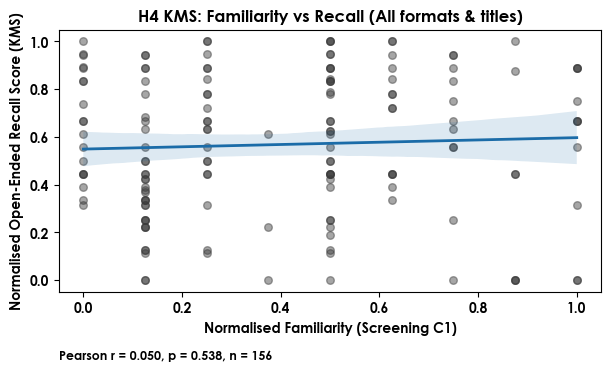

group  pearson_r   p_value    n
0  All formats and titles   0.049688  0.537902  156

In [126]:
# Overall correlation styled to mirror recognition-based Part 1
overall_subset = overall_h4_kms.dropna(subset=["familiarity_norm", "recall_norm"]).copy()
if overall_subset.shape[0] < 3 or overall_subset["familiarity_norm"].nunique() < 2 or overall_subset["recall_norm"].nunique() < 2:
    raise ValueError("Familiarity or recall lacks sufficient variance for correlation analysis in Part 1 (KMS).")
overall_r, overall_p = stats.pearsonr(overall_subset["familiarity_norm"], overall_subset["recall_norm"])
overall_n = overall_subset.shape[0]
fig, ax = plt.subplots(figsize=(6.5, 4.3))
fig.subplots_adjust(bottom=0.27, right=0.96)
sns.regplot(
    data=overall_subset,
    x="familiarity_norm",
    y="recall_norm",
    scatter_kws={"alpha": 0.45, "s": 30, "color": "#3a3a3a"},
    line_kws={"color": "#1b6ca8", "linewidth": 2},
    ax=ax
)
ax.set_xlabel("Normalised Familiarity (Screening C1)")
ax.set_ylabel("Normalised Open-Ended Recall Score (KMS)")
ax.set_title("H4 KMS: Familiarity vs Recall (All formats & titles)")
annotation = f"Pearson r = {overall_r:.3f}, p = {overall_p:.3g}, n = {overall_n}"
ax.text(0.0, -0.22, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
plt.show()
part1_h4_kms_summary = pd.DataFrame(
    [
        {
            "group": "All formats and titles",
            "pearson_r": overall_r,
            "p_value": overall_p,
            "n": overall_n,
        }
    ]
)
part1_h4_kms_summary

### Part 2: Format-Specific Associations

(  format  pearson_r   p_value   n
 0  Short   0.108231  0.342396  79
 1   Long   0.013181  0.909417  77,
   format     slope                          test   p_value
 0  Short  0.097633  Interaction slope difference  0.574752
 1   Long  0.012645  Interaction slope difference  0.574752,
                              sum_sq     df          F    PR(>F)
 C(form)                    0.857608    1.0  10.681346  0.001338
 familiarity_norm           0.039281    1.0   0.489233  0.485339
 familiarity_norm:C(form)   0.025385    1.0   0.316161  0.574752
 Residual                  12.204125  152.0        NaN       NaN)

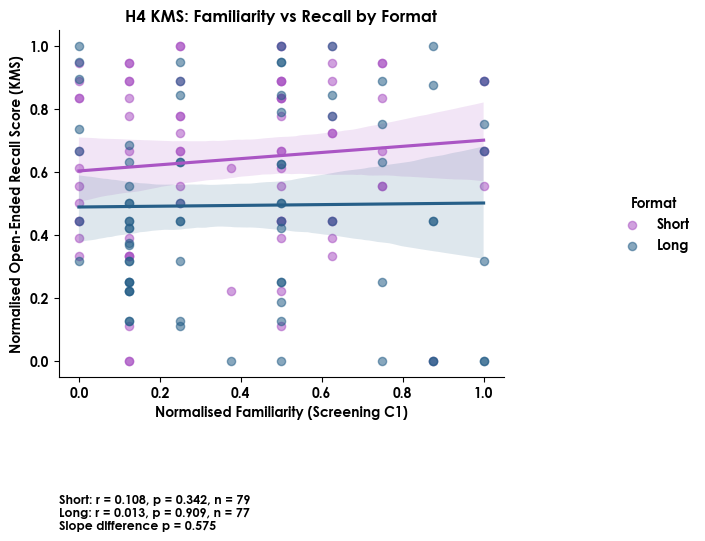

In [127]:
# Format-level correlation and styling aligned with recognition-based Part 2
format_palette = {"Short": COLOR_MAP.get("Short", "#aa55c4"), "Long": COLOR_MAP.get("Long", "#265f88")}
format_summaries_kms = []
for form, subset in overall_h4_kms.groupby("form", observed=True):
    subset = subset.dropna(subset=["familiarity_norm", "recall_norm"])
    if subset.shape[0] < 3 or subset["familiarity_norm"].nunique() < 2 or subset["recall_norm"].nunique() < 2:
        r_form = np.nan
        p_form = np.nan
    else:
        r_form, p_form = stats.pearsonr(subset["familiarity_norm"], subset["recall_norm"])
    format_summaries_kms.append({
        "format": form,
        "pearson_r": r_form,
        "p_value": p_form,
        "n": subset.shape[0],
    })
format_h4_kms_summary = pd.DataFrame(format_summaries_kms)
format_model_kms = smf.ols("recall_norm ~ familiarity_norm * C(form)", data=overall_h4_kms).fit()
format_anova_kms = anova_lm(format_model_kms, typ=2)
interaction_term = "familiarity_norm:C(form)[T.Long]"
baseline_slope = format_model_kms.params.get("familiarity_norm", np.nan)
interaction_coef = format_model_kms.params.get(interaction_term, np.nan)
long_slope = baseline_slope + interaction_coef if np.isfinite(baseline_slope) and np.isfinite(interaction_coef) else np.nan
format_slope_table_kms = pd.DataFrame([
    {
        "format": "Short",
        "slope": baseline_slope,
    },
    {
        "format": "Long",
        "slope": long_slope,
    },
]).assign(test="Interaction slope difference", p_value=format_model_kms.pvalues.get(interaction_term, np.nan))
format_plot_kms = sns.lmplot(
    data=overall_h4_kms,
    x="familiarity_norm",
    y="recall_norm",
    hue="form",
    palette=format_palette,
    scatter_kws={"alpha": 0.55, "s": 35},
    height=4.2,
    aspect=1.25,
    legend=False,
)
format_plot_kms.ax.set_xlabel("Normalised Familiarity (Screening C1)")
format_plot_kms.ax.set_ylabel("Normalised Open-Ended Recall Score (KMS)")
format_plot_kms.ax.set_title("H4 KMS: Familiarity vs Recall by Format")
annotation_lines = [
    "{}: r = {}, p = {}, n = {}".format(
        row["format"],
        _fmt_stat(row["pearson_r"], "{:.3f}"),
        _fmt_stat(row["p_value"], "{:.3g}"),
        row["n"],
    )
    for row in format_summaries_kms
]
interaction_text = f"Slope difference p = {_fmt_stat(format_model_kms.pvalues.get(interaction_term, np.nan), '{:.3g}')}"
annotation_lines.append(interaction_text)
format_plot_kms.ax.text(0.0, -0.34, "\n".join(annotation_lines), transform=format_plot_kms.ax.transAxes, ha="left", va="top", fontsize=9)
format_plot_kms.add_legend(title="Format", bbox_to_anchor=(1.02, 0.5), loc="center left")
format_h4_kms_summary, format_slope_table_kms, format_anova_kms

### Part 3: Title-Specific Associations

(               title  pearson_r   p_value   n
 0  Abbott Elementary  -0.080263  0.560218  55
 1            Mad Max   0.440364  0.001373  50
 2           The Town  -0.000634  0.996477  51,
                title     slope                        test   p_value
 0  Abbott Elementary -0.068076              Baseline slope       NaN
 1            Mad Max  0.529093  Slope vs Abbott Elementary  0.003000
 2           The Town -0.000577  Slope vs Abbott Elementary  0.695201,
                                                        sum_sq     df  \
 C(title, Treatment(reference='Abbott Elementary'))   0.652720    2.0   
 familiarity_norm                                     0.076197    1.0   
 familiarity_norm:C(title, Treatment(reference='...   0.744283    2.0   
 Residual                                            11.690114  150.0   
 
                                                            F    PR(>F)  
 C(title, Treatment(reference='Abbott Elementary'))  4.187642  0.016994  
 familiarity_no

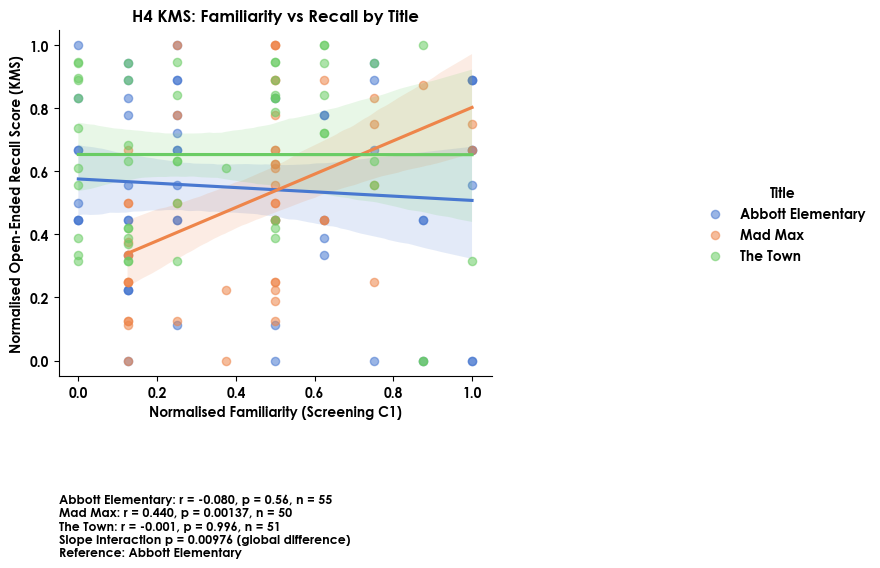

In [128]:
# Title-level correlations with styling aligned to recognition-based Part 3
title_subset_h4_kms = h4_kms_base.loc[h4_kms_base["title"].isin(TARGET_TITLES)].copy()
if title_subset_h4_kms.empty:
    print("No familiarity/recall overlap for the specified target titles; skipping Part 3 plot.")
    title_h4_kms_summary = pd.DataFrame()
    title_h4_kms_slope_table = pd.DataFrame()
    title_anova_kms = pd.DataFrame()
else:
    unique_titles = sorted(title_subset_h4_kms["title"].unique())
    reference_title = unique_titles[0]
    title_palette = dict(zip(unique_titles, sns.color_palette("muted", n_colors=len(unique_titles))))
    title_summaries_kms = []
    for title_name, subset in title_subset_h4_kms.groupby("title", observed=True):
        subset = subset.dropna(subset=["familiarity_norm", "recall_norm"])
        if subset.shape[0] < 3 or subset["familiarity_norm"].nunique() < 2 or subset["recall_norm"].nunique() < 2:
            r_title = np.nan
            p_title = np.nan
        else:
            r_title, p_title = stats.pearsonr(subset["familiarity_norm"], subset["recall_norm"])
        title_summaries_kms.append({
            "title": title_name,
            "pearson_r": r_title,
            "p_value": p_title,
            "n": subset.shape[0],
        })
    title_model_kms = smf.ols(
        f"recall_norm ~ familiarity_norm * C(title, Treatment(reference='{reference_title}'))",
        data=title_subset_h4_kms,
    ).fit()
    title_anova_kms = anova_lm(title_model_kms, typ=2)
    slope_entries = []
    base_slope = title_model_kms.params.get("familiarity_norm", np.nan)
    slope_entries.append({
        "title": reference_title,
        "slope": base_slope,
        "test": "Baseline slope",
        "p_value": np.nan,
    })
    for other in unique_titles[1:]:
        param_name = f"familiarity_norm:C(title, Treatment(reference='{reference_title}'))[T.{other}]"
        interaction_coef = title_model_kms.params.get(param_name, np.nan)
        slope_val = base_slope + interaction_coef if np.isfinite(base_slope) and np.isfinite(interaction_coef) else np.nan
        slope_entries.append({
            "title": other,
            "slope": slope_val,
            "test": f"Slope vs {reference_title}",
            "p_value": title_model_kms.pvalues.get(param_name, np.nan),
        })
    title_h4_kms_slope_table = pd.DataFrame(slope_entries)
    interaction_rows = [idx for idx in title_anova_kms.index if idx.startswith("familiarity_norm:C(title, Treatment(")]
    interaction_p = title_anova_kms.loc[interaction_rows[0], "PR(>F)"] if interaction_rows else np.nan
    title_plot_kms = sns.lmplot(
        data=title_subset_h4_kms,
        x="familiarity_norm",
        y="recall_norm",
        hue="title",
        palette=title_palette,
        scatter_kws={"alpha": 0.55, "s": 35},
        height=4.2,
        aspect=1.25,
        legend=False,
    )
    title_plot_kms.ax.set_xlabel("Normalised Familiarity (Screening C1)")
    title_plot_kms.ax.set_ylabel("Normalised Open-Ended Recall Score (KMS)")
    title_plot_kms.ax.set_title("H4 KMS: Familiarity vs Recall by Title")
    annotation_lines = [
        "{}: r = {}, p = {}, n = {}".format(
            row["title"],
            _fmt_stat(row["pearson_r"], "{:.3f}"),
            _fmt_stat(row["p_value"], "{:.3g}"),
            row["n"],
        )
        for row in title_summaries_kms
    ]
    annotation_lines.append(
        f"Slope interaction p = {_fmt_stat(interaction_p, '{:.3g}')} (global difference)\nReference: {reference_title}"
    )
    title_plot_kms.ax.text(0.0, -0.34, "\n".join(annotation_lines), transform=title_plot_kms.ax.transAxes, ha="left", va="top", fontsize=9)
    title_plot_kms.add_legend(title="Title", bbox_to_anchor=(1.02, 0.5), loc="center left")
    title_h4_kms_summary = pd.DataFrame(title_summaries_kms)
title_h4_kms_summary, title_h4_kms_slope_table, title_anova_kms

### Part 4: Title-Level Format Comparison
We contrast Long and Short familiarity-recall correlations within each target title using the KMS recall composite, highlighting significant slopes and Long-Short differences.

(               title   form  pearson_r   p_value   n
 0  Abbott Elementary   Long  -0.162266  0.428377  26
 1  Abbott Elementary  Short   0.118169  0.541522  29
 2            Mad Max   Long   0.509880  0.010918  24
 3            Mad Max  Short   0.357811  0.072700  26
 4           The Town   Long   0.032011  0.874061  27
 5           The Town  Short  -0.040594  0.850617  24,
                title  delta_p_value
 0  Abbott Elementary       0.313414
 1            Mad Max       0.842966
 2           The Town       0.806057)

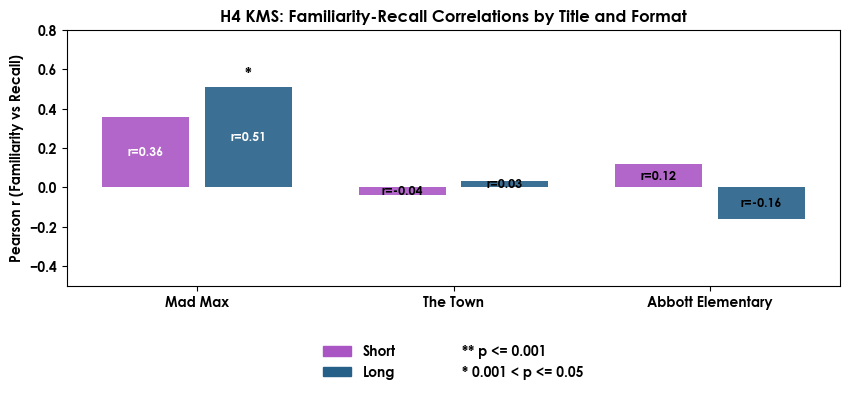

In [129]:
# Title and format comparisons with KMS recall
title_h4_kms_correlation_records = []
title_h4_kms_difference_records = []
for title_name, title_df in h4_kms_base.groupby("title", observed=True):
    for form_name, form_df in title_df.groupby("form", observed=True):
        form_df = form_df.dropna(subset=["familiarity_norm", "recall_norm"])
        if form_df.shape[0] < 3 or form_df["familiarity_norm"].nunique() < 2 or form_df["recall_norm"].nunique() < 2:
            r_val = np.nan
            p_val = np.nan
        else:
            r_val, p_val = stats.pearsonr(form_df["familiarity_norm"], form_df["recall_norm"])
        title_h4_kms_correlation_records.append({
            "title": title_name,
            "form": form_name,
            "pearson_r": r_val,
            "p_value": p_val,
            "n": form_df.shape[0],
        })
    if title_df["form"].nunique() >= 2:
        diff_model = smf.ols("recall_norm ~ familiarity_norm * C(form)", data=title_df).fit()
        interaction_name = "familiarity_norm:C(form)[T.Long]"
        diff_p = diff_model.pvalues.get(interaction_name, np.nan)
    else:
        diff_p = np.nan
    title_h4_kms_difference_records.append({
        "title": title_name,
        "delta_p_value": diff_p,
    })
title_h4_kms_corr_df = pd.DataFrame(title_h4_kms_correlation_records)
title_h4_kms_diff_df = pd.DataFrame(title_h4_kms_difference_records)
if title_h4_kms_corr_df.empty:
    raise ValueError("No familiarity/recall data available for Part 4 (KMS) plot.")
title_order = [t for t in TARGET_TITLES if t in title_h4_kms_corr_df["title"].unique()] or sorted(title_h4_kms_corr_df["title"].unique())
form_order = ["Short", "Long"]
bar_width = 0.34
x_positions = np.arange(len(title_order))
fig, ax = plt.subplots(figsize=(8.6, 4.6))
max_bar_height = 0.0
min_bar_height = 0.0
for title_idx, title_name in enumerate(title_order):
    title_subset = title_h4_kms_corr_df.loc[title_h4_kms_corr_df["title"] == title_name]
    local_max = 0.0
    local_min = 0.0
    for offset_idx, form_name in enumerate(form_order):
        form_row = title_subset.loc[title_subset["form"] == form_name]
        if form_row.empty:
            continue
        r_val = form_row["pearson_r"].iloc[0]
        p_val = form_row["p_value"].iloc[0]
        if not np.isfinite(r_val):
            continue
        bar_x = x_positions[title_idx] + (offset_idx - 0.5) * (bar_width + 0.06)
        color = COLOR_MAP.get(form_name, COLOR_MAP.get("Default", "#1f77b4"))
        ax.bar(bar_x, r_val, width=bar_width, color=color, alpha=0.9)
        local_max = max(local_max, r_val, 0.0)
        local_min = min(local_min, r_val, 0.0)
        annotation_label = significance_label(p_val)
        if annotation_label:
            text_offset = 0.035 if r_val >= 0 else -0.05
            va = "bottom" if r_val >= 0 else "top"
            ax.text(bar_x, r_val + text_offset, annotation_label, ha="center", va=va, fontsize=11, fontweight="bold")
        bar_text_color = "white" if r_val >= 0.25 else "black"
        text_y = r_val / 2 if r_val != 0 else 0.015
        ax.text(bar_x, text_y, f"r={r_val:.2f}", ha="center", va="center", color=bar_text_color, fontsize=9)
    max_bar_height = max(max_bar_height, local_max)
    min_bar_height = min(min_bar_height, local_min)
    diff_row = title_h4_kms_diff_df.loc[title_h4_kms_diff_df["title"] == title_name]
    if not diff_row.empty:
        diff_p = diff_row["delta_p_value"].iloc[0]
        diff_label = significance_label(diff_p)
        if diff_label:
            x_center = x_positions[title_idx]
            half_span = (bar_width + 0.06) / 2
            bracket_height = local_max + 0.18
            ax.plot(
                [x_center - half_span, x_center - half_span, x_center + half_span, x_center + half_span],
                [bracket_height - 0.05, bracket_height, bracket_height, bracket_height - 0.05],
                color="#2f2f2f",
                linewidth=1.4,
            )
            ax.text(x_center, bracket_height + 0.02, diff_label, ha="center", va="bottom", fontsize=11, fontweight="bold")
ax.set_xticks(x_positions)
ax.set_xticklabels(title_order)
ax.set_ylabel("Pearson r (Familiarity vs Recall)")
ax.set_title("H4 KMS: Familiarity-Recall Correlations by Title and Format")
lower_bound = min(-0.35, min_bar_height - 0.18)
upper_bound = max(0.1, max_bar_height + 0.25)
ax.set_ylim(lower_bound, upper_bound)
format_handles = [
    patches.Patch(color=COLOR_MAP.get(form_name, COLOR_MAP.get("Default", "#1f77b4")), label=form_name)
    for form_name in form_order
    if form_name in title_h4_kms_corr_df["form"].unique()
 ]
sign_handles = [
    plt.Line2D([], [], color="black", marker="", linestyle="None", markersize=11, label="** p <= 0.001"),
    plt.Line2D([], [], color="black", marker="", linestyle="None", markersize=11, label="* 0.001 < p <= 0.05"),
 ]
legend_handles = format_handles + sign_handles
ax.legend(
    legend_handles,
    [handle.get_label() for handle in legend_handles],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=2,
    frameon=False,
 )
plt.ylim(-0.5, 0.8)
plt.tight_layout(rect=(0, 0.08, 1, 1))
title_h4_kms_corr_df.sort_values(["title", "form"]).reset_index(drop=True), title_h4_kms_diff_df.sort_values("title").reset_index(drop=True)

In [130]:
# Export Hypothesis 4 (open-ended KMS) artefacts
h4_kms_section_label = "Hypothesis 4 - Familiarity and Open Ended Recall"
if "part1_h4_kms_summary" in globals() and not part1_h4_kms_summary.empty and "overall_h4_kms" in globals():
    record_cols = [col for col in [id_column, "form", "title", "familiarity_norm", "recall_norm"] if col in overall_h4_kms.columns]
    frames = [("part1_h4_kms_summary", part1_h4_kms_summary.copy())]
    if record_cols:
        frames.append(("overall_h4_kms_records", overall_h4_kms[record_cols].reset_index(drop=True).copy()))
    metadata = {"n_records": int(overall_h4_kms.shape[0])}
    if "pearson_r" in part1_h4_kms_summary.columns and not part1_h4_kms_summary["pearson_r"].empty:
        r_value = part1_h4_kms_summary["pearson_r"].iloc[0]
        metadata["pearson_r"] = float(r_value) if isinstance(r_value, Number) and np.isfinite(r_value) else np.nan
    if "p_value" in part1_h4_kms_summary.columns and not part1_h4_kms_summary["p_value"].empty:
        p_value = part1_h4_kms_summary["p_value"].iloc[0]
        metadata["p_value"] = float(p_value) if isinstance(p_value, Number) and np.isfinite(p_value) else np.nan
    _export_plot_bundle(
        section_label=h4_kms_section_label,
        part_label="Part 1 - Overall association",
        title="H4 KMS: Familiarity vs Open-Ended Recall (All formats)",
        frames=frames,
        metadata=metadata,
        filename_suffix="h4kms_part1_overall",
    )
else:
    print("H4 KMS Part 1 export skipped: required tables unavailable.")

if (
    "format_h4_kms_summary" in globals()
    and not format_h4_kms_summary.empty
    and "format_slope_table_kms" in globals()
    and "format_anova_kms" in globals()
    and "overall_h4_kms" in globals()
 ):
    record_cols = [col for col in [id_column, "form", "title", "familiarity_norm", "recall_norm"] if col in overall_h4_kms.columns]
    frames = [
        ("format_h4_kms_summary", format_h4_kms_summary.copy()),
        ("format_slope_table_kms", format_slope_table_kms.copy()),
        ("format_anova_kms", format_anova_kms.copy()),
    ]
    if record_cols:
        frames.append(("format_h4_kms_records", overall_h4_kms[record_cols].reset_index(drop=True).copy()))
    interaction_term = "familiarity_norm:C(form)[T.Long]"
    interaction_p = np.nan
    if "format_model_kms" in globals():
        interaction_p = format_model_kms.pvalues.get(interaction_term, np.nan)
    metadata = {
        "interaction_term": interaction_term,
        "interaction_p_value": float(interaction_p) if isinstance(interaction_p, Number) and np.isfinite(interaction_p) else np.nan,
        "n_records": int(overall_h4_kms.shape[0]),
    }
    _export_plot_bundle(
        section_label=h4_kms_section_label,
        part_label="Part 2 - Format comparison",
        title="H4 KMS: Familiarity vs Recall by Format",
        frames=frames,
        metadata=metadata,
        filename_suffix="h4kms_part2_format",
    )
else:
    print("H4 KMS Part 2 export skipped: required tables unavailable.")

if (
    "title_h4_kms_summary" in globals()
    and not title_h4_kms_summary.empty
    and "title_h4_kms_slope_table" in globals()
    and "title_anova_kms" in globals()
 ):
    frames = [
        ("title_h4_kms_summary", title_h4_kms_summary.copy()),
        ("title_h4_kms_slope_table", title_h4_kms_slope_table.copy()),
        ("title_anova_kms", title_anova_kms.copy()),
    ]
    if "title_subset_h4_kms" in globals() and not title_subset_h4_kms.empty:
        cols = [col for col in [id_column, "form", "title", "familiarity_norm", "recall_norm"] if col in title_subset_h4_kms.columns]
        if cols:
            frames.append(("title_subset_h4_kms_records", title_subset_h4_kms[cols].reset_index(drop=True).copy()))
    interaction_rows = [idx for idx in title_anova_kms.index if isinstance(idx, str) and idx.startswith("familiarity_norm:C(")]
    interaction_p = title_anova_kms.loc[interaction_rows[0], "PR(>F)"] if interaction_rows else np.nan
    metadata = {
        "reference_title": reference_title if "reference_title" in globals() else None,
        "interaction_p_value": float(interaction_p) if isinstance(interaction_p, Number) and np.isfinite(interaction_p) else np.nan,
        "n_titles": int(title_h4_kms_summary["title"].nunique()),
    }
    _export_plot_bundle(
        section_label=h4_kms_section_label,
        part_label="Part 3 - Title comparison",
        title="H4 KMS: Familiarity vs Recall by Title",
        frames=frames,
        metadata=metadata,
        filename_suffix="h4kms_part3_title",
    )
else:
    print("H4 KMS Part 3 export skipped: required tables unavailable.")

if (
    "title_h4_kms_corr_df" in globals() and not title_h4_kms_corr_df.empty
    and "title_h4_kms_diff_df" in globals() and not title_h4_kms_diff_df.empty
 ):
    frames = [
        ("title_h4_kms_format_correlations", title_h4_kms_corr_df.copy()),
        ("title_h4_kms_format_differences", title_h4_kms_diff_df.copy()),
    ]
    metadata = {
        "n_titles": int(title_h4_kms_corr_df["title"].nunique()),
        "forms": sorted(title_h4_kms_corr_df["form"].unique()),
    }
    if not title_h4_kms_diff_df["delta_p_value"].isna().all():
        best_diff = title_h4_kms_diff_df.loc[title_h4_kms_diff_df["delta_p_value"].idxmin()]
        metadata["strongest_format_effect_title"] = best_diff.get("title")
        diff_p = best_diff.get("delta_p_value")
        metadata["strongest_format_effect_p"] = float(diff_p) if isinstance(diff_p, Number) and np.isfinite(diff_p) else np.nan
    _export_plot_bundle(
        section_label=h4_kms_section_label,
        part_label="Part 4 - Title x Format correlations",
        title="H4 KMS: Familiarity-Recall Correlations by Title and Format",
        frames=frames,
        metadata=metadata,
        filename_suffix="h4kms_part4_title_format",
    )
else:
    print("H4 KMS Part 4 export skipped: required tables unavailable.")

### Familiarity per title-format

Showing the simple distribution of familiarity scores across titles and formats

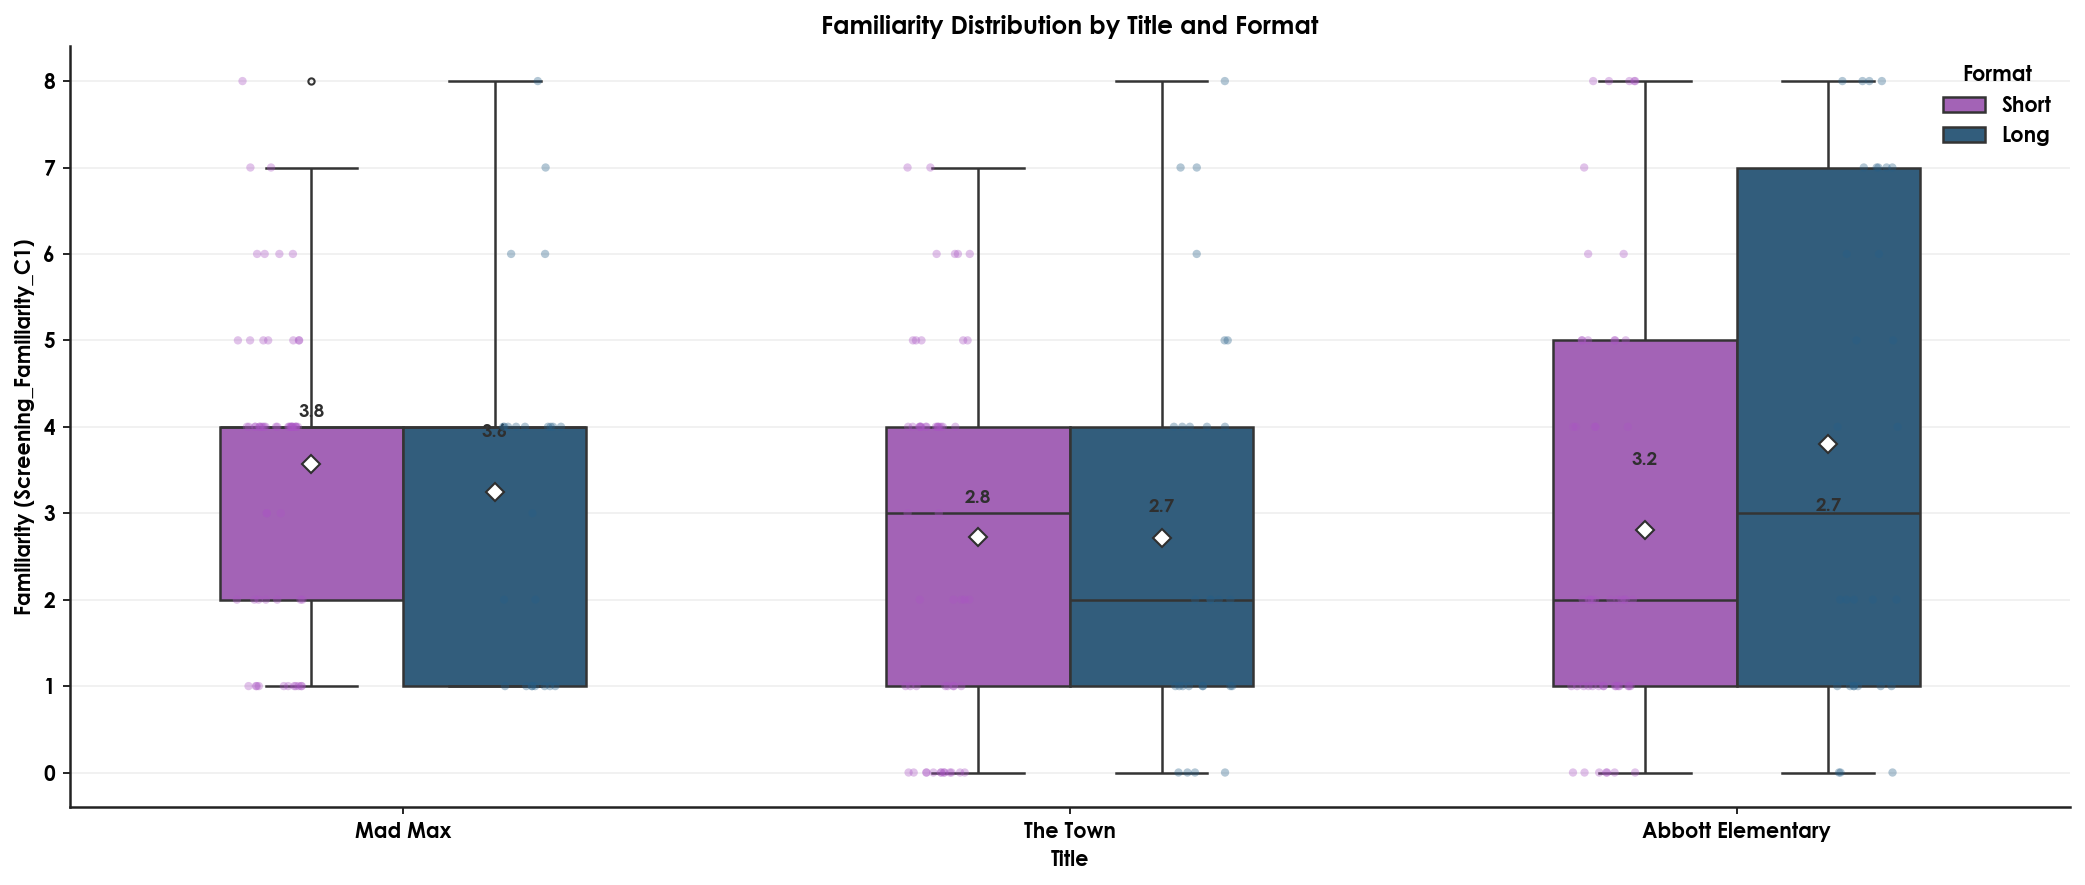

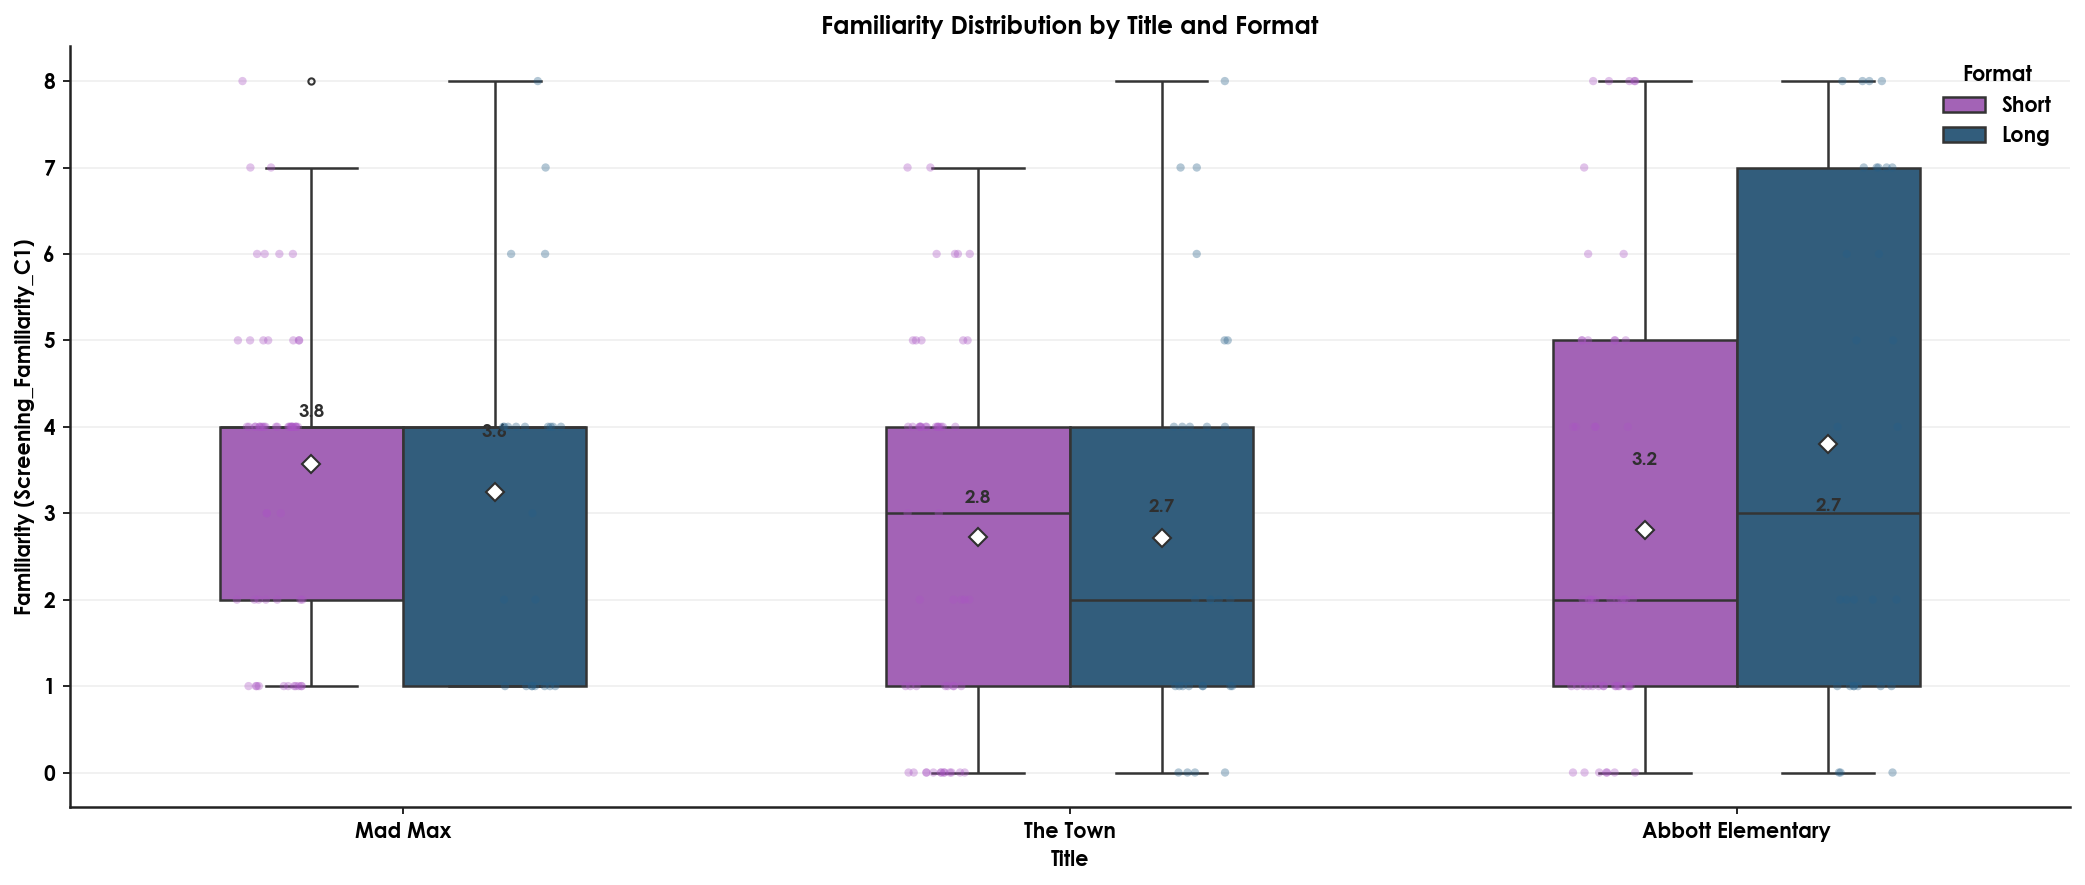

In [131]:
if "familiarity_long" not in globals():
    raise RuntimeError("Run the familiarity preparation cell before plotting.")

familiarity_plot_df = (
    familiarity_long
    .dropna(subset=["familiarity_raw"])
    .loc[lambda df: df["title"].isin(TARGET_TITLES)]
    .copy()
)

if familiarity_plot_df.empty:
    raise ValueError("No familiarity data available for the target titles.")

familiarity_plot_df["title"] = pd.Categorical(
    familiarity_plot_df["title"],
    categories=TARGET_TITLES,
    ordered=True,
)

palette = (
    format_palette if "format_palette" in globals() else {"Short": "#1f77b4", "Long": "#ff7f0e"}
)

fig, ax = plt.subplots(figsize=(14, 6), dpi=150)
sns.boxplot(
    data=familiarity_plot_df,
    x="title",
    y="familiarity_raw",
    hue="form",
    palette=palette,
    ax=ax,
    width=0.55,
    fliersize=3,
    linewidth=1.2,
)
sns.stripplot(
    data=familiarity_plot_df,
    x="title",
    y="familiarity_raw",
    hue="form",
    dodge=True,
    palette=palette,
    ax=ax,
    alpha=0.35,
    size=4,
    legend=False,
)

ax.set_xlabel("Title")
ax.set_ylabel(f"Familiarity ({FAMILIARITY_METRIC})")
ax.set_title("Familiarity Distribution by Title and Format")
ax.grid(axis="y", alpha=0.2)
sns.despine(ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Format", loc="upper right", frameon=False)

plt.tight_layout()
fig

## Exploratory Analysis 1 - Enjoyment and Recall
We combine the normalised enjoyment composite with the key post-recognition scores to test whether stronger enjoyment aligns with higher recall.

In [132]:
if "recognition_long" not in globals():
    raise ValueError("Recognition outputs from H2 are unavailable; run the H2 cells before starting E1.")
enjoyment_metric_df = enjoyment_long.loc[enjoyment_long["metric"] == ENJOYMENT_METRIC].copy()
if enjoyment_metric_df.empty:
    raise ValueError("Enjoyment composite for E1 (NormalisedCorrected) is unavailable in enjoyment_long.")
enjoyment_metric_df = enjoyment_metric_df.rename(columns={"value": "enjoyment_norm"})
enjoyment_metric_df = enjoyment_metric_df.dropna(subset=["enjoyment_norm"])
enjoyment_metric_df[id_column] = enjoyment_metric_df[id_column].astype(str)
recall_metric_df = recognition_long.rename(columns={"value": "recall_norm"}).copy()
recall_metric_df = recall_metric_df.dropna(subset=["recall_norm"])
recall_metric_df[id_column] = recall_metric_df[id_column].astype(str)
e1_base = (
    enjoyment_metric_df[[id_column, "form", "title", "enjoyment_norm"]]
    .merge(
        recall_metric_df[[id_column, "form", "title", "recall_norm"]],
        on=[id_column, "form", "title"],
        how="inner",
    )
    .dropna(subset=["enjoyment_norm", "recall_norm"])
)
if e1_base.empty:
    raise ValueError("No overlapping enjoyment and recall records available for E1 analysis.")
e1_base_summary = e1_base.groupby(["form", "title"], observed=True).size().rename("records").reset_index()
e1_base_summary.head()

form              title  records
0  Short  Abbott Elementary       30
1  Short            Mad Max       24
2  Short           The Town       24
3   Long  Abbott Elementary       27
4   Long            Mad Max       23

### Part 1: Overall Enjoyment-Recall Association
All titles and formats are pooled to quantify the overall link between normalised enjoyment and recall.

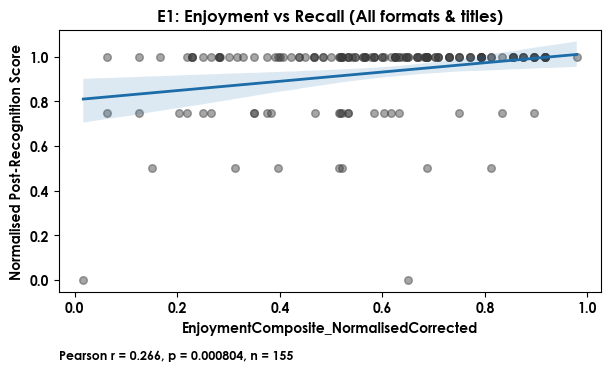

group  pearson_r   p_value    n
0  All formats and titles   0.266456  0.000804  155

In [133]:
overall_e1 = e1_base.copy()
if overall_e1["enjoyment_norm"].nunique() < 2 or overall_e1["recall_norm"].nunique() < 2:
    raise ValueError("Enjoyment or recall lacks sufficient variance for correlation analysis in Part 1.")
r_val, p_val = stats.pearsonr(overall_e1["enjoyment_norm"], overall_e1["recall_norm"])
fig, ax = plt.subplots(figsize=(6.5, 4.3))
fig.subplots_adjust(bottom=0.27, right=0.96)
sns.regplot(
    data=overall_e1,
    x="enjoyment_norm",
    y="recall_norm",
    scatter_kws={"alpha": 0.45, "s": 30, "color": "#3a3a3a"},
    line_kws={"color": "#1b6ca8", "linewidth": 2},
    ax=ax,
)
ax.set_xlabel("EnjoymentComposite_NormalisedCorrected")
ax.set_ylabel("Normalised Post-Recognition Score")
ax.set_title("E1: Enjoyment vs Recall (All formats & titles)")
annotation = f"Pearson r = {r_val:.3f}, p = {p_val:.3g}, n = {overall_e1.shape[0]}"
ax.text(0.0, -0.22, annotation, transform=ax.transAxes, ha="left", va="top", fontsize=9)
plt.show()
part1_e1_summary = pd.DataFrame([
    {
        "group": "All formats and titles",
        "pearson_r": r_val,
        "p_value": p_val,
        "n": overall_e1.shape[0],
    }
])
part1_e1_summary

### Part 2: Correlations by Format
Format-specific correlations and slopes highlight whether the enjoyment-recall link differs between Short and Long presentations.

(  format  pearson_r   p_value   n
 0  Short   0.280006  0.013032  78
 1   Long   0.241860  0.034076  77,
   format     slope                          test   p_value
 0  Short  0.335891  Interaction slope difference  0.198642
 1   Long  0.151167  Interaction slope difference  0.198642,
                           sum_sq     df         F    PR(>F)
 C(form)                 0.001748    1.0  0.065732  0.798004
 enjoyment_norm          0.265831    1.0  9.998708  0.001894
 enjoyment_norm:C(form)  0.044318    1.0  1.666943  0.198642
 Residual                4.014568  151.0       NaN       NaN)

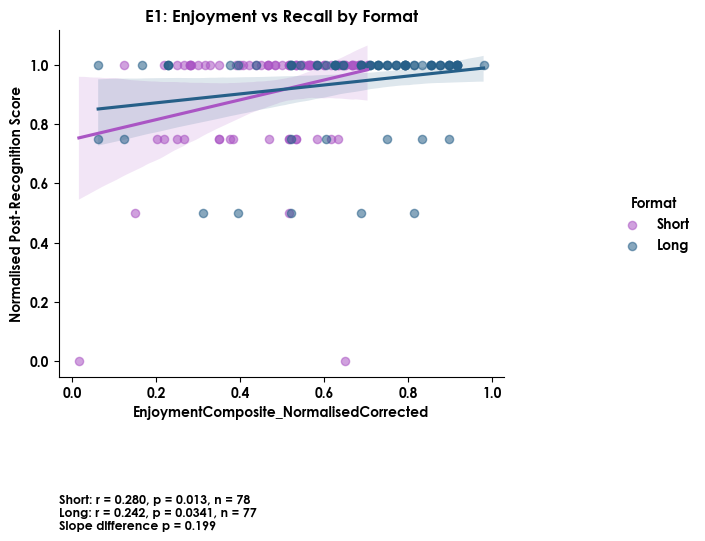

In [134]:
format_palette = {"Short": COLOR_MAP.get("Short", "#aa55c4"), "Long": COLOR_MAP.get("Long", "#265f88")}
format_summaries = []
for form, subset in overall_e1.groupby("form", observed=True):
    subset = subset.dropna(subset=["enjoyment_norm", "recall_norm"])
    if subset.shape[0] < 3 or subset["enjoyment_norm"].nunique() < 2 or subset["recall_norm"].nunique() < 2:
        r_form = np.nan
        p_form = np.nan
    else:
        r_form, p_form = stats.pearsonr(subset["enjoyment_norm"], subset["recall_norm"])
    format_summaries.append({
        "format": form,
        "pearson_r": r_form,
        "p_value": p_form,
        "n": subset.shape[0],
    })
format_model = smf.ols("recall_norm ~ enjoyment_norm * C(form)", data=overall_e1).fit()
format_anova_e1 = anova_lm(format_model, typ=2)
baseline_slope = format_model.params.get("enjoyment_norm", np.nan)
interaction_term = "enjoyment_norm:C(form)[T.Long]"
interaction_coef = format_model.params.get(interaction_term, np.nan)
long_slope = baseline_slope + interaction_coef if np.isfinite(baseline_slope) and np.isfinite(interaction_coef) else np.nan
format_slope_table_e1 = pd.DataFrame([
    {
        "format": "Short",
        "slope": baseline_slope,
    },
    {
        "format": "Long",
        "slope": long_slope,
    },
]).assign(test="Interaction slope difference", p_value=format_model.pvalues.get(interaction_term, np.nan))
format_plot = sns.lmplot(
    data=overall_e1,
    x="enjoyment_norm",
    y="recall_norm",
    hue="form",
    palette=format_palette,
    scatter_kws={"alpha": 0.55, "s": 35},
    height=4.2,
    aspect=1.25,
    legend=False,
)
format_plot.ax.set_xlabel("EnjoymentComposite_NormalisedCorrected")
format_plot.ax.set_ylabel("Normalised Post-Recognition Score")
format_plot.ax.set_title("E1: Enjoyment vs Recall by Format")
annotation_lines = [
    "{}: r = {}, p = {}, n = {}".format(
        row["format"],
        _fmt_stat(row["pearson_r"], "{:.3f}"),
        _fmt_stat(row["p_value"], "{:.3g}"),
        row["n"],
    )
    for row in format_summaries
]
interaction_text = f"Slope difference p = {_fmt_stat(format_model.pvalues.get(interaction_term, np.nan), '{:.3g}')}"
annotation_lines.append(interaction_text)
format_plot.ax.text(0.0, -0.34, "\n".join(annotation_lines), transform=format_plot.ax.transAxes, ha="left", va="top", fontsize=9)
format_plot.add_legend(title="Format", bbox_to_anchor=(1.02, 0.5), loc="center left")
format_e1_summary = pd.DataFrame(format_summaries)
format_e1_summary, format_slope_table_e1, format_anova_e1

### Part 3: Correlations by Title
Target titles are pooled across formats to surface title-specific enjoyment-recall trends and slope differences.

(               title  pearson_r   p_value   n
 0  Abbott Elementary   0.228267  0.087668  57
 1            Mad Max   0.317777  0.029505  47
 2           The Town   0.223901  0.114232  51,
                title     slope                        test   p_value
 0  Abbott Elementary  0.112417              Baseline slope       NaN
 1            Mad Max  0.319241  Slope vs Abbott Elementary  0.155998
 2           The Town  0.212926  Slope vs Abbott Elementary  0.545657,
                                                       sum_sq     df  \
 C(title, Treatment(reference='Abbott Elementary'))  0.130200    2.0   
 enjoyment_norm                                      0.272649    1.0   
 enjoyment_norm:C(title, Treatment(reference='Ab...  0.053002    2.0   
 Residual                                            3.877431  149.0   
 
                                                             F    PR(>F)  
 C(title, Treatment(reference='Abbott Elementary'))   2.501627  0.085389  
 enjoyment_norm   

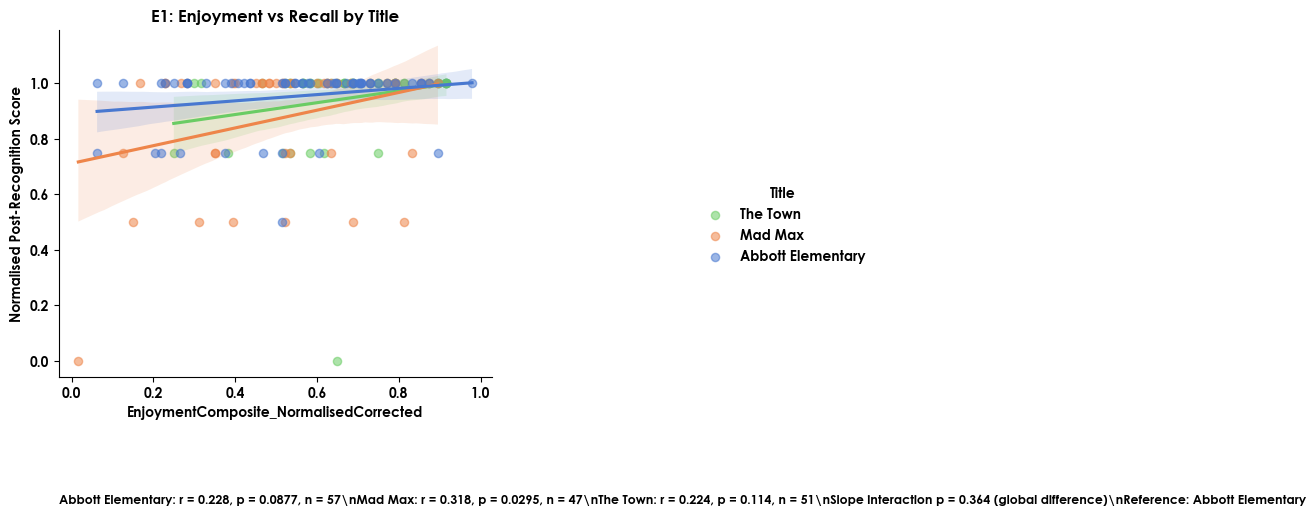

In [135]:
title_subset_e1 = e1_base.loc[e1_base["title"].isin(TARGET_TITLES)].copy()
if title_subset_e1.empty:
    print("No enjoyment/recall overlap for the specified target titles; skipping Part 3 plot.")
    title_e1_summary = pd.DataFrame()
    title_e1_slope_table = pd.DataFrame()
    title_anova_e1 = pd.DataFrame()
else:
    unique_titles = sorted(title_subset_e1["title"].unique())
    reference_title = unique_titles[0]
    title_palette = dict(zip(unique_titles, sns.color_palette("muted", n_colors=len(unique_titles))))
    title_summaries = []
    for title_name, subset in title_subset_e1.groupby("title", observed=True):
        subset = subset.dropna(subset=["enjoyment_norm", "recall_norm"])
        if subset.shape[0] < 3 or subset["enjoyment_norm"].nunique() < 2 or subset["recall_norm"].nunique() < 2:
            r_title = np.nan
            p_title = np.nan
        else:
            r_title, p_title = stats.pearsonr(subset["enjoyment_norm"], subset["recall_norm"])
        title_summaries.append({
            "title": title_name,
            "pearson_r": r_title,
            "p_value": p_title,
            "n": subset.shape[0],
        })
    title_model = smf.ols(
        f"recall_norm ~ enjoyment_norm * C(title, Treatment(reference='{reference_title}'))",
        data=title_subset_e1,
    ).fit()
    title_anova_e1 = anova_lm(title_model, typ=2)
    slope_entries = []
    base_slope = title_model.params.get("enjoyment_norm", np.nan)
    slope_entries.append({
        "title": reference_title,
        "slope": base_slope,
        "test": "Baseline slope",
        "p_value": np.nan,
    })
    for other in unique_titles[1:]:
        param_name = f"enjoyment_norm:C(title, Treatment(reference='{reference_title}'))[T.{other}]"
        interaction_coef = title_model.params.get(param_name, np.nan)
        slope_val = base_slope + interaction_coef if np.isfinite(base_slope) and np.isfinite(interaction_coef) else np.nan
        slope_entries.append({
            "title": other,
            "slope": slope_val,
            "test": f"Slope vs {reference_title}",
            "p_value": title_model.pvalues.get(param_name, np.nan),
        })
    interaction_rows = [idx for idx in title_anova_e1.index if idx.startswith("enjoyment_norm:C(title, Treatment(")]
    interaction_p = title_anova_e1.loc[interaction_rows[0], "PR(>F)"] if interaction_rows else np.nan
    title_e1_slope_table = pd.DataFrame(slope_entries)
    title_plot = sns.lmplot(
        data=title_subset_e1,
        x="enjoyment_norm",
        y="recall_norm",
        hue="title",
        palette=title_palette,
        scatter_kws={"alpha": 0.55, "s": 35},
        height=4.2,
        aspect=1.25,
        legend=False,
    )
    title_plot.ax.set_xlabel("EnjoymentComposite_NormalisedCorrected")
    title_plot.ax.set_ylabel("Normalised Post-Recognition Score")
    title_plot.ax.set_title("E1: Enjoyment vs Recall by Title")
    annotation_lines = [
        "{}: r = {}, p = {}, n = {}".format(
            row["title"],
            _fmt_stat(row["pearson_r"], "{:.3f}"),
            _fmt_stat(row["p_value"], "{:.3g}"),
            row["n"],
        )
        for row in title_summaries
    ]
    annotation_lines.append(
        f"Slope interaction p = {_fmt_stat(interaction_p, '{:.3g}')} (global difference)\\nReference: {reference_title}"
    )
    title_plot.ax.text(0.0, -0.34, "\\n".join(annotation_lines), transform=title_plot.ax.transAxes, ha="left", va="top", fontsize=9)
    title_plot.add_legend(title="Title", bbox_to_anchor=(1.02, 0.5), loc="center left")
    title_e1_summary = pd.DataFrame(title_summaries)
title_e1_summary, title_e1_slope_table, title_anova_e1

### Part 4: Title-Level Format Comparison
We contrast Long and Short enjoyment-recall correlations within each target title, flagging significant slopes and Long-Short differences.

(               title   form  pearson_r   p_value   n
 0  Abbott Elementary   Long   0.177865  0.374762  27
 1  Abbott Elementary  Short   0.189461  0.315985  30
 2            Mad Max   Long   0.158740  0.469409  23
 3            Mad Max  Short   0.667132  0.000370  24
 4           The Town   Long   0.068282  0.735052  27
 5           The Town  Short   0.009359  0.965382  24,
                title  delta_p_value
 0  Abbott Elementary       0.583078
 1            Mad Max       0.009289
 2           The Town       0.974800)

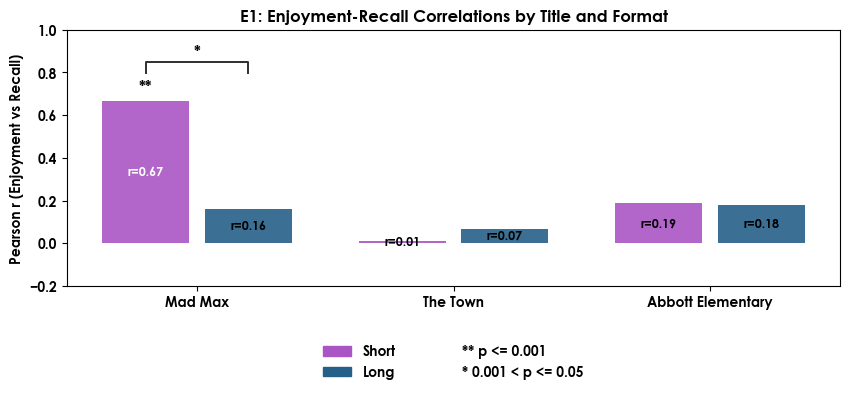

In [136]:
title_e1_correlation_records = []
title_e1_difference_records = []
for title_name, title_df in e1_base.groupby("title", observed=True):
    for form_name, form_df in title_df.groupby("form", observed=True):
        form_df = form_df.dropna(subset=["enjoyment_norm", "recall_norm"])
        if form_df.shape[0] < 3 or form_df["enjoyment_norm"].nunique() < 2 or form_df["recall_norm"].nunique() < 2:
            r_val = np.nan
            p_val = np.nan
        else:
            r_val, p_val = stats.pearsonr(form_df["enjoyment_norm"], form_df["recall_norm"])
        title_e1_correlation_records.append({
            "title": title_name,
            "form": form_name,
            "pearson_r": r_val,
            "p_value": p_val,
            "n": form_df.shape[0],
        })
    if title_df["form"].nunique() >= 2:
        diff_model = smf.ols("recall_norm ~ enjoyment_norm * C(form)", data=title_df).fit()
        interaction_name = "enjoyment_norm:C(form)[T.Long]"
        diff_p = diff_model.pvalues.get(interaction_name, np.nan)
    else:
        diff_p = np.nan
    title_e1_difference_records.append({
        "title": title_name,
        "delta_p_value": diff_p,
    })
title_e1_corr_df = pd.DataFrame(title_e1_correlation_records)
title_e1_diff_df = pd.DataFrame(title_e1_difference_records)
if title_e1_corr_df.empty:
    raise ValueError("No enjoyment/recall data available for Part 4 plot.")
title_order = [t for t in TARGET_TITLES if t in title_e1_corr_df["title"].unique()] or sorted(title_e1_corr_df["title"].unique())
form_order = ["Short", "Long"]
bar_width = 0.34
x_positions = np.arange(len(title_order))
fig, ax = plt.subplots(figsize=(8.6, 4.6))
max_bar_height = 0.0
min_bar_height = 0.0
for title_idx, title_name in enumerate(title_order):
    title_subset = title_e1_corr_df.loc[title_e1_corr_df["title"] == title_name]
    local_max = 0.0
    local_min = 0.0
    for offset_idx, form_name in enumerate(form_order):
        form_row = title_subset.loc[title_subset["form"] == form_name]
        if form_row.empty:
            continue
        r_val = form_row["pearson_r"].iloc[0]
        p_val = form_row["p_value"].iloc[0]
        if not np.isfinite(r_val):
            continue
        bar_x = x_positions[title_idx] + (offset_idx - 0.5) * (bar_width + 0.06)
        color = COLOR_MAP.get(form_name, COLOR_MAP.get("Default", "#1f77b4"))
        ax.bar(bar_x, r_val, width=bar_width, color=color, alpha=0.9)
        local_max = max(local_max, r_val, 0.0)
        local_min = min(local_min, r_val, 0.0)
        annotation_label = significance_label(p_val)
        if annotation_label:
            text_offset = 0.035 if r_val >= 0 else -0.05
            va = "bottom" if r_val >= 0 else "top"
            ax.text(bar_x, r_val + text_offset, annotation_label, ha="center", va=va, fontsize=11, fontweight="bold")
        bar_text_color = "white" if r_val >= 0.25 else "black"
        text_y = r_val / 2 if r_val != 0 else 0.015
        ax.text(bar_x, text_y, f"r={r_val:.2f}", ha="center", va="center", color=bar_text_color, fontsize=9)
    max_bar_height = max(max_bar_height, local_max)
    min_bar_height = min(min_bar_height, local_min)
    diff_row = title_e1_diff_df.loc[title_e1_diff_df["title"] == title_name]
    if not diff_row.empty:
        diff_p = diff_row["delta_p_value"].iloc[0]
        diff_label = significance_label(diff_p)
        if diff_label:
            x_center = x_positions[title_idx]
            half_span = (bar_width + 0.06) / 2
            bracket_height = local_max + 0.18
            ax.plot(
                [x_center - half_span, x_center - half_span, x_center + half_span, x_center + half_span],
                [bracket_height - 0.05, bracket_height, bracket_height, bracket_height - 0.05],
                color="#2f2f2f",
                linewidth=1.4,
            )
            ax.text(x_center, bracket_height + 0.02, diff_label, ha="center", va="bottom", fontsize=11, fontweight="bold")
ax.set_xticks(x_positions)
ax.set_xticklabels(title_order)
ax.set_ylabel("Pearson r (Enjoyment vs Recall)")
ax.set_title("E1: Enjoyment-Recall Correlations by Title and Format")
lower_bound = min(-0.35, min_bar_height - 0.18)
upper_bound = max(0.1, max_bar_height + 0.25)
ax.set_ylim(lower_bound, upper_bound)
format_handles = [
    patches.Patch(color=COLOR_MAP.get(form_name, COLOR_MAP.get("Default", "#1f77b4")), label=form_name)
    for form_name in form_order
    if form_name in title_e1_corr_df["form"].unique()
]
sign_handles = [
    plt.Line2D([], [], color="black", marker="", linestyle="None", markersize=11, label="** p <= 0.001"),
    plt.Line2D([], [], color="black", marker="", linestyle="None", markersize=11, label="* 0.001 < p <= 0.05"),
]
legend_handles = format_handles + sign_handles
ax.legend(
    legend_handles,
    [handle.get_label() for handle in legend_handles],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=2,
    frameon=False,
)
plt.ylim(-0.2, 1)
plt.tight_layout(rect=(0, 0.08, 1, 1))
title_e1_corr_df.sort_values(["title", "form"]).reset_index(drop=True), title_e1_diff_df.sort_values("title").reset_index(drop=True)

In [137]:
# E1 summary tables and one-liners
if 'part1_e1_summary' in globals() and not part1_e1_summary.empty:
    display_part1 = part1_e1_summary.copy()
    if 'p_value' in display_part1.columns:
        display_part1["p_value"] = display_part1["p_value"].apply(format_p_value)
    if 'pearson_r' in display_part1.columns:
        display_part1["pearson_r"] = display_part1["pearson_r"].round(3)
    display(display_part1.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    if 'overall_e1' in globals():
        long_mean = overall_e1.loc[overall_e1["form"] == "Long", "recall_norm"].mean()
        short_mean = overall_e1.loc[overall_e1["form"] == "Short", "recall_norm"].mean()
        extra_items = []
        if 'r_val' in globals() and isinstance(r_val, Number) and np.isfinite(r_val):
            extra_items.append(f"Pearson r={r_val:.3f}")
        if 'p_val' in globals() and isinstance(p_val, Number) and np.isfinite(p_val):
            extra_items.append(format_p_value(p_val))
        long_count = overall_e1.loc[overall_e1["form"] == "Long", id_column].nunique()
        short_count = overall_e1.loc[overall_e1["form"] == "Short", id_column].nunique()
        if long_count:
            extra_items.append(f"n_long={int(long_count)}")
        if short_count:
            extra_items.append(f"n_short={int(short_count)}")
        extra_note = ", ".join(extra_items) if extra_items else None
        print_long_short_summary(
            label="E1 Part 1 (All formats)",
            long_mean=long_mean,
            short_mean=short_mean,
            extra_note=extra_note
        )
else:
    print("E1 Part 1 summary: results unavailable.")

if 'format_e1_summary' in globals() and not format_e1_summary.empty:
    formatted_format = format_e1_summary.copy()
    formatted_format["pearson_r"] = formatted_format["pearson_r"].round(3)
    formatted_format["p_value"] = formatted_format["p_value"].apply(format_p_value)
    display(formatted_format.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    interaction_note = None
    if 'format_model' in globals():
        interaction_term = "enjoyment_norm:C(form)[T.Long]"
        interaction_p = format_model.pvalues.get(interaction_term, np.nan)
        if np.isfinite(interaction_p):
            interaction_note = f"Slope diff {format_p_value(interaction_p)}"
    long_mean = overall_e1.loc[overall_e1["form"] == "Long", "recall_norm"].mean() if 'overall_e1' in globals() else np.nan
    short_mean = overall_e1.loc[overall_e1["form"] == "Short", "recall_norm"].mean() if 'overall_e1' in globals() else np.nan
    sample_items = []
    long_row = formatted_format.loc[formatted_format["format"] == "Long", "n"]
    short_row = formatted_format.loc[formatted_format["format"] == "Short", "n"]
    if not long_row.empty and isinstance(long_row.iloc[0], Number) and np.isfinite(long_row.iloc[0]):
        sample_items.append(f"n_long={int(long_row.iloc[0])}")
    if not short_row.empty and isinstance(short_row.iloc[0], Number) and np.isfinite(short_row.iloc[0]):
        sample_items.append(f"n_short={int(short_row.iloc[0])}")
    if interaction_note:
        sample_items.append(interaction_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="E1 Part 2 (By format)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("E1 Part 2 summary: format correlations unavailable.")

if 'title_e1_summary' in globals() and not title_e1_summary.empty:
    formatted_title = title_e1_summary.copy()
    formatted_title["pearson_r"] = formatted_title["pearson_r"].round(3)
    formatted_title["p_value"] = formatted_title["p_value"].apply(format_p_value)
    display(formatted_title.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    interaction_note = None
    if 'title_anova_e1' in globals() and not title_anova_e1.empty:
        interaction_rows = [idx for idx in title_anova_e1.index if idx.startswith("enjoyment_norm:C(")]
        if interaction_rows:
            interaction_note = f"Global slope diff {format_p_value(title_anova_e1.loc[interaction_rows[0], 'PR(>F)'])}"
    long_mean = title_subset_e1.loc[title_subset_e1["form"] == "Long", "recall_norm"].mean() if 'title_subset_e1' in globals() else np.nan
    short_mean = title_subset_e1.loc[title_subset_e1["form"] == "Short", "recall_norm"].mean() if 'title_subset_e1' in globals() else np.nan
    sample_items = []
    if 'title_subset_e1' in globals():
        long_count = title_subset_e1.loc[title_subset_e1["form"] == "Long", id_column].nunique()
        short_count = title_subset_e1.loc[title_subset_e1["form"] == "Short", id_column].nunique()
        if long_count:
            sample_items.append(f"n_long={int(long_count)}")
        if short_count:
            sample_items.append(f"n_short={int(short_count)}")
    if interaction_note:
        sample_items.append(interaction_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="E1 Part 3 (By title)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("E1 Part 3 summary: title-level correlations unavailable.")

if 'title_e1_corr_df' in globals() and not title_e1_corr_df.empty:
    display_title_corr = title_e1_corr_df.copy()
    display_title_corr["pearson_r"] = display_title_corr["pearson_r"].round(3)
    display_title_corr["p_value"] = display_title_corr["p_value"].apply(format_p_value)
    display(display_title_corr.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    long_mean = e1_base.loc[(e1_base["form"] == "Long") & (e1_base["title"].isin(TARGET_TITLES)), "recall_norm"].mean() if 'e1_base' in globals() else np.nan
    short_mean = e1_base.loc[(e1_base["form"] == "Short") & (e1_base["title"].isin(TARGET_TITLES)), "recall_norm"].mean() if 'e1_base' in globals() else np.nan
    diff_note = None
    if 'title_e1_diff_df' in globals() and not title_e1_diff_df.empty:
        best_row = title_e1_diff_df.loc[title_e1_diff_df['delta_p_value'].idxmin()]
        diff_note = f"Form slope diff {format_p_value(best_row['delta_p_value'])}"
    sample_items = []
    if 'e1_base' in globals():
        long_count = e1_base.loc[(e1_base["form"] == "Long") & (e1_base["title"].isin(TARGET_TITLES)), id_column].nunique()
        short_count = e1_base.loc[(e1_base["form"] == "Short") & (e1_base["title"].isin(TARGET_TITLES)), id_column].nunique()
        if long_count:
            sample_items.append(f"n_long={int(long_count)}")
        if short_count:
            sample_items.append(f"n_short={int(short_count)}")
    if diff_note:
        sample_items.append(diff_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="E1 Part 4 (Title-format comparison)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("E1 Part 4 summary: title-format correlation table unavailable.")

group  Pearson r  p-value    n
0  All formats and titles      0.266  p<0.001  155

E1 Part 1 (All formats): Long form (94%) showed 3% greater than short form (91%) (Pearson r=0.178, p=0.375, n_long=77, n_short=78).


format  Pearson r  p-value   n
0  Short      0.280  p=0.013  78
1   Long      0.242  p=0.034  77

E1 Part 2 (By format): Long form (94%) showed 3% greater than short form (91%) (n_long=77, n_short=78, Slope diff p=0.199).


title  Pearson r  p-value   n
0  Abbott Elementary      0.228  p=0.088  57
1            Mad Max      0.318  p=0.030  47
2           The Town      0.224  p=0.114  51

E1 Part 3 (By title): Long form (94%) showed 3% greater than short form (91%) (n_long=77, n_short=78, Global slope diff p=0.364).


title   form  Pearson r  p-value   n
0  Abbott Elementary  Short      0.189  p=0.316  30
1  Abbott Elementary   Long      0.178  p=0.375  27
2            Mad Max  Short      0.667  p<0.001  24
3            Mad Max   Long      0.159  p=0.469  23
4           The Town  Short      0.009  p=0.965  24
5           The Town   Long      0.068  p=0.735  27

E1 Part 4 (Title-format comparison): Long form (94%) showed 3% greater than short form (91%) (n_long=77, n_short=78, Form slope diff p=0.009).


In [138]:
# Export Exploratory Analysis 1 (enjoyment vs recognition) artefacts
e1_section_label = "Exploratory 1 - Enjoyment and Recall"
if "part1_e1_summary" in globals() and not part1_e1_summary.empty and "overall_e1" in globals():
    record_cols = [col for col in [id_column, "form", "title", "enjoyment_norm", "recall_norm"] if col in overall_e1.columns]
    frames = [("part1_e1_summary", part1_e1_summary.copy())]
    if record_cols:
        frames.append(("overall_e1_records", overall_e1[record_cols].reset_index(drop=True).copy()))
    metadata = {"n_records": int(overall_e1.shape[0])}
    if "pearson_r" in part1_e1_summary.columns and not part1_e1_summary["pearson_r"].empty:
        r_value = part1_e1_summary["pearson_r"].iloc[0]
        metadata["pearson_r"] = float(r_value) if isinstance(r_value, Number) and np.isfinite(r_value) else np.nan
    if "p_value" in part1_e1_summary.columns and not part1_e1_summary["p_value"].empty:
        p_value = part1_e1_summary["p_value"].iloc[0]
        metadata["p_value"] = float(p_value) if isinstance(p_value, Number) and np.isfinite(p_value) else np.nan
    _export_plot_bundle(
        section_label=e1_section_label,
        part_label="Part 1 - Overall association",
        title="E1: Enjoyment vs Key Recall (All formats)",
        frames=frames,
        metadata=metadata,
        filename_suffix="e1_part1_overall",
    )
else:
    print("E1 Part 1 export skipped: required tables unavailable.")

if (
    "format_e1_summary" in globals()
    and not format_e1_summary.empty
    and "format_slope_table_e1" in globals()
    and "format_anova_e1" in globals()
    and "overall_e1" in globals()
 ):
    record_cols = [col for col in [id_column, "form", "title", "enjoyment_norm", "recall_norm"] if col in overall_e1.columns]
    frames = [
        ("format_e1_summary", format_e1_summary.copy()),
        ("format_slope_table_e1", format_slope_table_e1.copy()),
        ("format_anova_e1", format_anova_e1.copy()),
    ]
    if record_cols:
        frames.append(("format_e1_records", overall_e1[record_cols].reset_index(drop=True).copy()))
    interaction_term = "enjoyment_norm:C(form)[T.Long]"
    interaction_p = np.nan
    if "format_model" in globals():
        interaction_p = format_model.pvalues.get(interaction_term, np.nan)
    metadata = {
        "interaction_term": interaction_term,
        "interaction_p_value": float(interaction_p) if isinstance(interaction_p, Number) and np.isfinite(interaction_p) else np.nan,
        "n_records": int(overall_e1.shape[0]),
    }
    _export_plot_bundle(
        section_label=e1_section_label,
        part_label="Part 2 - Format comparison",
        title="E1: Enjoyment vs Recall by Format",
        frames=frames,
        metadata=metadata,
        filename_suffix="e1_part2_format",
    )
else:
    print("E1 Part 2 export skipped: required tables unavailable.")

if (
    "title_e1_summary" in globals()
    and not title_e1_summary.empty
    and "title_e1_slope_table" in globals()
    and "title_anova_e1" in globals()
 ):
    frames = [
        ("title_e1_summary", title_e1_summary.copy()),
        ("title_e1_slope_table", title_e1_slope_table.copy()),
        ("title_anova_e1", title_anova_e1.copy()),
    ]
    if "title_subset_e1" in globals() and not title_subset_e1.empty:
        cols = [col for col in [id_column, "form", "title", "enjoyment_norm", "recall_norm"] if col in title_subset_e1.columns]
        if cols:
            frames.append(("title_subset_e1_records", title_subset_e1[cols].reset_index(drop=True).copy()))
    interaction_rows = [idx for idx in title_anova_e1.index if isinstance(idx, str) and idx.startswith("enjoyment_norm:C(")]
    interaction_p = title_anova_e1.loc[interaction_rows[0], "PR(>F)"] if interaction_rows else np.nan
    metadata = {
        "reference_title": reference_title if "reference_title" in globals() else None,
        "interaction_p_value": float(interaction_p) if isinstance(interaction_p, Number) and np.isfinite(interaction_p) else np.nan,
        "n_titles": int(title_e1_summary["title"].nunique()),
    }
    _export_plot_bundle(
        section_label=e1_section_label,
        part_label="Part 3 - Title comparison",
        title="E1: Enjoyment vs Recall by Title",
        frames=frames,
        metadata=metadata,
        filename_suffix="e1_part3_title",
    )
else:
    print("E1 Part 3 export skipped: required tables unavailable.")

if (
    "title_e1_corr_df" in globals() and not title_e1_corr_df.empty
    and "title_e1_diff_df" in globals() and not title_e1_diff_df.empty
 ):
    frames = [
        ("title_e1_format_correlations", title_e1_corr_df.copy()),
        ("title_e1_format_differences", title_e1_diff_df.copy()),
    ]
    metadata = {
        "n_titles": int(title_e1_corr_df["title"].nunique()),
        "forms": sorted(title_e1_corr_df["form"].unique()),
    }
    if not title_e1_diff_df["delta_p_value"].isna().all():
        best_diff = title_e1_diff_df.loc[title_e1_diff_df["delta_p_value"].idxmin()]
        metadata["strongest_format_effect_title"] = best_diff.get("title")
        diff_p = best_diff.get("delta_p_value")
        metadata["strongest_format_effect_p"] = float(diff_p) if isinstance(diff_p, Number) and np.isfinite(diff_p) else np.nan
    _export_plot_bundle(
        section_label=e1_section_label,
        part_label="Part 4 - Title x Format correlations",
        title="E1: Enjoyment-Recall Correlations by Title and Format",
        frames=frames,
        metadata=metadata,
        filename_suffix="e1_part4_title_format",
    )
else:
    print("E1 Part 4 export skipped: required tables unavailable.")

## Exploratory Analysis 1 - Enjoyment and Open Ended Recall
We mirror the original E1 workflow but substitute the KMS open-ended recall composite used in Hypothesis 4, enabling direct comparisons between enjoyment and free-response recall outcomes.

In [139]:
if "open_recall_long_kms" not in globals():
    raise ValueError("Open-ended recall KMS outputs are unavailable; run the Stage 3 recall preparation cells before starting E1 KMS.")
enjoyment_metric_kms = enjoyment_long.loc[enjoyment_long["metric"] == ENJOYMENT_METRIC].copy()
if enjoyment_metric_kms.empty:
    raise ValueError("Enjoyment composite for E1 (NormalisedCorrected) is unavailable in enjoyment_long.")
enjoyment_metric_kms = enjoyment_metric_kms.rename(columns={"value": "enjoyment_norm"}).dropna(subset=["enjoyment_norm"])
enjoyment_metric_kms[id_column] = enjoyment_metric_kms[id_column].astype(str)
recall_metric_kms = open_recall_long_kms.rename(columns={"value": "recall_kms"}).dropna(subset=["recall_kms"]).copy()
recall_metric_kms[id_column] = recall_metric_kms[id_column].astype(str)
e1_kms_base = (
    enjoyment_metric_kms[[id_column, "form", "title", "enjoyment_norm"]]
    .merge(
        recall_metric_kms[[id_column, "form", "title", "recall_kms"]],
        on=[id_column, "form", "title"],
        how="inner",
    )
    .dropna(subset=["enjoyment_norm", "recall_kms"])
)
if e1_kms_base.empty:
    raise ValueError("No overlapping enjoyment and open-ended recall KMS records available for E1 KMS analysis.")
e1_kms_base_summary = e1_kms_base.groupby(["form", "title"], observed=True).size().rename("records").reset_index()
e1_kms_base_summary.head()

form              title  records
0  Short  Abbott Elementary       29
1  Short            Mad Max       26
2  Short           The Town       24
3   Long  Abbott Elementary       26
4   Long            Mad Max       23

### Part 1: Overall Enjoyment–Open Ended Recall Association
All titles and formats are pooled to gauge the aggregate relationship between normalised enjoyment and the KMS open-ended recall composite.

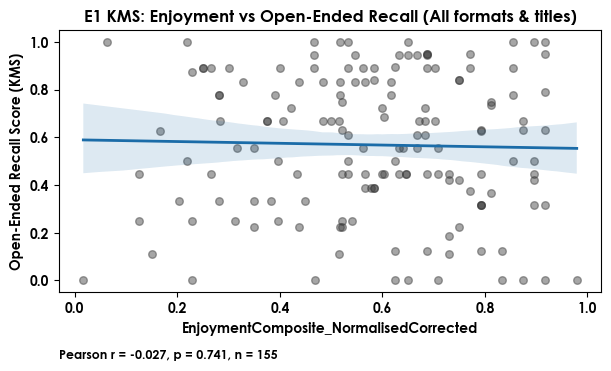

group  pearson_r   p_value    n
0  All formats and titles  -0.026772  0.740893  155

In [140]:
overall_e1_kms = e1_kms_base.copy()
if overall_e1_kms.shape[0] < 3 or overall_e1_kms["enjoyment_norm"].nunique() < 2 or overall_e1_kms["recall_kms"].nunique() < 2:
    raise ValueError("Enjoyment or open-ended recall lacks sufficient variance for correlation analysis in Part 1 (KMS).")
r_val_kms, p_val_kms = stats.pearsonr(overall_e1_kms["enjoyment_norm"], overall_e1_kms["recall_kms"])
fig, ax = plt.subplots(figsize=(6.5, 4.3))
fig.subplots_adjust(bottom=0.27, right=0.96)
sns.regplot(
    data=overall_e1_kms,
    x="enjoyment_norm",
    y="recall_kms",
    scatter_kws={"alpha": 0.45, "s": 30, "color": "#3a3a3a"},
    line_kws={"color": "#1b6ca8", "linewidth": 2},
    ax=ax,
 )
ax.set_xlabel("EnjoymentComposite_NormalisedCorrected")
ax.set_ylabel("Open-Ended Recall Score (KMS)")
ax.set_title("E1 KMS: Enjoyment vs Open-Ended Recall (All formats & titles)")
annotation_kms = f"Pearson r = {r_val_kms:.3f}, p = {p_val_kms:.3g}, n = {overall_e1_kms.shape[0]}"
ax.text(0.0, -0.22, annotation_kms, transform=ax.transAxes, ha="left", va="top", fontsize=9)
plt.show()
part1_e1_kms_summary = pd.DataFrame([
    {
        "group": "All formats and titles",
        "pearson_r": r_val_kms,
        "p_value": p_val_kms,
        "n": overall_e1_kms.shape[0],
    }
 ])
part1_e1_kms_summary

### Part 2: Format-Specific Enjoyment–Open Ended Recall Associations
Format-specific correlations highlight whether the enjoyment/KMS recall link differs between Short and Long presentations.

(  format  pearson_r   p_value   n
 0  Short   0.211250  0.061643  79
 1   Long   0.045198  0.698244  76,
   format     slope                          test   p_value
 0  Short  0.347893  Interaction slope difference  0.263541
 1   Long  0.064752  Interaction slope difference  0.263541,
                            sum_sq     df          F    PR(>F)
 C(form)                  0.992369    1.0  12.473873  0.000548
 enjoyment_norm           0.155619    1.0   1.956098  0.163982
 enjoyment_norm:C(form)   0.100195    1.0   1.259428  0.263541
 Residual                12.012926  151.0        NaN       NaN)

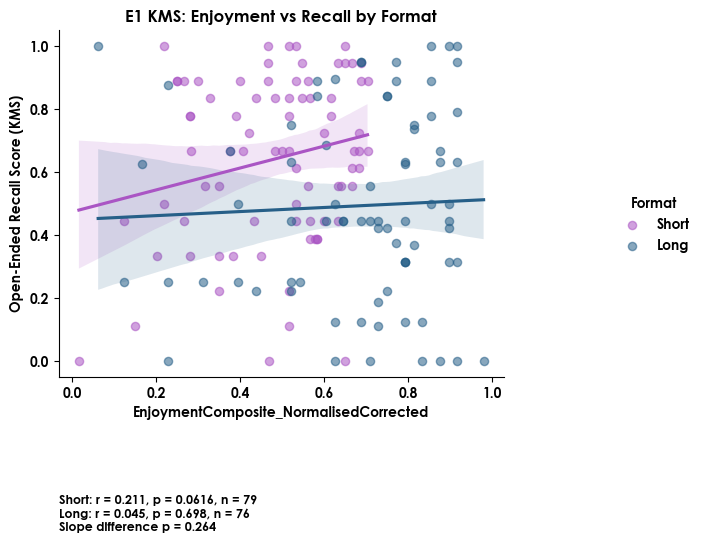

In [141]:
format_palette_kms = {"Short": COLOR_MAP.get("Short", "#aa55c4"), "Long": COLOR_MAP.get("Long", "#265f88")}
format_summaries_kms = []
for form_name, subset in overall_e1_kms.groupby("form", observed=True):
    subset = subset.dropna(subset=["enjoyment_norm", "recall_kms"])
    if subset.shape[0] < 3 or subset["enjoyment_norm"].nunique() < 2 or subset["recall_kms"].nunique() < 2:
        r_form = np.nan
        p_form = np.nan
    else:
        r_form, p_form = stats.pearsonr(subset["enjoyment_norm"], subset["recall_kms"])
    format_summaries_kms.append({
        "format": form_name,
        "pearson_r": r_form,
        "p_value": p_form,
        "n": subset.shape[0],
    })
format_model_kms = smf.ols("recall_kms ~ enjoyment_norm * C(form)", data=overall_e1_kms).fit()
format_anova_e1_kms = anova_lm(format_model_kms, typ=2)
baseline_slope_kms = format_model_kms.params.get("enjoyment_norm", np.nan)
interaction_term_kms = "enjoyment_norm:C(form)[T.Long]"
interaction_coef_kms = format_model_kms.params.get(interaction_term_kms, np.nan)
long_slope_kms = baseline_slope_kms + interaction_coef_kms if np.isfinite(baseline_slope_kms) and np.isfinite(interaction_coef_kms) else np.nan
format_slope_table_e1_kms = (
    pd.DataFrame([
        {"format": "Short", "slope": baseline_slope_kms},
        {"format": "Long", "slope": long_slope_kms},
    ])
    .assign(test="Interaction slope difference", p_value=format_model_kms.pvalues.get(interaction_term_kms, np.nan))
)
format_plot_kms = sns.lmplot(
    data=overall_e1_kms,
    x="enjoyment_norm",
    y="recall_kms",
    hue="form",
    palette=format_palette_kms,
    scatter_kws={"alpha": 0.55, "s": 35},
    height=4.2,
    aspect=1.25,
    legend=False,
 )
format_plot_kms.ax.set_xlabel("EnjoymentComposite_NormalisedCorrected")
format_plot_kms.ax.set_ylabel("Open-Ended Recall Score (KMS)")
format_plot_kms.ax.set_title("E1 KMS: Enjoyment vs Recall by Format")
annotation_lines_kms = [
    "{}: r = {}, p = {}, n = {}".format(
        row["format"],
        _fmt_stat(row["pearson_r"], "{:.3f}"),
        _fmt_stat(row["p_value"], "{:.3g}"),
        row["n"],
    )
    for row in format_summaries_kms
]
interaction_text_kms = f"Slope difference p = {_fmt_stat(format_model_kms.pvalues.get(interaction_term_kms, np.nan), '{:.3g}')}"
annotation_lines_kms.append(interaction_text_kms)
format_plot_kms.ax.text(0.0, -0.34, "\n".join(annotation_lines_kms), transform=format_plot_kms.ax.transAxes, ha="left", va="top", fontsize=9)
format_plot_kms.add_legend(title="Format", bbox_to_anchor=(1.02, 0.5), loc="center left")
format_e1_kms_summary = pd.DataFrame(format_summaries_kms)
format_e1_kms_summary, format_slope_table_e1_kms, format_anova_e1_kms

### Part 3: Title-Level Enjoyment–Open Ended Recall Trends
Target titles are pooled across formats to surface title-specific enjoyment/KMS recall patterns and slope differences.

(               title  pearson_r   p_value   n
 0  Abbott Elementary  -0.175176  0.200821  55
 1            Mad Max   0.037351  0.798879  49
 2           The Town  -0.178318  0.210591  51,
                title     slope                        test   p_value
 0  Abbott Elementary -0.240746              Baseline slope       NaN
 1            Mad Max  0.050557  Slope vs Abbott Elementary  0.268934
 2           The Town -0.282603  Slope vs Abbott Elementary  0.888954,
                                                        sum_sq     df  \
 C(title, Treatment(reference='Abbott Elementary'))   0.728066    2.0   
 enjoyment_norm                                       0.133164    1.0   
 enjoyment_norm:C(title, Treatment(reference='Ab...   0.135519    2.0   
 Residual                                            12.241905  149.0   
 
                                                            F    PR(>F)  
 C(title, Treatment(reference='Abbott Elementary'))  4.430756  0.013514  
 enjoyment_norm

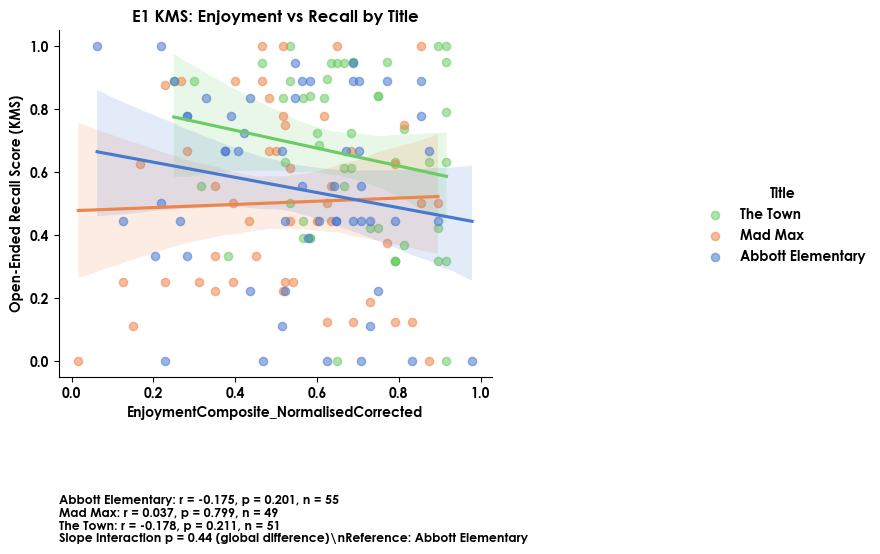

In [142]:
title_subset_e1_kms = e1_kms_base.loc[e1_kms_base["title"].isin(TARGET_TITLES)].copy()
if title_subset_e1_kms.empty:
    print("No enjoyment/open-ended recall overlap for the specified target titles; skipping Part 3 plot.")
    title_e1_kms_summary = pd.DataFrame()
    title_e1_kms_slope_table = pd.DataFrame()
    title_anova_e1_kms = pd.DataFrame()
else:
    unique_titles = sorted(title_subset_e1_kms["title"].unique())
    reference_title = unique_titles[0]
    title_palette_kms = dict(zip(unique_titles, sns.color_palette("muted", n_colors=len(unique_titles))))
    title_summaries_kms = []
    for title_name, subset in title_subset_e1_kms.groupby("title", observed=True):
        subset = subset.dropna(subset=["enjoyment_norm", "recall_kms"])
        if subset.shape[0] < 3 or subset["enjoyment_norm"].nunique() < 2 or subset["recall_kms"].nunique() < 2:
            r_title = np.nan
            p_title = np.nan
        else:
            r_title, p_title = stats.pearsonr(subset["enjoyment_norm"], subset["recall_kms"])
        title_summaries_kms.append({
            "title": title_name,
            "pearson_r": r_title,
            "p_value": p_title,
            "n": subset.shape[0],
        })
    title_model_kms = smf.ols(
        f"recall_kms ~ enjoyment_norm * C(title, Treatment(reference='{reference_title}'))",
        data=title_subset_e1_kms,
    ).fit()
    title_anova_e1_kms = anova_lm(title_model_kms, typ=2)
    slope_entries_kms = []
    base_slope_kms = title_model_kms.params.get("enjoyment_norm", np.nan)
    slope_entries_kms.append({
        "title": reference_title,
        "slope": base_slope_kms,
        "test": "Baseline slope",
        "p_value": np.nan,
    })
    for other in unique_titles[1:]:
        param_name = f"enjoyment_norm:C(title, Treatment(reference='{reference_title}'))[T.{other}]"
        interaction_coef = title_model_kms.params.get(param_name, np.nan)
        slope_val = base_slope_kms + interaction_coef if np.isfinite(base_slope_kms) and np.isfinite(interaction_coef) else np.nan
        slope_entries_kms.append({
            "title": other,
            "slope": slope_val,
            "test": f"Slope vs {reference_title}",
            "p_value": title_model_kms.pvalues.get(param_name, np.nan),
        })
    interaction_rows = [idx for idx in title_anova_e1_kms.index if idx.startswith("enjoyment_norm:C(title, Treatment(")]
    interaction_p_kms = title_anova_e1_kms.loc[interaction_rows[0], "PR(>F)"] if interaction_rows else np.nan
    title_e1_kms_slope_table = pd.DataFrame(slope_entries_kms)
    title_plot_kms = sns.lmplot(
        data=title_subset_e1_kms,
        x="enjoyment_norm",
        y="recall_kms",
        hue="title",
        palette=title_palette_kms,
        scatter_kws={"alpha": 0.55, "s": 35},
        height=4.2,
        aspect=1.25,
        legend=False,
    )
    title_plot_kms.ax.set_xlabel("EnjoymentComposite_NormalisedCorrected")
    title_plot_kms.ax.set_ylabel("Open-Ended Recall Score (KMS)")
    title_plot_kms.ax.set_title("E1 KMS: Enjoyment vs Recall by Title")
    annotation_lines = [
        "{}: r = {}, p = {}, n = {}".format(
            row["title"],
            _fmt_stat(row["pearson_r"], "{:.3f}"),
            _fmt_stat(row["p_value"], "{:.3g}"),
            row["n"],
        )
        for row in title_summaries_kms
]
    annotation_lines.append(
        f"Slope interaction p = {_fmt_stat(interaction_p_kms, '{:.3g}')} (global difference)\\nReference: {reference_title}"
    )
    title_plot_kms.ax.text(0.0, -0.34, "\n".join(annotation_lines), transform=title_plot_kms.ax.transAxes, ha="left", va="top", fontsize=9)
    title_plot_kms.add_legend(title="Title", bbox_to_anchor=(1.02, 0.5), loc="center left")
    title_e1_kms_summary = pd.DataFrame(title_summaries_kms)
title_e1_kms_summary, title_e1_kms_slope_table, title_anova_e1_kms

### Part 4: Title-by-Format Enjoyment–Open Ended Recall Comparison
We contrast Long and Short enjoyment/KMS recall correlations within each target title, flagging slope differences between formats.

(               title   form  pearson_r   p_value   n
 0  Abbott Elementary   Long  -0.107670  0.600599  26
 1  Abbott Elementary  Short   0.180884  0.347719  29
 2            Mad Max   Long  -0.041848  0.849634  23
 3            Mad Max  Short   0.444452  0.022916  26
 4           The Town   Long  -0.238028  0.231859  27
 5           The Town  Short  -0.119611  0.577737  24,
                title  delta_p_value
 0  Abbott Elementary       0.307937
 1            Mad Max       0.044676
 2           The Town       0.616124)

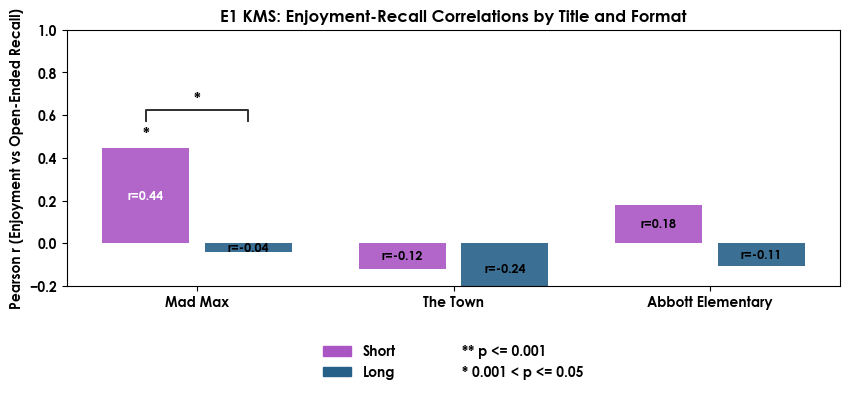

In [143]:
title_e1_kms_correlation_records = []
title_e1_kms_difference_records = []
for title_name, title_df in e1_kms_base.groupby("title", observed=True):
    for form_name, form_df in title_df.groupby("form", observed=True):
        form_df = form_df.dropna(subset=["enjoyment_norm", "recall_kms"])
        if form_df.shape[0] < 3 or form_df["enjoyment_norm"].nunique() < 2 or form_df["recall_kms"].nunique() < 2:
            r_val = np.nan
            p_val = np.nan
        else:
            r_val, p_val = stats.pearsonr(form_df["enjoyment_norm"], form_df["recall_kms"])
        title_e1_kms_correlation_records.append({
            "title": title_name,
            "form": form_name,
            "pearson_r": r_val,
            "p_value": p_val,
            "n": form_df.shape[0],
        })
    if title_df["form"].nunique() >= 2:
        diff_model = smf.ols("recall_kms ~ enjoyment_norm * C(form)", data=title_df).fit()
        interaction_name = "enjoyment_norm:C(form)[T.Long]"
        diff_p = diff_model.pvalues.get(interaction_name, np.nan)
    else:
        diff_p = np.nan
    title_e1_kms_difference_records.append({
        "title": title_name,
        "delta_p_value": diff_p,
    })
title_e1_kms_corr_df = pd.DataFrame(title_e1_kms_correlation_records)
title_e1_kms_diff_df = pd.DataFrame(title_e1_kms_difference_records)
if title_e1_kms_corr_df.empty:
    raise ValueError("No enjoyment/open-ended recall data available for Part 4 plot.")
title_order_kms = [t for t in TARGET_TITLES if t in title_e1_kms_corr_df["title"].unique()] or sorted(title_e1_kms_corr_df["title"].unique())
form_order = ["Short", "Long"]
bar_width = 0.34
x_positions = np.arange(len(title_order_kms))
fig, ax = plt.subplots(figsize=(8.6, 4.6))
max_bar_height = 0.0
min_bar_height = 0.0
for title_idx, title_name in enumerate(title_order_kms):
    title_subset = title_e1_kms_corr_df.loc[title_e1_kms_corr_df["title"] == title_name]
    local_max = 0.0
    local_min = 0.0
    for offset_idx, form_name in enumerate(form_order):
        form_row = title_subset.loc[title_subset["form"] == form_name]
        if form_row.empty:
            continue
        r_val = form_row["pearson_r"].iloc[0]
        p_val = form_row["p_value"].iloc[0]
        if not np.isfinite(r_val):
            continue
        bar_x = x_positions[title_idx] + (offset_idx - 0.5) * (bar_width + 0.06)
        color = COLOR_MAP.get(form_name, COLOR_MAP.get("Default", "#1f77b4"))
        ax.bar(bar_x, r_val, width=bar_width, color=color, alpha=0.9)
        local_max = max(local_max, r_val, 0.0)
        local_min = min(local_min, r_val, 0.0)
        annotation_label = significance_label(p_val)
        if annotation_label:
            text_offset = 0.035 if r_val >= 0 else -0.05
            va = "bottom" if r_val >= 0 else "top"
            ax.text(bar_x, r_val + text_offset, annotation_label, ha="center", va=va, fontsize=11, fontweight="bold")
        bar_text_color = "white" if r_val >= 0.25 else "black"
        text_y = r_val / 2 if r_val != 0 else 0.015
        ax.text(bar_x, text_y, f"r={r_val:.2f}", ha="center", va="center", color=bar_text_color, fontsize=9)
    max_bar_height = max(max_bar_height, local_max)
    min_bar_height = min(min_bar_height, local_min)
    diff_row = title_e1_kms_diff_df.loc[title_e1_kms_diff_df["title"] == title_name]
    if not diff_row.empty:
        diff_p = diff_row["delta_p_value"].iloc[0]
        diff_label = significance_label(diff_p)
        if diff_label:
            x_center = x_positions[title_idx]
            half_span = (bar_width + 0.06) / 2
            bracket_height = local_max + 0.18
            ax.plot(
                [x_center - half_span, x_center - half_span, x_center + half_span, x_center + half_span],
                [bracket_height - 0.05, bracket_height, bracket_height, bracket_height - 0.05],
                color="#2f2f2f",
                linewidth=1.4,
            )
            ax.text(x_center, bracket_height + 0.02, diff_label, ha="center", va="bottom", fontsize=11, fontweight="bold")
ax.set_xticks(x_positions)
ax.set_xticklabels(title_order_kms)
ax.set_ylabel("Pearson r (Enjoyment vs Open-Ended Recall)")
ax.set_title("E1 KMS: Enjoyment-Recall Correlations by Title and Format")
lower_bound = min(-0.35, min_bar_height - 0.18)
upper_bound = max(0.1, max_bar_height + 0.25)
ax.set_ylim(lower_bound, upper_bound)
format_handles = [
    patches.Patch(color=COLOR_MAP.get(form_name, COLOR_MAP.get("Default", "#1f77b4")), label=form_name)
    for form_name in form_order
    if form_name in title_e1_kms_corr_df["form"].unique()
 ]
sign_handles = [
    plt.Line2D([], [], color="black", marker="", linestyle="None", markersize=11, label="** p <= 0.001"),
    plt.Line2D([], [], color="black", marker="", linestyle="None", markersize=11, label="* 0.001 < p <= 0.05"),
 ]
legend_handles = format_handles + sign_handles
ax.legend(
    legend_handles,
    [handle.get_label() for handle in legend_handles],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=2,
    frameon=False,
 )
plt.ylim(-0.2, 1)
plt.tight_layout(rect=(0, 0.08, 1, 1))
title_e1_kms_corr_df.sort_values(["title", "form"]).reset_index(drop=True), title_e1_kms_diff_df.sort_values("title").reset_index(drop=True)

In [144]:
# E1 KMS summary tables and one-liners
if 'part1_e1_kms_summary' in globals() and not part1_e1_kms_summary.empty:
    display_part1_kms = part1_e1_kms_summary.copy()
    if 'p_value' in display_part1_kms.columns:
        display_part1_kms["p_value"] = display_part1_kms["p_value"].apply(format_p_value)
    if 'pearson_r' in display_part1_kms.columns:
        display_part1_kms["pearson_r"] = display_part1_kms["pearson_r"].round(3)
    display(display_part1_kms.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    if 'overall_e1_kms' in globals():
        long_mean = overall_e1_kms.loc[overall_e1_kms["form"] == "Long", "recall_kms"].mean()
        short_mean = overall_e1_kms.loc[overall_e1_kms["form"] == "Short", "recall_kms"].mean()
        extra_items = []
        if 'r_val_kms' in globals() and isinstance(r_val_kms, Number) and np.isfinite(r_val_kms):
            extra_items.append(f"Pearson r={r_val_kms:.3f}")
        if 'p_val_kms' in globals() and isinstance(p_val_kms, Number) and np.isfinite(p_val_kms):
            extra_items.append(format_p_value(p_val_kms))
        long_count = overall_e1_kms.loc[overall_e1_kms["form"] == "Long", id_column].nunique()
        short_count = overall_e1_kms.loc[overall_e1_kms["form"] == "Short", id_column].nunique()
        if long_count:
            extra_items.append(f"n_long={int(long_count)}")
        if short_count:
            extra_items.append(f"n_short={int(short_count)}")
        extra_note = ", ".join(extra_items) if extra_items else None
        print_long_short_summary(
            label="E1 KMS Part 1 (All formats)",
            long_mean=long_mean,
            short_mean=short_mean,
            extra_note=extra_note
        )
else:
    print("E1 KMS Part 1 summary: results unavailable.")

if 'format_e1_kms_summary' in globals() and not format_e1_kms_summary.empty:
    formatted_format_kms = format_e1_kms_summary.copy()
    formatted_format_kms["pearson_r"] = formatted_format_kms["pearson_r"].round(3)
    formatted_format_kms["p_value"] = formatted_format_kms["p_value"].apply(format_p_value)
    display(formatted_format_kms.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    interaction_note = None
    if 'format_model_kms' in globals():
        interaction_term_kms = "enjoyment_norm:C(form)[T.Long]"
        interaction_p_kms = format_model_kms.pvalues.get(interaction_term_kms, np.nan)
        if np.isfinite(interaction_p_kms):
            interaction_note = f"Slope diff {format_p_value(interaction_p_kms)}"
    long_mean = overall_e1_kms.loc[overall_e1_kms["form"] == "Long", "recall_kms"].mean() if 'overall_e1_kms' in globals() else np.nan
    short_mean = overall_e1_kms.loc[overall_e1_kms["form"] == "Short", "recall_kms"].mean() if 'overall_e1_kms' in globals() else np.nan
    sample_items = []
    long_row = formatted_format_kms.loc[formatted_format_kms["format"] == "Long", "n"]
    short_row = formatted_format_kms.loc[formatted_format_kms["format"] == "Short", "n"]
    if not long_row.empty and isinstance(long_row.iloc[0], Number) and np.isfinite(long_row.iloc[0]):
        sample_items.append(f"n_long={int(long_row.iloc[0])}")
    if not short_row.empty and isinstance(short_row.iloc[0], Number) and np.isfinite(short_row.iloc[0]):
        sample_items.append(f"n_short={int(short_row.iloc[0])}")
    if interaction_note:
        sample_items.append(interaction_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="E1 KMS Part 2 (By format)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("E1 KMS Part 2 summary: format correlations unavailable.")

if 'title_e1_kms_summary' in globals() and not title_e1_kms_summary.empty:
    formatted_title_kms = title_e1_kms_summary.copy()
    formatted_title_kms["pearson_r"] = formatted_title_kms["pearson_r"].round(3)
    formatted_title_kms["p_value"] = formatted_title_kms["p_value"].apply(format_p_value)
    display(formatted_title_kms.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    interaction_note = None
    if 'title_anova_e1_kms' in globals() and not title_anova_e1_kms.empty:
        interaction_rows = [idx for idx in title_anova_e1_kms.index if idx.startswith("enjoyment_norm:C(")]
        if interaction_rows:
            interaction_note = f"Global slope diff {format_p_value(title_anova_e1_kms.loc[interaction_rows[0], 'PR(>F)'])}"
    long_mean = title_subset_e1_kms.loc[title_subset_e1_kms["form"] == "Long", "recall_kms"].mean() if 'title_subset_e1_kms' in globals() else np.nan
    short_mean = title_subset_e1_kms.loc[title_subset_e1_kms["form"] == "Short", "recall_kms"].mean() if 'title_subset_e1_kms' in globals() else np.nan
    sample_items = []
    if 'title_subset_e1_kms' in globals():
        long_count = title_subset_e1_kms.loc[title_subset_e1_kms["form"] == "Long", id_column].nunique()
        short_count = title_subset_e1_kms.loc[title_subset_e1_kms["form"] == "Short", id_column].nunique()
        if long_count:
            sample_items.append(f"n_long={int(long_count)}")
        if short_count:
            sample_items.append(f"n_short={int(short_count)}")
    if interaction_note:
        sample_items.append(interaction_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="E1 KMS Part 3 (By title)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("E1 KMS Part 3 summary: title-level correlations unavailable.")

if 'title_e1_kms_corr_df' in globals() and not title_e1_kms_corr_df.empty:
    display_title_corr_kms = title_e1_kms_corr_df.copy()
    display_title_corr_kms["pearson_r"] = display_title_corr_kms["pearson_r"].round(3)
    display_title_corr_kms["p_value"] = display_title_corr_kms["p_value"].apply(format_p_value)
    display(display_title_corr_kms.rename(columns={"pearson_r": "Pearson r", "p_value": "p-value", "n": "n"}))
    long_mean = e1_kms_base.loc[(e1_kms_base["form"] == "Long") & (e1_kms_base["title"].isin(TARGET_TITLES)), "recall_kms"].mean() if 'e1_kms_base' in globals() else np.nan
    short_mean = e1_kms_base.loc[(e1_kms_base["form"] == "Short") & (e1_kms_base["title"].isin(TARGET_TITLES)), "recall_kms"].mean() if 'e1_kms_base' in globals() else np.nan
    diff_note = None
    if 'title_e1_kms_diff_df' in globals() and not title_e1_kms_diff_df.empty:
        best_row = title_e1_kms_diff_df.loc[title_e1_kms_diff_df['delta_p_value'].idxmin()]
        diff_note = f"Form slope diff {format_p_value(best_row['delta_p_value'])}"
    sample_items = []
    if 'e1_kms_base' in globals():
        long_count = e1_kms_base.loc[(e1_kms_base["form"] == "Long") & (e1_kms_base["title"].isin(TARGET_TITLES)), id_column].nunique()
        short_count = e1_kms_base.loc[(e1_kms_base["form"] == "Short") & (e1_kms_base["title"].isin(TARGET_TITLES)), id_column].nunique()
        if long_count:
            sample_items.append(f"n_long={int(long_count)}")
        if short_count:
            sample_items.append(f"n_short={int(short_count)}")
    if diff_note:
        sample_items.append(diff_note)
    extra_note = ", ".join(sample_items) if sample_items else None
    print_long_short_summary(
        label="E1 KMS Part 4 (Title-format comparison)",
        long_mean=long_mean,
        short_mean=short_mean,
        extra_note=extra_note
    )
else:
    print("E1 KMS Part 4 summary: title-format correlation table unavailable.")

group  Pearson r  p-value    n
0  All formats and titles     -0.027  p=0.741  155

E1 KMS Part 1 (All formats): Long form (49%) showed 15% lower than short form (64%) (Pearson r=-0.027, p=0.741, n_long=76, n_short=79).


format  Pearson r  p-value   n
0  Short      0.211  p=0.062  79
1   Long      0.045  p=0.698  76

E1 KMS Part 2 (By format): Long form (49%) showed 15% lower than short form (64%) (n_long=76, n_short=79, Slope diff p=0.264).


title  Pearson r  p-value   n
0  Abbott Elementary     -0.175  p=0.201  55
1            Mad Max      0.037  p=0.799  49
2           The Town     -0.178  p=0.211  51

E1 KMS Part 3 (By title): Long form (49%) showed 15% lower than short form (64%) (n_long=76, n_short=79, Global slope diff p=0.440).


title   form  Pearson r  p-value   n
0  Abbott Elementary  Short      0.181  p=0.348  29
1  Abbott Elementary   Long     -0.108  p=0.601  26
2            Mad Max  Short      0.444  p=0.023  26
3            Mad Max   Long     -0.042  p=0.850  23
4           The Town  Short     -0.120  p=0.578  24
5           The Town   Long     -0.238  p=0.232  27

E1 KMS Part 4 (Title-format comparison): Long form (49%) showed 15% lower than short form (64%) (n_long=76, n_short=79, Form slope diff p=0.045).


In [145]:
# Export Exploratory Analysis 1 (enjoyment vs recall) - KMS subset
e1_kms_section_label = "Exploratory 1 KMS - Enjoyment and Recall"
kms_id_col = globals().get("kms_id_column", id_column)
if (
    "part1_e1_kms_summary" in globals()
    and not part1_e1_kms_summary.empty
    and "overall_e1_kms" in globals()
 ):
    record_cols = [col for col in [kms_id_col, "form", "title", "enjoyment_norm", "recall_norm"] if col in overall_e1_kms.columns]
    frames = [("part1_e1_kms_summary", part1_e1_kms_summary.copy())]
    if record_cols:
        frames.append(("overall_e1_kms_records", overall_e1_kms[record_cols].reset_index(drop=True).copy()))
    metadata = {"n_records": int(overall_e1_kms.shape[0])}
    if "pearson_r" in part1_e1_kms_summary.columns and not part1_e1_kms_summary["pearson_r"].empty:
        r_value = part1_e1_kms_summary["pearson_r"].iloc[0]
        metadata["pearson_r"] = float(r_value) if isinstance(r_value, Number) and np.isfinite(r_value) else np.nan
    if "p_value" in part1_e1_kms_summary.columns and not part1_e1_kms_summary["p_value"].empty:
        p_value = part1_e1_kms_summary["p_value"].iloc[0]
        metadata["p_value"] = float(p_value) if isinstance(p_value, Number) and np.isfinite(p_value) else np.nan
    _export_plot_bundle(
        section_label=e1_kms_section_label,
        part_label="Part 1 - Overall association (KMS)",
        title="E1 KMS: Enjoyment vs Key Recall (All formats)",
        frames=frames,
        metadata=metadata,
        filename_suffix="e1_kms_part1_overall",
    )
else:
    print("E1 KMS Part 1 export skipped: required tables unavailable.")

if (
    "format_e1_kms_summary" in globals()
    and not format_e1_kms_summary.empty
    and "format_slope_table_e1_kms" in globals()
    and "format_anova_e1_kms" in globals()
    and "overall_e1_kms" in globals()
 ):
    record_cols = [col for col in [kms_id_col, "form", "title", "enjoyment_norm", "recall_norm"] if col in overall_e1_kms.columns]
    frames = [
        ("format_e1_kms_summary", format_e1_kms_summary.copy()),
        ("format_slope_table_e1_kms", format_slope_table_e1_kms.copy()),
        ("format_anova_e1_kms", format_anova_e1_kms.copy()),
    ]
    if record_cols:
        frames.append(("format_e1_kms_records", overall_e1_kms[record_cols].reset_index(drop=True).copy()))
    interaction_term = "enjoyment_norm:C(form)[T.Long]"
    interaction_p = np.nan
    if "format_model_kms" in globals():
        interaction_p = format_model_kms.pvalues.get(interaction_term, np.nan)
    metadata = {
        "interaction_term": interaction_term,
        "interaction_p_value": float(interaction_p) if isinstance(interaction_p, Number) and np.isfinite(interaction_p) else np.nan,
        "n_records": int(overall_e1_kms.shape[0]),
    }
    _export_plot_bundle(
        section_label=e1_kms_section_label,
        part_label="Part 2 - Format comparison (KMS)",
        title="E1 KMS: Enjoyment vs Recall by Format",
        frames=frames,
        metadata=metadata,
        filename_suffix="e1_kms_part2_format",
    )
else:
    print("E1 KMS Part 2 export skipped: required tables unavailable.")

if (
    "title_e1_kms_summary" in globals()
    and not title_e1_kms_summary.empty
    and "title_e1_kms_slope_table" in globals()
    and "title_anova_e1_kms" in globals()
 ):
    frames = [
        ("title_e1_kms_summary", title_e1_kms_summary.copy()),
        ("title_e1_kms_slope_table", title_e1_kms_slope_table.copy()),
        ("title_anova_e1_kms", title_anova_e1_kms.copy()),
    ]
    if "title_subset_e1_kms" in globals() and not title_subset_e1_kms.empty:
        cols = [col for col in [kms_id_col, "form", "title", "enjoyment_norm", "recall_norm"] if col in title_subset_e1_kms.columns]
        if cols:
            frames.append(("title_subset_e1_kms_records", title_subset_e1_kms[cols].reset_index(drop=True).copy()))
    interaction_rows = [idx for idx in title_anova_e1_kms.index if isinstance(idx, str) and idx.startswith("enjoyment_norm:C(")]
    interaction_p = title_anova_e1_kms.loc[interaction_rows[0], "PR(>F)"] if interaction_rows else np.nan
    metadata = {
        "reference_title": reference_title if "reference_title" in globals() else None,
        "interaction_p_value": float(interaction_p) if isinstance(interaction_p, Number) and np.isfinite(interaction_p) else np.nan,
        "n_titles": int(title_e1_kms_summary["title"].nunique()),
    }
    _export_plot_bundle(
        section_label=e1_kms_section_label,
        part_label="Part 3 - Title comparison (KMS)",
        title="E1 KMS: Enjoyment vs Recall by Title",
        frames=frames,
        metadata=metadata,
        filename_suffix="e1_kms_part3_title",
    )
else:
    print("E1 KMS Part 3 export skipped: required tables unavailable.")

if (
    "title_e1_kms_corr_df" in globals() and not title_e1_kms_corr_df.empty
    and "title_e1_kms_diff_df" in globals() and not title_e1_kms_diff_df.empty
 ):
    frames = [
        ("title_e1_kms_format_correlations", title_e1_kms_corr_df.copy()),
        ("title_e1_kms_format_differences", title_e1_kms_diff_df.copy()),
    ]
    metadata = {
        "n_titles": int(title_e1_kms_corr_df["title"].nunique()),
        "forms": sorted(title_e1_kms_corr_df["form"].unique()),
    }
    if not title_e1_kms_diff_df["delta_p_value"].isna().all():
        best_diff = title_e1_kms_diff_df.loc[title_e1_kms_diff_df["delta_p_value"].idxmin()]
        metadata["strongest_format_effect_title"] = best_diff.get("title")
        diff_p = best_diff.get("delta_p_value")
        metadata["strongest_format_effect_p"] = float(diff_p) if isinstance(diff_p, Number) and np.isfinite(diff_p) else np.nan
    _export_plot_bundle(
        section_label=e1_kms_section_label,
        part_label="Part 4 - Title x Format correlations (KMS)",
        title="E1 KMS: Enjoyment-Recall Correlations by Title and Format",
        frames=frames,
        metadata=metadata,
        filename_suffix="e1_kms_part4_title_format",
    )
else:
    print("E1 KMS Part 4 export skipped: required tables unavailable.")

### Enjoyment per title-format
Distribution of the enjoyment composite across titles and formats to mirror the familiarity view in H4.

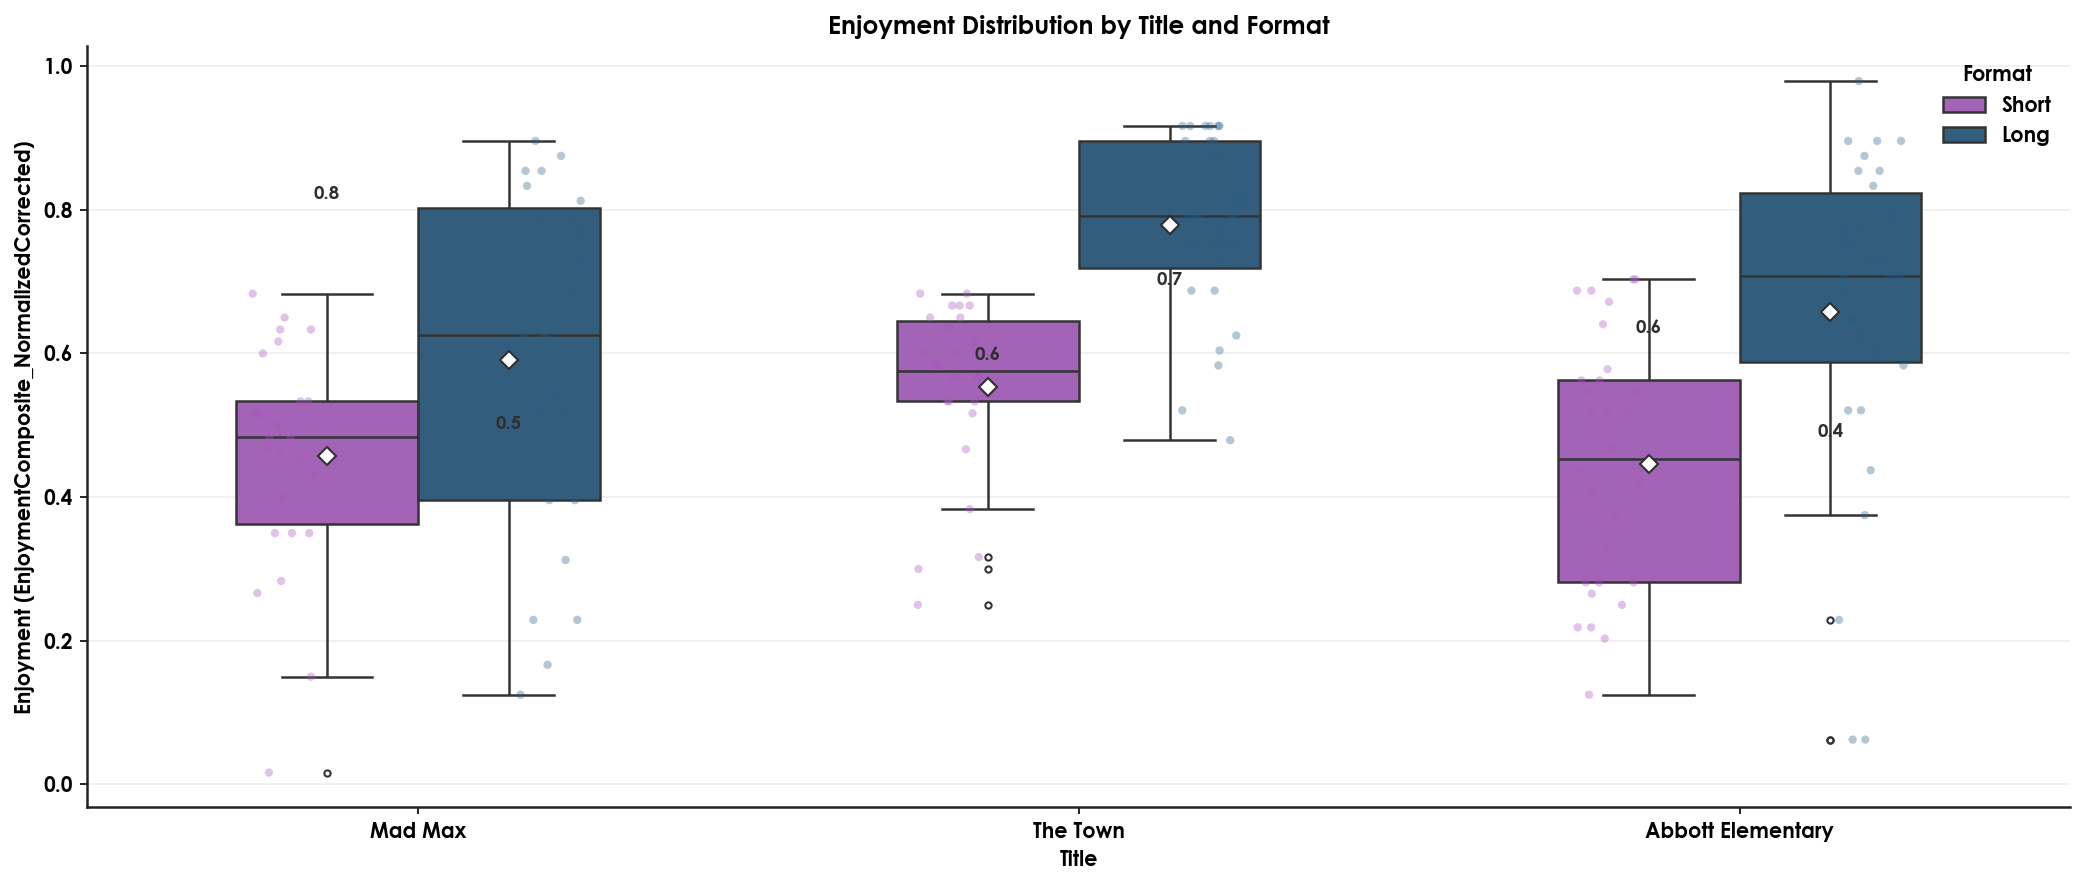

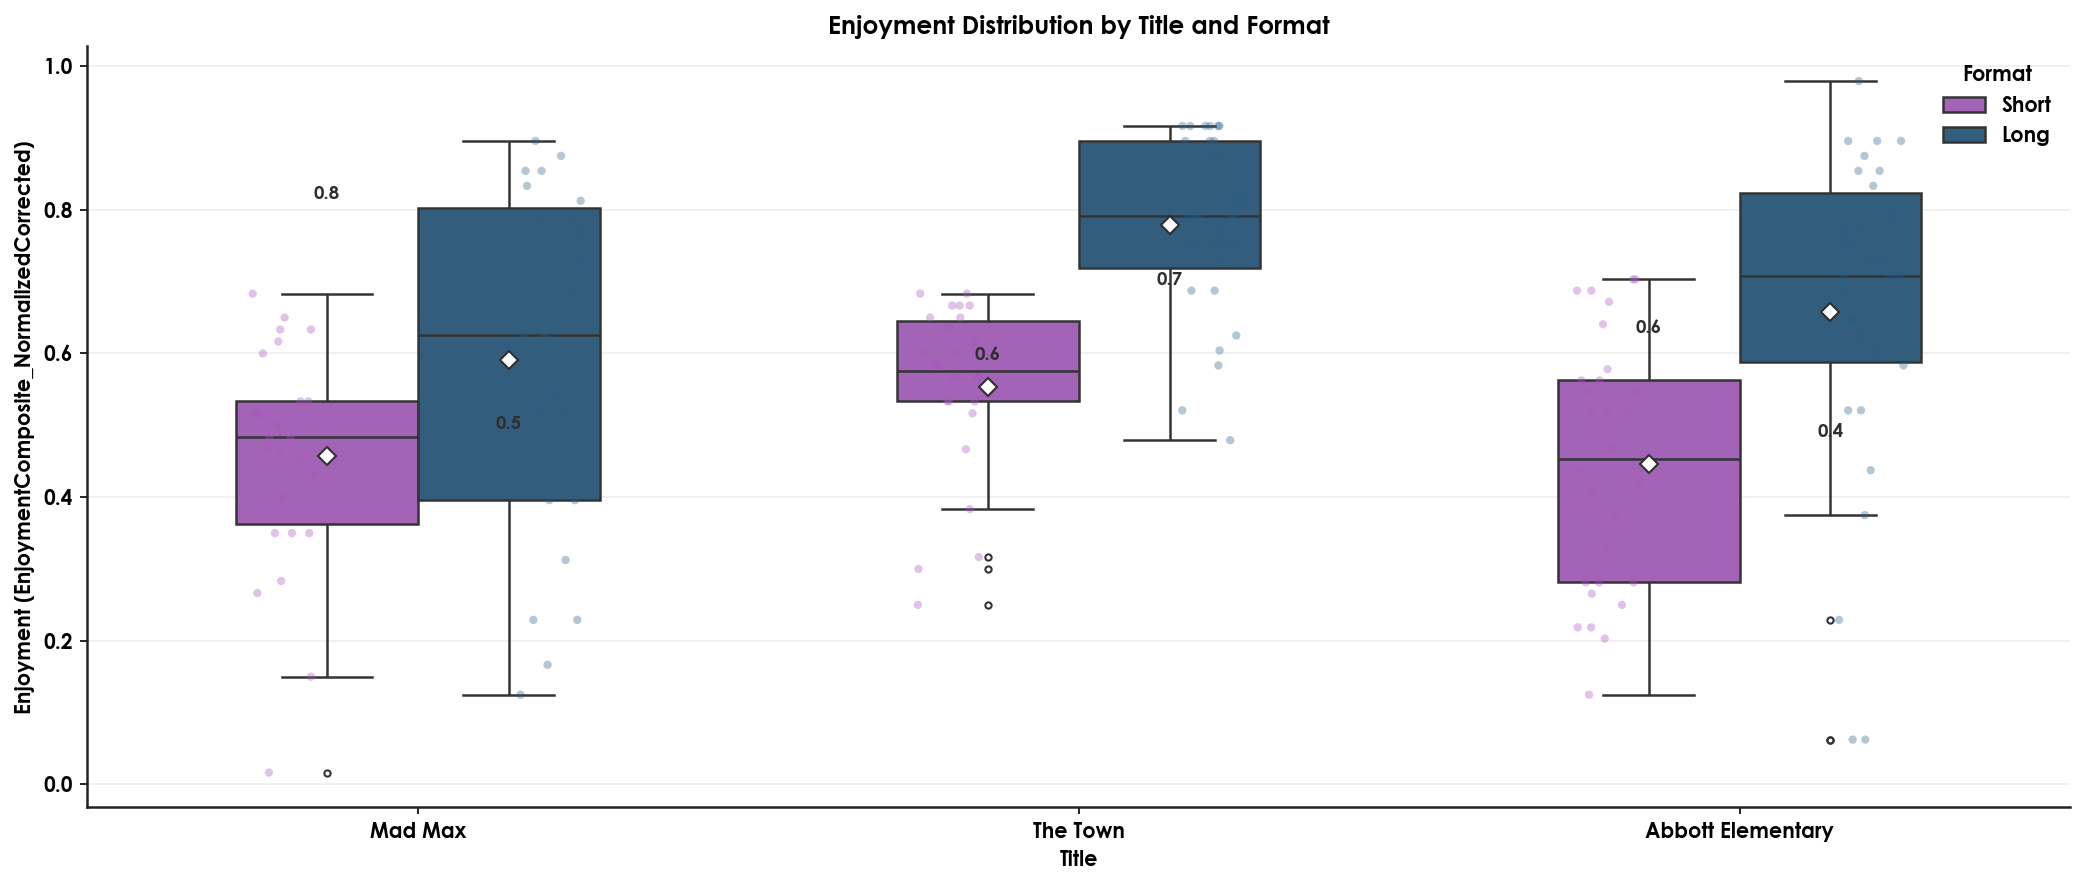

In [146]:
if "enjoyment_metric_kms" not in globals():
    raise RuntimeError("Run the E1 KMS preparation cell before plotting enjoyment distributions.")

enjoyment_plot_df = (
    enjoyment_metric_kms[[id_column, "form", "title", "enjoyment_norm"]]
    .dropna(subset=["enjoyment_norm"])
    .loc[lambda df: df["title"].isin(TARGET_TITLES)]
    .copy()
 )
if enjoyment_plot_df.empty:
    raise ValueError("No enjoyment records available for the target titles.")

enjoyment_plot_df["title"] = pd.Categorical(
    enjoyment_plot_df["title"],
    categories=TARGET_TITLES,
    ordered=True,
 )

palette = (
    format_palette_kms if "format_palette_kms" in globals() else {"Short": "#1f77b4", "Long": "#ff7f0e"}
 )

fig, ax = plt.subplots(figsize=(14, 6), dpi=150)
sns.boxplot(
    data=enjoyment_plot_df,
    x="title",
    y="enjoyment_norm",
    hue="form",
    palette=palette,
    ax=ax,
    width=0.55,
    fliersize=3,
    linewidth=1.2,
 )
sns.stripplot(
    data=enjoyment_plot_df,
    x="title",
    y="enjoyment_norm",
    hue="form",
    dodge=True,
    palette=palette,
    ax=ax,
    alpha=0.35,
    size=4,
    legend=False,
 )

ax.set_xlabel("Title")
ax.set_ylabel(f"Enjoyment ({ENJOYMENT_METRIC})")
ax.set_title("Enjoyment Distribution by Title and Format")
ax.grid(axis="y", alpha=0.2)
sns.despine(ax=ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Format", loc="upper right", frameon=False)

plt.tight_layout()
fig